Universidad Galileo
<br>Ciencia de Datos en Python

Stefanie Alvarez Pérez, 20002045
<br>Kimberly Rivera González, 20001676

Acceso a video: https://youtu.be/ZGWmGqggBDk

# Proyecto final

<b>Descripción:</b> El proyecto consiste en aplicar los conocimientos aprendidos en clase (y apoyándose de referencias adicionales útiles) 
para crear modelos predictivos de regresión lineal uni-variable sencillos de la forma: Y = Bo + B1 * x 
<br>Donde Y es la variable dependiente, x es la variable independiente, Bo es el intercepto de la recta y B1 es la pendiente de la recta.

#### <b>1. CARGAR LAS LIBRERÍAS

In [1]:
import pandas as pd
import numpy as np
import numpy.ma as ma
import os
import matplotlib.pyplot as plt
import seaborn as sns

#### <b>1.1. OBTENER LOS DATOS

Usar Load para obtener los datos: https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html

In [2]:
print(os.path.abspath("."))

C:\Users\kimbe\OneDrive - Universidad Galileo\Quinto Trimestre\Ciencia de Datos en Python\Proyecto Final


In [3]:
data = np.load('./DataP/proyecto_training_data.npy')
data

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [4]:
print(type(data))

<class 'numpy.ndarray'>


In [5]:
#Inspeccionando las filas
data[0:10]

array([[2.085e+05, 7.000e+00, 8.560e+02, 8.000e+00, 2.003e+03, 6.500e+01],
       [1.815e+05, 6.000e+00, 1.262e+03, 6.000e+00, 1.976e+03, 8.000e+01],
       [2.235e+05, 7.000e+00, 9.200e+02, 6.000e+00, 2.001e+03, 6.800e+01],
       [1.400e+05, 7.000e+00, 9.610e+02, 7.000e+00, 1.915e+03, 6.000e+01],
       [2.500e+05, 8.000e+00, 1.145e+03, 9.000e+00, 2.000e+03, 8.400e+01],
       [1.430e+05, 5.000e+00, 7.960e+02, 5.000e+00, 1.993e+03, 8.500e+01],
       [3.070e+05, 8.000e+00, 1.694e+03, 7.000e+00, 2.004e+03, 7.500e+01],
       [2.000e+05, 7.000e+00, 1.107e+03, 7.000e+00, 1.973e+03,       nan],
       [1.299e+05, 7.000e+00, 1.022e+03, 8.000e+00, 1.931e+03, 5.100e+01],
       [1.180e+05, 5.000e+00, 1.077e+03, 5.000e+00, 1.939e+03, 5.000e+01]])

#### <b>2. SEPARACIÓN 80/20

Usar slicing para dividir el dataset 80/20, 
<li>80 % del dataset(filas) se usará para todo el proceso de entrenamiento es decir: el análisis exploratorio, selección de variables a usar, creación de modelos predictivos. Les llamamos set de entrenamiento.

<li>20 % del dataset(filas) se usará para probar, validar y evaluar los modelos resultantes. Es usado solo al final cuando ya poseemos los modelos predictivos. Les llamamos set de validación y pruebas.

In [6]:
#Obteniendo el total de filas
data.shape

(1460, 6)

In [7]:
#El 80% de las filas (1,460) serían 1,168 filas
Data_training = data[0:1168]
Data_training

array([[2.0850e+05, 7.0000e+00, 8.5600e+02, 8.0000e+00, 2.0030e+03,
        6.5000e+01],
       [1.8150e+05, 6.0000e+00, 1.2620e+03, 6.0000e+00, 1.9760e+03,
        8.0000e+01],
       [2.2350e+05, 7.0000e+00, 9.2000e+02, 6.0000e+00, 2.0010e+03,
        6.8000e+01],
       ...,
       [2.3317e+05, 7.0000e+00, 1.5020e+03, 7.0000e+00, 2.0090e+03,
        7.9000e+01],
       [2.4535e+05, 8.0000e+00, 1.6940e+03, 7.0000e+00, 2.0080e+03,
        6.4000e+01],
       [1.7300e+05, 6.0000e+00, 9.5900e+02, 7.0000e+00, 2.0000e+03,
        5.8000e+01]])

In [8]:
#Corroborando la cantidad de filas en "training"
Data_training.shape

(1168, 6)

In [9]:
#Por tanto, el 20% de las filas serían 292
Data_test = data[1168:1460]
Data_test

array([[2.35000e+05, 6.00000e+00, 1.23600e+03, 7.00000e+00, 1.93500e+03,
        1.20000e+02],
       [6.25000e+05, 1.00000e+01, 1.83100e+03, 1.00000e+01, 1.99500e+03,
        1.18000e+02],
       [1.71000e+05, 6.00000e+00, 1.11800e+03, 6.00000e+00, 1.97700e+03,
        7.60000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [10]:
#Corroborando la cantidad de filas en "Test"
Data_test.shape

(292, 6)

#### <b>3. ANÁLISIS EXPLORATORIO

<b>1.1. Media

<b>Variable SalePrice (Columna 1)

In [11]:
#Media
np.nanmean(Data_training[:,0], axis=0)

180590.27739726027

In [12]:
#Valor Máximo
Max_Var1 = np.nanmax(Data_training[:,0], axis=0)
Max_Var1

755000.0

In [13]:
#Valor Mínimo
Min_Var1 = np.nanmin(Data_training[:,0], axis=0)
Min_Var1

34900.0

In [14]:
#Rango
Rango_Var1 = Max_Var1 - Min_Var1
Rango_Var1

720100.0

In [15]:
#Desviación estándar
np.nanstd(Data_training[:,0], axis=0)

78781.95108033362

<b>Variable OverallQual (Columna 2)

In [16]:
#Media
np.nanmean(Data_training[:,1], axis=0)

6.101027397260274

In [17]:
#Valor Máximo
Max_Var2 = np.nanmax(Data_training[:,1], axis=0)
Max_Var2

10.0

In [18]:
#Valor Mínimo
Min_Var2 = np.nanmin(Data_training[:,1], axis=0)
Min_Var2

1.0

In [19]:
#Rango
Rango_Var2 = Max_Var2 - Min_Var2
Rango_Var2

9.0

In [20]:
#Desviación estándar
np.nanstd(Data_training[:,1], axis=0)

1.377435193240741

<b>Variable 1stFlrSF (Columna 3)

In [21]:
#Media
np.nanmean(Data_training[:,2], axis=0)

1156.3236301369864

In [22]:
#Valor Máximo
Max_Var3 = np.nanmax(Data_training[:,2], axis=0)
Max_Var3

3228.0

In [23]:
#Valor Mínimo
Min_Var3 = np.nanmin(Data_training[:,2], axis=0)
Min_Var3

334.0

In [24]:
#Rango
Rango_Var3 = Max_Var3 - Min_Var3
Rango_Var3

2894.0

In [25]:
#Desviación estándar
np.nanstd(Data_training[:,2], axis=0)

373.620331503586

<b>Variable TotRmsAbvGrd (Columna 4)

In [26]:
#Media
np.nanmean(Data_training[:,3], axis=0)

6.4854452054794525

In [27]:
#Valor Máximo
Max_Var4 = np.nanmax(Data_training[:,3], axis=0)
Max_Var4

14.0

In [28]:
#Valor Mínimo
Min_Var4 = np.nanmin(Data_training[:,3], axis=0)
Min_Var4

2.0

In [29]:
#Rango
Rango_Var4 = Max_Var4 - Min_Var4
Rango_Var4

12.0

In [30]:
#Desviación estándar
np.nanstd(Data_training[:,3], axis=0)

1.6084517167387253

<b>Variable YearBuilt (Columna 5)

In [31]:
#Media
np.nanmean(Data_training[:,4], axis=0)

1971.451198630137

In [32]:
#Valor Máximo
Max_Var5 = np.nanmax(Data_training[:,4], axis=0)
Max_Var5

2010.0

In [33]:
#Valor Mínimo
Min_Var5 = np.nanmin(Data_training[:,4], axis=0)
Min_Var5

1875.0

In [34]:
#Rango
Rango_Var5 = Max_Var5 - Min_Var5
Rango_Var5

135.0

In [35]:
#Desviación estándar
np.nanstd(Data_training[:,4], axis=0)

29.93888206867768

<b>Variable LotFrontage (Columna 6)

In [36]:
#Media
np.nanmean(Data_training[:,5], axis=0)

69.94698544698545

In [37]:
#Valor Máximo
Max_Var6 = np.nanmax(Data_training[:,5], axis=0)
Max_Var6

313.0

In [38]:
#Valor Mínimo
Min_Var6 = np.nanmin(Data_training[:,5], axis=0)
Min_Var6

21.0

In [39]:
#Rango
Rango_Var6 = Max_Var6 - Min_Var6
Rango_Var6

292.0

In [40]:
#Desviación estándar
np.nanstd(Data_training[:,5], axis=0)

23.4659548199304

#### <b>4. HISTOGRAMA

Para cada variable en el dataset usar seaborn para graficar un histograma de la variable.
(función distplot https://seaborn.pydata.org/generated/seaborn.distplot.html)

<b> Variable SalePrice (Columna 1)

In [41]:
#Crear una variable que solo contenga la primera columna
SalePrice_1 = Data_training[:,0]
SalePrice_1

array([208500., 181500., 223500., ..., 233170., 245350., 173000.])

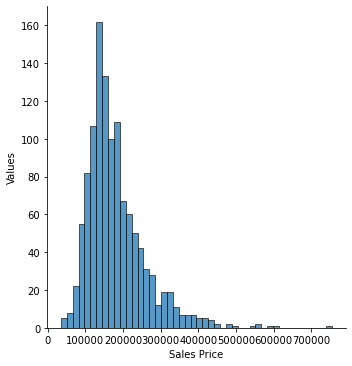

In [42]:
Graf_var1 = sns.displot(SalePrice_1)
Graf_var1.set_axis_labels('Sales Price', 'Values')
plt.show(sns)

<b> Variable OverallQual (Columna 2)

In [43]:
OverallQual_2 = Data_training[:,1]
OverallQual_2

array([7., 6., 7., ..., 7., 8., 6.])

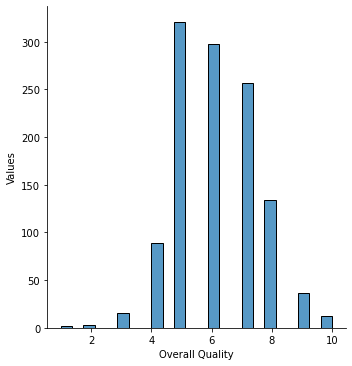

In [44]:
Graf_var2 = sns.displot(OverallQual_2)
Graf_var2.set_axis_labels('Overall Quality', 'Values')
plt.show(sns)

<b> Variable 1stFlrSF (Columna 3)

In [45]:
FirstFlrSF_3 = Data_training[:,2]
FirstFlrSF_3

array([ 856., 1262.,  920., ..., 1502., 1694.,  959.])

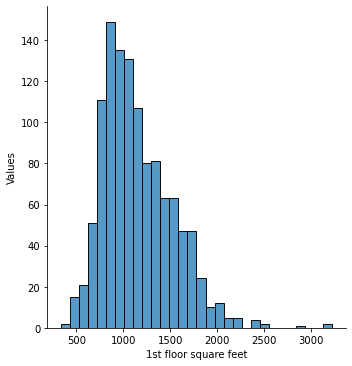

In [46]:
Graf_var3 = sns.displot(FirstFlrSF_3)
Graf_var3.set_axis_labels('1st floor square feet', 'Values')
plt.show(sns)

<b> Variable TotRmsAbvGrd (Columna 4)

In [47]:
TotRmsAbvGrd_4 = Data_training[:,3]
TotRmsAbvGrd_4

array([8., 6., 6., ..., 7., 7., 7.])

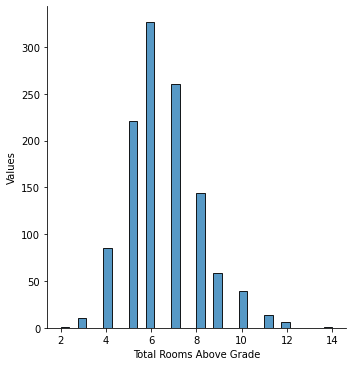

In [48]:
Graf_var4 = sns.displot(TotRmsAbvGrd_4)
Graf_var4.set_axis_labels('Total Rooms Above Grade', 'Values')
plt.show(sns)

<b> Variable YearBuilt (Columna 5)

In [49]:
YearBuilt_5 = Data_training[:,4]
YearBuilt_5

array([2003., 1976., 2001., ..., 2009., 2008., 2000.])

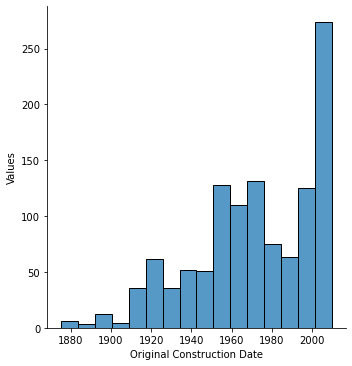

In [50]:
Graf_var5 = sns.displot(YearBuilt_5)
Graf_var5.set_axis_labels('Original Construction Date', 'Values')
plt.show(sns)

<b> Variable LotFrontage (Columna 6)

In [51]:
LotFrontage_6 = Data_training[:,5]
LotFrontage_6

array([65., 80., 68., ..., 79., 64., 58.])

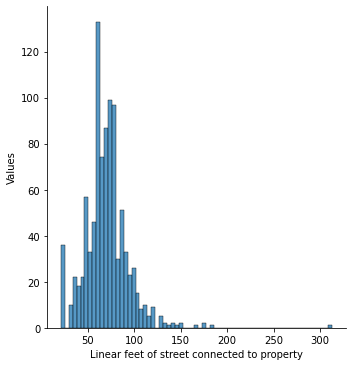

In [52]:
Graf_var6 = sns.displot(LotFrontage_6)
Graf_var6.set_axis_labels('Linear feet of street connected to property', 'Values')
plt.show(sns)

#### <b>5. Análisis estadístico

<b>5.1. Calcular el coeficiente de correlación entre x y y
<br><b>5.2. Graficar x vs y(scatterplot) usando matplotlib.
<br><b>5.3. Colocar el coeficiente de correlación y colocarlo como parte del título de la gráfica

<b>a. Variable SalePrice_1

In [53]:
#Para Y = Salesprice
Coef_1 = np.corrcoef(SalePrice_1,SalePrice_1)
Coef_1

array([[1., 1.],
       [1., 1.]])

Text(0.5, 1.0, 'El coeficiente de correlación de las variables SalePrice vs SalePrice es: 1.0')

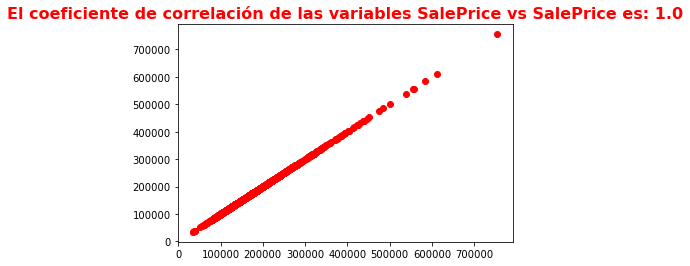

In [54]:
plt.scatter(SalePrice_1,SalePrice_1, c='r')
plt.title("El coeficiente de correlación de las variables SalePrice vs SalePrice es: 1.0", fontdict = {'weight':'bold', 'color':'red', 'size':'16'})

<b>b. Variable OverallQual_2

In [55]:
#Para Y = Salesprice
np.corrcoef(SalePrice_1,OverallQual_2)

array([[1.        , 0.79399005],
       [0.79399005, 1.        ]])

Text(0.5, 1.0, 'El coeficiente de correlación de las variables SalePrice vs OverallQual es: 0.79399005')

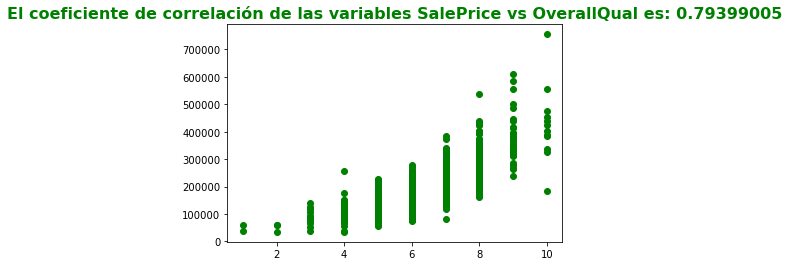

In [56]:
plt.scatter(OverallQual_2, SalePrice_1, c='g')
plt.title("El coeficiente de correlación de las variables SalePrice vs OverallQual es: 0.79399005", fontdict = {'weight':'bold', 'color':'green', 'size':'16'})

<b>c. Variable FirstFlrSF_3

In [57]:
np.corrcoef(SalePrice_1,FirstFlrSF_3)

array([[1.       , 0.6162887],
       [0.6162887, 1.       ]])

Text(0.5, 1.0, 'El coeficiente de correlación de las variables SalePrice vs FirstFlrSF es: 0.6162887')

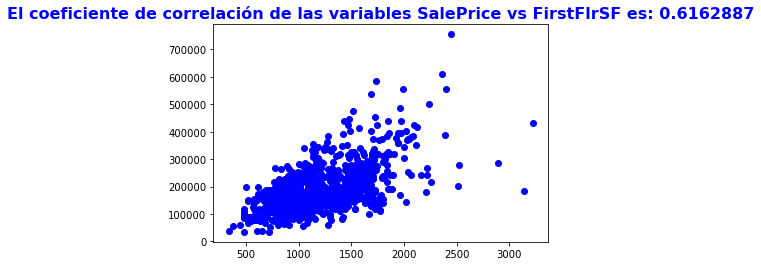

In [58]:
plt.scatter(FirstFlrSF_3, SalePrice_1, c='b')
plt.title("El coeficiente de correlación de las variables SalePrice vs FirstFlrSF es: 0.6162887", fontdict = {'weight':'bold', 'color':'blue', 'size':'16'})

<b>d. Variable TotRmsAbvGrd_4

In [59]:
np.corrcoef(SalePrice_1,TotRmsAbvGrd_4)

array([[1.        , 0.56470694],
       [0.56470694, 1.        ]])

Text(0.5, 1.0, 'El coeficiente de correlación de las variables SalePrice vs TotRmsAbvGrd es: 0.56470694')

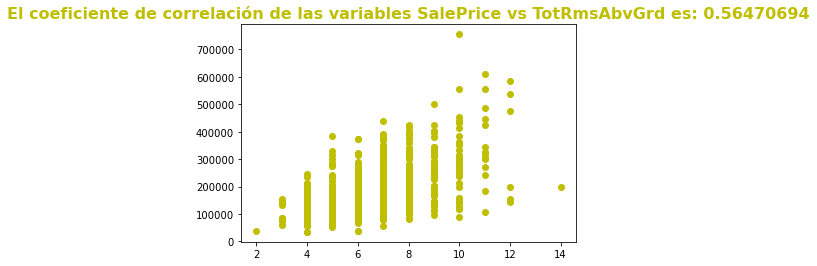

In [60]:
plt.scatter(TotRmsAbvGrd_4, SalePrice_1, c='y')
plt.title("El coeficiente de correlación de las variables SalePrice vs TotRmsAbvGrd es: 0.56470694", fontdict = {'weight':'bold', 'color':'y', 'size':'16'})

<b>e. Variable YearBuilt_5

In [61]:
np.corrcoef(SalePrice_1,YearBuilt_5)

array([[1.        , 0.53417069],
       [0.53417069, 1.        ]])

Text(0.5, 1.0, 'El coeficiente de correlación de las variables SalePrice vs YearBuilt es: 0.53417069')

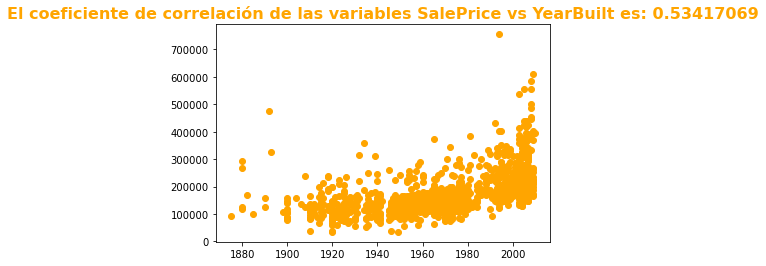

In [62]:
plt.scatter(YearBuilt_5, SalePrice_1, c='orange')
plt.title("El coeficiente de correlación de las variables SalePrice vs YearBuilt es: 0.53417069", fontdict = {'weight':'bold', 'color':'orange', 'size':'16'})

<b>f. Variable LotFrontage_6

In [63]:
np.corrcoef(SalePrice_1,LotFrontage_6)

array([[ 1., nan],
       [nan, nan]])

Text(0.5, 1.0, 'El coeficiente de correlación de las variables SalePrice vs LotFrontage es: --')

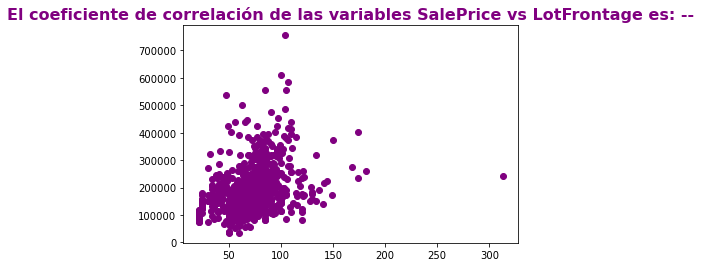

In [64]:
plt.scatter(LotFrontage_6, SalePrice_1, c='purple')
plt.title("El coeficiente de correlación de las variables SalePrice vs LotFrontage es: --", fontdict = {'weight':'bold', 'color':'purple', 'size':'16'})

In [65]:
#Con Numpy.mask se obtienen los valores de una columna sin tomar en cuenta los nan
np.ma.corrcoef(SalePrice_1, LotFrontage_6)

masked_array(
  data=[[1.0, --],
        [--, --]],
  mask=[[False,  True],
        [ True,  True]],
  fill_value=1e+20)

<b>5.4. Basado en la gráfica y el coeficiente de correlación de cada par x,y elegir las 2 variables con más potencial predictivo es decir las 2 variables que presentan mayor correlación entre dicha variable y la variable dependiente.

Las dos variables con más potencial predictivo son: OverallQual (la calidad general del material y acabado de la casa) con un coeficiente de correlación de <b>0.79399005</b> y FirstFlrSF (los metros cuadrados en el primer nivel) con un coeficiente de correlación de <b>0.6162887</b>.

#### <b>6. Función para entrenar un modelo de regresión lineal

<b>6.1. Definición de argumentos para la función

In [66]:
epoch = 1

#Frecuencia en la que va a imprimir: Número de iteración, error del modelo en esa iteración.
imprimir_error_cada = 10

#Learning Rate
Alpha = 0.01

#### <b>7. Modelo de regresión lineal

<b>7.1. Crear una matriz de 2 columnas, la primera columna corresponde al vector de datos x
y la segunda columna de la matriz para todas las filas es igual a 1.

<b>a. Matriz SalePrice_1

In [67]:
array1 = np.ones_like(SalePrice_1).reshape(-1,1)
array1

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [68]:
SalePrice1 = np.reshape(SalePrice_1,(-1,1))
SalePrice1

array([[208500.],
       [181500.],
       [223500.],
       ...,
       [233170.],
       [245350.],
       [173000.]])

In [69]:
MSalePrice1 = np.hstack([SalePrice1,array1])
MSalePrice1

array([[2.0850e+05, 1.0000e+00],
       [1.8150e+05, 1.0000e+00],
       [2.2350e+05, 1.0000e+00],
       ...,
       [2.3317e+05, 1.0000e+00],
       [2.4535e+05, 1.0000e+00],
       [1.7300e+05, 1.0000e+00]])

<b>b. Matriz OverallQual_2

In [70]:
OverallQual2 = np.reshape(OverallQual_2,(-1,1))
OverallQual2

array([[7.],
       [6.],
       [7.],
       ...,
       [7.],
       [8.],
       [6.]])

In [71]:
MOverallQual2 = np.hstack([OverallQual2,array1])
MOverallQual2

array([[7., 1.],
       [6., 1.],
       [7., 1.],
       ...,
       [7., 1.],
       [8., 1.],
       [6., 1.]])

<b>c. Matriz FirstFlrSF_3

In [72]:
FirstFlrSF3 = np.reshape(FirstFlrSF_3,(-1,1))
FirstFlrSF3

array([[ 856.],
       [1262.],
       [ 920.],
       ...,
       [1502.],
       [1694.],
       [ 959.]])

In [73]:
MFirstFlrSF3 = np.hstack([FirstFlrSF3,array1])
MFirstFlrSF3

array([[8.560e+02, 1.000e+00],
       [1.262e+03, 1.000e+00],
       [9.200e+02, 1.000e+00],
       ...,
       [1.502e+03, 1.000e+00],
       [1.694e+03, 1.000e+00],
       [9.590e+02, 1.000e+00]])

<b>7.2. Inicializar los parámetros del modelo en un vector β0 y β1, esto es equivalente a empezar el proceso con una recta inicial la cual en cada iteración actualizaremos hasta encontrar una que aproxime de buena manera los datos x, y.

<b>OverallQual

In [74]:
#Definir un valor inicial para B0 y B1

B0 = np.array([-93032.1937])
B1 = np.array([43976.4942])


In [75]:
#Función para el modelo (con forma y = B1x + B0) - Variable OverallQual
Prediccion1 = np.empty_like(SalePrice1)

for i in range(len(OverallQual2)):
    Prediccion1[i] = B0 + B1*OverallQual2[i]
    
Prediccion1

array([[214803.2657],
       [170826.7715],
       [214803.2657],
       ...,
       [214803.2657],
       [258779.7599],
       [170826.7715]])

<b>FirstFlrSF

In [76]:
#Definir un valor inicial para B0 y B1

B0_2 = np.array([-94032.1937])
B1_2 = np.array([44976.494])

In [77]:
#Función para el modelo (con forma y = B1x + B0) - Variable FirstFlrSF
Prediccion2 = np.empty_like(SalePrice1)

for i in range(len(FirstFlrSF3)):
    Prediccion2[i] = B0 + B1*FirstFlrSF3[i]
    
Prediccion2

array([[37550846.8415    ],
       [55405303.4867    ],
       [40365342.4703    ],
       ...,
       [65959662.0947    ],
       [74403148.98110001],
       [42080425.7441    ]])

<b>7.3. Calcular el error o costo usando: y ,ˆy. Esto produce un escalar que indica el error (mientras más alto peor el modelo, mientras mas bajo mejor el modelo) producido por el modelo correspondiente a la iteración (es decir, el error para ciertos parámetros β0, β1).


<b>OverallQual

In [78]:
Error1 = np.empty_like(SalePrice1)
Error1Alcuadrado = np.empty_like(SalePrice1)

for i in range(len(SalePrice1)):
    Error1[i] = (SalePrice1[i]-Prediccion1[i])
    Error1Alcuadrado[i] = np.power((SalePrice1[i]-Prediccion1[i]),2)
    
Error1

array([[ -6303.2657],
       [ 10673.2285],
       [  8696.7343],
       ...,
       [ 18366.7343],
       [-13429.7599],
       [  2173.2285]])

In [79]:
Error1Alcuadrado

array([[3.97311585e+07],
       [1.13917807e+08],
       [7.56331875e+07],
       ...,
       [3.37336929e+08],
       [1.80358451e+08],
       [4.72292211e+06]])

In [80]:
SumError = Error1Alcuadrado.sum(axis=0)
SumError = SumError/(2*len(SalePrice1))
SumError


array([1.1630259e+09])

<b>FirstFlrSF

In [81]:
Error2 = np.empty_like(SalePrice1)
Error2Alcuadrado = np.empty_like(SalePrice1)

for i in range(len(SalePrice1)):
    Error2[i] = (SalePrice1[i]-Prediccion2[i])
    Error2Alcuadrado[i] = np.power((SalePrice1[i]-Prediccion2[i]),2)
    
Error2

array([[-37342346.8415    ],
       [-55223803.4867    ],
       [-40141842.4703    ],
       ...,
       [-65726492.0947    ],
       [-74157798.98110001],
       [-41907425.7441    ]])

In [82]:
Error2Alcuadrado

array([[1.39445087e+15],
       [3.04966847e+15],
       [1.61136752e+15],
       ...,
       [4.31997176e+15],
       [5.49937915e+15],
       [1.75623233e+15]])

In [83]:
SumError_2 = Error2Alcuadrado.sum(axis=0)
SumError_2 = SumError_2/(2*len(SalePrice1))
SumError_2


array([1.41322479e+15])

<b>7.4. Almacenar en un vector el error de cada iteración. Calcular el gradiente del error respecto de cada parámetro.

<b>OverallQual

In [84]:
GradienteB1 = np.empty_like(OverallQual2)
GradienteB0 = np.empty_like(OverallQual2)

for i in range(len(OverallQual2)):
    GradienteB1[i] = (Prediccion1[i]-SalePrice1[i])*(OverallQual2[i])
    GradienteB0[i] = (Prediccion1[i]-SalePrice1[i])
    
GradienteB1

array([[  44122.8599],
       [ -64039.371 ],
       [ -60877.1401],
       ...,
       [-128567.1401],
       [ 107438.0792],
       [ -13039.371 ]])

In [85]:
GradienteB0

array([[  6303.2657],
       [-10673.2285],
       [ -8696.7343],
       ...,
       [-18366.7343],
       [ 13429.7599],
       [ -2173.2285]])

In [86]:
Sum_GradB1 = GradienteB1.sum(axis=0)
Average_GradB1 = Sum_GradB1/len(SalePrice1)
Average_GradB1

array([-35185.20746558])

In [87]:
Sum_GradB0 = GradienteB0.sum(axis=0)
Average_GradB0 = Sum_GradB0/len(SalePrice1)
Average_GradB0

array([-5320.6751476])

<b>FirstFlrSF

In [88]:
GradienteB1_2 = np.empty_like(FirstFlrSF3)
GradienteB0_2 = np.empty_like(FirstFlrSF3)

for i in range(len(FirstFlrSF3)):
    GradienteB1_2[i] = (Prediccion2[i]-SalePrice1[i])*(FirstFlrSF3[i])
    GradienteB0_2[i] = (Prediccion2[i]-SalePrice1[i])
    
GradienteB1_2

array([[3.19650489e+10],
       [6.96924400e+10],
       [3.69304951e+10],
       ...,
       [9.87211911e+10],
       [1.25623311e+11],
       [4.01892213e+10]])

In [89]:
GradienteB0_2

array([[37342346.8415    ],
       [55223803.4867    ],
       [40141842.4703    ],
       ...,
       [65726492.0947    ],
       [74157798.98110001],
       [41907425.7441    ]])

In [90]:
Sum_GradB1_2 = GradienteB1_2.sum(axis=0)
Average_GradB1_2 = Sum_GradB1_2/len(SalePrice1)
Average_GradB1_2

array([6.46045188e+10])

In [91]:
Sum_GradB0_2 = GradienteB0_2.sum(axis=0)
Average_GradB0_2 = Sum_GradB0_2/len(SalePrice1)
Average_GradB0_2

array([50577436.94294487])

<b>7.5. Actualizar los parámetros del modelo.

<b>OverallQual

In [92]:
#Parámetro de B1 (nuevo valor actualizado)
PB1 = B1 - (Alpha*Average_GradB1)


In [93]:
#Parámetro de B0 (nuevo valor actualizado)
PB0 = B0 - (Alpha*Average_GradB0)
PB0

array([-92978.98694852])

<b>FirstFlrSF

In [94]:
#Parámetro de B1 (nuevo valor actualizado)
PB1_2 = B1_2 - (Alpha*Sum_GradB1_2)
PB1_2

array([-7.54580734e+11])

In [95]:
#Parámetro de B0 (nuevo valor actualizado)
PB0_2 = B0_2 - (Alpha*Sum_GradB0_2)
PB0_2

array([-5.90838496e+08])

<b>7.6. Almacenar en una estructura de datos el modelo resultante(por ejemplo un diccionario donde la llave es el número de iteración y el valor es un vector con los parámetros).

<b>OverallQual

In [96]:
Resultado = str(PB1)+str(',')+str(PB0)
Diccionario = {}
Diccionario = {epoch:Resultado}
Diccionario

{1: '[44328.34627466],[-92978.98694852]'}

<b>FirstFlrSF

In [97]:
Resultado_2 = str(PB1_2)+str(',')+str(PB0_2)
Diccionario_2 = {}
Diccionario_2 = {epoch:Resultado_2}
Diccionario_2

{1: '[-7.54580734e+11],[-5.90838496e+08]'}

<b>7.7. La función devuelve 2 resultados: La estructura de datos conteniendo el modelo de cada iteración y el error de cada iteración.

<b>OverallQual

In [98]:
DiccionarioE = {}
DiccionarioE = {epoch:SumError}
DiccionarioE

{1: array([1.1630259e+09])}

<b>FirstFlrSF

In [99]:
DiccionarioE_2 = {}
DiccionarioE_2 = {epoch:SumError}
DiccionarioE_2

{1: array([1.1630259e+09])}

<b>7.8. Creación de ciclo for completo

<b> Codigo de OverallQual

In [100]:
def error_final(Error1Alcuadrado):
    suma= sum(Error1Alcuadrado)
    n = len(Error1Alcuadrado)
    resultado = suma/(2*n)
    return resultado

def gradianteB1(GradienteB1, tempB1):
    Sum_GradB1 = sum(GradienteB1)
    n = len(GradienteB1)
    Average_GradB1 = Sum_GradB1/n
    PB1 = tempB1 - (Alpha*Average_GradB1)
    return PB1

def gradianteB0(GradienteB0, tempB0):
    Sum_GradB0 = sum(GradienteB0)
    n = len(GradienteB0)
    Average_GradB0 = Sum_GradB0/n
    PB0 = tempB0 - (Alpha*Average_GradB0)
    return PB0


B0 = np.array([-93032.1937])
B1 = np.array([43976.4942])
#Learning Rate
Alpha = 0.01
epoch = 500

errorArray = np.array([])
grafEpoch = np.array([])

B0_parametro = 0
B1_parametro = 0
tempB1 = 0
tempB0 = 0
Prediccion1 = np.empty_like(SalePrice1)
Error1 = np.empty_like(SalePrice1)
GradienteB12 = np.empty_like(OverallQual2)
GradienteB02 = np.empty_like(OverallQual2)
diccionarioError = {}
DiccionarioB1B0 = {}

lista=[]
listaB1=[]
listaB0=[]

starter = 0
rango = 10
starter2 = 0
rango2 = 50
ErrorFinal = 0
ParametroFinalPB1 = 0
ParametroFinalPB0 = 0

for j in range(epoch):
    starter = 0
    rango = 10
    
    print('Epoch ' + str(j))
    if B0_parametro == 0:
        B0_parametro = B0
        B1_parametro = B1

    else:
        B0_parametro = ParametroFinalPB0
        B1_parametro = ParametroFinalPB1
        ErrorFinal = 0

    
    for i in range(len(OverallQual2)):
        Prediccion1[i] = B0_parametro + (B1_parametro*OverallQual2[i])
        Error1[i] = (SalePrice1[i]-Prediccion1[i])
        Error1Alcuadrado[i] = np.power((SalePrice1[i]-Prediccion1[i]),2)
        GradienteB1[i] = (Prediccion1[i]-SalePrice1[i])*(OverallQual2[i])
        GradienteB0[i] = (Prediccion1[i]-SalePrice1[i])
        if starter == rango:
            print('Iteracion ' + str(i) + ', El error es: ' +str((Error1[i])))
            rango = rango + 10
        starter = starter + 1
    ErrorFinal = error_final(Error1Alcuadrado)

    if starter2 == rango2:
        grafEpoch = np.append(grafEpoch,ErrorFinal)
        rango2 = rango2 + 49
    starter2 = starter2 + 1    

    errorArray = np.append(errorArray,ErrorFinal)
    
    tempB1 = B1_parametro
    tempB0 = B0_parametro

    
    ParametroFinalPB1 = gradianteB1(GradienteB1,tempB1)

    ParametroFinalPB0 = gradianteB0(GradienteB0,tempB0)

    diccionarioError[j] = ErrorFinal

    Resultado = str(ParametroFinalPB1)+str(',')+str(ParametroFinalPB0)
    lista.append((ParametroFinalPB1,ParametroFinalPB0))
    listaB1.append(ParametroFinalPB1)
    listaB0.append(ParametroFinalPB0)
    DiccionarioB1B0[j] = lista
    lista = []
    listaB1 = []
    listaB0 = []
    

    print('____________________________________________________________________________')
    print(' ')


Epoch 0
Iteracion 10, El error es: [2649.7227]
Iteracion 20, El error es: [66520.2401]
Iteracion 30, El error es: [-42873.7831]
Iteracion 40, El error es: [-10826.7715]
Iteracion 50, El error es: [6173.2285]
Iteracion 60, El error es: [-12826.7715]
Iteracion 70, El error es: [29196.7343]
Iteracion 80, El error es: [22673.2285]
Iteracion 90, El error es: [27026.2169]
Iteracion 100, El error es: [34173.2285]
Iteracion 110, El error es: [-33926.7715]
Iteracion 120, El error es: [9173.2285]
Iteracion 130, El error es: [11196.7343]
Iteracion 140, El error es: [32126.2169]
Iteracion 150, El error es: [-4850.2773]
Iteracion 160, El error es: [-8326.7715]
Iteracion 170, El error es: [1649.7227]
Iteracion 180, El error es: [6173.2285]
Iteracion 190, El error es: [56220.2401]
Iteracion 200, El error es: [57126.2169]
Iteracion 210, El error es: [-28850.2773]
Iteracion 220, El error es: [-9903.2657]
Iteracion 230, El error es: [-22826.7715]
Iteracion 240, El error es: [3720.2401]
Iteracion 250, El

Iteracion 1030, El error es: [30251.23814998]
Iteracion 1040, El error es: [25251.23814998]
Iteracion 1050, El error es: [-42342.37813244]
Iteracion 1060, El error es: [-49866.68627365]
Iteracion 1070, El error es: [5251.23814998]
Iteracion 1080, El error es: [-29288.06999123]
Iteracion 1090, El error es: [52229.8544324]
Iteracion 1100, El error es: [63869.16257361]
Iteracion 1110, El error es: [13711.93000877]
Iteracion 1120, El error es: [-55888.06999123]
Iteracion 1130, El error es: [49790.54629119]
Iteracion 1140, El error es: [9251.23814998]
Iteracion 1150, El error es: [-50288.06999123]
Iteracion 1160, El error es: [-28288.06999123]
____________________________________________________________________________
 
Epoch 3
Iteracion 10, El error es: [-899.43631568]
Iteracion 20, El error es: [60903.04968347]
Iteracion 30, El error es: [-45733.59831539]
Iteracion 40, El error es: [-15065.27431596]
Iteracion 50, El error es: [1934.72568404]
Iteracion 60, El error es: [-17065.27431596]
I

Iteracion 130, El error es: [5402.5805586]
Iteracion 140, El error es: [28764.71901895]
Iteracion 150, El error es: [-9022.66046783]
Iteracion 160, El error es: [-13310.03995462]
Iteracion 170, El error es: [-2522.66046783]
Iteracion 180, El error es: [1189.96004538]
Iteracion 190, El error es: [49615.20107181]
Iteracion 200, El error es: [53764.71901895]
Iteracion 210, El error es: [-33022.66046783]
Iteracion 220, El error es: [-15697.4194414]
Iteracion 230, El error es: [-27810.03995462]
Iteracion 240, El error es: [-2884.79892819]
Iteracion 250, El error es: [35052.09850574]
Iteracion 260, El error es: [189.96004538]
Iteracion 270, El error es: [615.20107181]
Iteracion 280, El error es: [7902.5805586]
Iteracion 290, El error es: [-32154.79892819]
Iteracion 300, El error es: [25977.33953217]
Iteracion 310, El error es: [-10210.03995462]
Iteracion 320, El error es: [32470.82158503]
Iteracion 330, El error es: [-12022.66046783]
Iteracion 340, El error es: [-62484.79892819]
Iteracion 35

Iteracion 760, El error es: [-48577.3713949]
Iteracion 770, El error es: [3653.99497606]
Iteracion 780, El error es: [-44908.73776586]
Iteracion 790, El error es: [-60708.73776586]
Iteracion 800, El error es: [23922.6286051]
Iteracion 810, El error es: [4922.6286051]
Iteracion 820, El error es: [-37908.73776586]
Iteracion 830, El error es: [-10077.3713949]
Iteracion 840, El error es: [-36077.3713949]
Iteracion 850, El error es: [-44577.3713949]
Iteracion 860, El error es: [-30958.73776586]
Iteracion 870, El error es: [-21746.00502394]
Iteracion 880, El error es: [25753.99497606]
Iteracion 890, El error es: [-8346.00502394]
Iteracion 900, El error es: [23585.36134701]
Iteracion 910, El error es: [23053.99497606]
Iteracion 920, El error es: [24922.6286051]
Iteracion 930, El error es: [-64740.10413682]
Iteracion 940, El error es: [-25177.3713949]
Iteracion 950, El error es: [-2246.00502394]
Iteracion 960, El error es: [-14746.00502394]
Iteracion 970, El error es: [48585.36134701]
Iteracio

Iteracion 370, El error es: [-3794.711797]
Iteracion 380, El error es: [-4343.44309791]
Iteracion 390, El error es: [-12343.44309791]
Iteracion 400, El error es: [-20397.24919517]
Iteracion 410, El error es: [-71343.44309791]
Iteracion 420, El error es: [-14745.98049608]
Iteracion 430, El error es: [-90794.711797]
Iteracion 440, El error es: [199400.21340667]
Iteracion 450, El error es: [-66194.711797]
Iteracion 460, El error es: [-2462.24919517]
Iteracion 470, El error es: [-53897.24919517]
Iteracion 480, El error es: [15251.48210575]
Iteracion 490, El error es: [-16343.44309791]
Iteracion 500, El error es: [-63194.711797]
Iteracion 510, El error es: [33556.55690209]
Iteracion 520, El error es: [19757.82560117]
Iteracion 530, El error es: [-1194.711797]
Iteracion 540, El error es: [4251.48210575]
Iteracion 550, El error es: [-36194.711797]
Iteracion 560, El error es: [-9843.44309791]
Iteracion 570, El error es: [11256.55690209]
Iteracion 580, El error es: [5705.288203]
Iteracion 590, 

Iteracion 80, El error es: [17280.28456516]
Iteracion 90, El error es: [23392.62599376]
Iteracion 100, El error es: [28780.28456516]
Iteracion 110, El error es: [-39319.71543484]
Iteracion 120, El error es: [3780.28456516]
Iteracion 130, El error es: [4924.11385087]
Iteracion 140, El error es: [28492.62599376]
Iteracion 150, El error es: [-9363.54472054]
Iteracion 160, El error es: [-13719.71543484]
Iteracion 170, El error es: [-2863.54472054]
Iteracion 180, El error es: [780.28456516]
Iteracion 190, El error es: [49067.94313657]
Iteracion 200, El error es: [53492.62599376]
Iteracion 210, El error es: [-33363.54472054]
Iteracion 220, El error es: [-16175.88614913]
Iteracion 230, El error es: [-28219.71543484]
Iteracion 240, El error es: [-3432.05686343]
Iteracion 250, El error es: [34848.79670805]
Iteracion 260, El error es: [-219.71543484]
Iteracion 270, El error es: [67.94313657]
Iteracion 280, El error es: [7424.11385087]
Iteracion 290, El error es: [-32702.05686343]
Iteracion 300, 

Iteracion 410, El error es: [-71366.53480829]
Iteracion 420, El error es: [-14781.37238901]
Iteracion 430, El error es: [-90823.95359865]
Iteracion 440, El error es: [199346.3712399]
Iteracion 450, El error es: [-66223.95359865]
Iteracion 460, El error es: [-2503.79117937]
Iteracion 470, El error es: [-53938.79117937]
Iteracion 480, El error es: [15203.79003026]
Iteracion 490, El error es: [-16366.53480829]
Iteracion 500, El error es: [-63223.95359865]
Iteracion 510, El error es: [33533.46519171]
Iteracion 520, El error es: [19740.88398208]
Iteracion 530, El error es: [-1223.95359865]
Iteracion 540, El error es: [4203.79003026]
Iteracion 550, El error es: [-36223.95359865]
Iteracion 560, El error es: [-9866.53480829]
Iteracion 570, El error es: [11233.46519171]
Iteracion 580, El error es: [5676.04640135]
Iteracion 590, El error es: [-35181.37238901]
Iteracion 600, El error es: [9061.20882063]
Iteracion 610, El error es: [2203.79003026]
Iteracion 620, El error es: [25348.30277244]
Itera

Iteracion 640, El error es: [8058.25406626]
Iteracion 650, El error es: [-15133.54286762]
Iteracion 660, El error es: [-23183.54286762]
Iteracion 670, El error es: [-2725.33980151]
Iteracion 680, El error es: [-33225.33980151]
Iteracion 690, El error es: [-35225.33980151]
Iteracion 700, El error es: [46558.25406626]
Iteracion 710, El error es: [10349.26939683]
Iteracion 720, El error es: [9058.25406626]
Iteracion 730, El error es: [-29441.74593374]
Iteracion 740, El error es: [632.8632646]
Iteracion 750, El error es: [9991.06633072]
Iteracion 760, El error es: [-48725.33980151]
Iteracion 770, El error es: [3532.8632646]
Iteracion 780, El error es: [-45083.54286762]
Iteracion 790, El error es: [-60883.54286762]
Iteracion 800, El error es: [23774.66019849]
Iteracion 810, El error es: [4774.66019849]
Iteracion 820, El error es: [-38083.54286762]
Iteracion 830, El error es: [-10225.33980151]
Iteracion 840, El error es: [-36225.33980151]
Iteracion 850, El error es: [-44725.33980151]
Iteraci

Iteracion 1090, El error es: [51250.75946957]
Iteracion 1100, El error es: [63209.57992852]
Iteracion 1110, El error es: [11774.29809271]
Iteracion 1120, El error es: [-57825.70190729]
Iteracion 1130, El error es: [48491.93901062]
Iteracion 1140, El error es: [7633.11855167]
Iteracion 1150, El error es: [-52225.70190729]
Iteracion 1160, El error es: [-30225.70190729]
____________________________________________________________________________
 
Epoch 20
Iteracion 10, El error es: [-1866.6216458]
Iteracion 20, El error es: [59356.06849256]
Iteracion 30, El error es: [-46507.51835859]
Iteracion 40, El error es: [-16225.72493302]
Iteracion 50, El error es: [774.27506698]
Iteracion 60, El error es: [-18225.72493302]
Iteracion 70, El error es: [22915.17177977]
Iteracion 80, El error es: [17274.27506698]
Iteracion 90, El error es: [23392.48164141]
Iteracion 100, El error es: [28774.27506698]
Iteracion 110, El error es: [-39325.72493302]
Iteracion 120, El error es: [3774.27506698]
Iteracion 1

Iteracion 480, El error es: [15195.42283236]
Iteracion 490, El error es: [-16365.99011477]
Iteracion 500, El error es: [-63225.63687798]
Iteracion 510, El error es: [33534.00988523]
Iteracion 520, El error es: [19743.65664845]
Iteracion 530, El error es: [-1225.63687798]
Iteracion 540, El error es: [4195.42283236]
Iteracion 550, El error es: [-36225.63687798]
Iteracion 560, El error es: [-9865.99011477]
Iteracion 570, El error es: [11234.00988523]
Iteracion 580, El error es: [5674.36312202]
Iteracion 590, El error es: [-35185.2836412]
Iteracion 600, El error es: [9055.06959558]
Iteracion 610, El error es: [2195.42283236]
Iteracion 620, El error es: [25353.30341167]
Iteracion 630, El error es: [-7365.99011477]
Iteracion 640, El error es: [8055.06959558]
Iteracion 650, El error es: [-15135.2836412]
Iteracion 660, El error es: [-23185.2836412]
Iteracion 670, El error es: [-2725.63687798]
Iteracion 680, El error es: [-33225.63687798]
Iteracion 690, El error es: [-35225.63687798]
Iteracion 

Iteracion 160, El error es: [-13725.37419717]
Iteracion 170, El error es: [-2864.9344242]
Iteracion 180, El error es: [774.62580283]
Iteracion 190, El error es: [49053.74625688]
Iteracion 200, El error es: [53495.50534878]
Iteracion 210, El error es: [-33364.9344242]
Iteracion 220, El error es: [-16185.81397015]
Iteracion 230, El error es: [-28225.37419717]
Iteracion 240, El error es: [-3446.25374312]
Iteracion 250, El error es: [34855.94512175]
Iteracion 260, El error es: [-225.37419717]
Iteracion 270, El error es: [53.74625688]
Iteracion 280, El error es: [7414.18602985]
Iteracion 290, El error es: [-32716.25374312]
Iteracion 300, El error es: [25635.0655758]
Iteracion 310, El error es: [-10625.37419717]
Iteracion 320, El error es: [31836.3064839]
Iteracion 330, El error es: [-12364.9344242]
Iteracion 340, El error es: [-63046.25374312]
Iteracion 350, El error es: [7254.3064839]
Iteracion 360, El error es: [-20225.37419717]
Iteracion 370, El error es: [-3825.37419717]
Iteracion 380, 

Iteracion 930, El error es: [-64946.67837861]
Iteracion 940, El error es: [-25325.27459811]
Iteracion 950, El error es: [-2364.57270786]
Iteracion 960, El error es: [-14864.57270786]
Iteracion 970, El error es: [48496.12918239]
Iteracion 980, El error es: [-42685.97648836]
Iteracion 990, El error es: [82053.32162139]
Iteracion 1000, El error es: [40356.83107264]
Iteracion 1010, El error es: [3635.42729214]
Iteracion 1020, El error es: [89496.12918239]
Iteracion 1030, El error es: [28635.42729214]
Iteracion 1040, El error es: [23635.42729214]
Iteracion 1050, El error es: [-44600.97648836]
Iteracion 1060, El error es: [-52446.67837861]
Iteracion 1070, El error es: [3635.42729214]
Iteracion 1080, El error es: [-31225.27459811]
Iteracion 1090, El error es: [51256.83107264]
Iteracion 1100, El error es: [63217.53296289]
Iteracion 1110, El error es: [11774.72540189]
Iteracion 1120, El error es: [-57825.27459811]
Iteracion 1130, El error es: [48496.12918239]
Iteracion 1140, El error es: [7635.

Iteracion 900, El error es: [23497.38015623]
Iteracion 910, El error es: [22936.15541246]
Iteracion 920, El error es: [24774.93066869]
Iteracion 930, El error es: [-64947.51881885]
Iteracion 940, El error es: [-25325.06933131]
Iteracion 950, El error es: [-2363.84458754]
Iteracion 960, El error es: [-14863.84458754]
Iteracion 970, El error es: [48497.38015623]
Iteracion 980, El error es: [-42686.29407508]
Iteracion 990, El error es: [82052.48118115]
Iteracion 1000, El error es: [40358.6049]
Iteracion 1010, El error es: [3636.15541246]
Iteracion 1020, El error es: [89497.38015623]
Iteracion 1030, El error es: [28636.15541246]
Iteracion 1040, El error es: [23636.15541246]
Iteracion 1050, El error es: [-44601.29407508]
Iteracion 1060, El error es: [-52447.51881885]
Iteracion 1070, El error es: [3636.15541246]
Iteracion 1080, El error es: [-31225.06933131]
Iteracion 1090, El error es: [51258.6049]
Iteracion 1100, El error es: [63219.82964376]
Iteracion 1110, El error es: [11774.93066869]
I

Iteracion 860, El error es: [-31136.60710475]
Iteracion 870, El error es: [-21863.11408974]
Iteracion 880, El error es: [25636.88591026]
Iteracion 890, El error es: [-8463.11408974]
Iteracion 900, El error es: [23498.63241776]
Iteracion 910, El error es: [22936.88591026]
Iteracion 920, El error es: [24775.13940275]
Iteracion 930, El error es: [-64948.35361225]
Iteracion 940, El error es: [-25324.86059725]
Iteracion 950, El error es: [-2363.11408974]
Iteracion 960, El error es: [-14863.11408974]
Iteracion 970, El error es: [48498.63241776]
Iteracion 980, El error es: [-42686.60710475]
Iteracion 990, El error es: [82051.64638775]
Iteracion 1000, El error es: [40360.37892527]
Iteracion 1010, El error es: [3636.88591026]
Iteracion 1020, El error es: [89498.63241776]
Iteracion 1030, El error es: [28636.88591026]
Iteracion 1040, El error es: [23636.88591026]
Iteracion 1050, El error es: [-44601.60710475]
Iteracion 1060, El error es: [-52448.35361225]
Iteracion 1070, El error es: [3636.885910

Iteracion 700, El error es: [46550.81412686]
Iteracion 710, El error es: [10362.1519452]
Iteracion 720, El error es: [9050.81412686]
Iteracion 730, El error es: [-29449.18587314]
Iteracion 740, El error es: [637.61681787]
Iteracion 750, El error es: [9999.88438153]
Iteracion 760, El error es: [-48724.6507458]
Iteracion 770, El error es: [3537.61681787]
Iteracion 780, El error es: [-45086.91830947]
Iteracion 790, El error es: [-60886.91830947]
Iteracion 800, El error es: [23775.3492542]
Iteracion 810, El error es: [4775.3492542]
Iteracion 820, El error es: [-38086.91830947]
Iteracion 830, El error es: [-10224.6507458]
Iteracion 840, El error es: [-36224.6507458]
Iteracion 850, El error es: [-44724.6507458]
Iteracion 860, El error es: [-31136.91830947]
Iteracion 870, El error es: [-21862.38318213]
Iteracion 880, El error es: [25637.61681787]
Iteracion 890, El error es: [-8462.38318213]
Iteracion 900, El error es: [23499.88438153]
Iteracion 910, El error es: [22937.61681787]
Iteracion 920

Iteracion 840, El error es: [-36224.44062078]
Iteracion 850, El error es: [-44724.44062078]
Iteracion 860, El error es: [-31137.2286706]
Iteracion 870, El error es: [-21861.65257095]
Iteracion 880, El error es: [25638.34742905]
Iteracion 890, El error es: [-8461.65257095]
Iteracion 900, El error es: [23501.13547887]
Iteracion 910, El error es: [22938.34742905]
Iteracion 920, El error es: [24775.55937922]
Iteracion 930, El error es: [-64950.01672042]
Iteracion 940, El error es: [-25324.44062078]
Iteracion 950, El error es: [-2361.65257095]
Iteracion 960, El error es: [-14861.65257095]
Iteracion 970, El error es: [48501.13547887]
Iteracion 980, El error es: [-42687.2286706]
Iteracion 990, El error es: [82049.98327958]
Iteracion 1000, El error es: [40363.92352869]
Iteracion 1010, El error es: [3638.34742905]
Iteracion 1020, El error es: [89501.13547887]
Iteracion 1030, El error es: [28638.34742905]
Iteracion 1040, El error es: [23638.34742905]
Iteracion 1050, El error es: [-44602.2286706]

Iteracion 620, El error es: [25365.69352194]
Iteracion 630, El error es: [-7360.92250941]
Iteracion 640, El error es: [8049.15344358]
Iteracion 650, El error es: [-15137.53854075]
Iteracion 660, El error es: [-23187.53854075]
Iteracion 670, El error es: [-2724.23052508]
Iteracion 680, El error es: [-33224.23052508]
Iteracion 690, El error es: [-35224.23052508]
Iteracion 700, El error es: [46549.15344358]
Iteracion 710, El error es: [10365.69352194]
Iteracion 720, El error es: [9049.15344358]
Iteracion 730, El error es: [-29450.84655642]
Iteracion 740, El error es: [639.07749059]
Iteracion 750, El error es: [10002.38550626]
Iteracion 760, El error es: [-48724.23052508]
Iteracion 770, El error es: [3539.07749059]
Iteracion 780, El error es: [-45087.53854075]
Iteracion 790, El error es: [-60887.53854075]
Iteracion 800, El error es: [23775.76947492]
Iteracion 810, El error es: [4775.76947492]
Iteracion 820, El error es: [-38087.53854075]
Iteracion 830, El error es: [-10224.23052508]
Iterac

Iteracion 550, El error es: [-36224.02056738]
Iteracion 560, El error es: [-9860.19308801]
Iteracion 570, El error es: [11239.80691199]
Iteracion 580, El error es: [5675.97943262]
Iteracion 590, El error es: [-35187.84804674]
Iteracion 600, El error es: [9048.3244739]
Iteracion 610, El error es: [2184.49699453]
Iteracion 620, El error es: [25367.46187071]
Iteracion 630, El error es: [-7360.19308801]
Iteracion 640, El error es: [8048.3244739]
Iteracion 650, El error es: [-15137.84804674]
Iteracion 660, El error es: [-23187.84804674]
Iteracion 670, El error es: [-2724.02056738]
Iteracion 680, El error es: [-33224.02056738]
Iteracion 690, El error es: [-35224.02056738]
Iteracion 700, El error es: [46548.3244739]
Iteracion 710, El error es: [10367.46187071]
Iteracion 720, El error es: [9048.3244739]
Iteracion 730, El error es: [-29451.6755261]
Iteracion 740, El error es: [639.80691199]
Iteracion 750, El error es: [10003.63439135]
Iteracion 760, El error es: [-48724.02056738]
Iteracion 770,

Iteracion 420, El error es: [-14788.15723429]
Iteracion 430, El error es: [-90823.81078657]
Iteracion 440, El error es: [199318.80342257]
Iteracion 450, El error es: [-66223.81078657]
Iteracion 460, El error es: [-2517.503682]
Iteracion 470, El error es: [-53952.503682]
Iteracion 480, El error es: [15183.14987029]
Iteracion 490, El error es: [-16359.46433886]
Iteracion 500, El error es: [-63223.81078657]
Iteracion 510, El error es: [33540.53566114]
Iteracion 520, El error es: [19754.88210885]
Iteracion 530, El error es: [-1223.81078657]
Iteracion 540, El error es: [4183.14987029]
Iteracion 550, El error es: [-36223.81078657]
Iteracion 560, El error es: [-9859.46433886]
Iteracion 570, El error es: [11240.53566114]
Iteracion 580, El error es: [5676.18921343]
Iteracion 590, El error es: [-35188.15723429]
Iteracion 600, El error es: [9047.496318]
Iteracion 610, El error es: [2183.14987029]
Iteracion 620, El error es: [25369.22855657]
Iteracion 630, El error es: [-7359.46433886]
Iteracion 6

Iteracion 130, El error es: [4911.53388002]
Iteracion 140, El error es: [28506.12865042]
Iteracion 150, El error es: [-9358.73627305]
Iteracion 160, El error es: [-13723.60119652]
Iteracion 170, El error es: [-2858.73627305]
Iteracion 180, El error es: [776.39880348]
Iteracion 190, El error es: [49046.66895655]
Iteracion 200, El error es: [53506.12865042]
Iteracion 210, El error es: [-33358.73627305]
Iteracion 220, El error es: [-16188.46611998]
Iteracion 230, El error es: [-28223.60119652]
Iteracion 240, El error es: [-3453.33104345]
Iteracion 250, El error es: [34870.99357389]
Iteracion 260, El error es: [-223.60119652]
Iteracion 270, El error es: [46.66895655]
Iteracion 280, El error es: [7411.53388002]
Iteracion 290, El error es: [-32723.33104345]
Iteracion 300, El error es: [25641.26372695]
Iteracion 310, El error es: [-10623.60119652]
Iteracion 320, El error es: [31824.80403308]
Iteracion 330, El error es: [-12358.73627305]
Iteracion 340, El error es: [-63053.33104345]
Iteracion 

Iteracion 230, El error es: [-28223.39180206]
Iteracion 240, El error es: [-3454.15761789]
Iteracion 250, El error es: [34872.75692167]
Iteracion 260, El error es: [-223.39180206]
Iteracion 270, El error es: [45.84238211]
Iteracion 280, El error es: [7411.22529002]
Iteracion 290, El error es: [-32724.15761789]
Iteracion 300, El error es: [25641.99110585]
Iteracion 310, El error es: [-10623.39180206]
Iteracion 320, El error es: [31823.4594742]
Iteracion 330, El error es: [-12358.00889415]
Iteracion 340, El error es: [-63054.15761789]
Iteracion 350, El error es: [7241.4594742]
Iteracion 360, El error es: [-20223.39180206]
Iteracion 370, El error es: [-3823.39180206]
Iteracion 380, El error es: [-4358.00889415]
Iteracion 390, El error es: [-12358.00889415]
Iteracion 400, El error es: [-20454.15761789]
Iteracion 410, El error es: [-71358.00889415]
Iteracion 420, El error es: [-14788.77470998]
Iteracion 430, El error es: [-90823.39180206]
Iteracion 440, El error es: [199315.07656629]
Iterac

Iteracion 540, El error es: [4179.11618976]
Iteracion 550, El error es: [-36223.18260484]
Iteracion 560, El error es: [-9857.28220303]
Iteracion 570, El error es: [11242.71779697]
Iteracion 580, El error es: [5676.81739516]
Iteracion 590, El error es: [-35189.08300664]
Iteracion 600, El error es: [9045.01659156]
Iteracion 610, El error es: [2179.11618976]
Iteracion 620, El error es: [25374.51860057]
Iteracion 630, El error es: [-7357.28220303]
Iteracion 640, El error es: [8045.01659156]
Iteracion 650, El error es: [-15139.08300664]
Iteracion 660, El error es: [-23189.08300664]
Iteracion 670, El error es: [-2723.18260484]
Iteracion 680, El error es: [-33223.18260484]
Iteracion 690, El error es: [-35223.18260484]
Iteracion 700, El error es: [46545.01659156]
Iteracion 710, El error es: [10374.51860057]
Iteracion 720, El error es: [9045.01659156]
Iteracion 730, El error es: [-29454.98340844]
Iteracion 740, El error es: [642.71779697]
Iteracion 750, El error es: [10008.61819877]
Iteracion 7

Iteracion 660, El error es: [-23189.39101101]
Iteracion 670, El error es: [-2722.9736053]
Iteracion 680, El error es: [-33222.9736053]
Iteracion 690, El error es: [-35222.9736053]
Iteracion 700, El error es: [46544.19158328]
Iteracion 710, El error es: [10376.27861184]
Iteracion 720, El error es: [9044.19158328]
Iteracion 730, El error es: [-29455.80841672]
Iteracion 740, El error es: [643.44380042]
Iteracion 750, El error es: [10009.86120613]
Iteracion 760, El error es: [-48722.9736053]
Iteracion 770, El error es: [3543.44380042]
Iteracion 780, El error es: [-45089.39101101]
Iteracion 790, El error es: [-60889.39101101]
Iteracion 800, El error es: [23777.0263947]
Iteracion 810, El error es: [4777.0263947]
Iteracion 820, El error es: [-38089.39101101]
Iteracion 830, El error es: [-10222.9736053]
Iteracion 840, El error es: [-36222.9736053]
Iteracion 850, El error es: [-44722.9736053]
Iteracion 860, El error es: [-31139.39101101]
Iteracion 870, El error es: [-21856.55619958]
Iteracion 8

Iteracion 40, El error es: [-16222.55619931]
Iteracion 50, El error es: [777.44380069]
Iteracion 60, El error es: [-18222.55619931]
Iteracion 70, El error es: [22909.99385512]
Iteracion 80, El error es: [17277.44380069]
Iteracion 90, El error es: [23412.34369182]
Iteracion 100, El error es: [28777.44380069]
Iteracion 110, El error es: [-39322.55619931]
Iteracion 120, El error es: [3777.44380069]
Iteracion 130, El error es: [4909.99385512]
Iteracion 140, El error es: [28512.34369182]
Iteracion 150, El error es: [-9355.10625375]
Iteracion 160, El error es: [-13722.55619931]
Iteracion 170, El error es: [-2855.10625375]
Iteracion 180, El error es: [777.44380069]
Iteracion 190, El error es: [49042.54390956]
Iteracion 200, El error es: [53512.34369182]
Iteracion 210, El error es: [-33355.10625375]
Iteracion 220, El error es: [-16190.00614488]
Iteracion 230, El error es: [-28222.55619931]
Iteracion 240, El error es: [-3457.45609044]
Iteracion 250, El error es: [34879.79363738]
Iteracion 260, 

Iteracion 950, El error es: [-2354.74419624]
Iteracion 960, El error es: [-14854.74419624]
Iteracion 970, El error es: [48512.9635788]
Iteracion 980, El error es: [-42690.15974633]
Iteracion 990, El error es: [82042.13247862]
Iteracion 1000, El error es: [40380.67135385]
Iteracion 1010, El error es: [3645.25580376]
Iteracion 1020, El error es: [89512.9635788]
Iteracion 1030, El error es: [28645.25580376]
Iteracion 1040, El error es: [23645.25580376]
Iteracion 1050, El error es: [-44605.15974633]
Iteracion 1060, El error es: [-52457.86752138]
Iteracion 1070, El error es: [3645.25580376]
Iteracion 1080, El error es: [-31222.45197129]
Iteracion 1090, El error es: [51280.67135385]
Iteracion 1100, El error es: [63248.3791289]
Iteracion 1110, El error es: [11777.54802871]
Iteracion 1120, El error es: [-57822.45197129]
Iteracion 1130, El error es: [48512.9635788]
Iteracion 1140, El error es: [7645.25580376]
Iteracion 1150, El error es: [-52222.45197129]
Iteracion 1160, El error es: [-30222.45

Iteracion 580, El error es: [5677.75633674]
Iteracion 590, El error es: [-35190.4667311]
Iteracion 600, El error es: [9041.31020106]
Iteracion 610, El error es: [2173.08713322]
Iteracion 620, El error es: [25382.42554027]
Iteracion 630, El error es: [-7354.02059542]
Iteracion 640, El error es: [8041.31020106]
Iteracion 650, El error es: [-15140.4667311]
Iteracion 660, El error es: [-23190.4667311]
Iteracion 670, El error es: [-2722.24366326]
Iteracion 680, El error es: [-33222.24366326]
Iteracion 690, El error es: [-35222.24366326]
Iteracion 700, El error es: [46541.31020106]
Iteracion 710, El error es: [10382.42554027]
Iteracion 720, El error es: [9041.31020106]
Iteracion 730, El error es: [-29458.68979894]
Iteracion 740, El error es: [645.97940458]
Iteracion 750, El error es: [10014.20247242]
Iteracion 760, El error es: [-48722.24366326]
Iteracion 770, El error es: [3545.97940458]
Iteracion 780, El error es: [-45090.4667311]
Iteracion 790, El error es: [-60890.4667311]
Iteracion 800,

Iteracion 1050, El error es: [-44605.77342523]
Iteracion 1060, El error es: [-52459.51129802]
Iteracion 1070, El error es: [3646.70232036]
Iteracion 1080, El error es: [-31222.03555243]
Iteracion 1090, El error es: [51284.17806595]
Iteracion 1100, El error es: [63252.91593875]
Iteracion 1110, El error es: [11777.96444757]
Iteracion 1120, El error es: [-57822.03555243]
Iteracion 1130, El error es: [48515.44019316]
Iteracion 1140, El error es: [7646.70232036]
Iteracion 1150, El error es: [-52222.03555243]
Iteracion 1160, El error es: [-30222.03555243]
____________________________________________________________________________
 
Epoch 58
Iteracion 10, El error es: [-1852.93647844]
Iteracion 20, El error es: [59340.07824413]
Iteracion 30, El error es: [-46483.94138596]
Iteracion 40, El error es: [-16221.93157092]
Iteracion 50, El error es: [778.06842908]
Iteracion 60, El error es: [-18221.93157092]
Iteracion 70, El error es: [22909.07333661]
Iteracion 80, El error es: [17278.06842908]
Ite

Iteracion 170, El error es: [-2852.21458902]
Iteracion 180, El error es: [778.27624445]
Iteracion 190, El error es: [49039.25791137]
Iteracion 200, El error es: [53517.29457752]
Iteracion 210, El error es: [-33352.21458902]
Iteracion 220, El error es: [-16191.23292209]
Iteracion 230, El error es: [-28221.72375555]
Iteracion 240, El error es: [-3460.74208863]
Iteracion 250, El error es: [34886.80374406]
Iteracion 260, El error es: [-221.72375555]
Iteracion 270, El error es: [39.25791137]
Iteracion 280, El error es: [7408.76707791]
Iteracion 290, El error es: [-32730.74208863]
Iteracion 300, El error es: [25647.78541098]
Iteracion 310, El error es: [-10621.72375555]
Iteracion 320, El error es: [31812.74874483]
Iteracion 330, El error es: [-12352.21458902]
Iteracion 340, El error es: [-63060.74208863]
Iteracion 350, El error es: [7230.74874483]
Iteracion 360, El error es: [-20221.72375555]
Iteracion 370, El error es: [-3821.72375555]
Iteracion 380, El error es: [-4352.21458902]
Iteracion 

Iteracion 150, El error es: [-9351.49338302]
Iteracion 160, El error es: [-13721.51613694]
Iteracion 170, El error es: [-2851.49338302]
Iteracion 180, El error es: [778.48386306]
Iteracion 190, El error es: [49038.43835524]
Iteracion 200, El error es: [53518.52937089]
Iteracion 210, El error es: [-33351.49338302]
Iteracion 220, El error es: [-16191.53889085]
Iteracion 230, El error es: [-28221.51613694]
Iteracion 240, El error es: [-3461.56164476]
Iteracion 250, El error es: [34888.5521248]
Iteracion 260, El error es: [-221.51613694]
Iteracion 270, El error es: [38.43835524]
Iteracion 280, El error es: [7408.46110915]
Iteracion 290, El error es: [-32731.56164476]
Iteracion 300, El error es: [25648.50661698]
Iteracion 310, El error es: [-10621.51613694]
Iteracion 320, El error es: [31811.41560132]
Iteracion 330, El error es: [-12351.49338302]
Iteracion 340, El error es: [-63061.56164476]
Iteracion 350, El error es: [7229.41560132]
Iteracion 360, El error es: [-20221.51613694]
Iteracion 

Iteracion 690, El error es: [-35221.30871488]
Iteracion 700, El error es: [46537.619575]
Iteracion 710, El error es: [10390.29885032]
Iteracion 720, El error es: [9037.619575]
Iteracion 730, El error es: [-29462.380425]
Iteracion 740, El error es: [649.22714019]
Iteracion 750, El error es: [10019.76299525]
Iteracion 760, El error es: [-48721.30871488]
Iteracion 770, El error es: [3549.22714019]
Iteracion 780, El error es: [-45091.84456994]
Iteracion 790, El error es: [-60891.84456994]
Iteracion 800, El error es: [23778.69128512]
Iteracion 810, El error es: [4778.69128512]
Iteracion 820, El error es: [-38091.84456994]
Iteracion 830, El error es: [-10221.30871488]
Iteracion 840, El error es: [-36221.30871488]
Iteracion 850, El error es: [-44721.30871488]
Iteracion 860, El error es: [-31141.84456994]
Iteracion 870, El error es: [-21850.77285981]
Iteracion 880, El error es: [25649.22714019]
Iteracion 890, El error es: [-8450.77285981]
Iteracion 900, El error es: [23519.76299525]
Iteracion 

Iteracion 490, El error es: [-16350.05301874]
Iteracion 500, El error es: [-63221.10148919]
Iteracion 510, El error es: [33549.94698126]
Iteracion 520, El error es: [19770.99545171]
Iteracion 530, El error es: [-1221.10148919]
Iteracion 540, El error es: [4165.75309946]
Iteracion 550, El error es: [-36221.10148919]
Iteracion 560, El error es: [-9850.05301874]
Iteracion 570, El error es: [11249.94698126]
Iteracion 580, El error es: [5678.89851081]
Iteracion 590, El error es: [-35192.14995964]
Iteracion 600, El error es: [9036.80156991]
Iteracion 610, El error es: [2165.75309946]
Iteracion 620, El error es: [25392.04392216]
Iteracion 630, El error es: [-7350.05301874]
Iteracion 640, El error es: [8036.80156991]
Iteracion 650, El error es: [-15142.14995964]
Iteracion 660, El error es: [-23192.14995964]
Iteracion 670, El error es: [-2721.10148919]
Iteracion 680, El error es: [-33221.10148919]
Iteracion 690, El error es: [-35221.10148919]
Iteracion 700, El error es: [46536.80156991]
Iteraci

Iteracion 640, El error es: [8035.98433926]
Iteracion 650, El error es: [-15142.45506021]
Iteracion 660, El error es: [-23192.45506021]
Iteracion 670, El error es: [-2720.89445968]
Iteracion 680, El error es: [-33220.89445968]
Iteracion 690, El error es: [-35220.89445968]
Iteracion 700, El error es: [46535.98433926]
Iteracion 710, El error es: [10393.78734191]
Iteracion 720, El error es: [9035.98433926]
Iteracion 730, El error es: [-29464.01566074]
Iteracion 740, El error es: [650.66614085]
Iteracion 750, El error es: [10022.22674138]
Iteracion 760, El error es: [-48720.89445968]
Iteracion 770, El error es: [3550.66614085]
Iteracion 780, El error es: [-45092.45506021]
Iteracion 790, El error es: [-60892.45506021]
Iteracion 800, El error es: [23779.10554032]
Iteracion 810, El error es: [4779.10554032]
Iteracion 820, El error es: [-38092.45506021]
Iteracion 830, El error es: [-10220.89445968]
Iteracion 840, El error es: [-36220.89445968]
Iteracion 850, El error es: [-44720.89445968]
Iter

Iteracion 970, El error es: [48523.45686535]
Iteracion 980, El error es: [-42692.75987194]
Iteracion 990, El error es: [82035.16788229]
Iteracion 1000, El error es: [40395.52911112]
Iteracion 1010, El error es: [3651.38461959]
Iteracion 1020, El error es: [89523.45686535]
Iteracion 1030, El error es: [28651.38461959]
Iteracion 1040, El error es: [23651.38461959]
Iteracion 1050, El error es: [-44607.75987194]
Iteracion 1060, El error es: [-52464.83211771]
Iteracion 1070, El error es: [3651.38461959]
Iteracion 1080, El error es: [-31220.68762618]
Iteracion 1090, El error es: [51295.52911112]
Iteracion 1100, El error es: [63267.60135689]
Iteracion 1110, El error es: [11779.31237382]
Iteracion 1120, El error es: [-57820.68762618]
Iteracion 1130, El error es: [48523.45686535]
Iteracion 1140, El error es: [7651.38461959]
Iteracion 1150, El error es: [-52220.68762618]
Iteracion 1160, El error es: [-30220.68762618]
____________________________________________________________________________
 


____________________________________________________________________________
 
Epoch 75
Iteracion 10, El error es: [-1846.82215803]
Iteracion 20, El error es: [59333.13011997]
Iteracion 30, El error es: [-46473.47291736]
Iteracion 40, El error es: [-16220.1713987]
Iteracion 50, El error es: [779.8286013]
Iteracion 60, El error es: [-18220.1713987]
Iteracion 70, El error es: [22906.47936063]
Iteracion 80, El error es: [17279.8286013]
Iteracion 90, El error es: [23426.52708264]
Iteracion 100, El error es: [28779.8286013]
Iteracion 110, El error es: [-39320.1713987]
Iteracion 120, El error es: [3779.8286013]
Iteracion 130, El error es: [4906.47936063]
Iteracion 140, El error es: [28526.52708264]
Iteracion 150, El error es: [-9346.82215803]
Iteracion 160, El error es: [-13720.1713987]
Iteracion 170, El error es: [-2846.82215803]
Iteracion 180, El error es: [779.8286013]
Iteracion 190, El error es: [49033.13011997]
Iteracion 200, El error es: [53526.52708264]
Iteracion 210, El error es: [-3

Iteracion 260, El error es: [-219.96524973]
Iteracion 270, El error es: [32.31636516]
Iteracion 280, El error es: [7406.17555771]
Iteracion 290, El error es: [-32737.68363484]
Iteracion 300, El error es: [25653.89394283]
Iteracion 310, El error es: [-10619.96524973]
Iteracion 320, El error es: [31801.4571726]
Iteracion 330, El error es: [-12346.10605717]
Iteracion 340, El error es: [-63067.68363484]
Iteracion 350, El error es: [7219.4571726]
Iteracion 360, El error es: [-20219.96524973]
Iteracion 370, El error es: [-3819.96524973]
Iteracion 380, El error es: [-4346.10605717]
Iteracion 390, El error es: [-12346.10605717]
Iteracion 400, El error es: [-20467.68363484]
Iteracion 410, El error es: [-71346.10605717]
Iteracion 420, El error es: [-14793.82444229]
Iteracion 430, El error es: [-90819.96524973]
Iteracion 440, El error es: [199284.59798004]
Iteracion 450, El error es: [-66219.96524973]
Iteracion 460, El error es: [-2532.68363484]
Iteracion 470, El error es: [-53967.68363484]
Itera

Iteracion 970, El error es: [48528.36572641]
Iteracion 980, El error es: [-42693.97623588]
Iteracion 990, El error es: [82031.9097767]
Iteracion 1000, El error es: [40402.47971384]
Iteracion 1010, El error es: [3654.25173898]
Iteracion 1020, El error es: [89528.36572641]
Iteracion 1030, El error es: [28654.25173898]
Iteracion 1040, El error es: [23654.25173898]
Iteracion 1050, El error es: [-44608.97623588]
Iteracion 1060, El error es: [-52468.0902233]
Iteracion 1070, El error es: [3654.25173898]
Iteracion 1080, El error es: [-31219.86224845]
Iteracion 1090, El error es: [51302.47971384]
Iteracion 1100, El error es: [63276.59370127]
Iteracion 1110, El error es: [11780.13775155]
Iteracion 1120, El error es: [-57819.86224845]
Iteracion 1130, El error es: [48528.36572641]
Iteracion 1140, El error es: [7654.25173898]
Iteracion 1150, El error es: [-52219.86224845]
Iteracion 1160, El error es: [-30219.86224845]
____________________________________________________________________________
 
Ep

Iteracion 170, El error es: [-2844.67588867]
Iteracion 180, El error es: [780.44646289]
Iteracion 190, El error es: [49030.691166]
Iteracion 200, El error es: [53530.20175977]
Iteracion 210, El error es: [-33344.67588867]
Iteracion 220, El error es: [-16194.43118555]
Iteracion 230, El error es: [-28219.55353711]
Iteracion 240, El error es: [-3469.308834]
Iteracion 250, El error es: [34905.07940821]
Iteracion 260, El error es: [-219.55353711]
Iteracion 270, El error es: [30.691166]
Iteracion 280, El error es: [7405.56881445]
Iteracion 290, El error es: [-32739.308834]
Iteracion 300, El error es: [25655.32411133]
Iteracion 310, El error es: [-10619.55353711]
Iteracion 320, El error es: [31798.81351756]
Iteracion 330, El error es: [-12344.67588867]
Iteracion 340, El error es: [-63069.308834]
Iteracion 350, El error es: [7216.81351756]
Iteracion 360, El error es: [-20219.55353711]
Iteracion 370, El error es: [-3819.55353711]
Iteracion 380, El error es: [-4344.67588867]
Iteracion 390, El er

Iteracion 420, El error es: [-14794.88548932]
Iteracion 430, El error es: [-90819.24526407]
Iteracion 440, El error es: [199278.19383494]
Iteracion 450, El error es: [-66219.24526407]
Iteracion 460, El error es: [-2535.52571457]
Iteracion 470, El error es: [-53970.52571457]
Iteracion 480, El error es: [15153.83406018]
Iteracion 490, El error es: [-16343.60503882]
Iteracion 500, El error es: [-63219.24526407]
Iteracion 510, El error es: [33556.39496118]
Iteracion 520, El error es: [19782.03518643]
Iteracion 530, El error es: [-1219.24526407]
Iteracion 540, El error es: [4153.83406018]
Iteracion 550, El error es: [-36219.24526407]
Iteracion 560, El error es: [-9843.60503882]
Iteracion 570, El error es: [11256.39496118]
Iteracion 580, El error es: [5680.75473593]
Iteracion 590, El error es: [-35194.88548932]
Iteracion 600, El error es: [9029.47428543]
Iteracion 610, El error es: [2153.83406018]
Iteracion 620, El error es: [25407.67541168]
Iteracion 630, El error es: [-7343.60503882]
Itera

Iteracion 730, El error es: [-29471.33600832]
Iteracion 740, El error es: [657.10801631]
Iteracion 750, El error es: [10033.25602452]
Iteracion 760, El error es: [-48719.0399919]
Iteracion 770, El error es: [3557.10801631]
Iteracion 780, El error es: [-45095.18800011]
Iteracion 790, El error es: [-60895.18800011]
Iteracion 800, El error es: [23780.9600081]
Iteracion 810, El error es: [4780.9600081]
Iteracion 820, El error es: [-38095.18800011]
Iteracion 830, El error es: [-10219.0399919]
Iteracion 840, El error es: [-36219.0399919]
Iteracion 850, El error es: [-44719.0399919]
Iteracion 860, El error es: [-31145.18800011]
Iteracion 870, El error es: [-21842.89198369]
Iteracion 880, El error es: [25657.10801631]
Iteracion 890, El error es: [-8442.89198369]
Iteracion 900, El error es: [23533.25602452]
Iteracion 910, El error es: [22957.10801631]
Iteracion 920, El error es: [24780.9600081]
Iteracion 930, El error es: [-64971.33600832]
Iteracion 940, El error es: [-25319.0399919]
Iteracion 

Iteracion 910, El error es: [22957.82039638]
Iteracion 920, El error es: [24781.16508594]
Iteracion 930, El error es: [-64972.14553494]
Iteracion 940, El error es: [-25318.83491406]
Iteracion 950, El error es: [-2342.17960362]
Iteracion 960, El error es: [-14842.17960362]
Iteracion 970, El error es: [48534.47570682]
Iteracion 980, El error es: [-42695.4902245]
Iteracion 990, El error es: [82027.85446506]
Iteracion 1000, El error es: [40411.13101726]
Iteracion 1010, El error es: [3657.82039638]
Iteracion 1020, El error es: [89534.47570682]
Iteracion 1030, El error es: [28657.82039638]
Iteracion 1040, El error es: [23657.82039638]
Iteracion 1050, El error es: [-44610.4902245]
Iteracion 1060, El error es: [-52472.14553494]
Iteracion 1070, El error es: [3657.82039638]
Iteracion 1080, El error es: [-31218.83491406]
Iteracion 1090, El error es: [51311.13101726]
Iteracion 1100, El error es: [63287.7863277]
Iteracion 1110, El error es: [11781.16508594]
Iteracion 1120, El error es: [-57818.8349

Iteracion 270, El error es: [26.64161189]
Iteracion 280, El error es: [7404.0569753]
Iteracion 290, El error es: [-32743.35838811]
Iteracion 300, El error es: [25658.88770213]
Iteracion 310, El error es: [-10618.52766128]
Iteracion 320, El error es: [31792.22624847]
Iteracion 330, El error es: [-12341.11229787]
Iteracion 340, El error es: [-63073.35838811]
Iteracion 350, El error es: [7210.22624847]
Iteracion 360, El error es: [-20218.52766128]
Iteracion 370, El error es: [-3818.52766128]
Iteracion 380, El error es: [-4341.11229787]
Iteracion 390, El error es: [-12341.11229787]
Iteracion 400, El error es: [-20473.35838811]
Iteracion 410, El error es: [-71341.11229787]
Iteracion 420, El error es: [-14795.9430247]
Iteracion 430, El error es: [-90818.52766128]
Iteracion 440, El error es: [199271.81088506]
Iteracion 450, El error es: [-66218.52766128]
Iteracion 460, El error es: [-2538.35838811]
Iteracion 470, El error es: [-53973.35838811]
Iteracion 480, El error es: [15149.22624847]
Iter

Iteracion 600, El error es: [9025.8339999]
Iteracion 610, El error es: [2147.91253408]
Iteracion 620, El error es: [25415.44132896]
Iteracion 630, El error es: [-7340.40160267]
Iteracion 640, El error es: [8025.8339999]
Iteracion 650, El error es: [-15146.24453429]
Iteracion 660, El error es: [-23196.24453429]
Iteracion 670, El error es: [-2718.32306848]
Iteracion 680, El error es: [-33218.32306848]
Iteracion 690, El error es: [-35218.32306848]
Iteracion 700, El error es: [46525.8339999]
Iteracion 710, El error es: [10415.44132896]
Iteracion 720, El error es: [9025.8339999]
Iteracion 730, El error es: [-29474.1660001]
Iteracion 740, El error es: [659.59839733]
Iteracion 750, El error es: [10037.51986315]
Iteracion 760, El error es: [-48718.32306848]
Iteracion 770, El error es: [3559.59839733]
Iteracion 780, El error es: [-45096.24453429]
Iteracion 790, El error es: [-60896.24453429]
Iteracion 800, El error es: [23781.67693152]
Iteracion 810, El error es: [4781.67693152]
Iteracion 820, 

Iteracion 1030, El error es: [28660.3084197]
Iteracion 1040, El error es: [23660.3084197]
Iteracion 1050, El error es: [-44611.54575844]
Iteracion 1060, El error es: [-52474.97284751]
Iteracion 1070, El error es: [3660.3084197]
Iteracion 1080, El error es: [-31218.11866937]
Iteracion 1090, El error es: [51317.16259784]
Iteracion 1100, El error es: [63295.58968691]
Iteracion 1110, El error es: [11781.88133063]
Iteracion 1120, El error es: [-57818.11866937]
Iteracion 1130, El error es: [48538.73550877]
Iteracion 1140, El error es: [7660.3084197]
Iteracion 1150, El error es: [-52218.11866937]
Iteracion 1160, El error es: [-30218.11866937]
____________________________________________________________________________
 
Epoch 96
Iteracion 10, El error es: [-1839.33682123]
Iteracion 20, El error es: [59324.62401528]
Iteracion 30, El error es: [-46460.65710006]
Iteracion 40, El error es: [-16218.01654239]
Iteracion 50, El error es: [781.98345761]
Iteracion 60, El error es: [-18218.01654239]
Ite

Iteracion 230, El error es: [-28217.81243348]
Iteracion 240, El error es: [-3476.18168661]
Iteracion 250, El error es: [34919.74144622]
Iteracion 260, El error es: [-217.81243348]
Iteracion 270, El error es: [23.81831339]
Iteracion 280, El error es: [7403.00293996]
Iteracion 290, El error es: [-32746.18168661]
Iteracion 300, El error es: [25661.37219309]
Iteracion 310, El error es: [-10617.81243348]
Iteracion 320, El error es: [31787.63368683]
Iteracion 330, El error es: [-12338.62780691]
Iteracion 340, El error es: [-63076.18168661]
Iteracion 350, El error es: [7205.63368683]
Iteracion 360, El error es: [-20217.81243348]
Iteracion 370, El error es: [-3817.81243348]
Iteracion 380, El error es: [-4338.62780691]
Iteracion 390, El error es: [-12338.62780691]
Iteracion 400, El error es: [-20476.18168661]
Iteracion 410, El error es: [-71338.62780691]
Iteracion 420, El error es: [-14796.99706004]
Iteracion 430, El error es: [-90817.81243348]
Iteracion 440, El error es: [199265.44906026]
Iter

Iteracion 610, El error es: [2143.32432032]
Iteracion 620, El error es: [25421.45864408]
Iteracion 630, El error es: [-7337.91946384]
Iteracion 640, El error es: [8023.01337428]
Iteracion 650, El error es: [-15147.29757176]
Iteracion 660, El error es: [-23197.29757176]
Iteracion 670, El error es: [-2717.6085178]
Iteracion 680, El error es: [-33217.6085178]
Iteracion 690, El error es: [-35217.6085178]
Iteracion 700, El error es: [46523.01337428]
Iteracion 710, El error es: [10421.45864408]
Iteracion 720, El error es: [9023.01337428]
Iteracion 730, El error es: [-29476.98662572]
Iteracion 740, El error es: [662.08053616]
Iteracion 750, El error es: [10041.76959012]
Iteracion 760, El error es: [-48717.6085178]
Iteracion 770, El error es: [3562.08053616]
Iteracion 780, El error es: [-45097.29757176]
Iteracion 790, El error es: [-60897.29757176]
Iteracion 800, El error es: [23782.3914822]
Iteracion 810, El error es: [4782.3914822]
Iteracion 820, El error es: [-38097.29757176]
Iteracion 830,

Iteracion 1090, El error es: [51323.17421624]
Iteracion 1100, El error es: [63303.36722004]
Iteracion 1110, El error es: [11782.59520483]
Iteracion 1120, El error es: [-57817.40479517]
Iteracion 1130, El error es: [48542.98121243]
Iteracion 1140, El error es: [7662.78820863]
Iteracion 1150, El error es: [-52217.40479517]
Iteracion 1160, El error es: [-30217.40479517]
____________________________________________________________________________
 
Epoch 103
Iteracion 10, El error es: [-1836.85820641]
Iteracion 20, El error es: [59321.80739424]
Iteracion 30, El error es: [-46456.41340663]
Iteracion 40, El error es: [-16217.30300619]
Iteracion 50, El error es: [782.69699381]
Iteracion 60, El error es: [-18217.30300619]
Iteracion 70, El error es: [22902.25219402]
Iteracion 80, El error es: [17282.69699381]
Iteracion 90, El error es: [23443.58659337]
Iteracion 100, El error es: [28782.69699381]
Iteracion 110, El error es: [-39317.30300619]
Iteracion 120, El error es: [3782.69699381]
Iteracion

Iteracion 180, El error es: [782.9004272]
Iteracion 190, El error es: [49021.00435892]
Iteracion 200, El error es: [53544.79649548]
Iteracion 210, El error es: [-33336.15153866]
Iteracion 220, El error es: [-16198.04760694]
Iteracion 230, El error es: [-28217.0995728]
Iteracion 240, El error es: [-3478.99564108]
Iteracion 250, El error es: [34925.74452963]
Iteracion 260, El error es: [-217.0995728]
Iteracion 270, El error es: [21.00435892]
Iteracion 280, El error es: [7401.95239306]
Iteracion 290, El error es: [-32748.99564108]
Iteracion 300, El error es: [25663.84846134]
Iteracion 310, El error es: [-10617.0995728]
Iteracion 320, El error es: [31783.05632477]
Iteracion 330, El error es: [-12336.15153866]
Iteracion 340, El error es: [-63078.99564108]
Iteracion 350, El error es: [7201.05632477]
Iteracion 360, El error es: [-20217.0995728]
Iteracion 370, El error es: [-3817.0995728]
Iteracion 380, El error es: [-4336.15153866]
Iteracion 390, El error es: [-12336.15153866]
Iteracion 400, 

Iteracion 440, El error es: [199257.30049968]
Iteracion 450, El error es: [-66216.896332]
Iteracion 460, El error es: [-2544.79791616]
Iteracion 470, El error es: [-53979.79791616]
Iteracion 480, El error es: [15138.75129176]
Iteracion 490, El error es: [-16335.44553992]
Iteracion 500, El error es: [-63216.896332]
Iteracion 510, El error es: [33564.55446008]
Iteracion 520, El error es: [19796.00525215]
Iteracion 530, El error es: [-1216.896332]
Iteracion 540, El error es: [4138.75129176]
Iteracion 550, El error es: [-36216.896332]
Iteracion 560, El error es: [-9835.44553992]
Iteracion 570, El error es: [11264.55446008]
Iteracion 580, El error es: [5683.103668]
Iteracion 590, El error es: [-35198.34712408]
Iteracion 600, El error es: [9020.20208384]
Iteracion 610, El error es: [2138.75129176]
Iteracion 620, El error es: [25427.45604423]
Iteracion 630, El error es: [-7335.44553992]
Iteracion 640, El error es: [8020.20208384]
Iteracion 650, El error es: [-15148.34712408]
Iteracion 660, El

Iteracion 700, El error es: [46519.4005683]
Iteracion 710, El error es: [10429.16593851]
Iteracion 720, El error es: [9019.4005683]
Iteracion 730, El error es: [-29480.5994317]
Iteracion 740, El error es: [665.25979043]
Iteracion 750, El error es: [10047.21286447]
Iteracion 760, El error es: [-48716.69328362]
Iteracion 770, El error es: [3565.25979043]
Iteracion 780, El error es: [-45098.64635766]
Iteracion 790, El error es: [-60898.64635766]
Iteracion 800, El error es: [23783.30671638]
Iteracion 810, El error es: [4783.30671638]
Iteracion 820, El error es: [-38098.64635766]
Iteracion 830, El error es: [-10216.69328362]
Iteracion 840, El error es: [-36216.69328362]
Iteracion 850, El error es: [-44716.69328362]
Iteracion 860, El error es: [-31148.64635766]
Iteracion 870, El error es: [-21834.74020957]
Iteracion 880, El error es: [25665.25979043]
Iteracion 890, El error es: [-8434.74020957]
Iteracion 900, El error es: [23547.21286447]
Iteracion 910, El error es: [22965.25979043]
Iteracio

____________________________________________________________________________
 
Epoch 112
Iteracion 10, El error es: [-1833.68346589]
Iteracion 20, El error es: [59318.19971753]
Iteracion 30, El error es: [-46450.97786036]
Iteracion 40, El error es: [-16216.38907141]
Iteracion 50, El error es: [783.61092859]
Iteracion 60, El error es: [-18216.38907141]
Iteracion 70, El error es: [22900.90532306]
Iteracion 80, El error es: [17283.61092859]
Iteracion 90, El error es: [23449.02213964]
Iteracion 100, El error es: [28783.61092859]
Iteracion 110, El error es: [-39316.38907141]
Iteracion 120, El error es: [3783.61092859]
Iteracion 130, El error es: [4900.90532306]
Iteracion 140, El error es: [28549.02213964]
Iteracion 150, El error es: [-9333.68346589]
Iteracion 160, El error es: [-13716.38907141]
Iteracion 170, El error es: [-2833.68346589]
Iteracion 180, El error es: [783.61092859]
Iteracion 190, El error es: [49018.19971753]
Iteracion 200, El error es: [53549.02213964]
Iteracion 210, El err

Iteracion 360, El error es: [-20216.18650326]
Iteracion 370, El error es: [-3816.18650326]
Iteracion 380, El error es: [-4332.97980374]
Iteracion 390, El error es: [-12332.97980374]
Iteracion 400, El error es: [-20482.59990232]
Iteracion 410, El error es: [-71332.97980374]
Iteracion 420, El error es: [-14799.39320279]
Iteracion 430, El error es: [-90816.18650326]
Iteracion 440, El error es: [199250.98669862]
Iteracion 450, El error es: [-66216.18650326]
Iteracion 460, El error es: [-2547.59990232]
Iteracion 470, El error es: [-53982.59990232]
Iteracion 480, El error es: [15134.19339815]
Iteracion 490, El error es: [-16332.97980374]
Iteracion 500, El error es: [-63216.18650326]
Iteracion 510, El error es: [33567.02019626]
Iteracion 520, El error es: [19800.22689579]
Iteracion 530, El error es: [-1216.18650326]
Iteracion 540, El error es: [4134.19339815]
Iteracion 550, El error es: [-36216.18650326]
Iteracion 560, El error es: [-9832.97980374]
Iteracion 570, El error es: [11267.02019626]

Iteracion 940, El error es: [-25315.98412689]
Iteracion 950, El error es: [-2332.27680776]
Iteracion 960, El error es: [-14832.27680776]
Iteracion 970, El error es: [48551.43051138]
Iteracion 980, El error es: [-42699.69144603]
Iteracion 990, El error es: [82016.60123484]
Iteracion 1000, El error es: [40435.13783051]
Iteracion 1010, El error es: [3667.72319224]
Iteracion 1020, El error es: [89551.43051138]
Iteracion 1030, El error es: [28667.72319224]
Iteracion 1040, El error es: [23667.72319224]
Iteracion 1050, El error es: [-44614.69144603]
Iteracion 1060, El error es: [-52483.39876516]
Iteracion 1070, El error es: [3667.72319224]
Iteracion 1080, El error es: [-31215.98412689]
Iteracion 1090, El error es: [51335.13783051]
Iteracion 1100, El error es: [63318.84514965]
Iteracion 1110, El error es: [11784.01587311]
Iteracion 1120, El error es: [-57815.98412689]
Iteracion 1130, El error es: [48551.43051138]
Iteracion 1140, El error es: [7667.72319224]
Iteracion 1150, El error es: [-52215

Iteracion 280, El error es: [7399.86171846]
Iteracion 290, El error es: [-32754.59564158]
Iteracion 300, El error es: [25668.77643852]
Iteracion 310, El error es: [-10615.68092151]
Iteracion 320, El error es: [31773.94699839]
Iteracion 330, El error es: [-12331.22356148]
Iteracion 340, El error es: [-63084.59564158]
Iteracion 350, El error es: [7191.94699839]
Iteracion 360, El error es: [-20215.68092151]
Iteracion 370, El error es: [-3815.68092151]
Iteracion 380, El error es: [-4331.22356148]
Iteracion 390, El error es: [-12331.22356148]
Iteracion 400, El error es: [-20484.59564158]
Iteracion 410, El error es: [-71331.22356148]
Iteracion 420, El error es: [-14800.13828154]
Iteracion 430, El error es: [-90815.68092151]
Iteracion 440, El error es: [199246.48963836]
Iteracion 450, El error es: [-66215.68092151]
Iteracion 460, El error es: [-2549.59564158]
Iteracion 470, El error es: [-53984.59564158]
Iteracion 480, El error es: [15130.94699839]
Iteracion 490, El error es: [-16331.22356148

Iteracion 760, El error es: [-48715.47902378]
Iteracion 770, El error es: [3569.47777183]
Iteracion 780, El error es: [-45100.43581939]
Iteracion 790, El error es: [-60900.43581939]
Iteracion 800, El error es: [23784.52097622]
Iteracion 810, El error es: [4784.52097622]
Iteracion 820, El error es: [-38100.43581939]
Iteracion 830, El error es: [-10215.47902378]
Iteracion 840, El error es: [-36215.47902378]
Iteracion 850, El error es: [-44715.47902378]
Iteracion 860, El error es: [-31150.43581939]
Iteracion 870, El error es: [-21830.52222817]
Iteracion 880, El error es: [25669.47777183]
Iteracion 890, El error es: [-8430.52222817]
Iteracion 900, El error es: [23554.43456743]
Iteracion 910, El error es: [22969.47777183]
Iteracion 920, El error es: [24784.52097622]
Iteracion 930, El error es: [-64985.392615]
Iteracion 940, El error es: [-25315.47902378]
Iteracion 950, El error es: [-2330.52222817]
Iteracion 960, El error es: [-14830.52222817]
Iteracion 970, El error es: [48554.43456743]
It

Iteracion 1150, El error es: [-52215.2773172]
Iteracion 1160, El error es: [-30215.2773172]
____________________________________________________________________________
 
Epoch 124
Iteracion 10, El error es: [-1829.47147296]
Iteracion 20, El error es: [59313.41333935]
Iteracion 30, El error es: [-46443.7664104]
Iteracion 40, El error es: [-16215.17653552]
Iteracion 50, El error es: [784.82346448]
Iteracion 60, El error es: [-18215.17653552]
Iteracion 70, El error es: [22899.11840191]
Iteracion 80, El error es: [17284.82346448]
Iteracion 90, El error es: [23456.2335896]
Iteracion 100, El error es: [28784.82346448]
Iteracion 110, El error es: [-39315.17653552]
Iteracion 120, El error es: [3784.82346448]
Iteracion 130, El error es: [4899.11840191]
Iteracion 140, El error es: [28556.2335896]
Iteracion 150, El error es: [-9329.47147296]
Iteracion 160, El error es: [-13715.17653552]
Iteracion 170, El error es: [-2829.47147296]
Iteracion 180, El error es: [784.82346448]
Iteracion 190, El erro

Iteracion 520, El error es: [19807.43151851]
Iteracion 530, El error es: [-1214.97511531]
Iteracion 540, El error es: [4126.41493395]
Iteracion 550, El error es: [-36214.97511531]
Iteracion 560, El error es: [-9828.7717984]
Iteracion 570, El error es: [11271.2282016]
Iteracion 580, El error es: [5685.02488469]
Iteracion 590, El error es: [-35201.17843222]
Iteracion 600, El error es: [9012.61825086]
Iteracion 610, El error es: [2126.41493395]
Iteracion 620, El error es: [25443.63483543]
Iteracion 630, El error es: [-7328.7717984]
Iteracion 640, El error es: [8012.61825086]
Iteracion 650, El error es: [-15151.17843222]
Iteracion 660, El error es: [-23201.17843222]
Iteracion 670, El error es: [-2714.97511531]
Iteracion 680, El error es: [-33214.97511531]
Iteracion 690, El error es: [-35214.97511531]
Iteracion 700, El error es: [46512.61825086]
Iteracion 710, El error es: [10443.63483543]
Iteracion 720, El error es: [9012.61825086]
Iteracion 730, El error es: [-29487.38174914]
Iteracion 74

Iteracion 1020, El error es: [89558.62831332]
Iteracion 1030, El error es: [28671.92721377]
Iteracion 1040, El error es: [23671.92721377]
Iteracion 1050, El error es: [-44616.47498534]
Iteracion 1060, El error es: [-52488.17608489]
Iteracion 1070, El error es: [3671.92721377]
Iteracion 1080, El error es: [-31214.77388579]
Iteracion 1090, El error es: [51345.32941287]
Iteracion 1100, El error es: [63332.03051242]
Iteracion 1110, El error es: [11785.22611421]
Iteracion 1120, El error es: [-57814.77388579]
Iteracion 1130, El error es: [48558.62831332]
Iteracion 1140, El error es: [7671.92721377]
Iteracion 1150, El error es: [-52214.77388579]
Iteracion 1160, El error es: [-30214.77388579]
____________________________________________________________________________
 
Epoch 129
Iteracion 10, El error es: [-1827.72352835]
Iteracion 20, El error es: [59311.42702928]
Iteracion 30, El error es: [-46440.77371423]
Iteracion 40, El error es: [-16214.67334247]
Iteracion 50, El error es: [785.3266575

Iteracion 540, El error es: [4123.18693125]
Iteracion 550, El error es: [-36214.47239864]
Iteracion 560, El error es: [-9827.02550861]
Iteracion 570, El error es: [11272.97449139]
Iteracion 580, El error es: [5685.52760136]
Iteracion 590, El error es: [-35201.91928868]
Iteracion 600, El error es: [9010.63382129]
Iteracion 610, El error es: [2123.18693125]
Iteracion 620, El error es: [25447.86827146]
Iteracion 630, El error es: [-7327.02550861]
Iteracion 640, El error es: [8010.63382129]
Iteracion 650, El error es: [-15151.91928868]
Iteracion 660, El error es: [-23201.91928868]
Iteracion 670, El error es: [-2714.47239864]
Iteracion 680, El error es: [-33214.47239864]
Iteracion 690, El error es: [-35214.47239864]
Iteracion 700, El error es: [46510.63382129]
Iteracion 710, El error es: [10447.86827146]
Iteracion 720, El error es: [9010.63382129]
Iteracion 730, El error es: [-29489.36617871]
Iteracion 740, El error es: [672.97449139]
Iteracion 750, El error es: [10060.42138142]
Iteracion 7

Iteracion 1060, El error es: [-52490.15863576]
Iteracion 1070, El error es: [3673.6718503]
Iteracion 1080, El error es: [-31214.27164505]
Iteracion 1090, El error es: [51349.55884101]
Iteracion 1100, El error es: [63337.50233637]
Iteracion 1110, El error es: [11785.72835495]
Iteracion 1120, El error es: [-57814.27164505]
Iteracion 1130, El error es: [48561.61534566]
Iteracion 1140, El error es: [7673.6718503]
Iteracion 1150, El error es: [-52214.27164505]
Iteracion 1160, El error es: [-30214.27164505]
____________________________________________________________________________
 
Epoch 134
Iteracion 10, El error es: [-1825.97971786]
Iteracion 20, El error es: [59309.4454171]
Iteracion 30, El error es: [-46437.78809618]
Iteracion 40, El error es: [-16214.17133954]
Iteracion 50, El error es: [785.82866046]
Iteracion 60, El error es: [-18214.17133954]
Iteracion 70, El error es: [22897.63703878]
Iteracion 80, El error es: [17285.82866046]
Iteracion 90, El error es: [23462.21190382]
Iteracio

Iteracion 220, El error es: [-16202.65839291]
Iteracion 230, El error es: [-28213.97087097]
Iteracion 240, El error es: [-3491.34591486]
Iteracion 250, El error es: [34952.09169487]
Iteracion 260, El error es: [-213.97087097]
Iteracion 270, El error es: [8.65408514]
Iteracion 280, El error es: [7397.34160709]
Iteracion 290, El error es: [-32761.34591486]
Iteracion 300, El error es: [25674.71665098]
Iteracion 310, El error es: [-10613.97087097]
Iteracion 320, El error es: [31762.96656319]
Iteracion 330, El error es: [-12325.28334902]
Iteracion 340, El error es: [-63091.34591486]
Iteracion 350, El error es: [7180.96656319]
Iteracion 360, El error es: [-20213.97087097]
Iteracion 370, El error es: [-3813.97087097]
Iteracion 380, El error es: [-4325.28334902]
Iteracion 390, El error es: [-12325.28334902]
Iteracion 400, El error es: [-20491.34591486]
Iteracion 410, El error es: [-71325.28334902]
Iteracion 420, El error es: [-14802.65839291]
Iteracion 430, El error es: [-90813.97087097]
Itera

Iteracion 580, El error es: [5686.22940782]
Iteracion 590, El error es: [-35202.95354492]
Iteracion 600, El error es: [9007.86350235]
Iteracion 610, El error es: [2118.68054962]
Iteracion 620, El error es: [25453.77826602]
Iteracion 630, El error es: [-7324.58763945]
Iteracion 640, El error es: [8007.86350235]
Iteracion 650, El error es: [-15152.95354492]
Iteracion 660, El error es: [-23202.95354492]
Iteracion 670, El error es: [-2713.77059218]
Iteracion 680, El error es: [-33213.77059218]
Iteracion 690, El error es: [-35213.77059218]
Iteracion 700, El error es: [46507.86350235]
Iteracion 710, El error es: [10453.77826602]
Iteracion 720, El error es: [9007.86350235]
Iteracion 730, El error es: [-29492.13649765]
Iteracion 740, El error es: [675.41236055]
Iteracion 750, El error es: [10064.59531328]
Iteracion 760, El error es: [-48713.77059218]
Iteracion 770, El error es: [3575.41236055]
Iteracion 780, El error es: [-45102.95354492]
Iteracion 790, El error es: [-60902.95354492]
Iteracion

Iteracion 1050, El error es: [-44618.24841749]
Iteracion 1060, El error es: [-52492.92633197]
Iteracion 1070, El error es: [3676.10741148]
Iteracion 1080, El error es: [-31213.57050301]
Iteracion 1090, El error es: [51355.46324044]
Iteracion 1100, El error es: [63345.14115492]
Iteracion 1110, El error es: [11786.42949699]
Iteracion 1120, El error es: [-57813.57050301]
Iteracion 1130, El error es: [48565.78532596]
Iteracion 1140, El error es: [7676.10741148]
Iteracion 1150, El error es: [-52213.57050301]
Iteracion 1160, El error es: [-30213.57050301]
____________________________________________________________________________
 
Epoch 141
Iteracion 10, El error es: [-1823.54530986]
Iteracion 20, El error es: [59306.67903132]
Iteracion 30, El error es: [-46433.62009025]
Iteracion 40, El error es: [-16213.47052947]
Iteracion 50, El error es: [786.52947053]
Iteracion 60, El error es: [-18213.47052947]
Iteracion 70, El error es: [22896.60425092]
Iteracion 80, El error es: [17286.52947053]
It

Iteracion 560, El error es: [-9822.85124573]
Iteracion 570, El error es: [11277.14875427]
Iteracion 580, El error es: [5686.72927563]
Iteracion 590, El error es: [-35203.690203]
Iteracion 600, El error es: [9005.89031836]
Iteracion 610, El error es: [2115.47083972]
Iteracion 620, El error es: [25457.98771154]
Iteracion 630, El error es: [-7322.85124573]
Iteracion 640, El error es: [8005.89031836]
Iteracion 650, El error es: [-15153.690203]
Iteracion 660, El error es: [-23203.690203]
Iteracion 670, El error es: [-2713.27072437]
Iteracion 680, El error es: [-33213.27072437]
Iteracion 690, El error es: [-35213.27072437]
Iteracion 700, El error es: [46505.89031836]
Iteracion 710, El error es: [10457.98771154]
Iteracion 720, El error es: [9005.89031836]
Iteracion 730, El error es: [-29494.10968164]
Iteracion 740, El error es: [677.14875427]
Iteracion 750, El error es: [10067.56823291]
Iteracion 760, El error es: [-48713.27072437]
Iteracion 770, El error es: [3577.14875427]
Iteracion 780, El

Iteracion 960, El error es: [-14822.15783869]
Iteracion 970, El error es: [48568.75543105]
Iteracion 980, El error es: [-42703.98437817]
Iteracion 990, El error es: [82005.10235209]
Iteracion 1000, El error es: [40459.66870079]
Iteracion 1010, El error es: [3677.84216131]
Iteracion 1020, El error es: [89568.75543105]
Iteracion 1030, El error es: [28677.84216131]
Iteracion 1040, El error es: [23677.84216131]
Iteracion 1050, El error es: [-44618.98437817]
Iteracion 1060, El error es: [-52494.89764791]
Iteracion 1070, El error es: [3677.84216131]
Iteracion 1080, El error es: [-31213.07110843]
Iteracion 1090, El error es: [51359.66870079]
Iteracion 1100, El error es: [63350.58197053]
Iteracion 1110, El error es: [11786.92889157]
Iteracion 1120, El error es: [-57813.07110843]
Iteracion 1130, El error es: [48568.75543105]
Iteracion 1140, El error es: [7677.84216131]
Iteracion 1150, El error es: [-52213.07110843]
Iteracion 1160, El error es: [-30213.07110843]
_________________________________

Iteracion 370, El error es: [-3812.7720388]
Iteracion 380, El error es: [-4321.1189588]
Iteracion 390, El error es: [-12321.1189588]
Iteracion 400, El error es: [-20496.0781988]
Iteracion 410, El error es: [-71321.1189588]
Iteracion 420, El error es: [-14804.4251188]
Iteracion 430, El error es: [-90812.7720388]
Iteracion 440, El error es: [199220.61564119]
Iteracion 450, El error es: [-66212.7720388]
Iteracion 460, El error es: [-2561.0781988]
Iteracion 470, El error es: [-53996.0781988]
Iteracion 480, El error es: [15112.2687212]
Iteracion 490, El error es: [-16321.1189588]
Iteracion 500, El error es: [-63212.7720388]
Iteracion 510, El error es: [33578.8810412]
Iteracion 520, El error es: [19820.5341212]
Iteracion 530, El error es: [-1212.7720388]
Iteracion 540, El error es: [4112.2687212]
Iteracion 550, El error es: [-36212.7720388]
Iteracion 560, El error es: [-9821.1189588]
Iteracion 570, El error es: [11278.8810412]
Iteracion 580, El error es: [5687.2279612]
Iteracion 590, El erro

Iteracion 900, El error es: [23571.71851147]
Iteracion 910, El error es: [22979.57280824]
Iteracion 920, El error es: [24787.42710502]
Iteracion 930, El error es: [-64996.86430143]
Iteracion 940, El error es: [-25312.57289498]
Iteracion 950, El error es: [-2320.42719176]
Iteracion 960, El error es: [-14820.42719176]
Iteracion 970, El error es: [48571.71851147]
Iteracion 980, El error es: [-42704.71859821]
Iteracion 990, El error es: [82003.13569857]
Iteracion 1000, El error es: [40463.86421469]
Iteracion 1010, El error es: [3679.57280824]
Iteracion 1020, El error es: [89571.71851147]
Iteracion 1030, El error es: [28679.57280824]
Iteracion 1040, El error es: [23679.57280824]
Iteracion 1050, El error es: [-44619.71859821]
Iteracion 1060, El error es: [-52496.86430143]
Iteracion 1070, El error es: [3679.57280824]
Iteracion 1080, El error es: [-31212.57289498]
Iteracion 1090, El error es: [51363.86421469]
Iteracion 1100, El error es: [63356.00991792]
Iteracion 1110, El error es: [11787.427

Iteracion 200, El error es: [53573.49299479]
Iteracion 210, El error es: [-33319.39076895]
Iteracion 220, El error es: [-16205.15829643]
Iteracion 230, El error es: [-28212.27453269]
Iteracion 240, El error es: [-3498.04206017]
Iteracion 250, El error es: [34966.37675853]
Iteracion 260, El error es: [-212.27453269]
Iteracion 270, El error es: [1.95793983]
Iteracion 280, El error es: [7394.84170357]
Iteracion 290, El error es: [-32768.04206017]
Iteracion 300, El error es: [25680.60923105]
Iteracion 310, El error es: [-10612.27453269]
Iteracion 320, El error es: [31752.07417609]
Iteracion 330, El error es: [-12319.39076895]
Iteracion 340, El error es: [-63098.04206017]
Iteracion 350, El error es: [7170.07417609]
Iteracion 360, El error es: [-20212.27453269]
Iteracion 370, El error es: [-3812.27453269]
Iteracion 380, El error es: [-4319.39076895]
Iteracion 390, El error es: [-12319.39076895]
Iteracion 400, El error es: [-20498.04206017]
Iteracion 410, El error es: [-71319.39076895]
Iterac

Iteracion 550, El error es: [-36212.07585987]
Iteracion 560, El error es: [-9818.70063802]
Iteracion 570, El error es: [11281.29936198]
Iteracion 580, El error es: [5687.92414013]
Iteracion 590, El error es: [-35205.45108172]
Iteracion 600, El error es: [9001.17369643]
Iteracion 610, El error es: [2107.79847459]
Iteracion 620, El error es: [25468.04980567]
Iteracion 630, El error es: [-7318.70063802]
Iteracion 640, El error es: [8001.17369643]
Iteracion 650, El error es: [-15155.45108172]
Iteracion 660, El error es: [-23205.45108172]
Iteracion 670, El error es: [-2712.07585987]
Iteracion 680, El error es: [-33212.07585987]
Iteracion 690, El error es: [-35212.07585987]
Iteracion 700, El error es: [46501.17369643]
Iteracion 710, El error es: [10468.04980567]
Iteracion 720, El error es: [9001.17369643]
Iteracion 730, El error es: [-29498.82630357]
Iteracion 740, El error es: [681.29936198]
Iteracion 750, El error es: [10074.67458382]
Iteracion 760, El error es: [-48712.07585987]
Iteracion

Iteracion 790, El error es: [-60905.74358982]
Iteracion 800, El error es: [23788.12262486]
Iteracion 810, El error es: [4788.12262486]
Iteracion 820, El error es: [-38105.74358982]
Iteracion 830, El error es: [-10211.87737514]
Iteracion 840, El error es: [-36211.87737514]
Iteracion 850, El error es: [-44711.87737514]
Iteracion 860, El error es: [-31155.74358982]
Iteracion 870, El error es: [-21818.01116046]
Iteracion 880, El error es: [25681.98883954]
Iteracion 890, El error es: [-8418.01116046]
Iteracion 900, El error es: [23575.85505422]
Iteracion 910, El error es: [22981.98883954]
Iteracion 920, El error es: [24788.12262486]
Iteracion 930, El error es: [-64999.6098045]
Iteracion 940, El error es: [-25311.87737514]
Iteracion 950, El error es: [-2318.01116046]
Iteracion 960, El error es: [-14818.01116046]
Iteracion 970, El error es: [48575.85505422]
Iteracion 980, El error es: [-42705.74358982]
Iteracion 990, El error es: [82000.3901955]
Iteracion 1000, El error es: [40469.7212689]
It

Iteracion 70, El error es: [22893.81816719]
Iteracion 80, El error es: [17288.41999969]
Iteracion 90, El error es: [23477.62366469]
Iteracion 100, El error es: [28788.41999969]
Iteracion 110, El error es: [-39311.58000031]
Iteracion 120, El error es: [3788.41999969]
Iteracion 130, El error es: [4893.81816719]
Iteracion 140, El error es: [28577.62366469]
Iteracion 150, El error es: [-9316.97816781]
Iteracion 160, El error es: [-13711.58000031]
Iteracion 170, El error es: [-2816.97816781]
Iteracion 180, El error es: [788.41999969]
Iteracion 190, El error es: [48999.21633468]
Iteracion 200, El error es: [53577.62366469]
Iteracion 210, El error es: [-33316.97816781]
Iteracion 220, El error es: [-16206.18183281]
Iteracion 230, El error es: [-28211.58000031]
Iteracion 240, El error es: [-3500.78366532]
Iteracion 250, El error es: [34972.22549719]
Iteracion 260, El error es: [-211.58000031]
Iteracion 270, El error es: [-0.78366532]
Iteracion 280, El error es: [7393.81816719]
Iteracion 290, El

Iteracion 290, El error es: [-32771.56531317]
Iteracion 300, El error es: [25683.70967905]
Iteracion 310, El error es: [-10611.38198502]
Iteracion 320, El error es: [31746.34302276]
Iteracion 330, El error es: [-12316.29032095]
Iteracion 340, El error es: [-63101.56531317]
Iteracion 350, El error es: [7164.34302276]
Iteracion 360, El error es: [-20211.38198502]
Iteracion 370, El error es: [-3811.38198502]
Iteracion 380, El error es: [-4316.29032095]
Iteracion 390, El error es: [-12316.29032095]
Iteracion 400, El error es: [-20501.56531317]
Iteracion 410, El error es: [-71316.29032095]
Iteracion 420, El error es: [-14806.4736491]
Iteracion 430, El error es: [-90811.38198502]
Iteracion 440, El error es: [199208.25135868]
Iteracion 450, El error es: [-66211.38198502]
Iteracion 460, El error es: [-2566.56531317]
Iteracion 470, El error es: [-54001.56531317]
Iteracion 480, El error es: [15103.34302276]
Iteracion 490, El error es: [-16316.29032095]
Iteracion 500, El error es: [-63211.3819850

Iteracion 610, El error es: [2102.07274707]
Iteracion 620, El error es: [25475.55893854]
Iteracion 630, El error es: [-7315.60312528]
Iteracion 640, El error es: [7997.65377898]
Iteracion 650, El error es: [-15156.76518911]
Iteracion 660, El error es: [-23206.76518911]
Iteracion 670, El error es: [-2711.18415719]
Iteracion 680, El error es: [-33211.18415719]
Iteracion 690, El error es: [-35211.18415719]
Iteracion 700, El error es: [46497.65377898]
Iteracion 710, El error es: [10475.55893854]
Iteracion 720, El error es: [8997.65377898]
Iteracion 730, El error es: [-29502.34622102]
Iteracion 740, El error es: [684.39687472]
Iteracion 750, El error es: [10079.97790663]
Iteracion 760, El error es: [-48711.18415719]
Iteracion 770, El error es: [3584.39687472]
Iteracion 780, El error es: [-45106.76518911]
Iteracion 790, El error es: [-60906.76518911]
Iteracion 800, El error es: [23788.81584281]
Iteracion 810, El error es: [4788.81584281]
Iteracion 820, El error es: [-38106.76518911]
Iteracio

Iteracion 1050, El error es: [-44622.05645311]
Iteracion 1060, El error es: [-52503.12638956]
Iteracion 1070, El error es: [3685.0834198]
Iteracion 1080, El error es: [-31210.98651666]
Iteracion 1090, El error es: [51377.2232927]
Iteracion 1100, El error es: [63373.29322915]
Iteracion 1110, El error es: [11789.01348334]
Iteracion 1120, El error es: [-57810.98651666]
Iteracion 1130, El error es: [48581.15335625]
Iteracion 1140, El error es: [7685.0834198]
Iteracion 1150, El error es: [-52210.98651666]
Iteracion 1160, El error es: [-30210.98651666]
____________________________________________________________________________
 
Epoch 167
Iteracion 10, El error es: [-1814.57355144]
Iteracion 20, El error es: [59296.48380319]
Iteracion 30, El error es: [-46418.25933632]
Iteracion 40, El error es: [-16210.88776657]
Iteracion 50, El error es: [789.11223343]
Iteracion 60, El error es: [-18210.88776657]
Iteracion 70, El error es: [22892.79801831]
Iteracion 80, El error es: [17289.11223343]
Itera

Iteracion 460, El error es: [-2569.29525772]
Iteracion 470, El error es: [-54004.29525772]
Iteracion 480, El error es: [15098.90231674]
Iteracion 490, El error es: [-16313.88798108]
Iteracion 500, El error es: [-63210.69040663]
Iteracion 510, El error es: [33586.11201892]
Iteracion 520, El error es: [19832.91444446]
Iteracion 530, El error es: [-1210.69040663]
Iteracion 540, El error es: [4098.90231674]
Iteracion 550, El error es: [-36210.69040663]
Iteracion 560, El error es: [-9813.88798108]
Iteracion 570, El error es: [11286.11201892]
Iteracion 580, El error es: [5689.30959337]
Iteracion 590, El error es: [-35207.49283217]
Iteracion 600, El error es: [8995.70474228]
Iteracion 610, El error es: [2098.90231674]
Iteracion 620, El error es: [25479.71687001]
Iteracion 630, El error es: [-7313.88798108]
Iteracion 640, El error es: [7995.70474228]
Iteracion 650, El error es: [-15157.49283217]
Iteracion 660, El error es: [-23207.49283217]
Iteracion 670, El error es: [-2710.69040663]
Iteracio

Iteracion 1100, El error es: [63378.66746152]
Iteracion 1110, El error es: [11789.50676647]
Iteracion 1120, El error es: [-57810.49323353]
Iteracion 1130, El error es: [48584.087114]
Iteracion 1140, El error es: [7686.79694023]
Iteracion 1150, El error es: [-52210.49323353]
Iteracion 1160, El error es: [-30210.49323353]
____________________________________________________________________________
 
Epoch 172
Iteracion 10, El error es: [-1812.86084231]
Iteracion 20, El error es: [59294.53753363]
Iteracion 30, El error es: [-46415.32696763]
Iteracion 40, El error es: [-16210.394717]
Iteracion 50, El error es: [789.605283]
Iteracion 60, El error es: [-18210.394717]
Iteracion 70, El error es: [22892.07140831]
Iteracion 80, El error es: [17289.605283]
Iteracion 90, El error es: [23484.67303237]
Iteracion 100, El error es: [28789.605283]
Iteracion 110, El error es: [-39310.394717]
Iteracion 120, El error es: [3789.605283]
Iteracion 130, El error es: [4892.07140831]
Iteracion 140, El error es:

Iteracion 390, El error es: [-12312.17689342]
Iteracion 400, El error es: [-20506.2396847]
Iteracion 410, El error es: [-71312.17689342]
Iteracion 420, El error es: [-14808.21875427]
Iteracion 430, El error es: [-90810.19782384]
Iteracion 440, El error es: [199197.71845445]
Iteracion 450, El error es: [-66210.19782384]
Iteracion 460, El error es: [-2571.2396847]
Iteracion 470, El error es: [-54006.2396847]
Iteracion 480, El error es: [15095.73938488]
Iteracion 490, El error es: [-16312.17689342]
Iteracion 500, El error es: [-63210.19782384]
Iteracion 510, El error es: [33587.82310658]
Iteracion 520, El error es: [19835.84403701]
Iteracion 530, El error es: [-1210.19782384]
Iteracion 540, El error es: [4095.73938488]
Iteracion 550, El error es: [-36210.19782384]
Iteracion 560, El error es: [-9812.17689342]
Iteracion 570, El error es: [11287.82310658]
Iteracion 580, El error es: [5689.80217616]
Iteracion 590, El error es: [-35208.21875427]
Iteracion 600, El error es: [8993.7603153]
Itera

Iteracion 370, El error es: [-3809.90283356]
Iteracion 380, El error es: [-4311.15218396]
Iteracion 390, El error es: [-12311.15218396]
Iteracion 400, El error es: [-20507.40413275]
Iteracion 410, El error es: [-71311.15218396]
Iteracion 420, El error es: [-14808.65348316]
Iteracion 430, El error es: [-90809.90283356]
Iteracion 440, El error es: [199195.09456805]
Iteracion 450, El error es: [-66209.90283356]
Iteracion 460, El error es: [-2572.40413275]
Iteracion 470, El error es: [-54007.40413275]
Iteracion 480, El error es: [15093.84521765]
Iteracion 490, El error es: [-16311.15218396]
Iteracion 500, El error es: [-63209.90283356]
Iteracion 510, El error es: [33588.84781604]
Iteracion 520, El error es: [19837.59846564]
Iteracion 530, El error es: [-1209.90283356]
Iteracion 540, El error es: [4093.84521765]
Iteracion 550, El error es: [-36209.90283356]
Iteracion 560, El error es: [-9811.15218396]
Iteracion 570, El error es: [11288.84781604]
Iteracion 580, El error es: [5690.09716644]
I

Iteracion 820, El error es: [-38108.94295947]
Iteracion 830, El error es: [-10209.70640608]
Iteracion 840, El error es: [-36209.70640608]
Iteracion 850, El error es: [-44709.70640608]
Iteracion 860, El error es: [-31158.94295947]
Iteracion 870, El error es: [-21810.46985269]
Iteracion 880, El error es: [25689.53014731]
Iteracion 890, El error es: [-8410.46985269]
Iteracion 900, El error es: [23588.7667007]
Iteracion 910, El error es: [22989.53014731]
Iteracion 920, El error es: [24790.29359392]
Iteracion 930, El error es: [-65008.17951286]
Iteracion 940, El error es: [-25309.70640608]
Iteracion 950, El error es: [-2310.46985269]
Iteracion 960, El error es: [-14810.46985269]
Iteracion 970, El error es: [48588.7667007]
Iteracion 980, El error es: [-42708.94295947]
Iteracion 990, El error es: [81991.82048714]
Iteracion 1000, El error es: [40488.00325409]
Iteracion 1010, El error es: [3689.53014731]
Iteracion 1020, El error es: [89588.7667007]
Iteracion 1030, El error es: [28689.53014731]


Iteracion 580, El error es: [5690.58788652]
Iteracion 590, El error es: [-35209.37666017]
Iteracion 600, El error es: [8990.65879315]
Iteracion 610, El error es: [2090.69424647]
Iteracion 620, El error es: [25490.48152657]
Iteracion 630, El error es: [-7309.4475668]
Iteracion 640, El error es: [7990.65879315]
Iteracion 650, El error es: [-15159.37666017]
Iteracion 660, El error es: [-23209.37666017]
Iteracion 670, El error es: [-2709.41211348]
Iteracion 680, El error es: [-33209.41211348]
Iteracion 690, El error es: [-35209.41211348]
Iteracion 700, El error es: [46490.65879315]
Iteracion 710, El error es: [10490.48152657]
Iteracion 720, El error es: [8990.65879315]
Iteracion 730, El error es: [-29509.34120685]
Iteracion 740, El error es: [690.5524332]
Iteracion 750, El error es: [10090.51697988]
Iteracion 760, El error es: [-48709.41211348]
Iteracion 770, El error es: [3590.5524332]
Iteracion 780, El error es: [-45109.37666017]
Iteracion 790, El error es: [-60909.37666017]
Iteracion 80

Iteracion 1090, El error es: [51392.13175317]
Iteracion 1100, El error es: [63392.58105442]
Iteracion 1110, El error es: [11790.78384942]
Iteracion 1120, El error es: [-57809.21615058]
Iteracion 1130, El error es: [48591.68245192]
Iteracion 1140, El error es: [7691.23315067]
Iteracion 1150, El error es: [-52209.21615058]
Iteracion 1160, El error es: [-30209.21615058]
____________________________________________________________________________
 
Epoch 185
Iteracion 10, El error es: [-1808.4267323]
Iteracion 20, El error es: [59289.49874847]
Iteracion 30, El error es: [-46407.73522589]
Iteracion 40, El error es: [-16209.11823871]
Iteracion 50, El error es: [790.88176129]
Iteracion 60, El error es: [-18209.11823871]
Iteracion 70, El error es: [22890.19025488]
Iteracion 80, El error es: [17290.88176129]
Iteracion 90, El error es: [23492.26477411]
Iteracion 100, El error es: [28790.88176129]
Iteracion 110, El error es: [-39309.11823871]
Iteracion 120, El error es: [3790.88176129]
Iteracion 

____________________________________________________________________________
 
Epoch 187
Iteracion 10, El error es: [-1807.74698128]
Iteracion 20, El error es: [59288.72630048]
Iteracion 30, El error es: [-46406.57140853]
Iteracion 40, El error es: [-16208.92255402]
Iteracion 50, El error es: [791.07744598]
Iteracion 60, El error es: [-18208.92255402]
Iteracion 70, El error es: [22889.90187323]
Iteracion 80, El error es: [17291.07744598]
Iteracion 90, El error es: [23493.42859147]
Iteracion 100, El error es: [28791.07744598]
Iteracion 110, El error es: [-39308.92255402]
Iteracion 120, El error es: [3791.07744598]
Iteracion 130, El error es: [4889.90187323]
Iteracion 140, El error es: [28593.42859147]
Iteracion 150, El error es: [-9307.74698128]
Iteracion 160, El error es: [-13708.92255402]
Iteracion 170, El error es: [-2807.74698128]
Iteracion 180, El error es: [791.07744598]
Iteracion 190, El error es: [48988.72630048]
Iteracion 200, El error es: [53593.42859147]
Iteracion 210, El err

Iteracion 90, El error es: [23494.59130702]
Iteracion 100, El error es: [28791.2729454]
Iteracion 110, El error es: [-39308.7270546]
Iteracion 120, El error es: [3791.2729454]
Iteracion 130, El error es: [4889.6137646]
Iteracion 140, El error es: [28594.59130702]
Iteracion 150, El error es: [-9307.06787379]
Iteracion 160, El error es: [-13708.7270546]
Iteracion 170, El error es: [-2807.06787379]
Iteracion 180, El error es: [791.2729454]
Iteracion 190, El error es: [48987.95458379]
Iteracion 200, El error es: [53594.59130702]
Iteracion 210, El error es: [-33307.06787379]
Iteracion 220, El error es: [-16210.3862354]
Iteracion 230, El error es: [-28208.7270546]
Iteracion 240, El error es: [-3512.04541621]
Iteracion 250, El error es: [34996.25048783]
Iteracion 260, El error es: [-208.7270546]
Iteracion 270, El error es: [-12.04541621]
Iteracion 280, El error es: [7389.6137646]
Iteracion 290, El error es: [-32782.04541621]
Iteracion 300, El error es: [25692.93212621]
Iteracion 310, El error

Iteracion 110, El error es: [-39308.53174025]
Iteracion 120, El error es: [3791.46825975]
Iteracion 130, El error es: [4889.32592872]
Iteracion 140, El error es: [28595.7529218]
Iteracion 150, El error es: [-9306.38940923]
Iteracion 160, El error es: [-13708.53174025]
Iteracion 170, El error es: [-2806.38940923]
Iteracion 180, El error es: [791.46825975]
Iteracion 190, El error es: [48987.18359769]
Iteracion 200, El error es: [53595.7529218]
Iteracion 210, El error es: [-33306.38940923]
Iteracion 220, El error es: [-16210.67407128]
Iteracion 230, El error es: [-28208.53174025]
Iteracion 240, El error es: [-3512.81640231]
Iteracion 250, El error es: [34997.89525282]
Iteracion 260, El error es: [-208.53174025]
Iteracion 270, El error es: [-12.81640231]
Iteracion 280, El error es: [7389.32592872]
Iteracion 290, El error es: [-32782.81640231]
Iteracion 300, El error es: [25693.61059077]
Iteracion 310, El error es: [-10608.53174025]
Iteracion 320, El error es: [31728.04126667]
Iteracion 330

Iteracion 80, El error es: [17291.66338918]
Iteracion 90, El error es: [23496.91343685]
Iteracion 100, El error es: [28791.66338918]
Iteracion 110, El error es: [-39308.33661082]
Iteracion 120, El error es: [3791.66338918]
Iteracion 130, El error es: [4889.03836534]
Iteracion 140, El error es: [28596.91343685]
Iteracion 150, El error es: [-9305.71158698]
Iteracion 160, El error es: [-13708.33661082]
Iteracion 170, El error es: [-2805.71158698]
Iteracion 180, El error es: [791.66338918]
Iteracion 190, El error es: [48986.41334151]
Iteracion 200, El error es: [53596.91343685]
Iteracion 210, El error es: [-33305.71158698]
Iteracion 220, El error es: [-16210.96163466]
Iteracion 230, El error es: [-28208.33661082]
Iteracion 240, El error es: [-3513.58665849]
Iteracion 250, El error es: [34999.53846069]
Iteracion 260, El error es: [-208.33661082]
Iteracion 270, El error es: [-13.58665849]
Iteracion 280, El error es: [7389.03836534]
Iteracion 290, El error es: [-32783.58665849]
Iteracion 300,

Iteracion 480, El error es: [15082.53655488]
Iteracion 490, El error es: [-16305.03440645]
Iteracion 500, El error es: [-63208.14166612]
Iteracion 510, El error es: [33594.96559355]
Iteracion 520, El error es: [19848.07285322]
Iteracion 530, El error es: [-1208.14166612]
Iteracion 540, El error es: [4082.53655488]
Iteracion 550, El error es: [-36208.14166612]
Iteracion 560, El error es: [-9805.03440645]
Iteracion 570, El error es: [11294.96559355]
Iteracion 580, El error es: [5691.85833388]
Iteracion 590, El error es: [-35211.24892579]
Iteracion 600, El error es: [8985.64381455]
Iteracion 610, El error es: [2082.53655488]
Iteracion 620, El error es: [25501.18011288]
Iteracion 630, El error es: [-7305.03440645]
Iteracion 640, El error es: [7985.64381455]
Iteracion 650, El error es: [-15161.24892579]
Iteracion 660, El error es: [-23211.24892579]
Iteracion 670, El error es: [-2708.14166612]
Iteracion 680, El error es: [-33208.14166612]
Iteracion 690, El error es: [-35208.14166612]
Iteraci

Iteracion 920, El error es: [24792.05309402]
Iteracion 930, El error es: [-65015.12498389]
Iteracion 940, El error es: [-25307.94690598]
Iteracion 950, El error es: [-2304.35786702]
Iteracion 960, El error es: [-14804.35786702]
Iteracion 970, El error es: [48599.23117194]
Iteracion 980, El error es: [-42711.53594493]
Iteracion 990, El error es: [81984.87501611]
Iteracion 1000, El error es: [40502.82021089]
Iteracion 1010, El error es: [3695.64213298]
Iteracion 1020, El error es: [89599.23117194]
Iteracion 1030, El error es: [28695.64213298]
Iteracion 1040, El error es: [23695.64213298]
Iteracion 1050, El error es: [-44626.53594493]
Iteracion 1060, El error es: [-52515.12498389]
Iteracion 1070, El error es: [3695.64213298]
Iteracion 1080, El error es: [-31207.94690598]
Iteracion 1090, El error es: [51402.82021089]
Iteracion 1100, El error es: [63406.40924985]
Iteracion 1110, El error es: [11792.05309402]
Iteracion 1120, El error es: [-57807.94690598]
Iteracion 1130, El error es: [48599.

Iteracion 990, El error es: [81984.10694551]
Iteracion 1000, El error es: [40504.45875618]
Iteracion 1010, El error es: [3696.31803191]
Iteracion 1020, El error es: [89600.38839405]
Iteracion 1030, El error es: [28696.31803191]
Iteracion 1040, El error es: [23696.31803191]
Iteracion 1050, El error es: [-44626.82269235]
Iteracion 1060, El error es: [-52515.89305449]
Iteracion 1070, El error es: [3696.31803191]
Iteracion 1080, El error es: [-31207.75233022]
Iteracion 1090, El error es: [51404.45875618]
Iteracion 1100, El error es: [63408.52911832]
Iteracion 1110, El error es: [11792.24766978]
Iteracion 1120, El error es: [-57807.75233022]
Iteracion 1130, El error es: [48600.38839405]
Iteracion 1140, El error es: [7696.31803191]
Iteracion 1150, El error es: [-52207.75233022]
Iteracion 1160, El error es: [-30207.75233022]
____________________________________________________________________________
 
Epoch 200
Iteracion 10, El error es: [-1803.34425861]
Iteracion 20, El error es: [59283.723

Iteracion 1110, El error es: [11792.44206133]
Iteracion 1120, El error es: [-57807.55793867]
Iteracion 1130, El error es: [48601.54452059]
Iteracion 1140, El error es: [7696.99329096]
Iteracion 1150, El error es: [-52207.55793867]
Iteracion 1160, El error es: [-30207.55793867]
____________________________________________________________________________
 
Epoch 202
Iteracion 10, El error es: [-1802.66931928]
Iteracion 20, El error es: [59282.95620281]
Iteracion 30, El error es: [-46397.87782665]
Iteracion 40, El error es: [-16207.46081192]
Iteracion 50, El error es: [792.53918808]
Iteracion 60, El error es: [-18207.46081192]
Iteracion 70, El error es: [22887.74769544]
Iteracion 80, El error es: [17292.53918808]
Iteracion 90, El error es: [23502.12217335]
Iteracion 100, El error es: [28792.53918808]
Iteracion 110, El error es: [-39307.46081192]
Iteracion 120, El error es: [3792.53918808]
Iteracion 130, El error es: [4887.74769544]
Iteracion 140, El error es: [28602.12217335]
Iteracion 15

Iteracion 20, El error es: [59282.1899488]
Iteracion 30, El error es: [-46396.72334151]
Iteracion 40, El error es: [-16207.26669636]
Iteracion 50, El error es: [792.73330364]
Iteracion 60, El error es: [-18207.26669636]
Iteracion 70, El error es: [22887.46162622]
Iteracion 80, El error es: [17292.73330364]
Iteracion 90, El error es: [23503.27665849]
Iteracion 100, El error es: [28792.73330364]
Iteracion 110, El error es: [-39307.26669636]
Iteracion 120, El error es: [3792.73330364]
Iteracion 130, El error es: [4887.46162622]
Iteracion 140, El error es: [28603.27665849]
Iteracion 150, El error es: [-9301.99501894]
Iteracion 160, El error es: [-13707.26669636]
Iteracion 170, El error es: [-2801.99501894]
Iteracion 180, El error es: [792.73330364]
Iteracion 190, El error es: [48982.1899488]
Iteracion 200, El error es: [53603.27665849]
Iteracion 210, El error es: [-33301.99501894]
Iteracion 220, El error es: [-16212.53837378]
Iteracion 230, El error es: [-28207.26669636]
Iteracion 240, El 

Iteracion 790, El error es: [-60912.82417218]
Iteracion 800, El error es: [23792.92723543]
Iteracion 810, El error es: [4792.92723543]
Iteracion 820, El error es: [-38112.82417218]
Iteracion 830, El error es: [-10207.07276457]
Iteracion 840, El error es: [-36207.07276457]
Iteracion 850, El error es: [-44707.07276457]
Iteracion 860, El error es: [-31162.82417218]
Iteracion 870, El error es: [-21801.32135696]
Iteracion 880, El error es: [25698.67864304]
Iteracion 890, El error es: [-8401.32135696]
Iteracion 900, El error es: [23604.43005064]
Iteracion 910, El error es: [22998.67864304]
Iteracion 920, El error es: [24792.92723543]
Iteracion 930, El error es: [-65018.57557978]
Iteracion 940, El error es: [-25307.07276457]
Iteracion 950, El error es: [-2301.32135696]
Iteracion 960, El error es: [-14801.32135696]
Iteracion 970, El error es: [48604.43005064]
Iteracion 980, El error es: [-42712.82417218]
Iteracion 990, El error es: [81981.42442022]
Iteracion 1000, El error es: [40510.18145825]

 
Epoch 209
Iteracion 10, El error es: [-1800.31205964]
Iteracion 20, El error es: [59280.27748602]
Iteracion 30, El error es: [-46393.84190819]
Iteracion 40, El error es: [-16206.78221108]
Iteracion 50, El error es: [793.21778892]
Iteracion 60, El error es: [-18206.78221108]
Iteracion 70, El error es: [22886.74763747]
Iteracion 80, El error es: [17293.21778892]
Iteracion 90, El error es: [23506.15809181]
Iteracion 100, El error es: [28793.21778892]
Iteracion 110, El error es: [-39306.78221108]
Iteracion 120, El error es: [3793.21778892]
Iteracion 130, El error es: [4886.74763747]
Iteracion 140, El error es: [28606.15809181]
Iteracion 150, El error es: [-9300.31205964]
Iteracion 160, El error es: [-13706.78221108]
Iteracion 170, El error es: [-2800.31205964]
Iteracion 180, El error es: [793.21778892]
Iteracion 190, El error es: [48980.27748602]
Iteracion 200, El error es: [53606.15809181]
Iteracion 210, El error es: [-33300.31205964]
Iteracion 220, El error es: [-16213.25236253]
Iterac

Iteracion 110, El error es: [-39306.58873797]
Iteracion 120, El error es: [3793.41126203]
Iteracion 130, El error es: [4886.46251502]
Iteracion 140, El error es: [28607.30875605]
Iteracion 150, El error es: [-9299.63999096]
Iteracion 160, El error es: [-13706.58873797]
Iteracion 170, El error es: [-2799.63999096]
Iteracion 180, El error es: [793.41126203]
Iteracion 190, El error es: [48979.51376801]
Iteracion 200, El error es: [53607.30875605]
Iteracion 210, El error es: [-33299.63999096]
Iteracion 220, El error es: [-16213.53748498]
Iteracion 230, El error es: [-28206.58873797]
Iteracion 240, El error es: [-3520.48623199]
Iteracion 250, El error es: [35014.25750306]
Iteracion 260, El error es: [-206.58873797]
Iteracion 270, El error es: [-20.48623199]
Iteracion 280, El error es: [7386.46251502]
Iteracion 290, El error es: [-32790.48623199]
Iteracion 300, El error es: [25700.36000904]
Iteracion 310, El error es: [-10606.58873797]
Iteracion 320, El error es: [31715.56502101]
Iteracion 3

Iteracion 40, El error es: [-16206.29887168]
Iteracion 50, El error es: [793.70112832]
Iteracion 60, El error es: [-18206.29887168]
Iteracion 70, El error es: [22886.03533739]
Iteracion 80, El error es: [17293.70112832]
Iteracion 90, El error es: [23509.03271018]
Iteracion 100, El error es: [28793.70112832]
Iteracion 110, El error es: [-39306.29887168]
Iteracion 120, El error es: [3793.70112832]
Iteracion 130, El error es: [4886.03533739]
Iteracion 140, El error es: [28609.03271018]
Iteracion 150, El error es: [-9298.63308075]
Iteracion 160, El error es: [-13706.29887168]
Iteracion 170, El error es: [-2798.63308075]
Iteracion 180, El error es: [793.70112832]
Iteracion 190, El error es: [48978.36954647]
Iteracion 200, El error es: [53609.03271018]
Iteracion 210, El error es: [-33298.63308075]
Iteracion 220, El error es: [-16213.96466261]
Iteracion 230, El error es: [-28206.29887168]
Iteracion 240, El error es: [-3521.63045353]
Iteracion 250, El error es: [35016.69850111]
Iteracion 260, 

____________________________________________________________________________
 
Epoch 216
Iteracion 10, El error es: [-1797.9626016]
Iteracion 20, El error es: [59277.60763475]
Iteracion 30, El error es: [-46389.81934705]
Iteracion 40, El error es: [-16206.10585615]
Iteracion 50, El error es: [793.89414385]
Iteracion 60, El error es: [-18206.10585615]
Iteracion 70, El error es: [22885.7508893]
Iteracion 80, El error es: [17293.89414385]
Iteracion 90, El error es: [23510.18065295]
Iteracion 100, El error es: [28793.89414385]
Iteracion 110, El error es: [-39306.10585615]
Iteracion 120, El error es: [3793.89414385]
Iteracion 130, El error es: [4885.7508893]
Iteracion 140, El error es: [28610.18065295]
Iteracion 150, El error es: [-9297.9626016]
Iteracion 160, El error es: [-13706.10585615]
Iteracion 170, El error es: [-2797.9626016]
Iteracion 180, El error es: [793.89414385]
Iteracion 190, El error es: [48977.60763475]
Iteracion 200, El error es: [53610.18065295]
Iteracion 210, El error es

Iteracion 900, El error es: [23611.32750894]
Iteracion 910, El error es: [23002.70724279]
Iteracion 920, El error es: [24794.08697664]
Iteracion 930, El error es: [-65023.15355565]
Iteracion 940, El error es: [-25305.91302336]
Iteracion 950, El error es: [-2297.29275721]
Iteracion 960, El error es: [-14797.29275721]
Iteracion 970, El error es: [48611.32750894]
Iteracion 980, El error es: [-42714.5332895]
Iteracion 990, El error es: [81976.84644435]
Iteracion 1000, El error es: [40519.94777508]
Iteracion 1010, El error es: [3702.70724279]
Iteracion 1020, El error es: [89611.32750894]
Iteracion 1030, El error es: [28702.70724279]
Iteracion 1040, El error es: [23702.70724279]
Iteracion 1050, El error es: [-44629.5332895]
Iteracion 1060, El error es: [-52523.15355565]
Iteracion 1070, El error es: [3702.70724279]
Iteracion 1080, El error es: [-31205.91302336]
Iteracion 1090, El error es: [51419.94777508]
Iteracion 1100, El error es: [63428.56804123]
Iteracion 1110, El error es: [11794.08697

Iteracion 190, El error es: [48975.70600973]
Iteracion 200, El error es: [53613.04575745]
Iteracion 210, El error es: [-33296.28917948]
Iteracion 220, El error es: [-16214.95905334]
Iteracion 230, El error es: [-28205.62411641]
Iteracion 240, El error es: [-3524.29399027]
Iteracion 250, El error es: [35022.38069438]
Iteracion 260, El error es: [-205.62411641]
Iteracion 270, El error es: [-24.29399027]
Iteracion 280, El error es: [7385.04094666]
Iteracion 290, El error es: [-32794.29399027]
Iteracion 300, El error es: [25703.71082052]
Iteracion 310, El error es: [-10605.62411641]
Iteracion 320, El error es: [31709.3710728]
Iteracion 330, El error es: [-12296.28917948]
Iteracion 340, El error es: [-63124.29399027]
Iteracion 350, El error es: [7127.3710728]
Iteracion 360, El error es: [-20205.62411641]
Iteracion 370, El error es: [-3805.62411641]
Iteracion 380, El error es: [-4296.28917948]
Iteracion 390, El error es: [-12296.28917948]
Iteracion 400, El error es: [-20524.29399027]
Iteraci

Iteracion 500, El error es: [-63205.43173969]
Iteracion 510, El error es: [33604.37908064]
Iteracion 520, El error es: [19864.18990098]
Iteracion 530, El error es: [-1205.43173969]
Iteracion 540, El error es: [4065.13579931]
Iteracion 550, El error es: [-36205.43173969]
Iteracion 560, El error es: [-9795.62091936]
Iteracion 570, El error es: [11304.37908064]
Iteracion 580, El error es: [5694.56826031]
Iteracion 590, El error es: [-35215.24256003]
Iteracion 600, El error es: [8974.94661964]
Iteracion 610, El error es: [2065.13579931]
Iteracion 620, El error es: [25524.00072131]
Iteracion 630, El error es: [-7295.62091936]
Iteracion 640, El error es: [7974.94661964]
Iteracion 650, El error es: [-15165.24256003]
Iteracion 660, El error es: [-23215.24256003]
Iteracion 670, El error es: [-2705.43173969]
Iteracion 680, El error es: [-33205.43173969]
Iteracion 690, El error es: [-35205.43173969]
Iteracion 700, El error es: [46474.94661964]
Iteracion 710, El error es: [10524.00072131]
Iteracio

Iteracion 640, El error es: [7974.18794849]
Iteracion 650, El error es: [-15165.52579831]
Iteracion 660, El error es: [-23215.52579831]
Iteracion 670, El error es: [-2705.2395451]
Iteracion 680, El error es: [-33205.2395451]
Iteracion 690, El error es: [-35205.2395451]
Iteracion 700, El error es: [46474.18794849]
Iteracion 710, El error es: [10525.61921453]
Iteracion 720, El error es: [8974.18794849]
Iteracion 730, El error es: [-29525.81205151]
Iteracion 740, El error es: [705.04670811]
Iteracion 750, El error es: [10115.33296132]
Iteracion 760, El error es: [-48705.2395451]
Iteracion 770, El error es: [3605.04670811]
Iteracion 780, El error es: [-45115.52579831]
Iteracion 790, El error es: [-60915.52579831]
Iteracion 800, El error es: [23794.7604549]
Iteracion 810, El error es: [4794.7604549]
Iteracion 820, El error es: [-38115.52579831]
Iteracion 830, El error es: [-10205.2395451]
Iteracion 840, El error es: [-36205.2395451]
Iteracion 850, El error es: [-44705.2395451]
Iteracion 860

Iteracion 80, El error es: [17295.04840568]
Iteracion 90, El error es: [23517.0455231]
Iteracion 100, El error es: [28795.04840568]
Iteracion 110, El error es: [-39304.95159432]
Iteracion 120, El error es: [3795.04840568]
Iteracion 130, El error es: [4884.04984697]
Iteracion 140, El error es: [28617.0455231]
Iteracion 150, El error es: [-9293.95303561]
Iteracion 160, El error es: [-13704.95159432]
Iteracion 170, El error es: [-2793.95303561]
Iteracion 180, El error es: [795.04840568]
Iteracion 190, El error es: [48973.05128826]
Iteracion 200, El error es: [53617.0455231]
Iteracion 210, El error es: [-33293.95303561]
Iteracion 220, El error es: [-16215.95015303]
Iteracion 230, El error es: [-28204.95159432]
Iteracion 240, El error es: [-3526.94871174]
Iteracion 250, El error es: [35028.0440818]
Iteracion 260, El error es: [-204.95159432]
Iteracion 270, El error es: [-26.94871174]
Iteracion 280, El error es: [7384.04984697]
Iteracion 290, El error es: [-32796.94871174]
Iteracion 300, El 

Iteracion 450, El error es: [-66204.75985429]
Iteracion 460, El error es: [-2592.70558854]
Iteracion 470, El error es: [-54027.70558854]
Iteracion 480, El error es: [15060.82154434]
Iteracion 490, El error es: [-16293.28698717]
Iteracion 500, El error es: [-63204.75985429]
Iteracion 510, El error es: [33606.71301283]
Iteracion 520, El error es: [19868.18587995]
Iteracion 530, El error es: [-1204.75985429]
Iteracion 540, El error es: [4060.82154434]
Iteracion 550, El error es: [-36204.75985429]
Iteracion 560, El error es: [-9793.28698717]
Iteracion 570, El error es: [11306.71301283]
Iteracion 580, El error es: [5695.24014571]
Iteracion 590, El error es: [-35216.23272142]
Iteracion 600, El error es: [8972.29441146]
Iteracion 610, El error es: [2060.82154434]
Iteracion 620, El error es: [25529.65874708]
Iteracion 630, El error es: [-7293.28698717]
Iteracion 640, El error es: [7972.29441146]
Iteracion 650, El error es: [-15166.23272142]
Iteracion 660, El error es: [-23216.23272142]
Iteraci

Iteracion 680, El error es: [-33204.56829579]
Iteracion 690, El error es: [-35204.56829579]
Iteracion 700, El error es: [46471.53825121]
Iteracion 710, El error es: [10531.27188371]
Iteracion 720, El error es: [8971.53825121]
Iteracion 730, El error es: [-29528.46174879]
Iteracion 740, El error es: [707.37843071]
Iteracion 750, El error es: [10119.32515721]
Iteracion 760, El error es: [-48704.56829579]
Iteracion 770, El error es: [3607.37843071]
Iteracion 780, El error es: [-45116.51502229]
Iteracion 790, El error es: [-60916.51502229]
Iteracion 800, El error es: [23795.43170421]
Iteracion 810, El error es: [4795.43170421]
Iteracion 820, El error es: [-38116.51502229]
Iteracion 830, El error es: [-10204.56829579]
Iteracion 840, El error es: [-36204.56829579]
Iteracion 850, El error es: [-44704.56829579]
Iteracion 860, El error es: [-31166.51502229]
Iteracion 870, El error es: [-21792.62156929]
Iteracion 880, El error es: [25707.37843071]
Iteracion 890, El error es: [-8392.62156929]
Ite

Iteracion 510, El error es: [33608.04321862]
Iteracion 520, El error es: [19870.46335588]
Iteracion 530, El error es: [-1204.37691864]
Iteracion 540, El error es: [4058.36266957]
Iteracion 550, El error es: [-36204.37691864]
Iteracion 560, El error es: [-9791.95678138]
Iteracion 570, El error es: [11308.04321862]
Iteracion 580, El error es: [5695.62308136]
Iteracion 590, El error es: [-35216.7970559]
Iteracion 600, El error es: [8970.78280684]
Iteracion 610, El error es: [2058.36266957]
Iteracion 620, El error es: [25532.88349315]
Iteracion 630, El error es: [-7291.95678138]
Iteracion 640, El error es: [7970.78280684]
Iteracion 650, El error es: [-15166.7970559]
Iteracion 660, El error es: [-23216.7970559]
Iteracion 670, El error es: [-2704.37691864]
Iteracion 680, El error es: [-33204.37691864]
Iteracion 690, El error es: [-35204.37691864]
Iteracion 700, El error es: [46470.78280684]
Iteracion 710, El error es: [10532.88349315]
Iteracion 720, El error es: [8970.78280684]
Iteracion 730

Iteracion 260, El error es: [-204.18572267]
Iteracion 270, El error es: [-29.97192234]
Iteracion 280, El error es: [7382.92117749]
Iteracion 290, El error es: [-32799.97192234]
Iteracion 300, El error es: [25708.70737716]
Iteracion 310, El error es: [-10604.18572267]
Iteracion 320, El error es: [31700.13497782]
Iteracion 330, El error es: [-12291.29262284]
Iteracion 340, El error es: [-63129.97192234]
Iteracion 350, El error es: [7118.13497782]
Iteracion 360, El error es: [-20204.18572267]
Iteracion 370, El error es: [-3804.18572267]
Iteracion 380, El error es: [-4291.29262284]
Iteracion 390, El error es: [-12291.29262284]
Iteracion 400, El error es: [-20529.97192234]
Iteracion 410, El error es: [-71291.29262284]
Iteracion 420, El error es: [-14817.07882251]
Iteracion 430, El error es: [-90804.18572267]
Iteracion 440, El error es: [199144.24187799]
Iteracion 450, El error es: [-66204.18572267]
Iteracion 460, El error es: [-2594.97192234]
Iteracion 470, El error es: [-54029.97192234]
It

Iteracion 1060, El error es: [-52530.34901895]
Iteracion 1070, El error es: [3709.03922061]
Iteracion 1080, El error es: [-31204.09019258]
Iteracion 1090, El error es: [51435.29804698]
Iteracion 1100, El error es: [63448.42746016]
Iteracion 1110, El error es: [11795.90980742]
Iteracion 1120, El error es: [-57804.09019258]
Iteracion 1130, El error es: [48622.16863379]
Iteracion 1140, El error es: [7709.03922061]
Iteracion 1150, El error es: [-52204.09019258]
Iteracion 1160, El error es: [-30204.09019258]
____________________________________________________________________________
 
Epoch 238
Iteracion 10, El error es: [-1790.62909307]
Iteracion 20, El error es: [59269.274063]
Iteracion 30, El error es: [-46377.26347842]
Iteracion 40, El error es: [-16203.99470771]
Iteracion 50, El error es: [796.00529229]
Iteracion 60, El error es: [-18203.99470771]
Iteracion 70, El error es: [22882.63967764]
Iteracion 80, El error es: [17296.00529229]
Iteracion 90, El error es: [23522.73652158]
Iteraci

Iteracion 650, El error es: [-15167.50097233]
Iteracion 660, El error es: [-23217.50097233]
Iteracion 670, El error es: [-2703.89926806]
Iteracion 680, El error es: [-33203.89926806]
Iteracion 690, El error es: [-35203.89926806]
Iteracion 700, El error es: [46468.8973234]
Iteracion 710, El error es: [10536.90584475]
Iteracion 720, El error es: [8968.8973234]
Iteracion 730, El error es: [-29531.1026766]
Iteracion 740, El error es: [709.70243621]
Iteracion 750, El error es: [10123.30414048]
Iteracion 760, El error es: [-48703.89926806]
Iteracion 770, El error es: [3609.70243621]
Iteracion 780, El error es: [-45117.50097233]
Iteracion 790, El error es: [-60917.50097233]
Iteracion 800, El error es: [23796.10073194]
Iteracion 810, El error es: [4796.10073194]
Iteracion 820, El error es: [-38117.50097233]
Iteracion 830, El error es: [-10203.89926806]
Iteracion 840, El error es: [-36203.89926806]
Iteracion 850, El error es: [-44703.89926806]
Iteracion 860, El error es: [-31167.50097233]
Itera

Iteracion 780, El error es: [-45117.78207252]
Iteracion 790, El error es: [-60917.78207252]
Iteracion 800, El error es: [23796.29147571]
Iteracion 810, El error es: [4796.29147571]
Iteracion 820, El error es: [-38117.78207252]
Iteracion 830, El error es: [-10203.70852429]
Iteracion 840, El error es: [-36203.70852429]
Iteracion 850, El error es: [-44703.70852429]
Iteracion 860, El error es: [-31167.78207252]
Iteracion 870, El error es: [-21789.63497606]
Iteracion 880, El error es: [25710.36502394]
Iteracion 890, El error es: [-8389.63497606]
Iteracion 900, El error es: [23624.43857216]
Iteracion 910, El error es: [23010.36502394]
Iteracion 920, El error es: [24796.29147571]
Iteracion 930, El error es: [-65031.85562075]
Iteracion 940, El error es: [-25303.70852429]
Iteracion 950, El error es: [-2289.63497606]
Iteracion 960, El error es: [-14789.63497606]
Iteracion 970, El error es: [48624.43857216]
Iteracion 980, El error es: [-42717.78207252]
Iteracion 990, El error es: [81968.14437925]

Iteracion 800, El error es: [23796.48203889]
Iteracion 810, El error es: [4796.48203889]
Iteracion 820, El error es: [-38118.06290659]
Iteracion 830, El error es: [-10203.51796111]
Iteracion 840, El error es: [-36203.51796111]
Iteracion 850, El error es: [-44703.51796111]
Iteracion 860, El error es: [-31168.06290659]
Iteracion 870, El error es: [-21788.97301563]
Iteracion 880, El error es: [25711.02698437]
Iteracion 890, El error es: [-8388.97301563]
Iteracion 900, El error es: [23625.57192985]
Iteracion 910, El error es: [23011.02698437]
Iteracion 920, El error es: [24796.48203889]
Iteracion 930, El error es: [-65032.60785206]
Iteracion 940, El error es: [-25303.51796111]
Iteracion 950, El error es: [-2288.97301563]
Iteracion 960, El error es: [-14788.97301563]
Iteracion 970, El error es: [48625.57192985]
Iteracion 980, El error es: [-42718.06290659]
Iteracion 990, El error es: [81967.39214794]
Iteracion 1000, El error es: [40540.11687533]
Iteracion 1010, El error es: [3711.02698437]


Iteracion 680, El error es: [-33203.32757833]
Iteracion 690, El error es: [-35203.32757833]
Iteracion 700, El error es: [46466.64062877]
Iteracion 710, El error es: [10541.72011101]
Iteracion 720, El error es: [8966.64062877]
Iteracion 730, El error es: [-29533.35937123]
Iteracion 740, El error es: [711.68831812]
Iteracion 750, El error es: [10126.70421456]
Iteracion 760, El error es: [-48703.32757833]
Iteracion 770, El error es: [3611.68831812]
Iteracion 780, El error es: [-45118.34347478]
Iteracion 790, El error es: [-60918.34347478]
Iteracion 800, El error es: [23796.67242167]
Iteracion 810, El error es: [4796.67242167]
Iteracion 820, El error es: [-38118.34347478]
Iteracion 830, El error es: [-10203.32757833]
Iteracion 840, El error es: [-36203.32757833]
Iteracion 850, El error es: [-44703.32757833]
Iteracion 860, El error es: [-31168.34347478]
Iteracion 870, El error es: [-21788.31168188]
Iteracion 880, El error es: [25711.68831812]
Iteracion 890, El error es: [-8388.31168188]
Ite

Iteracion 310, El error es: [-10603.1373758]
Iteracion 320, El error es: [31693.40341953]
Iteracion 330, El error es: [-12287.65097424]
Iteracion 340, El error es: [-63134.11017891]
Iteracion 350, El error es: [7111.40341953]
Iteracion 360, El error es: [-20203.1373758]
Iteracion 370, El error es: [-3803.1373758]
Iteracion 380, El error es: [-4287.65097424]
Iteracion 390, El error es: [-12287.65097424]
Iteracion 400, El error es: [-20534.11017891]
Iteracion 410, El error es: [-71287.65097424]
Iteracion 420, El error es: [-14818.62377735]
Iteracion 430, El error es: [-90803.1373758]
Iteracion 440, El error es: [199134.91701797]
Iteracion 450, El error es: [-66203.1373758]
Iteracion 460, El error es: [-2599.11017891]
Iteracion 470, El error es: [-54034.11017891]
Iteracion 480, El error es: [15050.40341953]
Iteracion 490, El error es: [-16287.65097424]
Iteracion 500, El error es: [-63203.1373758]
Iteracion 510, El error es: [33612.34902576]
Iteracion 520, El error es: [19877.83542732]
Ite

____________________________________________________________________________
 
Epoch 249
Iteracion 10, El error es: [-1786.9908921]
Iteracion 20, El error es: [59265.13972421]
Iteracion 30, El error es: [-46371.03443088]
Iteracion 40, El error es: [-16202.94735333]
Iteracion 50, El error es: [797.05264667]
Iteracion 60, El error es: [-18202.94735333]
Iteracion 70, El error es: [22881.09618544]
Iteracion 80, El error es: [17297.05264667]
Iteracion 90, El error es: [23528.96556912]
Iteracion 100, El error es: [28797.05264667]
Iteracion 110, El error es: [-39302.94735333]
Iteracion 120, El error es: [3797.05264667]
Iteracion 130, El error es: [4881.09618544]
Iteracion 140, El error es: [28628.96556912]
Iteracion 150, El error es: [-9286.9908921]
Iteracion 160, El error es: [-13702.94735333]
Iteracion 170, El error es: [-2786.9908921]
Iteracion 180, El error es: [797.05264667]
Iteracion 190, El error es: [48965.13972421]
Iteracion 200, El error es: [53628.96556912]
Iteracion 210, El error 

Iteracion 20, El error es: [59264.39033747]
Iteracion 30, El error es: [-46369.905359]
Iteracion 40, El error es: [-16202.75751077]
Iteracion 50, El error es: [797.24248923]
Iteracion 60, El error es: [-18202.75751077]
Iteracion 70, El error es: [22880.81641335]
Iteracion 80, El error es: [17297.24248923]
Iteracion 90, El error es: [23530.094641]
Iteracion 100, El error es: [28797.24248923]
Iteracion 110, El error es: [-39302.75751077]
Iteracion 120, El error es: [3797.24248923]
Iteracion 130, El error es: [4880.81641335]
Iteracion 140, El error es: [28630.094641]
Iteracion 150, El error es: [-9286.33143488]
Iteracion 160, El error es: [-13702.75751077]
Iteracion 170, El error es: [-2786.33143488]
Iteracion 180, El error es: [797.24248923]
Iteracion 190, El error es: [48964.39033747]
Iteracion 200, El error es: [53630.094641]
Iteracion 210, El error es: [-33286.33143488]
Iteracion 220, El error es: [-16219.18358665]
Iteracion 230, El error es: [-28202.75751077]
Iteracion 240, El error 

Iteracion 940, El error es: [-25302.66265689]
Iteracion 950, El error es: [-2286.00194043]
Iteracion 960, El error es: [-14786.00194043]
Iteracion 970, El error es: [48630.65877603]
Iteracion 980, El error es: [-42719.32337335]
Iteracion 990, El error es: [81964.01591019]
Iteracion 1000, El error es: [40547.31949249]
Iteracion 1010, El error es: [3713.99805957]
Iteracion 1020, El error es: [89630.65877603]
Iteracion 1030, El error es: [28713.99805957]
Iteracion 1040, El error es: [23713.99805957]
Iteracion 1050, El error es: [-44634.32337335]
Iteracion 1060, El error es: [-52535.98408981]
Iteracion 1070, El error es: [3713.99805957]
Iteracion 1080, El error es: [-31202.66265689]
Iteracion 1090, El error es: [51447.31949249]
Iteracion 1100, El error es: [63463.98020895]
Iteracion 1110, El error es: [11797.33734311]
Iteracion 1120, El error es: [-57802.66265689]
Iteracion 1130, El error es: [48630.65877603]
Iteracion 1140, El error es: [7713.99805957]
Iteracion 1150, El error es: [-52202

Iteracion 930, El error es: [-65036.73241261]
Iteracion 940, El error es: [-25302.47308385]
Iteracion 950, El error es: [-2285.34341947]
Iteracion 960, El error es: [-14785.34341947]
Iteracion 970, El error es: [48631.78624491]
Iteracion 980, El error es: [-42719.60274823]
Iteracion 990, El error es: [81963.26758739]
Iteracion 1000, El error es: [40548.91590929]
Iteracion 1010, El error es: [3714.65658053]
Iteracion 1020, El error es: [89631.78624491]
Iteracion 1030, El error es: [28714.65658053]
Iteracion 1040, El error es: [23714.65658053]
Iteracion 1050, El error es: [-44634.60274823]
Iteracion 1060, El error es: [-52536.73241261]
Iteracion 1070, El error es: [3714.65658053]
Iteracion 1080, El error es: [-31202.47308385]
Iteracion 1090, El error es: [51448.91590929]
Iteracion 1100, El error es: [63466.04557367]
Iteracion 1110, El error es: [11797.52691615]
Iteracion 1120, El error es: [-57802.47308385]
Iteracion 1130, El error es: [48631.78624491]
Iteracion 1140, El error es: [7714.

Iteracion 700, El error es: [46462.51997304]
Iteracion 710, El error es: [10550.51081472]
Iteracion 720, El error es: [8962.51997304]
Iteracion 730, El error es: [-29537.48002696]
Iteracion 740, El error es: [715.31447805]
Iteracion 750, El error es: [10132.91264639]
Iteracion 760, El error es: [-48702.28369029]
Iteracion 770, El error es: [3615.31447805]
Iteracion 780, El error es: [-45119.88185862]
Iteracion 790, El error es: [-60919.88185862]
Iteracion 800, El error es: [23797.71630971]
Iteracion 810, El error es: [4797.71630971]
Iteracion 820, El error es: [-38119.88185862]
Iteracion 830, El error es: [-10202.28369029]
Iteracion 840, El error es: [-36202.28369029]
Iteracion 850, El error es: [-44702.28369029]
Iteracion 860, El error es: [-31169.88185862]
Iteracion 870, El error es: [-21784.68552195]
Iteracion 880, El error es: [25715.31447805]
Iteracion 890, El error es: [-8384.68552195]
Iteracion 900, El error es: [23632.91264639]
Iteracion 910, El error es: [23015.31447805]
Itera

Iteracion 490, El error es: [-16284.02824728]
Iteracion 500, El error es: [-63202.09447603]
Iteracion 510, El error es: [33615.97175272]
Iteracion 520, El error es: [19884.03798147]
Iteracion 530, El error es: [-1202.09447603]
Iteracion 540, El error es: [4043.70683773]
Iteracion 550, El error es: [-36202.09447603]
Iteracion 560, El error es: [-9784.02824728]
Iteracion 570, El error es: [11315.97175272]
Iteracion 580, El error es: [5697.90552397]
Iteracion 590, El error es: [-35220.16070478]
Iteracion 600, El error es: [8961.77306648]
Iteracion 610, El error es: [2043.70683773]
Iteracion 620, El error es: [25552.10421022]
Iteracion 630, El error es: [-7284.02824728]
Iteracion 640, El error es: [7961.77306648]
Iteracion 650, El error es: [-15170.16070478]
Iteracion 660, El error es: [-23220.16070478]
Iteracion 670, El error es: [-2702.09447603]
Iteracion 680, El error es: [-33202.09447603]
Iteracion 690, El error es: [-35202.09447603]
Iteracion 700, El error es: [46461.77306648]
Iteraci

Iteracion 590, El error es: [-35220.43928694]
Iteracion 600, El error es: [8961.02686703]
Iteracion 610, El error es: [2042.49302099]
Iteracion 620, El error es: [25553.69609722]
Iteracion 630, El error es: [-7283.37159486]
Iteracion 640, El error es: [7961.02686703]
Iteracion 650, El error es: [-15170.43928694]
Iteracion 660, El error es: [-23220.43928694]
Iteracion 670, El error es: [-2701.9054409]
Iteracion 680, El error es: [-33201.9054409]
Iteracion 690, El error es: [-35201.9054409]
Iteracion 700, El error es: [46461.02686703]
Iteracion 710, El error es: [10553.69609722]
Iteracion 720, El error es: [8961.02686703]
Iteracion 730, El error es: [-29538.97313297]
Iteracion 740, El error es: [716.62840514]
Iteracion 750, El error es: [10135.16225118]
Iteracion 760, El error es: [-48701.9054409]
Iteracion 770, El error es: [3616.62840514]
Iteracion 780, El error es: [-45120.43928694]
Iteracion 790, El error es: [-60920.43928694]
Iteracion 800, El error es: [23798.0945591]
Iteracion 810

Iteracion 490, El error es: [-16282.71556411]
Iteracion 500, El error es: [-63201.71658473]
Iteracion 510, El error es: [33617.28443589]
Iteracion 520, El error es: [19886.28545651]
Iteracion 530, El error es: [-1201.71658473]
Iteracion 540, El error es: [4041.2803534]
Iteracion 550, El error es: [-36201.71658473]
Iteracion 560, El error es: [-9782.71556411]
Iteracion 570, El error es: [11317.28443589]
Iteracion 580, El error es: [5698.28341527]
Iteracion 590, El error es: [-35220.71760536]
Iteracion 600, El error es: [8960.28137402]
Iteracion 610, El error es: [2041.2803534]
Iteracion 620, El error es: [25555.28647714]
Iteracion 630, El error es: [-7282.71556411]
Iteracion 640, El error es: [7960.28137402]
Iteracion 650, El error es: [-15170.71760536]
Iteracion 660, El error es: [-23220.71760536]
Iteracion 670, El error es: [-2701.71658473]
Iteracion 680, El error es: [-33201.71658473]
Iteracion 690, El error es: [-35201.71658473]
Iteracion 700, El error es: [46460.28137402]
Iteracion

Iteracion 420, El error es: [-14820.99566029]
Iteracion 430, El error es: [-90801.52790736]
Iteracion 440, El error es: [199120.60108094]
Iteracion 450, El error es: [-66201.52790736]
Iteracion 460, El error es: [-2605.46341321]
Iteracion 470, El error es: [-54040.46341321]
Iteracion 480, El error es: [15040.06883386]
Iteracion 490, El error es: [-16282.06015444]
Iteracion 500, El error es: [-63201.52790736]
Iteracion 510, El error es: [33617.93984556]
Iteracion 520, El error es: [19887.40759848]
Iteracion 530, El error es: [-1201.52790736]
Iteracion 540, El error es: [4040.06883386]
Iteracion 550, El error es: [-36201.52790736]
Iteracion 560, El error es: [-9782.06015444]
Iteracion 570, El error es: [11317.93984556]
Iteracion 580, El error es: [5698.47209264]
Iteracion 590, El error es: [-35220.99566029]
Iteracion 600, El error es: [8959.53658679]
Iteracion 610, El error es: [2040.06883386]
Iteracion 620, El error es: [25556.87535141]
Iteracion 630, El error es: [-7282.06015444]
Itera

Iteracion 370, El error es: [-3801.33940862]
Iteracion 380, El error es: [-4281.40536526]
Iteracion 390, El error es: [-12281.40536526]
Iteracion 400, El error es: [-20541.20749533]
Iteracion 410, El error es: [-71281.40536526]
Iteracion 420, El error es: [-14821.27345198]
Iteracion 430, El error es: [-90801.33940862]
Iteracion 440, El error es: [199118.92441795]
Iteracion 450, El error es: [-66201.33940862]
Iteracion 460, El error es: [-2606.20749533]
Iteracion 470, El error es: [-54041.20749533]
Iteracion 480, El error es: [15038.85846131]
Iteracion 490, El error es: [-16281.40536526]
Iteracion 500, El error es: [-63201.33940862]
Iteracion 510, El error es: [33618.59463474]
Iteracion 520, El error es: [19888.5286781]
Iteracion 530, El error es: [-1201.33940862]
Iteracion 540, El error es: [4038.85846131]
Iteracion 550, El error es: [-36201.33940862]
Iteracion 560, El error es: [-9781.40536526]
Iteracion 570, El error es: [11318.59463474]
Iteracion 580, El error es: [5698.66059138]
It

Iteracion 180, El error es: [798.84891167]
Iteracion 190, El error es: [48958.04912698]
Iteracion 200, El error es: [53639.64869636]
Iteracion 210, El error es: [-33280.75119599]
Iteracion 220, El error es: [-16221.55098067]
Iteracion 230, El error es: [-28201.15108833]
Iteracion 240, El error es: [-3541.95087302]
Iteracion 250, El error es: [35060.0485887]
Iteracion 260, El error es: [-201.15108833]
Iteracion 270, El error es: [-41.95087302]
Iteracion 280, El error es: [7378.44901933]
Iteracion 290, El error es: [-32811.95087302]
Iteracion 300, El error es: [25719.24880401]
Iteracion 310, El error es: [-10601.15108833]
Iteracion 320, El error es: [31680.64923464]
Iteracion 330, El error es: [-12280.75119599]
Iteracion 340, El error es: [-63141.95087302]
Iteracion 350, El error es: [7098.64923464]
Iteracion 360, El error es: [-20201.15108833]
Iteracion 370, El error es: [-3801.15108833]
Iteracion 380, El error es: [-4280.75119599]
Iteracion 390, El error es: [-12280.75119599]
Iteracion

Iteracion 1130, El error es: [48640.2083078]
Iteracion 1140, El error es: [7719.57565637]
Iteracion 1150, El error es: [-52201.05699505]
Iteracion 1160, El error es: [-30201.05699505]
____________________________________________________________________________
 
Epoch 270
Iteracion 10, El error es: [-1780.09764603]
Iteracion 20, El error es: [59257.30645307]
Iteracion 30, El error es: [-46359.23234573]
Iteracion 40, El error es: [-16200.96294633]
Iteracion 50, El error es: [799.03705367]
Iteracion 60, El error es: [-18200.96294633]
Iteracion 70, El error es: [22878.17175337]
Iteracion 80, El error es: [17299.03705367]
Iteracion 90, El error es: [23540.76765427]
Iteracion 100, El error es: [28799.03705367]
Iteracion 110, El error es: [-39300.96294633]
Iteracion 120, El error es: [3799.03705367]
Iteracion 130, El error es: [4878.17175337]
Iteracion 140, El error es: [28640.76765427]
Iteracion 150, El error es: [-9280.09764603]
Iteracion 160, El error es: [-13700.96294633]
Iteracion 170, 

Iteracion 970, El error es: [48641.32673591]
Iteracion 980, El error es: [-42721.96678116]
Iteracion 990, El error es: [81956.93537982]
Iteracion 1000, El error es: [40562.42457494]
Iteracion 1010, El error es: [3720.22889689]
Iteracion 1020, El error es: [89641.32673591]
Iteracion 1030, El error es: [28720.22889689]
Iteracion 1040, El error es: [23720.22889689]
Iteracion 1050, El error es: [-44636.96678116]
Iteracion 1060, El error es: [-52543.06462018]
Iteracion 1070, El error es: [3720.22889689]
Iteracion 1080, El error es: [-31200.86894213]
Iteracion 1090, El error es: [51462.42457494]
Iteracion 1100, El error es: [63483.52241396]
Iteracion 1110, El error es: [11799.13105787]
Iteracion 1120, El error es: [-57800.86894213]
Iteracion 1130, El error es: [48641.32673591]
Iteracion 1140, El error es: [7720.22889689]
Iteracion 1150, El error es: [-52200.86894213]
Iteracion 1160, El error es: [-30200.86894213]
____________________________________________________________________________
 


Iteracion 790, El error es: [-60922.24365346]
Iteracion 800, El error es: [23799.31893275]
Iteracion 810, El error es: [4799.31893275]
Iteracion 820, El error es: [-38122.24365346]
Iteracion 830, El error es: [-10200.68106725]
Iteracion 840, El error es: [-36200.68106725]
Iteracion 850, El error es: [-44700.68106725]
Iteracion 860, El error es: [-31172.24365346]
Iteracion 870, El error es: [-21779.11848103]
Iteracion 880, El error es: [25720.88151897]
Iteracion 890, El error es: [-8379.11848103]
Iteracion 900, El error es: [23642.44410519]
Iteracion 910, El error es: [23020.88151897]
Iteracion 920, El error es: [24799.31893275]
Iteracion 930, El error es: [-65043.80623968]
Iteracion 940, El error es: [-25300.68106725]
Iteracion 950, El error es: [-2279.11848103]
Iteracion 960, El error es: [-14779.11848103]
Iteracion 970, El error es: [48642.44410519]
Iteracion 980, El error es: [-42722.24365346]
Iteracion 990, El error es: [81956.19376032]
Iteracion 1000, El error es: [40564.00669141]

Iteracion 600, El error es: [8955.45284293]
Iteracion 610, El error es: [2033.4259495]
Iteracion 620, El error es: [25565.58731005]
Iteracion 630, El error es: [-7278.4664768]
Iteracion 640, El error es: [7955.45284293]
Iteracion 650, El error es: [-15172.52026365]
Iteracion 660, El error es: [-23222.52026365]
Iteracion 670, El error es: [-2700.49337022]
Iteracion 680, El error es: [-33200.49337022]
Iteracion 690, El error es: [-35200.49337022]
Iteracion 700, El error es: [46455.45284293]
Iteracion 710, El error es: [10565.58731005]
Iteracion 720, El error es: [8955.45284293]
Iteracion 730, El error es: [-29544.54715707]
Iteracion 740, El error es: [721.5335232]
Iteracion 750, El error es: [10143.56041663]
Iteracion 760, El error es: [-48700.49337022]
Iteracion 770, El error es: [3621.5335232]
Iteracion 780, El error es: [-45122.52026365]
Iteracion 790, El error es: [-60922.52026365]
Iteracion 800, El error es: [23799.50662978]
Iteracion 810, El error es: [4799.50662978]
Iteracion 820,

Iteracion 370, El error es: [-3800.3058509]
Iteracion 380, El error es: [-4277.81508984]
Iteracion 390, El error es: [-12277.81508984]
Iteracion 400, El error es: [-20545.28737302]
Iteracion 410, El error es: [-71277.81508984]
Iteracion 420, El error es: [-14822.79661196]
Iteracion 430, El error es: [-90800.3058509]
Iteracion 440, El error es: [199109.73110485]
Iteracion 450, El error es: [-66200.3058509]
Iteracion 460, El error es: [-2610.28737302]
Iteracion 470, El error es: [-54045.28737302]
Iteracion 480, El error es: [15032.22186592]
Iteracion 490, El error es: [-16277.81508984]
Iteracion 500, El error es: [-63200.3058509]
Iteracion 510, El error es: [33622.18491016]
Iteracion 520, El error es: [19894.67567122]
Iteracion 530, El error es: [-1200.3058509]
Iteracion 540, El error es: [4032.22186592]
Iteracion 550, El error es: [-36200.3058509]
Iteracion 560, El error es: [-9777.81508984]
Iteracion 570, El error es: [11322.18491016]
Iteracion 580, El error es: [5699.6941491]
Iteracio

Iteracion 290, El error es: [-32816.02688819]
Iteracion 300, El error es: [25722.83568044]
Iteracion 310, El error es: [-10600.1185091]
Iteracion 320, El error es: [31674.01892226]
Iteracion 330, El error es: [-12277.16431956]
Iteracion 340, El error es: [-63146.02688819]
Iteracion 350, El error es: [7092.01892226]
Iteracion 360, El error es: [-20200.1185091]
Iteracion 370, El error es: [-3800.1185091]
Iteracion 380, El error es: [-4277.16431956]
Iteracion 390, El error es: [-12277.16431956]
Iteracion 400, El error es: [-20546.02688819]
Iteracion 410, El error es: [-71277.16431956]
Iteracion 420, El error es: [-14823.07269865]
Iteracion 430, El error es: [-90800.1185091]
Iteracion 440, El error es: [199108.06473272]
Iteracion 450, El error es: [-66200.1185091]
Iteracion 460, El error es: [-2611.02688819]
Iteracion 470, El error es: [-54046.02688819]
Iteracion 480, El error es: [15031.01892226]
Iteracion 490, El error es: [-16277.16431956]
Iteracion 500, El error es: [-63200.1185091]
It

Iteracion 370, El error es: [-3799.93134467]
Iteracion 380, El error es: [-4276.51416538]
Iteracion 390, El error es: [-12276.51416538]
Iteracion 400, El error es: [-20546.76570325]
Iteracion 410, El error es: [-71276.51416538]
Iteracion 420, El error es: [-14823.34852396]
Iteracion 430, El error es: [-90799.93134467]
Iteracion 440, El error es: [199106.39993818]
Iteracion 450, El error es: [-66199.93134467]
Iteracion 460, El error es: [-2611.76570325]
Iteracion 470, El error es: [-54046.76570325]
Iteracion 480, El error es: [15029.81711746]
Iteracion 490, El error es: [-16276.51416538]
Iteracion 500, El error es: [-63199.93134467]
Iteracion 510, El error es: [33623.48583462]
Iteracion 520, El error es: [19896.90301391]
Iteracion 530, El error es: [-1199.93134467]
Iteracion 540, El error es: [4029.81711746]
Iteracion 550, El error es: [-36199.93134467]
Iteracion 560, El error es: [-9776.51416538]
Iteracion 570, El error es: [11323.48583462]
Iteracion 580, El error es: [5700.06865533]
I

Iteracion 110, El error es: [-39299.74435743]
Iteracion 120, El error es: [3800.25564257]
Iteracion 130, El error es: [4876.37591186]
Iteracion 140, El error es: [28648.01510399]
Iteracion 150, El error es: [-9275.86462672]
Iteracion 160, El error es: [-13699.74435743]
Iteracion 170, El error es: [-2775.86462672]
Iteracion 180, El error es: [800.25564257]
Iteracion 190, El error es: [48952.49618115]
Iteracion 200, El error es: [53648.01510399]
Iteracion 210, El error es: [-33275.86462672]
Iteracion 220, El error es: [-16223.62408814]
Iteracion 230, El error es: [-28199.74435743]
Iteracion 240, El error es: [-3547.50381885]
Iteracion 250, El error es: [35071.8948347]
Iteracion 260, El error es: [-199.74435743]
Iteracion 270, El error es: [-47.50381885]
Iteracion 280, El error es: [7376.37591186]
Iteracion 290, El error es: [-32817.50381885]
Iteracion 300, El error es: [25724.13537328]
Iteracion 310, El error es: [-10599.74435743]
Iteracion 320, El error es: [31671.61645044]
Iteracion 33

Iteracion 1000, El error es: [40572.68159634]
Iteracion 1010, El error es: [3724.45991198]
Iteracion 1020, El error es: [89648.57075416]
Iteracion 1030, El error es: [28724.45991198]
Iteracion 1040, El error es: [23724.45991198]
Iteracion 1050, El error es: [-44638.76177238]
Iteracion 1060, El error es: [-52547.87261456]
Iteracion 1070, El error es: [3724.45991198]
Iteracion 1080, El error es: [-31199.6509302]
Iteracion 1090, El error es: [51472.68159634]
Iteracion 1100, El error es: [63496.79243852]
Iteracion 1110, El error es: [11800.3490698]
Iteracion 1120, El error es: [-57799.6509302]
Iteracion 1130, El error es: [48648.57075416]
Iteracion 1140, El error es: [7724.45991198]
Iteracion 1150, El error es: [-52199.6509302]
Iteracion 1160, El error es: [-30199.6509302]
____________________________________________________________________________
 
Epoch 285
Iteracion 10, El error es: [-1775.21570299]
Iteracion 20, El error es: [59251.75876434]
Iteracion 30, El error es: [-46350.87385876

Iteracion 990, El error es: [81951.39031778]
Iteracion 1000, El error es: [40574.25400225]
Iteracion 1010, El error es: [3725.10852846]
Iteracion 1020, El error es: [89649.68126536]
Iteracion 1030, El error es: [28725.10852846]
Iteracion 1040, El error es: [23725.10852846]
Iteracion 1050, El error es: [-44639.03694533]
Iteracion 1060, El error es: [-52548.60968222]
Iteracion 1070, El error es: [3725.10852846]
Iteracion 1080, El error es: [-31199.46420843]
Iteracion 1090, El error es: [51474.25400225]
Iteracion 1100, El error es: [63498.82673915]
Iteracion 1110, El error es: [11800.53579157]
Iteracion 1120, El error es: [-57799.46420843]
Iteracion 1130, El error es: [48649.68126536]
Iteracion 1140, El error es: [7725.10852846]
Iteracion 1150, El error es: [-52199.46420843]
Iteracion 1160, El error es: [-30199.46420843]
____________________________________________________________________________
 
Epoch 287
Iteracion 10, El error es: [-1774.56739361]
Iteracion 20, El error es: [59251.022

Iteracion 900, El error es: [23650.79072521]
Iteracion 910, El error es: [23025.75653088]
Iteracion 920, El error es: [24800.72233656]
Iteracion 930, El error es: [-65049.34605209]
Iteracion 940, El error es: [-25299.27766344]
Iteracion 950, El error es: [-2274.24346912]
Iteracion 960, El error es: [-14774.24346912]
Iteracion 970, El error es: [48650.79072521]
Iteracion 980, El error es: [-42724.31185776]
Iteracion 990, El error es: [81950.65394791]
Iteracion 1000, El error es: [40575.82491953]
Iteracion 1010, El error es: [3725.75653088]
Iteracion 1020, El error es: [89650.79072521]
Iteracion 1030, El error es: [28725.75653088]
Iteracion 1040, El error es: [23725.75653088]
Iteracion 1050, El error es: [-44639.31185776]
Iteracion 1060, El error es: [-52549.34605209]
Iteracion 1070, El error es: [3725.75653088]
Iteracion 1080, El error es: [-31199.27766344]
Iteracion 1090, El error es: [51475.82491953]
Iteracion 1100, El error es: [63500.85911385]
Iteracion 1110, El error es: [11800.722

Iteracion 180, El error es: [801.00182297]
Iteracion 190, El error es: [48949.55070005]
Iteracion 200, El error es: [53652.45294589]
Iteracion 210, El error es: [-33273.27261557]
Iteracion 220, El error es: [-16224.72373849]
Iteracion 230, El error es: [-28198.99817703]
Iteracion 240, El error es: [-3550.44929995]
Iteracion 250, El error es: [35078.17850734]
Iteracion 260, El error es: [-198.99817703]
Iteracion 270, El error es: [-50.44929995]
Iteracion 280, El error es: [7375.27626151]
Iteracion 290, El error es: [-32820.44929995]
Iteracion 300, El error es: [25726.72738443]
Iteracion 310, El error es: [-10598.99817703]
Iteracion 320, El error es: [31666.82513859]
Iteracion 330, El error es: [-12273.27261557]
Iteracion 340, El error es: [-63150.44929995]
Iteracion 350, El error es: [7084.82513859]
Iteracion 360, El error es: [-20198.99817703]
Iteracion 370, El error es: [-3798.99817703]
Iteracion 380, El error es: [-4273.27261557]
Iteracion 390, El error es: [-12273.27261557]
Iteracio

Iteracion 220, El error es: [-16224.99800073]
Iteracion 230, El error es: [-28198.81207324]
Iteracion 240, El error es: [-3551.18392821]
Iteracion 250, El error es: [35079.7457092]
Iteracion 260, El error es: [-198.81207324]
Iteracion 270, El error es: [-51.18392821]
Iteracion 280, El error es: [7375.00199927]
Iteracion 290, El error es: [-32821.18392821]
Iteracion 300, El error es: [25727.37385424]
Iteracion 310, El error es: [-10598.81207324]
Iteracion 320, El error es: [31665.63014431]
Iteracion 330, El error es: [-12272.62614576]
Iteracion 340, El error es: [-63151.18392821]
Iteracion 350, El error es: [7083.63014431]
Iteracion 360, El error es: [-20198.81207324]
Iteracion 370, El error es: [-3798.81207324]
Iteracion 380, El error es: [-4272.62614576]
Iteracion 390, El error es: [-12272.62614576]
Iteracion 400, El error es: [-20551.18392821]
Iteracion 410, El error es: [-71272.62614576]
Iteracion 420, El error es: [-14824.99800073]
Iteracion 430, El error es: [-90798.81207324]
Iter

Iteracion 890, El error es: [-8372.3031404]
Iteracion 900, El error es: [23654.11280663]
Iteracion 910, El error es: [23027.6968596]
Iteracion 920, El error es: [24801.28091257]
Iteracion 930, El error es: [-65051.55098149]
Iteracion 940, El error es: [-25298.71908743]
Iteracion 950, El error es: [-2272.3031404]
Iteracion 960, El error es: [-14772.3031404]
Iteracion 970, El error es: [48654.11280663]
Iteracion 980, El error es: [-42725.13503446]
Iteracion 990, El error es: [81948.44901851]
Iteracion 1000, El error es: [40580.52875366]
Iteracion 1010, El error es: [3727.6968596]
Iteracion 1020, El error es: [89654.11280663]
Iteracion 1030, El error es: [28727.6968596]
Iteracion 1040, El error es: [23727.6968596]
Iteracion 1050, El error es: [-44640.13503446]
Iteracion 1060, El error es: [-52551.55098149]
Iteracion 1070, El error es: [3727.6968596]
Iteracion 1080, El error es: [-31198.71908743]
Iteracion 1090, El error es: [51480.52875366]
Iteracion 1100, El error es: [63506.94470069]
It

Iteracion 610, El error es: [2020.8397738]
Iteracion 620, El error es: [25582.09373049]
Iteracion 630, El error es: [-7271.65758841]
Iteracion 640, El error es: [7947.71543325]
Iteracion 650, El error es: [-15175.40890731]
Iteracion 660, El error es: [-23225.40890731]
Iteracion 670, El error es: [-2698.53324786]
Iteracion 680, El error es: [-33198.53324786]
Iteracion 690, El error es: [-35198.53324786]
Iteracion 700, El error es: [46447.71543325]
Iteracion 710, El error es: [10582.09373049]
Iteracion 720, El error es: [8947.71543325]
Iteracion 730, El error es: [-29552.28456675]
Iteracion 740, El error es: [728.34241159]
Iteracion 750, El error es: [10155.21807104]
Iteracion 760, El error es: [-48698.53324786]
Iteracion 770, El error es: [3628.34241159]
Iteracion 780, El error es: [-45125.40890731]
Iteracion 790, El error es: [-60925.40890731]
Iteracion 800, El error es: [23801.46675214]
Iteracion 810, El error es: [4801.46675214]
Iteracion 820, El error es: [-38125.40890731]
Iteracion

Iteracion 380, El error es: [-4271.01264758]
Iteracion 390, El error es: [-12271.01264758]
Iteracion 400, El error es: [-20553.01745752]
Iteracion 410, El error es: [-71271.01264758]
Iteracion 420, El error es: [-14825.68252087]
Iteracion 430, El error es: [-90798.34758423]
Iteracion 440, El error es: [199092.31266919]
Iteracion 450, El error es: [-66198.34758423]
Iteracion 460, El error es: [-2618.01745752]
Iteracion 470, El error es: [-54053.01745752]
Iteracion 480, El error es: [15019.64760583]
Iteracion 490, El error es: [-16271.01264758]
Iteracion 500, El error es: [-63198.34758423]
Iteracion 510, El error es: [33628.98735242]
Iteracion 520, El error es: [19906.32228907]
Iteracion 530, El error es: [-1198.34758423]
Iteracion 540, El error es: [4019.64760583]
Iteracion 550, El error es: [-36198.34758423]
Iteracion 560, El error es: [-9771.01264758]
Iteracion 570, El error es: [11328.98735242]
Iteracion 580, El error es: [5701.65241577]
Iteracion 590, El error es: [-35225.68252087]


Iteracion 220, El error es: [-16225.9558754]
Iteracion 230, El error es: [-28198.16209637]
Iteracion 240, El error es: [-3553.74965444]
Iteracion 250, El error es: [35085.21924075]
Iteracion 260, El error es: [-198.16209637]
Iteracion 270, El error es: [-53.74965444]
Iteracion 280, El error es: [7374.0441246]
Iteracion 290, El error es: [-32823.74965444]
Iteracion 300, El error es: [25729.63168267]
Iteracion 310, El error es: [-10598.16209637]
Iteracion 320, El error es: [31661.45656652]
Iteracion 330, El error es: [-12270.36831733]
Iteracion 340, El error es: [-63153.74965444]
Iteracion 350, El error es: [7079.45656652]
Iteracion 360, El error es: [-20198.16209637]
Iteracion 370, El error es: [-3798.16209637]
Iteracion 380, El error es: [-4270.36831733]
Iteracion 390, El error es: [-12270.36831733]
Iteracion 400, El error es: [-20553.74965444]
Iteracion 410, El error es: [-71270.36831733]
Iteracion 420, El error es: [-14825.9558754]
Iteracion 430, El error es: [-90798.16209637]
Iterac

Iteracion 190, El error es: [48945.51884182]
Iteracion 200, El error es: [53658.52758995]
Iteracion 210, El error es: [-33269.72459708]
Iteracion 220, El error es: [-16226.22897114]
Iteracion 230, El error es: [-28197.97678411]
Iteracion 240, El error es: [-3554.48115818]
Iteracion 250, El error es: [35086.77977698]
Iteracion 260, El error es: [-197.97678411]
Iteracion 270, El error es: [-54.48115818]
Iteracion 280, El error es: [7373.77102886]
Iteracion 290, El error es: [-32824.48115818]
Iteracion 300, El error es: [25730.27540292]
Iteracion 310, El error es: [-10597.97678411]
Iteracion 320, El error es: [31660.26665479]
Iteracion 330, El error es: [-12269.72459708]
Iteracion 340, El error es: [-63154.48115818]
Iteracion 350, El error es: [7078.26665479]
Iteracion 360, El error es: [-20197.97678411]
Iteracion 370, El error es: [-3797.97678411]
Iteracion 380, El error es: [-4269.72459708]
Iteracion 390, El error es: [-12269.72459708]
Iteracion 400, El error es: [-20554.48115818]
Itera

Iteracion 210, El error es: [-33269.08148626]
Iteracion 220, El error es: [-16226.50180834]
Iteracion 230, El error es: [-28197.7916473]
Iteracion 240, El error es: [-3555.21196938]
Iteracion 250, El error es: [35088.33883582]
Iteracion 260, El error es: [-197.7916473]
Iteracion 270, El error es: [-55.21196938]
Iteracion 280, El error es: [7373.49819166]
Iteracion 290, El error es: [-32825.21196938]
Iteracion 300, El error es: [25730.91851374]
Iteracion 310, El error es: [-10597.7916473]
Iteracion 320, El error es: [31659.07786958]
Iteracion 330, El error es: [-12269.08148626]
Iteracion 340, El error es: [-63155.21196938]
Iteracion 350, El error es: [7077.07786958]
Iteracion 360, El error es: [-20197.7916473]
Iteracion 370, El error es: [-3797.7916473]
Iteracion 380, El error es: [-4269.08148626]
Iteracion 390, El error es: [-12269.08148626]
Iteracion 400, El error es: [-20555.21196938]
Iteracion 410, El error es: [-71269.08148626]
Iteracion 420, El error es: [-14826.50180834]
Iteracio

Iteracion 130, El error es: [4873.22561277]
Iteracion 140, El error es: [28660.72871719]
Iteracion 150, El error es: [-9268.43898428]
Iteracion 160, El error es: [-13697.60668576]
Iteracion 170, El error es: [-2768.43898428]
Iteracion 180, El error es: [802.39331424]
Iteracion 190, El error es: [48944.0579113]
Iteracion 200, El error es: [53660.72871719]
Iteracion 210, El error es: [-33268.43898428]
Iteracion 220, El error es: [-16226.77438723]
Iteracion 230, El error es: [-28197.60668576]
Iteracion 240, El error es: [-3555.9420887]
Iteracion 250, El error es: [35089.89641867]
Iteracion 260, El error es: [-197.60668576]
Iteracion 270, El error es: [-55.9420887]
Iteracion 280, El error es: [7373.22561277]
Iteracion 290, El error es: [-32825.9420887]
Iteracion 300, El error es: [25731.56101572]
Iteracion 310, El error es: [-10597.60668576]
Iteracion 320, El error es: [31657.89020982]
Iteracion 330, El error es: [-12268.43898428]
Iteracion 340, El error es: [-63155.9420887]
Iteracion 350,

Iteracion 120, El error es: [3802.57810068]
Iteracion 130, El error es: [4872.95329193]
Iteracion 140, El error es: [28661.82771817]
Iteracion 150, El error es: [-9267.79709058]
Iteracion 160, El error es: [-13697.42189932]
Iteracion 170, El error es: [-2767.79709058]
Iteracion 180, El error es: [802.57810068]
Iteracion 190, El error es: [48943.32848319]
Iteracion 200, El error es: [53661.82771817]
Iteracion 210, El error es: [-33267.79709058]
Iteracion 220, El error es: [-16227.04670807]
Iteracion 230, El error es: [-28197.42189932]
Iteracion 240, El error es: [-3556.67151681]
Iteracion 250, El error es: [35091.45252691]
Iteracion 260, El error es: [-197.42189932]
Iteracion 270, El error es: [-56.67151681]
Iteracion 280, El error es: [7372.95329193]
Iteracion 290, El error es: [-32826.67151681]
Iteracion 300, El error es: [25732.20290942]
Iteracion 310, El error es: [-10597.42189932]
Iteracion 320, El error es: [31656.70367445]
Iteracion 330, El error es: [-12267.79709058]
Iteracion 3

Iteracion 950, El error es: [-2267.47637165]
Iteracion 960, El error es: [-14767.47637165]
Iteracion 970, El error es: [48662.37682842]
Iteracion 980, El error es: [-42727.18277179]
Iteracion 990, El error es: [81942.96402814]
Iteracion 1000, El error es: [40592.23002849]
Iteracion 1010, El error es: [3732.52362835]
Iteracion 1020, El error es: [89662.37682842]
Iteracion 1030, El error es: [28732.52362835]
Iteracion 1040, El error es: [23732.52362835]
Iteracion 1050, El error es: [-44642.18277179]
Iteracion 1060, El error es: [-52557.03597186]
Iteracion 1070, El error es: [3732.52362835]
Iteracion 1080, El error es: [-31197.32957172]
Iteracion 1090, El error es: [51492.23002849]
Iteracion 1100, El error es: [63522.08322856]
Iteracion 1110, El error es: [11802.67042828]
Iteracion 1120, El error es: [-57797.32957172]
Iteracion 1130, El error es: [48662.37682842]
Iteracion 1140, El error es: [7732.52362835]
Iteracion 1150, El error es: [-52197.32957172]
Iteracion 1160, El error es: [-3019

Iteracion 910, El error es: [23033.16461073]
Iteracion 920, El error es: [24802.85495237]
Iteracion 930, El error es: [-65057.76436436]
Iteracion 940, El error es: [-25297.14504763]
Iteracion 950, El error es: [-2266.83538927]
Iteracion 960, El error es: [-14766.83538927]
Iteracion 970, El error es: [48663.47426909]
Iteracion 980, El error es: [-42727.454706]
Iteracion 990, El error es: [81942.23563564]
Iteracion 1000, El error es: [40593.78392746]
Iteracion 1010, El error es: [3733.16461073]
Iteracion 1020, El error es: [89663.47426909]
Iteracion 1030, El error es: [28733.16461073]
Iteracion 1040, El error es: [23733.16461073]
Iteracion 1050, El error es: [-44642.454706]
Iteracion 1060, El error es: [-52557.76436436]
Iteracion 1070, El error es: [3733.16461073]
Iteracion 1080, El error es: [-31197.14504763]
Iteracion 1090, El error es: [51493.78392746]
Iteracion 1100, El error es: [63524.09358582]
Iteracion 1110, El error es: [11802.85495237]
Iteracion 1120, El error es: [-57797.14504

Iteracion 870, El error es: [-21766.19501373]
Iteracion 880, El error es: [25733.80498627]
Iteracion 890, El error es: [-8366.19501373]
Iteracion 900, El error es: [23664.57067079]
Iteracion 910, El error es: [23033.80498627]
Iteracion 920, El error es: [24803.03930176]
Iteracion 930, El error es: [-65058.49206728]
Iteracion 940, El error es: [-25296.96069824]
Iteracion 950, El error es: [-2266.19501373]
Iteracion 960, El error es: [-14766.19501373]
Iteracion 970, El error es: [48664.57067079]
Iteracion 980, El error es: [-42727.72638276]
Iteracion 990, El error es: [81941.50793272]
Iteracion 1000, El error es: [40595.33635531]
Iteracion 1010, El error es: [3733.80498627]
Iteracion 1020, El error es: [89664.57067079]
Iteracion 1030, El error es: [28733.80498627]
Iteracion 1040, El error es: [23733.80498627]
Iteracion 1050, El error es: [-44642.72638276]
Iteracion 1060, El error es: [-52558.49206728]
Iteracion 1070, El error es: [3733.80498627]
Iteracion 1080, El error es: [-31196.96069

Iteracion 650, El error es: [-15177.99780232]
Iteracion 660, El error es: [-23227.99780232]
Iteracion 670, El error es: [-2696.77652338]
Iteracion 680, El error es: [-33196.77652338]
Iteracion 690, El error es: [-35196.77652338]
Iteracion 700, El error es: [46440.78091874]
Iteracion 710, El error es: [10596.88731344]
Iteracion 720, El error es: [8940.78091874]
Iteracion 730, El error es: [-29559.21908126]
Iteracion 740, El error es: [734.44475556]
Iteracion 750, El error es: [10165.6660345]
Iteracion 760, El error es: [-48696.77652338]
Iteracion 770, El error es: [3634.44475556]
Iteracion 780, El error es: [-45127.99780232]
Iteracion 790, El error es: [-60927.99780232]
Iteracion 800, El error es: [23803.22347662]
Iteracion 810, El error es: [4803.22347662]
Iteracion 820, El error es: [-38127.99780232]
Iteracion 830, El error es: [-10196.77652338]
Iteracion 840, El error es: [-36196.77652338]
Iteracion 850, El error es: [-44696.77652338]
Iteracion 860, El error es: [-31177.99780232]
Ite

Iteracion 530, El error es: [-1196.59252288]
Iteracion 540, El error es: [4008.378151]
Iteracion 550, El error es: [-36196.59252288]
Iteracion 560, El error es: [-9764.91608084]
Iteracion 570, El error es: [11335.08391916]
Iteracion 580, El error es: [5703.40747712]
Iteracion 590, El error es: [-35228.26896492]
Iteracion 600, El error es: [8940.05459304]
Iteracion 610, El error es: [2008.378151]
Iteracion 620, El error es: [25598.43680324]
Iteracion 630, El error es: [-7264.91608084]
Iteracion 640, El error es: [7940.05459304]
Iteracion 650, El error es: [-15178.26896492]
Iteracion 660, El error es: [-23228.26896492]
Iteracion 670, El error es: [-2696.59252288]
Iteracion 680, El error es: [-33196.59252288]
Iteracion 690, El error es: [-35196.59252288]
Iteracion 700, El error es: [46440.05459304]
Iteracion 710, El error es: [10598.43680324]
Iteracion 720, El error es: [8940.05459304]
Iteracion 730, El error es: [-29559.94540696]
Iteracion 740, El error es: [735.08391916]
Iteracion 750, 

Iteracion 790, El error es: [-60928.53987081]
Iteracion 800, El error es: [23803.59130342]
Iteracion 810, El error es: [4803.59130342]
Iteracion 820, El error es: [-38128.53987081]
Iteracion 830, El error es: [-10196.40869658]
Iteracion 840, El error es: [-36196.40869658]
Iteracion 850, El error es: [-44696.40869658]
Iteracion 860, El error es: [-31178.53987081]
Iteracion 870, El error es: [-21764.27752235]
Iteracion 880, El error es: [25735.72247765]
Iteracion 890, El error es: [-8364.27752235]
Iteracion 900, El error es: [23667.85365188]
Iteracion 910, El error es: [23035.72247765]
Iteracion 920, El error es: [24803.59130342]
Iteracion 930, El error es: [-65060.67104503]
Iteracion 940, El error es: [-25296.40869658]
Iteracion 950, El error es: [-2264.27752235]
Iteracion 960, El error es: [-14764.27752235]
Iteracion 970, El error es: [48667.85365188]
Iteracion 980, El error es: [-42728.53987081]
Iteracion 990, El error es: [81939.32895497]
Iteracion 1000, El error es: [40599.98482611]

Iteracion 510, El error es: [33636.3604316]
Iteracion 520, El error es: [19918.94590751]
Iteracion 530, El error es: [-1196.22504431]
Iteracion 540, El error es: [4006.01852796]
Iteracion 550, El error es: [-36196.22504431]
Iteracion 560, El error es: [-9763.6395684]
Iteracion 570, El error es: [11336.3604316]
Iteracion 580, El error es: [5703.77495569]
Iteracion 590, El error es: [-35228.81052022]
Iteracion 600, El error es: [8938.60400387]
Iteracion 610, El error es: [2006.01852796]
Iteracion 620, El error es: [25601.53138342]
Iteracion 630, El error es: [-7263.6395684]
Iteracion 640, El error es: [7938.60400387]
Iteracion 650, El error es: [-15178.81052022]
Iteracion 660, El error es: [-23228.81052022]
Iteracion 670, El error es: [-2696.22504431]
Iteracion 680, El error es: [-33196.22504431]
Iteracion 690, El error es: [-35196.22504431]
Iteracion 700, El error es: [46438.60400387]
Iteracion 710, El error es: [10601.53138342]
Iteracion 720, El error es: [8938.60400387]
Iteracion 730,

Iteracion 680, El error es: [-33196.04156591]
Iteracion 690, El error es: [-35196.04156591]
Iteracion 700, El error es: [46437.8797391]
Iteracion 710, El error es: [10603.07647658]
Iteracion 720, El error es: [8937.8797391]
Iteracion 730, El error es: [-29562.1202609]
Iteracion 740, El error es: [736.99778159]
Iteracion 750, El error es: [10170.03712909]
Iteracion 760, El error es: [-48696.04156591]
Iteracion 770, El error es: [3636.99778159]
Iteracion 780, El error es: [-45129.0809134]
Iteracion 790, El error es: [-60929.0809134]
Iteracion 800, El error es: [23803.95843409]
Iteracion 810, El error es: [4803.95843409]
Iteracion 820, El error es: [-38129.0809134]
Iteracion 830, El error es: [-10196.04156591]
Iteracion 840, El error es: [-36196.04156591]
Iteracion 850, El error es: [-44696.04156591]
Iteracion 860, El error es: [-31179.0809134]
Iteracion 870, El error es: [-21763.00221841]
Iteracion 880, El error es: [25736.99778159]
Iteracion 890, El error es: [-8363.00221841]
Iteracion 

Iteracion 760, El error es: [-48695.85826121]
Iteracion 770, El error es: [3637.63452818]
Iteracion 780, El error es: [-45129.3510506]
Iteracion 790, El error es: [-60929.3510506]
Iteracion 800, El error es: [23804.14173879]
Iteracion 810, El error es: [4804.14173879]
Iteracion 820, El error es: [-38129.3510506]
Iteracion 830, El error es: [-10195.85826121]
Iteracion 840, El error es: [-36195.85826121]
Iteracion 850, El error es: [-44695.85826121]
Iteracion 860, El error es: [-31179.3510506]
Iteracion 870, El error es: [-21762.36547182]
Iteracion 880, El error es: [25737.63452818]
Iteracion 890, El error es: [-8362.36547182]
Iteracion 900, El error es: [23671.12731757]
Iteracion 910, El error es: [23037.63452818]
Iteracion 920, El error es: [24804.14173879]
Iteracion 930, El error es: [-65062.84383998]
Iteracion 940, El error es: [-25295.85826121]
Iteracion 950, El error es: [-2262.36547182]
Iteracion 960, El error es: [-14762.36547182]
Iteracion 970, El error es: [48671.12731757]
Iter

Iteracion 740, El error es: [738.27067195]
Iteracion 750, El error es: [10172.21647395]
Iteracion 760, El error es: [-48695.67513005]
Iteracion 770, El error es: [3638.27067195]
Iteracion 780, El error es: [-45129.62093204]
Iteracion 790, El error es: [-60929.62093204]
Iteracion 800, El error es: [23804.32486995]
Iteracion 810, El error es: [4804.32486995]
Iteracion 820, El error es: [-38129.62093204]
Iteracion 830, El error es: [-10195.67513005]
Iteracion 840, El error es: [-36195.67513005]
Iteracion 850, El error es: [-44695.67513005]
Iteracion 860, El error es: [-31179.62093204]
Iteracion 870, El error es: [-21761.72932805]
Iteracion 880, El error es: [25738.27067195]
Iteracion 890, El error es: [-8361.72932805]
Iteracion 900, El error es: [23672.21647395]
Iteracion 910, El error es: [23038.27067195]
Iteracion 920, El error es: [24804.32486995]
Iteracion 930, El error es: [-65063.56673404]
Iteracion 940, El error es: [-25295.67513005]
Iteracion 950, El error es: [-2261.72932805]
Ite

Iteracion 1030, El error es: [28738.90621347]
Iteracion 1040, El error es: [23738.90621347]
Iteracion 1050, El error es: [-44644.89055799]
Iteracion 1060, El error es: [-52564.28894372]
Iteracion 1070, El error es: [3738.90621347]
Iteracion 1080, El error es: [-31195.49217226]
Iteracion 1090, El error es: [51507.70298494]
Iteracion 1100, El error es: [63542.10137067]
Iteracion 1110, El error es: [11804.50782774]
Iteracion 1120, El error es: [-57795.49217226]
Iteracion 1130, El error es: [48673.3045992]
Iteracion 1140, El error es: [7738.90621347]
Iteracion 1150, El error es: [-52195.49217226]
Iteracion 1160, El error es: [-30195.49217226]
____________________________________________________________________________
 
Epoch 330
Iteracion 10, El error es: [-1760.77624143]
Iteracion 20, El error es: [59235.35020788]
Iteracion 30, El error es: [-46326.15172454]
Iteracion 40, El error es: [-16195.40075833]
Iteracion 50, El error es: [804.59924167]
Iteracion 60, El error es: [-18195.40075833]

Iteracion 930, El error es: [-65065.01046967]
Iteracion 940, El error es: [-25295.30938768]
Iteracion 950, El error es: [-2260.45884669]
Iteracion 960, El error es: [-14760.45884669]
Iteracion 970, El error es: [48674.3916943]
Iteracion 980, El error es: [-42730.15992868]
Iteracion 990, El error es: [81934.98953033]
Iteracion 1000, El error es: [40609.24223529]
Iteracion 1010, El error es: [3739.54115331]
Iteracion 1020, El error es: [89674.3916943]
Iteracion 1030, El error es: [28739.54115331]
Iteracion 1040, El error es: [23739.54115331]
Iteracion 1050, El error es: [-44645.15992868]
Iteracion 1060, El error es: [-52565.01046967]
Iteracion 1070, El error es: [3739.54115331]
Iteracion 1080, El error es: [-31195.30938768]
Iteracion 1090, El error es: [51509.24223529]
Iteracion 1100, El error es: [63544.09277629]
Iteracion 1110, El error es: [11804.69061232]
Iteracion 1120, El error es: [-57795.30938768]
Iteracion 1130, El error es: [48674.3916943]
Iteracion 1140, El error es: [7739.541

Iteracion 650, El error es: [-15180.42904434]
Iteracion 660, El error es: [-23230.42904434]
Iteracion 670, El error es: [-2695.12677615]
Iteracion 680, El error es: [-33195.12677615]
Iteracion 690, El error es: [-35195.12677615]
Iteracion 700, El error es: [46434.26868747]
Iteracion 710, El error es: [10610.78002841]
Iteracion 720, El error es: [8934.26868747]
Iteracion 730, El error es: [-29565.73131253]
Iteracion 740, El error es: [740.17549203]
Iteracion 750, El error es: [10175.47776022]
Iteracion 760, El error es: [-48695.12677615]
Iteracion 770, El error es: [3640.17549203]
Iteracion 780, El error es: [-45130.42904434]
Iteracion 790, El error es: [-60930.42904434]
Iteracion 800, El error es: [23804.87322385]
Iteracion 810, El error es: [4804.87322385]
Iteracion 820, El error es: [-38130.42904434]
Iteracion 830, El error es: [-10195.12677615]
Iteracion 840, El error es: [-36195.12677615]
Iteracion 850, El error es: [-44695.12677615]
Iteracion 860, El error es: [-31180.42904434]
It

Iteracion 640, El error es: [7933.54852705]
Iteracion 650, El error es: [-15180.69790523]
Iteracion 660, El error es: [-23230.69790523]
Iteracion 670, El error es: [-2694.94433751]
Iteracion 680, El error es: [-33194.94433751]
Iteracion 690, El error es: [-35194.94433751]
Iteracion 700, El error es: [46433.54852705]
Iteracion 710, El error es: [10612.31636566]
Iteracion 720, El error es: [8933.54852705]
Iteracion 730, El error es: [-29566.45147295]
Iteracion 740, El error es: [740.80923022]
Iteracion 750, El error es: [10176.56279794]
Iteracion 760, El error es: [-48694.94433751]
Iteracion 770, El error es: [3640.80923022]
Iteracion 780, El error es: [-45130.69790523]
Iteracion 790, El error es: [-60930.69790523]
Iteracion 800, El error es: [23805.05566249]
Iteracion 810, El error es: [4805.05566249]
Iteracion 820, El error es: [-38130.69790523]
Iteracion 830, El error es: [-10194.94433751]
Iteracion 840, El error es: [-36194.94433751]
Iteracion 850, El error es: [-44694.94433751]
Iter

Iteracion 960, El error es: [-14758.55763158]
Iteracion 970, El error es: [48677.64680842]
Iteracion 980, El error es: [-42730.96651158]
Iteracion 990, El error es: [81932.82904842]
Iteracion 1000, El error es: [40613.85124843]
Iteracion 1010, El error es: [3741.44236842]
Iteracion 1020, El error es: [89677.64680842]
Iteracion 1030, El error es: [28741.44236842]
Iteracion 1040, El error es: [23741.44236842]
Iteracion 1050, El error es: [-44645.96651158]
Iteracion 1060, El error es: [-52567.17095158]
Iteracion 1070, El error es: [3741.44236842]
Iteracion 1080, El error es: [-31194.76207158]
Iteracion 1090, El error es: [51513.85124843]
Iteracion 1100, El error es: [63550.05568843]
Iteracion 1110, El error es: [11805.23792842]
Iteracion 1120, El error es: [-57794.76207158]
Iteracion 1130, El error es: [48677.64680842]
Iteracion 1140, El error es: [7741.44236842]
Iteracion 1150, El error es: [-52194.76207158]
Iteracion 1160, El error es: [-30194.76207158]
_________________________________

Iteracion 780, El error es: [-45131.23486364]
Iteracion 790, El error es: [-60931.23486364]
Iteracion 800, El error es: [23805.42002179]
Iteracion 810, El error es: [4805.42002179]
Iteracion 820, El error es: [-38131.23486364]
Iteracion 830, El error es: [-10194.57997821]
Iteracion 840, El error es: [-36194.57997821]
Iteracion 850, El error es: [-44694.57997821]
Iteracion 860, El error es: [-31181.23486364]
Iteracion 870, El error es: [-21757.92509278]
Iteracion 880, El error es: [25742.07490722]
Iteracion 890, El error es: [-8357.92509278]
Iteracion 900, El error es: [23678.72979265]
Iteracion 910, El error es: [23042.07490722]
Iteracion 920, El error es: [24805.42002179]
Iteracion 930, El error es: [-65067.88974907]
Iteracion 940, El error es: [-25294.57997821]
Iteracion 950, El error es: [-2257.92509278]
Iteracion 960, El error es: [-14757.92509278]
Iteracion 970, El error es: [48678.72979265]
Iteracion 980, El error es: [-42731.23486364]
Iteracion 990, El error es: [81932.11025093]

Iteracion 720, El error es: [8931.39213395]
Iteracion 730, El error es: [-29568.60786605]
Iteracion 740, El error es: [742.70684718]
Iteracion 750, El error es: [10179.8117516]
Iteracion 760, El error es: [-48694.39805723]
Iteracion 770, El error es: [3642.70684718]
Iteracion 780, El error es: [-45131.50296164]
Iteracion 790, El error es: [-60931.50296164]
Iteracion 800, El error es: [23805.60194277]
Iteracion 810, El error es: [4805.60194277]
Iteracion 820, El error es: [-38131.50296164]
Iteracion 830, El error es: [-10194.39805723]
Iteracion 840, El error es: [-36194.39805723]
Iteracion 850, El error es: [-44694.39805723]
Iteracion 860, El error es: [-31181.50296164]
Iteracion 870, El error es: [-21757.29315282]
Iteracion 880, El error es: [25742.70684718]
Iteracion 890, El error es: [-8357.29315282]
Iteracion 900, El error es: [23679.8117516]
Iteracion 910, El error es: [23042.70684718]
Iteracion 920, El error es: [24805.60194277]
Iteracion 930, El error es: [-65068.60786605]
Iterac

Iteracion 840, El error es: [-36194.21630847]
Iteracion 850, El error es: [-44694.21630847]
Iteracion 860, El error es: [-31181.77080582]
Iteracion 870, El error es: [-21756.66181113]
Iteracion 880, El error es: [25743.33818887]
Iteracion 890, El error es: [-8356.66181113]
Iteracion 900, El error es: [23680.89268622]
Iteracion 910, El error es: [23043.33818887]
Iteracion 920, El error es: [24805.78369153]
Iteracion 930, El error es: [-65069.32530317]
Iteracion 940, El error es: [-25294.21630847]
Iteracion 950, El error es: [-2256.66181113]
Iteracion 960, El error es: [-14756.66181113]
Iteracion 970, El error es: [48680.89268622]
Iteracion 980, El error es: [-42731.77080582]
Iteracion 990, El error es: [81930.67469683]
Iteracion 1000, El error es: [40618.44718357]
Iteracion 1010, El error es: [3743.33818887]
Iteracion 1020, El error es: [89680.89268622]
Iteracion 1030, El error es: [28743.33818887]
Iteracion 1040, El error es: [23743.33818887]
Iteracion 1050, El error es: [-44646.770805

Iteracion 840, El error es: [-36194.03473179]
Iteracion 850, El error es: [-44694.03473179]
Iteracion 860, El error es: [-31182.03839644]
Iteracion 870, El error es: [-21756.03106714]
Iteracion 880, El error es: [25743.96893286]
Iteracion 890, El error es: [-8356.03106714]
Iteracion 900, El error es: [23681.9725975]
Iteracion 910, El error es: [23043.96893286]
Iteracion 920, El error es: [24805.96526821]
Iteracion 930, El error es: [-65070.04206108]
Iteracion 940, El error es: [-25294.03473179]
Iteracion 950, El error es: [-2256.03106714]
Iteracion 960, El error es: [-14756.03106714]
Iteracion 970, El error es: [48681.9725975]
Iteracion 980, El error es: [-42732.03839644]
Iteracion 990, El error es: [81929.95793892]
Iteracion 1000, El error es: [40619.97626215]
Iteracion 1010, El error es: [3743.96893286]
Iteracion 1020, El error es: [89681.9725975]
Iteracion 1030, El error es: [28743.96893286]
Iteracion 1040, El error es: [23743.96893286]
Iteracion 1050, El error es: [-44647.03839644]

Iteracion 1130, El error es: [48683.05148641]
Iteracion 1140, El error es: [7744.5990797]
Iteracion 1150, El error es: [-52193.85332701]
Iteracion 1160, El error es: [-30193.85332701]
____________________________________________________________________________
 
Epoch 348
Iteracion 10, El error es: [-1755.08607063]
Iteracion 20, El error es: [59228.88407417]
Iteracion 30, El error es: [-46316.40945223]
Iteracion 40, El error es: [-16193.76268903]
Iteracion 50, El error es: [806.23731097]
Iteracion 60, El error es: [-18193.76268903]
Iteracion 70, El error es: [22867.56069257]
Iteracion 80, El error es: [17306.23731097]
Iteracion 90, El error es: [23583.59054777]
Iteracion 100, El error es: [28806.23731097]
Iteracion 110, El error es: [-39293.76268903]
Iteracion 120, El error es: [3806.23731097]
Iteracion 130, El error es: [4867.56069257]
Iteracion 140, El error es: [28683.59054777]
Iteracion 150, El error es: [-9255.08607063]
Iteracion 160, El error es: [-13693.76268903]
Iteracion 170, 

Iteracion 740, El error es: [745.54318157]
Iteracion 750, El error es: [10184.66790493]
Iteracion 760, El error es: [-48693.58154179]
Iteracion 770, El error es: [3645.54318157]
Iteracion 780, El error es: [-45132.70626515]
Iteracion 790, El error es: [-60932.70626515]
Iteracion 800, El error es: [23806.41845821]
Iteracion 810, El error es: [4806.41845821]
Iteracion 820, El error es: [-38132.70626515]
Iteracion 830, El error es: [-10193.58154179]
Iteracion 840, El error es: [-36193.58154179]
Iteracion 850, El error es: [-44693.58154179]
Iteracion 860, El error es: [-31182.70626515]
Iteracion 870, El error es: [-21754.45681843]
Iteracion 880, El error es: [25745.54318157]
Iteracion 890, El error es: [-8354.45681843]
Iteracion 900, El error es: [23684.66790493]
Iteracion 910, El error es: [23045.54318157]
Iteracion 920, El error es: [24806.41845821]
Iteracion 930, El error es: [-65071.83098851]
Iteracion 940, El error es: [-25293.58154179]
Iteracion 950, El error es: [-2254.45681843]
Ite

Iteracion 390, El error es: [-12253.51405695]
Iteracion 400, El error es: [-20572.90231343]
Iteracion 410, El error es: [-71253.51405695]
Iteracion 420, El error es: [-14833.10622794]
Iteracion 430, El error es: [-90793.31014245]
Iteracion 440, El error es: [199047.50551559]
Iteracion 450, El error es: [-66193.31014245]
Iteracion 460, El error es: [-2637.90231343]
Iteracion 470, El error es: [-54072.90231343]
Iteracion 480, El error es: [14987.30160108]
Iteracion 490, El error es: [-16253.51405695]
Iteracion 500, El error es: [-63193.31014245]
Iteracion 510, El error es: [33646.48594305]
Iteracion 520, El error es: [19936.28202854]
Iteracion 530, El error es: [-1193.31014245]
Iteracion 540, El error es: [3987.30160108]
Iteracion 550, El error es: [-36193.31014245]
Iteracion 560, El error es: [-9753.51405695]
Iteracion 570, El error es: [11346.48594305]
Iteracion 580, El error es: [5706.68985755]
Iteracion 590, El error es: [-35233.10622794]
Iteracion 600, El error es: [8927.09768657]
I

Iteracion 560, El error es: [-9752.88629302]
Iteracion 570, El error es: [11347.11370698]
Iteracion 580, El error es: [5706.87057635]
Iteracion 590, El error es: [-35233.37255427]
Iteracion 600, El error es: [8926.3843151]
Iteracion 610, El error es: [1986.14118447]
Iteracion 620, El error es: [25627.59996823]
Iteracion 630, El error es: [-7252.88629302]
Iteracion 640, El error es: [7926.3843151]
Iteracion 650, El error es: [-15183.37255427]
Iteracion 660, El error es: [-23233.37255427]
Iteracion 670, El error es: [-2693.12942365]
Iteracion 680, El error es: [-33193.12942365]
Iteracion 690, El error es: [-35193.12942365]
Iteracion 700, El error es: [46426.3843151]
Iteracion 710, El error es: [10627.59996823]
Iteracion 720, El error es: [8926.3843151]
Iteracion 730, El error es: [-29573.6156849]
Iteracion 740, El error es: [747.11370698]
Iteracion 750, El error es: [10187.35683761]
Iteracion 760, El error es: [-48693.12942365]
Iteracion 770, El error es: [3647.11370698]
Iteracion 780, E

Iteracion 600, El error es: [8925.67161899]
Iteracion 610, El error es: [1984.98186646]
Iteracion 620, El error es: [25629.12038166]
Iteracion 630, El error es: [-7252.25912341]
Iteracion 640, El error es: [7925.67161899]
Iteracion 650, El error es: [-15183.63862847]
Iteracion 660, El error es: [-23233.63862847]
Iteracion 670, El error es: [-2692.94887594]
Iteracion 680, El error es: [-33192.94887594]
Iteracion 690, El error es: [-35192.94887594]
Iteracion 700, El error es: [46425.67161899]
Iteracion 710, El error es: [10629.12038166]
Iteracion 720, El error es: [8925.67161899]
Iteracion 730, El error es: [-29574.32838101]
Iteracion 740, El error es: [747.74087659]
Iteracion 750, El error es: [10188.43062913]
Iteracion 760, El error es: [-48692.94887594]
Iteracion 770, El error es: [3647.74087659]
Iteracion 780, El error es: [-45133.63862847]
Iteracion 790, El error es: [-60933.63862847]
Iteracion 800, El error es: [23807.05112406]
Iteracion 810, El error es: [4807.05112406]
Iteracion 

Iteracion 110, El error es: [-39292.67837482]
Iteracion 120, El error es: [3807.32162518]
Iteracion 130, El error es: [4865.96273246]
Iteracion 140, El error es: [28690.03941062]
Iteracion 150, El error es: [-9251.3194821]
Iteracion 160, El error es: [-13692.67837482]
Iteracion 170, El error es: [-2751.3194821]
Iteracion 180, El error es: [807.32162518]
Iteracion 190, El error es: [48924.60383974]
Iteracion 200, El error es: [53690.03941062]
Iteracion 210, El error es: [-33251.3194821]
Iteracion 220, El error es: [-16234.03726754]
Iteracion 230, El error es: [-28192.67837482]
Iteracion 240, El error es: [-3575.39616026]
Iteracion 250, El error es: [35131.39830333]
Iteracion 260, El error es: [-192.67837482]
Iteracion 270, El error es: [-75.39616026]
Iteracion 280, El error es: [7365.96273246]
Iteracion 290, El error es: [-32845.39616026]
Iteracion 300, El error es: [25748.6805179]
Iteracion 310, El error es: [-10592.67837482]
Iteracion 320, El error es: [31626.24494703]
Iteracion 330, 

Iteracion 1130, El error es: [48691.11066248]
Iteracion 1140, El error es: [7749.30620418]
Iteracion 1150, El error es: [-52192.49825413]
Iteracion 1160, El error es: [-30192.49825413]
____________________________________________________________________________
 
Epoch 363
Iteracion 10, El error es: [-1750.38117485]
Iteracion 20, El error es: [59223.53757647]
Iteracion 30, El error es: [-46308.35409196]
Iteracion 40, El error es: [-16192.40825774]
Iteracion 50, El error es: [807.59174226]
Iteracion 60, El error es: [-18192.40825774]
Iteracion 70, El error es: [22865.56465936]
Iteracion 80, El error es: [17307.59174226]
Iteracion 90, El error es: [23591.64590804]
Iteracion 100, El error es: [28807.59174226]
Iteracion 110, El error es: [-39292.40825774]
Iteracion 120, El error es: [3807.59174226]
Iteracion 130, El error es: [4865.56465936]
Iteracion 140, El error es: [28691.64590804]
Iteracion 150, El error es: [-9250.38117485]
Iteracion 160, El error es: [-13692.40825774]
Iteracion 170,

Iteracion 440, El error es: [199037.88354366]
Iteracion 450, El error es: [-66192.22839278]
Iteracion 460, El error es: [-2642.17242456]
Iteracion 470, El error es: [-54077.17242456]
Iteracion 480, El error es: [14980.35555955]
Iteracion 490, El error es: [-16249.75637689]
Iteracion 500, El error es: [-63192.22839278]
Iteracion 510, El error es: [33650.24362311]
Iteracion 520, El error es: [19942.715639]
Iteracion 530, El error es: [-1192.22839278]
Iteracion 540, El error es: [3980.35555955]
Iteracion 550, El error es: [-36192.22839278]
Iteracion 560, El error es: [-9749.75637689]
Iteracion 570, El error es: [11350.24362311]
Iteracion 580, El error es: [5707.77160722]
Iteracion 590, El error es: [-35234.70040867]
Iteracion 600, El error es: [8922.82757544]
Iteracion 610, El error es: [1980.35555955]
Iteracion 620, El error es: [25635.18765489]
Iteracion 630, El error es: [-7249.75637689]
Iteracion 640, El error es: [7922.82757544]
Iteracion 650, El error es: [-15184.70040867]
Iteracion

Iteracion 370, El error es: [-3792.0486981]
Iteracion 380, El error es: [-4249.13217044]
Iteracion 390, El error es: [-12249.13217044]
Iteracion 400, El error es: [-20577.88175342]
Iteracion 410, El error es: [-71249.13217044]
Iteracion 420, El error es: [-14834.96522576]
Iteracion 430, El error es: [-90792.0486981]
Iteracion 440, El error es: [199036.28519126]
Iteracion 450, El error es: [-66192.0486981]
Iteracion 460, El error es: [-2642.88175342]
Iteracion 470, El error es: [-54077.88175342]
Iteracion 480, El error es: [14979.20171892]
Iteracion 490, El error es: [-16249.13217044]
Iteracion 500, El error es: [-63192.0486981]
Iteracion 510, El error es: [33650.86782956]
Iteracion 520, El error es: [19943.78435722]
Iteracion 530, El error es: [-1192.0486981]
Iteracion 540, El error es: [3979.20171892]
Iteracion 550, El error es: [-36192.0486981]
Iteracion 560, El error es: [-9749.13217044]
Iteracion 570, El error es: [11350.86782956]
Iteracion 580, El error es: [5707.9513019]
Iteracio

Iteracion 390, El error es: [-12248.50855494]
Iteracion 400, El error es: [-20578.59041074]
Iteracion 410, El error es: [-71248.50855494]
Iteracion 420, El error es: [-14835.22979214]
Iteracion 430, El error es: [-90791.86917354]
Iteracion 440, El error es: [199034.68835206]
Iteracion 450, El error es: [-66191.86917354]
Iteracion 460, El error es: [-2643.59041074]
Iteracion 470, El error es: [-54078.59041074]
Iteracion 480, El error es: [14978.04897066]
Iteracion 490, El error es: [-16248.50855494]
Iteracion 500, El error es: [-63191.86917354]
Iteracion 510, El error es: [33651.49144506]
Iteracion 520, El error es: [19944.85206366]
Iteracion 530, El error es: [-1191.86917354]
Iteracion 540, El error es: [3978.04897066]
Iteracion 550, El error es: [-36191.86917354]
Iteracion 560, El error es: [-9748.50855494]
Iteracion 570, El error es: [11351.49144506]
Iteracion 580, El error es: [5708.13082646]
Iteracion 590, El error es: [-35235.22979214]
Iteracion 600, El error es: [8921.40958926]
I

Iteracion 470, El error es: [-54079.29839716]
Iteracion 480, El error es: [14976.89731373]
Iteracion 490, El error es: [-16247.88552983]
Iteracion 500, El error es: [-63191.68981894]
Iteracion 510, El error es: [33652.11447017]
Iteracion 520, El error es: [19945.91875928]
Iteracion 530, El error es: [-1191.68981894]
Iteracion 540, El error es: [3976.89731373]
Iteracion 550, El error es: [-36191.68981894]
Iteracion 560, El error es: [-9747.88552983]
Iteracion 570, El error es: [11352.11447017]
Iteracion 580, El error es: [5708.31018106]
Iteracion 590, El error es: [-35235.49410805]
Iteracion 600, El error es: [8920.70160284]
Iteracion 610, El error es: [1976.89731373]
Iteracion 620, El error es: [25639.72304839]
Iteracion 630, El error es: [-7247.88552983]
Iteracion 640, El error es: [7920.70160284]
Iteracion 650, El error es: [-15185.49410805]
Iteracion 660, El error es: [-23235.49410805]
Iteracion 670, El error es: [-2691.68981894]
Iteracion 680, El error es: [-33191.68981894]
Iteraci

Iteracion 1040, El error es: [23752.73690545]
Iteracion 1050, El error es: [-44650.75817373]
Iteracion 1060, El error es: [-52580.00571331]
Iteracion 1070, El error es: [3752.73690545]
Iteracion 1080, El error es: [-31191.51063414]
Iteracion 1090, El error es: [51541.23198462]
Iteracion 1100, El error es: [63585.47952421]
Iteracion 1110, El error es: [11808.48936586]
Iteracion 1120, El error es: [-57791.51063414]
Iteracion 1130, El error es: [48696.98444503]
Iteracion 1140, El error es: [7752.73690545]
Iteracion 1150, El error es: [-52191.51063414]
Iteracion 1160, El error es: [-30191.51063414]
____________________________________________________________________________
 
Epoch 374
Iteracion 10, El error es: [-1746.95209793]
Iteracion 20, El error es: [59219.64087976]
Iteracion 30, El error es: [-46302.48309049]
Iteracion 40, El error es: [-16191.42110536]
Iteracion 50, El error es: [808.57889464]
Iteracion 60, El error es: [-18191.42110536]
Iteracion 70, El error es: [22864.1098872]
I

Iteracion 1050, El error es: [-44651.02198941]
Iteracion 1060, El error es: [-52580.71235983]
Iteracion 1070, El error es: [3753.35875145]
Iteracion 1080, El error es: [-31191.33161898]
Iteracion 1090, El error es: [51542.7394923]
Iteracion 1100, El error es: [63587.42986273]
Iteracion 1110, El error es: [11808.66838102]
Iteracion 1120, El error es: [-57791.33161898]
Iteracion 1130, El error es: [48698.04912188]
Iteracion 1140, El error es: [7753.35875145]
Iteracion 1150, El error es: [-52191.33161898]
Iteracion 1160, El error es: [-30191.33161898]
____________________________________________________________________________
 
Epoch 376
Iteracion 10, El error es: [-1746.33054635]
Iteracion 20, El error es: [59218.93456782]
Iteracion 30, El error es: [-46301.41891774]
Iteracion 40, El error es: [-16191.24217496]
Iteracion 50, El error es: [808.75782504]
Iteracion 60, El error es: [-18191.24217496]
Iteracion 70, El error es: [22863.84619643]
Iteracion 80, El error es: [17308.75782504]
Ite

Iteracion 300, El error es: [25754.29041679]
Iteracion 310, El error es: [-10591.06341396]
Iteracion 320, El error es: [31615.87509382]
Iteracion 330, El error es: [-12245.70958321]
Iteracion 340, El error es: [-63181.77107544]
Iteracion 350, El error es: [7033.87509382]
Iteracion 360, El error es: [-20191.06341396]
Iteracion 370, El error es: [-3791.06341396]
Iteracion 380, El error es: [-4245.70958321]
Iteracion 390, El error es: [-12245.70958321]
Iteracion 400, El error es: [-20581.77107544]
Iteracion 410, El error es: [-71245.70958321]
Iteracion 420, El error es: [-14836.4172447]
Iteracion 430, El error es: [-90791.06341396]
Iteracion 440, El error es: [199027.52126308]
Iteracion 450, El error es: [-66191.06341396]
Iteracion 460, El error es: [-2646.77107544]
Iteracion 470, El error es: [-54081.77107544]
Iteracion 480, El error es: [14972.87509382]
Iteracion 490, El error es: [-16245.70958321]
Iteracion 500, El error es: [-63191.06341396]
Iteracion 510, El error es: [33654.29041679

Iteracion 1140, El error es: [7754.91079204]
Iteracion 1150, El error es: [-52190.88482219]
Iteracion 1160, El error es: [-30190.88482219]
____________________________________________________________________________
 
Epoch 381
Iteracion 10, El error es: [-1744.77924061]
Iteracion 20, El error es: [59217.17171206]
Iteracion 30, El error es: [-46298.7628915]
Iteracion 40, El error es: [-16190.79558972]
Iteracion 50, El error es: [809.20441028]
Iteracion 60, El error es: [-18190.79558972]
Iteracion 70, El error es: [22863.18806117]
Iteracion 80, El error es: [17309.20441028]
Iteracion 90, El error es: [23601.2371085]
Iteracion 100, El error es: [28809.20441028]
Iteracion 110, El error es: [-39290.79558972]
Iteracion 120, El error es: [3809.20441028]
Iteracion 130, El error es: [4863.18806117]
Iteracion 140, El error es: [28701.2371085]
Iteracion 150, El error es: [-9244.77924061]
Iteracion 160, El error es: [-13690.79558972]
Iteracion 170, El error es: [-2744.77924061]
Iteracion 180, El 

Iteracion 620, El error es: [25648.75526463]
Iteracion 630, El error es: [-7244.15974613]
Iteracion 640, El error es: [7916.46773774]
Iteracion 650, El error es: [-15187.07475688]
Iteracion 660, El error es: [-23237.07475688]
Iteracion 670, El error es: [-2690.6172515]
Iteracion 680, El error es: [-33190.6172515]
Iteracion 690, El error es: [-35190.6172515]
Iteracion 700, El error es: [46416.46773774]
Iteracion 710, El error es: [10648.75526463]
Iteracion 720, El error es: [8916.46773774]
Iteracion 730, El error es: [-29583.53226226]
Iteracion 740, El error es: [755.84025387]
Iteracion 750, El error es: [10202.29775925]
Iteracion 760, El error es: [-48690.6172515]
Iteracion 770, El error es: [3655.84025387]
Iteracion 780, El error es: [-45137.07475688]
Iteracion 790, El error es: [-60937.07475688]
Iteracion 800, El error es: [23809.3827485]
Iteracion 810, El error es: [4809.3827485]
Iteracion 820, El error es: [-38137.07475688]
Iteracion 830, El error es: [-10190.6172515]
Iteracion 840

Iteracion 1090, El error es: [51550.25564985]
Iteracion 1100, El error es: [63597.15389384]
Iteracion 1110, El error es: [11809.56091787]
Iteracion 1120, El error es: [-57790.43908213]
Iteracion 1130, El error es: [48703.35740586]
Iteracion 1140, El error es: [7756.45916187]
Iteracion 1150, El error es: [-52190.43908213]
Iteracion 1160, El error es: [-30190.43908213]
____________________________________________________________________________
 
Epoch 386
Iteracion 10, El error es: [-1743.2316039]
Iteracion 20, El error es: [59215.41302569]
Iteracion 30, El error es: [-46296.11314709]
Iteracion 40, El error es: [-16190.3500607]
Iteracion 50, El error es: [809.6499393]
Iteracion 60, El error es: [-18190.3500607]
Iteracion 70, El error es: [22862.53148249]
Iteracion 80, El error es: [17309.6499393]
Iteracion 90, El error es: [23603.88685291]
Iteracion 100, El error es: [28809.6499393]
Iteracion 110, El error es: [-39290.3500607]
Iteracion 120, El error es: [3809.6499393]
Iteracion 130, El

Iteracion 530, El error es: [-1190.17214428]
Iteracion 540, El error es: [3967.15214667]
Iteracion 550, El error es: [-36190.17214428]
Iteracion 560, El error es: [-9742.6135746]
Iteracion 570, El error es: [11357.3864254]
Iteracion 580, El error es: [5709.82785572]
Iteracion 590, El error es: [-35237.73071397]
Iteracion 600, El error es: [8914.71071635]
Iteracion 610, El error es: [1967.15214667]
Iteracion 620, El error es: [25652.50356476]
Iteracion 630, El error es: [-7242.6135746]
Iteracion 640, El error es: [7914.71071635]
Iteracion 650, El error es: [-15187.73071397]
Iteracion 660, El error es: [-23237.73071397]
Iteracion 670, El error es: [-2690.17214428]
Iteracion 680, El error es: [-33190.17214428]
Iteracion 690, El error es: [-35190.17214428]
Iteracion 700, El error es: [46414.71071635]
Iteracion 710, El error es: [10652.50356476]
Iteracion 720, El error es: [8914.71071635]
Iteracion 730, El error es: [-29585.28928365]
Iteracion 740, El error es: [757.3864254]
Iteracion 750, 

Iteracion 1160, El error es: [-30189.9943963]
____________________________________________________________________________
 
Epoch 391
Iteracion 10, El error es: [-1741.68762755]
Iteracion 20, El error es: [59213.65849883]
Iteracion 30, El error es: [-46293.46966967]
Iteracion 40, El error es: [-16189.90558542]
Iteracion 50, El error es: [810.09441458]
Iteracion 60, El error es: [-18189.90558542]
Iteracion 70, El error es: [22861.8764567]
Iteracion 80, El error es: [17310.09441458]
Iteracion 90, El error es: [23606.53033033]
Iteracion 100, El error es: [28810.09441458]
Iteracion 110, El error es: [-39289.90558542]
Iteracion 120, El error es: [3810.09441458]
Iteracion 130, El error es: [4861.8764567]
Iteracion 140, El error es: [28706.53033033]
Iteracion 150, El error es: [-9241.68762755]
Iteracion 160, El error es: [-13689.90558542]
Iteracion 170, El error es: [-2741.68762755]
Iteracion 180, El error es: [810.09441458]
Iteracion 190, El error es: [48913.65849883]
Iteracion 200, El erro

Iteracion 820, El error es: [-38138.38511963]
Iteracion 830, El error es: [-10189.7280898]
Iteracion 840, El error es: [-36189.7280898]
Iteracion 850, El error es: [-44689.7280898]
Iteracion 860, El error es: [-31188.38511963]
Iteracion 870, El error es: [-21741.07105997]
Iteracion 880, El error es: [25758.92894003]
Iteracion 890, El error es: [-8341.07105997]
Iteracion 900, El error es: [23707.58596986]
Iteracion 910, El error es: [23058.92894003]
Iteracion 920, El error es: [24810.2719102]
Iteracion 930, El error es: [-65087.04214946]
Iteracion 940, El error es: [-25289.7280898]
Iteracion 950, El error es: [-2241.07105997]
Iteracion 960, El error es: [-14741.07105997]
Iteracion 970, El error es: [48707.58596986]
Iteracion 980, El error es: [-42738.38511963]
Iteracion 990, El error es: [81912.95785054]
Iteracion 1000, El error es: [40656.24299969]
Iteracion 1010, El error es: [3758.92894003]
Iteracion 1020, El error es: [89707.58596986]
Iteracion 1030, El error es: [28758.92894003]
It

Iteracion 90, El error es: [23609.16755559]
Iteracion 100, El error es: [28810.53783862]
Iteracion 110, El error es: [-39289.46216138]
Iteracion 120, El error es: [3810.53783862]
Iteracion 130, El error es: [4861.22298013]
Iteracion 140, El error es: [28709.16755559]
Iteracion 150, El error es: [-9240.1473029]
Iteracion 160, El error es: [-13689.46216138]
Iteracion 170, El error es: [-2740.1473029]
Iteracion 180, El error es: [810.53783862]
Iteracion 190, El error es: [48911.90812164]
Iteracion 200, El error es: [53709.16755559]
Iteracion 210, El error es: [-33240.1473029]
Iteracion 220, El error es: [-16238.77701987]
Iteracion 230, El error es: [-28189.46216138]
Iteracion 240, El error es: [-3588.09187836]
Iteracion 250, El error es: [35158.48241408]
Iteracion 260, El error es: [-189.46216138]
Iteracion 270, El error es: [-88.09187836]
Iteracion 280, El error es: [7361.22298013]
Iteracion 290, El error es: [-32858.09187836]
Iteracion 300, El error es: [25759.8526971]
Iteracion 310, El

Iteracion 460, El error es: [-2653.79086952]
Iteracion 470, El error es: [-54088.79086952]
Iteracion 480, El error es: [14961.4562385]
Iteracion 490, El error es: [-16239.53219358]
Iteracion 500, El error es: [-63189.28508556]
Iteracion 510, El error es: [33660.46780642]
Iteracion 520, El error es: [19960.2206984]
Iteracion 530, El error es: [-1189.28508556]
Iteracion 540, El error es: [3961.4562385]
Iteracion 550, El error es: [-36189.28508556]
Iteracion 560, El error es: [-9739.53219358]
Iteracion 570, El error es: [11360.46780642]
Iteracion 580, El error es: [5710.71491444]
Iteracion 590, El error es: [-35239.03797754]
Iteracion 600, El error es: [8911.20913048]
Iteracion 610, El error es: [1961.4562385]
Iteracion 620, El error es: [25659.97359038]
Iteracion 630, El error es: [-7239.53219358]
Iteracion 640, El error es: [7911.20913048]
Iteracion 650, El error es: [-15189.03797754]
Iteracion 660, El error es: [-23239.03797754]
Iteracion 670, El error es: [-2689.28508556]
Iteracion 68

____________________________________________________________________________
 
Epoch 401
Iteracion 10, El error es: [-1738.61062131]
Iteracion 20, El error es: [59210.16188433]
Iteracion 30, El error es: [-46288.20145652]
Iteracion 40, El error es: [-16189.0197861]
Iteracion 50, El error es: [810.9802139]
Iteracion 60, El error es: [-18189.0197861]
Iteracion 70, El error es: [22860.57104912]
Iteracion 80, El error es: [17310.9802139]
Iteracion 90, El error es: [23611.79854348]
Iteracion 100, El error es: [28810.9802139]
Iteracion 110, El error es: [-39289.0197861]
Iteracion 120, El error es: [3810.9802139]
Iteracion 130, El error es: [4860.57104912]
Iteracion 140, El error es: [28711.79854348]
Iteracion 150, El error es: [-9238.61062131]
Iteracion 160, El error es: [-13689.0197861]
Iteracion 170, El error es: [-2738.61062131]
Iteracion 180, El error es: [810.9802139]
Iteracion 190, El error es: [48910.16188433]
Iteracion 200, El error es: [53711.79854348]
Iteracion 210, El error es: [-

Iteracion 220, El error es: [-16239.81936915]
Iteracion 230, El error es: [-28188.75486329]
Iteracion 240, El error es: [-3590.883875]
Iteracion 250, El error es: [35164.43865427]
Iteracion 260, El error es: [-188.75486329]
Iteracion 270, El error es: [-90.883875]
Iteracion 280, El error es: [7360.18063085]
Iteracion 290, El error es: [-32860.883875]
Iteracion 300, El error es: [25762.30964256]
Iteracion 310, El error es: [-10588.75486329]
Iteracion 320, El error es: [31601.05161915]
Iteracion 330, El error es: [-12237.69035744]
Iteracion 340, El error es: [-63190.883875]
Iteracion 350, El error es: [7019.05161915]
Iteracion 360, El error es: [-20188.75486329]
Iteracion 370, El error es: [-3788.75486329]
Iteracion 380, El error es: [-4237.69035744]
Iteracion 390, El error es: [-12237.69035744]
Iteracion 400, El error es: [-20590.883875]
Iteracion 410, El error es: [-71237.69035744]
Iteracion 420, El error es: [-14839.81936915]
Iteracion 430, El error es: [-90788.75486329]
Iteracion 440

Iteracion 250, El error es: [35166.66643288]
Iteracion 260, El error es: [-188.49031662]
Iteracion 270, El error es: [-91.92814962]
Iteracion 280, El error es: [7359.79076688]
Iteracion 290, El error es: [-32861.92814962]
Iteracion 300, El error es: [25763.22859988]
Iteracion 310, El error es: [-10588.49031662]
Iteracion 320, El error es: [31599.35293388]
Iteracion 330, El error es: [-12236.77140012]
Iteracion 340, El error es: [-63191.92814962]
Iteracion 350, El error es: [7017.35293388]
Iteracion 360, El error es: [-20188.49031662]
Iteracion 370, El error es: [-3788.49031662]
Iteracion 380, El error es: [-4236.77140012]
Iteracion 390, El error es: [-12236.77140012]
Iteracion 400, El error es: [-20591.92814962]
Iteracion 410, El error es: [-71236.77140012]
Iteracion 420, El error es: [-14840.20923312]
Iteracion 430, El error es: [-90788.49031662]
Iteracion 440, El error es: [199004.63401739]
Iteracion 450, El error es: [-66188.49031662]
Iteracion 460, El error es: [-2656.92814962]
Ite

Iteracion 860, El error es: [-31190.46883488]
Iteracion 870, El error es: [-21736.15948684]
Iteracion 880, El error es: [25763.84051316]
Iteracion 890, El error es: [-8336.15948684]
Iteracion 900, El error es: [23715.99518717]
Iteracion 910, El error es: [23063.84051316]
Iteracion 920, El error es: [24811.68583914]
Iteracion 930, El error es: [-65092.62350889]
Iteracion 940, El error es: [-25288.31416086]
Iteracion 950, El error es: [-2236.15948684]
Iteracion 960, El error es: [-14736.15948684]
Iteracion 970, El error es: [48715.99518717]
Iteracion 980, El error es: [-42740.46883488]
Iteracion 990, El error es: [81907.37649111]
Iteracion 1000, El error es: [40668.14986119]
Iteracion 1010, El error es: [3763.84051316]
Iteracion 1020, El error es: [89715.99518717]
Iteracion 1030, El error es: [28763.84051316]
Iteracion 1040, El error es: [23763.84051316]
Iteracion 1050, El error es: [-44655.46883488]
Iteracion 1060, El error es: [-52592.62350889]
Iteracion 1070, El error es: [3763.840513

Iteracion 240, El error es: [-3593.66531366]
Iteracion 250, El error es: [35170.37237083]
Iteracion 260, El error es: [-188.05023987]
Iteracion 270, El error es: [-93.66531366]
Iteracion 280, El error es: [7359.14222323]
Iteracion 290, El error es: [-32863.66531366]
Iteracion 300, El error es: [25764.75729703]
Iteracion 310, El error es: [-10588.05023987]
Iteracion 320, El error es: [31596.52714944]
Iteracion 330, El error es: [-12235.24270297]
Iteracion 340, El error es: [-63193.66531366]
Iteracion 350, El error es: [7014.52714944]
Iteracion 360, El error es: [-20188.05023987]
Iteracion 370, El error es: [-3788.05023987]
Iteracion 380, El error es: [-4235.24270297]
Iteracion 390, El error es: [-12235.24270297]
Iteracion 400, El error es: [-20593.66531366]
Iteracion 410, El error es: [-71235.24270297]
Iteracion 420, El error es: [-14840.85777677]
Iteracion 430, El error es: [-90788.05023987]
Iteracion 440, El error es: [199000.71961254]
Iteracion 450, El error es: [-66188.05023987]
Ite

Iteracion 40, El error es: [-16187.78669358]
Iteracion 50, El error es: [812.21330642]
Iteracion 60, El error es: [-18187.78669358]
Iteracion 70, El error es: [22858.75383354]
Iteracion 80, El error es: [17312.21330642]
Iteracion 90, El error es: [23619.13225218]
Iteracion 100, El error es: [28812.21330642]
Iteracion 110, El error es: [-39287.78669358]
Iteracion 120, El error es: [3812.21330642]
Iteracion 130, El error es: [4858.75383354]
Iteracion 140, El error es: [28719.13225218]
Iteracion 150, El error es: [-9234.3272207]
Iteracion 160, El error es: [-13687.78669358]
Iteracion 170, El error es: [-2734.3272207]
Iteracion 180, El error es: [812.21330642]
Iteracion 190, El error es: [48905.29436066]
Iteracion 200, El error es: [53719.13225218]
Iteracion 210, El error es: [-33234.3272207]
Iteracion 220, El error es: [-16241.24616646]
Iteracion 230, El error es: [-28187.78669358]
Iteracion 240, El error es: [-3594.70563934]
Iteracion 250, El error es: [35172.59172506]
Iteracion 260, El 

Iteracion 380, El error es: [-4233.41303818]
Iteracion 390, El error es: [-12233.41303818]
Iteracion 400, El error es: [-20595.74448801]
Iteracion 410, El error es: [-71233.41303818]
Iteracion 420, El error es: [-14841.63400473]
Iteracion 430, El error es: [-90787.52352146]
Iteracion 440, El error es: [198996.03454544]
Iteracion 450, El error es: [-66187.52352146]
Iteracion 460, El error es: [-2660.74448801]
Iteracion 470, El error es: [-54095.74448801]
Iteracion 480, El error es: [14950.14502872]
Iteracion 490, El error es: [-16233.41303818]
Iteracion 500, El error es: [-63187.52352146]
Iteracion 510, El error es: [33666.58696182]
Iteracion 520, El error es: [19970.69744509]
Iteracion 530, El error es: [-1187.52352146]
Iteracion 540, El error es: [3950.14502872]
Iteracion 550, El error es: [-36187.52352146]
Iteracion 560, El error es: [-9733.41303818]
Iteracion 570, El error es: [11366.58696182]
Iteracion 580, El error es: [5712.47647854]
Iteracion 590, El error es: [-35241.63400473]


Iteracion 50, El error es: [812.73927703]
Iteracion 60, El error es: [-18187.26072297]
Iteracion 70, El error es: [22857.97870763]
Iteracion 80, El error es: [17312.73927703]
Iteracion 90, El error es: [23622.26041583]
Iteracion 100, El error es: [28812.73927703]
Iteracion 110, El error es: [-39287.26072297]
Iteracion 120, El error es: [3812.73927703]
Iteracion 130, El error es: [4857.97870763]
Iteracion 140, El error es: [28722.26041583]
Iteracion 150, El error es: [-9232.50015357]
Iteracion 160, El error es: [-13687.26072297]
Iteracion 170, El error es: [-2732.50015357]
Iteracion 180, El error es: [812.73927703]
Iteracion 190, El error es: [48903.21813823]
Iteracion 200, El error es: [53722.26041583]
Iteracion 210, El error es: [-33232.50015357]
Iteracion 220, El error es: [-16242.02129237]
Iteracion 230, El error es: [-28187.26072297]
Iteracion 240, El error es: [-3596.78186177]
Iteracion 250, El error es: [35177.02098523]
Iteracion 260, El error es: [-187.26072297]
Iteracion 270, E

Iteracion 510, El error es: [33668.41143497]
Iteracion 520, El error es: [19973.82116753]
Iteracion 530, El error es: [-1186.9982976]
Iteracion 540, El error es: [3946.7725047]
Iteracion 550, El error es: [-36186.9982976]
Iteracion 560, El error es: [-9731.58856503]
Iteracion 570, El error es: [11368.41143497]
Iteracion 580, El error es: [5713.0017024]
Iteracion 590, El error es: [-35242.40803017]
Iteracion 600, El error es: [8902.18223727]
Iteracion 610, El error es: [1946.7725047]
Iteracion 620, El error es: [25679.2309001]
Iteracion 630, El error es: [-7231.58856503]
Iteracion 640, El error es: [7902.18223727]
Iteracion 650, El error es: [-15192.40803017]
Iteracion 660, El error es: [-23242.40803017]
Iteracion 670, El error es: [-2686.9982976]
Iteracion 680, El error es: [-33186.9982976]
Iteracion 690, El error es: [-35186.9982976]
Iteracion 700, El error es: [46402.18223727]
Iteracion 710, El error es: [10679.2309001]
Iteracion 720, El error es: [8902.18223727]
Iteracion 730, El er

Iteracion 1030, El error es: [28769.32172928]
Iteracion 1040, El error es: [23769.32172928]
Iteracion 1050, El error es: [-44657.79421889]
Iteracion 1060, El error es: [-52598.85219297]
Iteracion 1070, El error es: [3769.32172928]
Iteracion 1080, El error es: [-31186.7362448]
Iteracion 1090, El error es: [51581.43767745]
Iteracion 1100, El error es: [63637.49565153]
Iteracion 1110, El error es: [11813.2637552]
Iteracion 1120, El error es: [-57786.7362448]
Iteracion 1130, El error es: [48725.37970337]
Iteracion 1140, El error es: [7769.32172928]
Iteracion 1150, El error es: [-52186.7362448]
Iteracion 1160, El error es: [-30186.7362448]
____________________________________________________________________________
 
Epoch 428
Iteracion 10, El error es: [-1730.37512657]
Iteracion 20, El error es: [59200.80332342]
Iteracion 30, El error es: [-46274.10127656]
Iteracion 40, El error es: [-16186.64897657]
Iteracion 50, El error es: [813.35102343]
Iteracion 60, El error es: [-18186.64897657]
Ite

Iteracion 340, El error es: [-63200.22914911]
Iteracion 350, El error es: [7003.84998619]
Iteracion 360, El error es: [-20186.38741972]
Iteracion 370, El error es: [-3786.38741972]
Iteracion 380, El error es: [-4229.46655503]
Iteracion 390, El error es: [-12229.46655503]
Iteracion 400, El error es: [-20600.22914911]
Iteracion 410, El error es: [-71229.46655503]
Iteracion 420, El error es: [-14843.30828442]
Iteracion 430, El error es: [-90786.38741972]
Iteracion 440, El error es: [198985.9291215]
Iteracion 450, El error es: [-66186.38741972]
Iteracion 460, El error es: [-2665.22914911]
Iteracion 470, El error es: [-54100.22914911]
Iteracion 480, El error es: [14942.84998619]
Iteracion 490, El error es: [-16229.46655503]
Iteracion 500, El error es: [-63186.38741972]
Iteracion 510, El error es: [33670.53344497]
Iteracion 520, El error es: [19977.45430966]
Iteracion 530, El error es: [-1186.38741972]
Iteracion 540, El error es: [3942.84998619]
Iteracion 550, El error es: [-36186.38741972]


Iteracion 790, El error es: [-60943.69319501]
Iteracion 800, El error es: [23813.87376578]
Iteracion 810, El error es: [4813.87376578]
Iteracion 820, El error es: [-38143.69319501]
Iteracion 830, El error es: [-10186.12623422]
Iteracion 840, El error es: [-36186.12623422]
Iteracion 850, El error es: [-44686.12623422]
Iteracion 860, El error es: [-31193.69319501]
Iteracion 870, El error es: [-21728.55927344]
Iteracion 880, El error es: [25771.44072656]
Iteracion 890, El error es: [-8328.55927344]
Iteracion 900, El error es: [23729.00768735]
Iteracion 910, El error es: [23071.44072656]
Iteracion 920, El error es: [24813.87376578]
Iteracion 930, El error es: [-65101.26015579]
Iteracion 940, El error es: [-25286.12623422]
Iteracion 950, El error es: [-2228.55927344]
Iteracion 960, El error es: [-14728.55927344]
Iteracion 970, El error es: [48729.00768735]
Iteracion 980, El error es: [-42743.69319501]
Iteracion 990, El error es: [81898.73984421]
Iteracion 1000, El error es: [40686.57464813]

Iteracion 320, El error es: [31581.94044969]
Iteracion 330, El error es: [-12227.35156806]
Iteracion 340, El error es: [-63202.63255474]
Iteracion 350, El error es: [6999.94044969]
Iteracion 360, El error es: [-20185.77856362]
Iteracion 370, El error es: [-3785.77856362]
Iteracion 380, El error es: [-4227.35156806]
Iteracion 390, El error es: [-12227.35156806]
Iteracion 400, El error es: [-20602.63255474]
Iteracion 410, El error es: [-71227.35156806]
Iteracion 420, El error es: [-14844.20555918]
Iteracion 430, El error es: [-90785.77856362]
Iteracion 440, El error es: [198980.51345413]
Iteracion 450, El error es: [-66185.77856362]
Iteracion 460, El error es: [-2667.63255474]
Iteracion 470, El error es: [-54102.63255474]
Iteracion 480, El error es: [14938.94044969]
Iteracion 490, El error es: [-16227.35156806]
Iteracion 500, El error es: [-63185.77856362]
Iteracion 510, El error es: [33672.64843194]
Iteracion 520, El error es: [19981.07542751]
Iteracion 530, El error es: [-1185.77856362

Iteracion 1130, El error es: [48732.62366412]
Iteracion 1140, El error es: [7773.55271079]
Iteracion 1150, El error es: [-52185.51824254]
Iteracion 1160, El error es: [-30185.51824254]
____________________________________________________________________________
 
Epoch 442
Iteracion 10, El error es: [-1726.14614832]
Iteracion 20, El error es: [59195.99764364]
Iteracion 30, El error es: [-46266.86074564]
Iteracion 40, El error es: [-16185.431551]
Iteracion 50, El error es: [814.568449]
Iteracion 60, El error es: [-18185.431551]
Iteracion 70, El error es: [22855.28304632]
Iteracion 80, El error es: [17314.568449]
Iteracion 90, El error es: [23633.13925436]
Iteracion 100, El error es: [28814.568449]
Iteracion 110, El error es: [-39285.431551]
Iteracion 120, El error es: [3814.568449]
Iteracion 130, El error es: [4855.28304632]
Iteracion 140, El error es: [28733.13925436]
Iteracion 150, El error es: [-9226.14614832]
Iteracion 160, El error es: [-13685.431551]
Iteracion 170, El error es: [-

Iteracion 450, El error es: [-66185.17172259]
Iteracion 460, El error es: [-2670.02800604]
Iteracion 470, El error es: [-54105.02800604]
Iteracion 480, El error es: [14935.04385224]
Iteracion 490, El error es: [-16225.24358087]
Iteracion 500, El error es: [-63185.17172259]
Iteracion 510, El error es: [33674.75641913]
Iteracion 520, El error es: [19984.68456086]
Iteracion 530, El error es: [-1185.17172259]
Iteracion 540, El error es: [3935.04385224]
Iteracion 550, El error es: [-36185.17172259]
Iteracion 560, El error es: [-9725.24358087]
Iteracion 570, El error es: [11374.75641913]
Iteracion 580, El error es: [5714.82827741]
Iteracion 590, El error es: [-35245.09986431]
Iteracion 600, El error es: [8894.97199396]
Iteracion 610, El error es: [1935.04385224]
Iteracion 620, El error es: [25694.61270258]
Iteracion 630, El error es: [-7225.24358087]
Iteracion 640, El error es: [7894.97199396]
Iteracion 650, El error es: [-15195.09986431]
Iteracion 660, El error es: [-23245.09986431]
Iteraci

Iteracion 1100, El error es: [63657.36760988]
Iteracion 1110, El error es: [11815.08773693]
Iteracion 1120, El error es: [-57784.91226307]
Iteracion 1130, El error es: [48736.22767341]
Iteracion 1140, El error es: [7775.65770517]
Iteracion 1150, El error es: [-52184.91226307]
Iteracion 1160, El error es: [-30184.91226307]
____________________________________________________________________________
 
Epoch 449
Iteracion 10, El error es: [-1724.0421506]
Iteracion 20, El error es: [59193.60672585]
Iteracion 30, El error es: [-46263.25844275]
Iteracion 40, El error es: [-16184.82585845]
Iteracion 50, El error es: [815.17414155]
Iteracion 60, El error es: [-18184.82585845]
Iteracion 70, El error es: [22854.3904337]
Iteracion 80, El error es: [17315.17414155]
Iteracion 90, El error es: [23636.74155725]
Iteracion 100, El error es: [28815.17414155]
Iteracion 110, El error es: [-39284.82585845]
Iteracion 120, El error es: [3815.17414155]
Iteracion 130, El error es: [4854.3904337]
Iteracion 140,

Iteracion 1080, El error es: [-31184.65317192]
Iteracion 1090, El error es: [51598.97947865]
Iteracion 1100, El error es: [63660.19036217]
Iteracion 1110, El error es: [11815.34682808]
Iteracion 1120, El error es: [-57784.65317192]
Iteracion 1130, El error es: [48737.76859513]
Iteracion 1140, El error es: [7776.5577116]
Iteracion 1150, El error es: [-52184.65317192]
Iteracion 1160, El error es: [-30184.65317192]
____________________________________________________________________________
 
Epoch 452
Iteracion 10, El error es: [-1723.14257029]
Iteracion 20, El error es: [59192.58447068]
Iteracion 30, El error es: [-46261.71825062]
Iteracion 40, El error es: [-16184.56688997]
Iteracion 50, El error es: [815.43311003]
Iteracion 60, El error es: [-18184.56688997]
Iteracion 70, El error es: [22854.00879036]
Iteracion 80, El error es: [17315.43311003]
Iteracion 90, El error es: [23638.28174938]
Iteracion 100, El error es: [28815.43311003]
Iteracion 110, El error es: [-39284.56688997]
Iteraci

Iteracion 460, El error es: [-2673.43633315]
Iteracion 470, El error es: [-54108.43633315]
Iteracion 480, El error es: [14929.49964486]
Iteracion 490, El error es: [-16222.24426716]
Iteracion 500, El error es: [-63184.30828916]
Iteracion 510, El error es: [33677.75573284]
Iteracion 520, El error es: [19989.81975483]
Iteracion 530, El error es: [-1184.30828916]
Iteracion 540, El error es: [3929.49964486]
Iteracion 550, El error es: [-36184.30828916]
Iteracion 560, El error es: [-9722.24426716]
Iteracion 570, El error es: [11377.75573284]
Iteracion 580, El error es: [5715.69171084]
Iteracion 590, El error es: [-35246.37231115]
Iteracion 600, El error es: [8891.56366685]
Iteracion 610, El error es: [1929.49964486]
Iteracion 620, El error es: [25701.88377682]
Iteracion 630, El error es: [-7222.24426716]
Iteracion 640, El error es: [7891.56366685]
Iteracion 650, El error es: [-15196.37231115]
Iteracion 660, El error es: [-23246.37231115]
Iteracion 670, El error es: [-2684.30828916]
Iteracio

Iteracion 710, El error es: [10704.05839279]
Iteracion 720, El error es: [8890.54431231]
Iteracion 730, El error es: [-29609.45568769]
Iteracion 740, El error es: [778.6527606]
Iteracion 750, El error es: [10241.3555767]
Iteracion 760, El error es: [-48684.0500555]
Iteracion 770, El error es: [3678.6527606]
Iteracion 780, El error es: [-45146.75287159]
Iteracion 790, El error es: [-60946.75287159]
Iteracion 800, El error es: [23815.9499445]
Iteracion 810, El error es: [4815.9499445]
Iteracion 820, El error es: [-38146.75287159]
Iteracion 830, El error es: [-10184.0500555]
Iteracion 840, El error es: [-36184.0500555]
Iteracion 850, El error es: [-44684.0500555]
Iteracion 860, El error es: [-31196.75287159]
Iteracion 870, El error es: [-21721.3472394]
Iteracion 880, El error es: [25778.6527606]
Iteracion 890, El error es: [-8321.3472394]
Iteracion 900, El error es: [23741.3555767]
Iteracion 910, El error es: [23078.6527606]
Iteracion 920, El error es: [24815.9499445]
Iteracion 930, El er

____________________________________________________________________________
 
Epoch 461
Iteracion 10, El error es: [-1720.45148519]
Iteracion 20, El error es: [59189.526405]
Iteracion 30, El error es: [-46257.11078192]
Iteracion 40, El error es: [-16183.79218846]
Iteracion 50, El error es: [816.20781154]
Iteracion 60, El error es: [-18183.79218846]
Iteracion 70, El error es: [22852.86710827]
Iteracion 80, El error es: [17316.20781154]
Iteracion 90, El error es: [23642.88921808]
Iteracion 100, El error es: [28816.20781154]
Iteracion 110, El error es: [-39283.79218846]
Iteracion 120, El error es: [3816.20781154]
Iteracion 130, El error es: [4852.86710827]
Iteracion 140, El error es: [28742.88921808]
Iteracion 150, El error es: [-9220.45148519]
Iteracion 160, El error es: [-13683.79218846]
Iteracion 170, El error es: [-2720.45148519]
Iteracion 180, El error es: [816.20781154]
Iteracion 190, El error es: [48889.526405]
Iteracion 200, El error es: [53742.88921808]
Iteracion 210, El error e

Iteracion 900, El error es: [23743.91043582]
Iteracion 910, El error es: [23080.14497765]
Iteracion 920, El error es: [24816.37951947]
Iteracion 930, El error es: [-65111.15139688]
Iteracion 940, El error es: [-25283.62048053]
Iteracion 950, El error es: [-2219.85502235]
Iteracion 960, El error es: [-14719.85502235]
Iteracion 970, El error es: [48743.91043582]
Iteracion 980, El error es: [-42747.3859387]
Iteracion 990, El error es: [81888.84860312]
Iteracion 1000, El error es: [40707.675894]
Iteracion 1010, El error es: [3780.14497765]
Iteracion 1020, El error es: [89743.91043582]
Iteracion 1030, El error es: [28780.14497765]
Iteracion 1040, El error es: [23780.14497765]
Iteracion 1050, El error es: [-44662.3859387]
Iteracion 1060, El error es: [-52611.15139688]
Iteracion 1070, El error es: [3780.14497765]
Iteracion 1080, El error es: [-31183.62048053]
Iteracion 1090, El error es: [51607.675894]
Iteracion 1100, El error es: [63671.44135217]
Iteracion 1110, El error es: [11816.37951947]

Iteracion 480, El error es: [14923.43126662]
Iteracion 490, El error es: [-16218.96138672]
Iteracion 500, El error es: [-63183.36322338]
Iteracion 510, El error es: [33681.03861328]
Iteracion 520, El error es: [19995.44044995]
Iteracion 530, El error es: [-1183.36322338]
Iteracion 540, El error es: [3923.43126662]
Iteracion 550, El error es: [-36183.36322338]
Iteracion 560, El error es: [-9718.96138672]
Iteracion 570, El error es: [11381.03861328]
Iteracion 580, El error es: [5716.63677662]
Iteracion 590, El error es: [-35247.76506005]
Iteracion 600, El error es: [8887.83310329]
Iteracion 610, El error es: [1923.43126662]
Iteracion 620, El error es: [25709.84228662]
Iteracion 630, El error es: [-7218.96138672]
Iteracion 640, El error es: [7887.83310329]
Iteracion 650, El error es: [-15197.76506005]
Iteracion 660, El error es: [-23247.76506005]
Iteracion 670, El error es: [-2683.36322338]
Iteracion 680, El error es: [-33183.36322338]
Iteracion 690, El error es: [-35183.36322338]
Iteraci

Iteracion 240, El error es: [-3613.18095479]
Iteracion 250, El error es: [35212.0056035]
Iteracion 260, El error es: [-183.10633147]
Iteracion 270, El error es: [-113.18095479]
Iteracion 280, El error es: [7351.85635687]
Iteracion 290, El error es: [-32883.18095479]
Iteracion 300, El error es: [25781.93098018]
Iteracion 310, El error es: [-10583.10633147]
Iteracion 320, El error es: [31564.78173355]
Iteracion 330, El error es: [-12218.06901982]
Iteracion 340, El error es: [-63213.18095479]
Iteracion 350, El error es: [6982.78173355]
Iteracion 360, El error es: [-20183.10633147]
Iteracion 370, El error es: [-3783.10633147]
Iteracion 380, El error es: [-4218.06901982]
Iteracion 390, El error es: [-12218.06901982]
Iteracion 400, El error es: [-20613.18095479]
Iteracion 410, El error es: [-71218.06901982]
Iteracion 420, El error es: [-14848.14364313]
Iteracion 430, El error es: [-90783.10633147]
Iteracion 440, El error es: [198956.74442189]
Iteracion 450, El error es: [-66183.10633147]
Ite

Iteracion 650, El error es: [-15198.52168873]
Iteracion 660, El error es: [-23248.52168873]
Iteracion 670, El error es: [-2682.84980429]
Iteracion 680, El error es: [-33182.84980429]
Iteracion 690, El error es: [-35182.84980429]
Iteracion 700, El error es: [46385.80642683]
Iteracion 710, El error es: [10714.16584903]
Iteracion 720, El error es: [8885.80642683]
Iteracion 730, El error es: [-29614.19357317]
Iteracion 740, El error es: [782.82208015]
Iteracion 750, El error es: [10248.49396459]
Iteracion 760, El error es: [-48682.84980429]
Iteracion 770, El error es: [3682.82208015]
Iteracion 780, El error es: [-45148.52168873]
Iteracion 790, El error es: [-60948.52168873]
Iteracion 800, El error es: [23817.15019571]
Iteracion 810, El error es: [4817.15019571]
Iteracion 820, El error es: [-38148.52168873]
Iteracion 830, El error es: [-10182.84980429]
Iteracion 840, El error es: [-36182.84980429]
Iteracion 850, El error es: [-44682.84980429]
Iteracion 860, El error es: [-31198.52168873]
It

Iteracion 740, El error es: [783.41544383]
Iteracion 750, El error es: [10249.50987619]
Iteracion 760, El error es: [-48682.67898853]
Iteracion 770, El error es: [3683.41544383]
Iteracion 780, El error es: [-45148.7734209]
Iteracion 790, El error es: [-60948.7734209]
Iteracion 800, El error es: [23817.32101147]
Iteracion 810, El error es: [4817.32101147]
Iteracion 820, El error es: [-38148.7734209]
Iteracion 830, El error es: [-10182.67898853]
Iteracion 840, El error es: [-36182.67898853]
Iteracion 850, El error es: [-44682.67898853]
Iteracion 860, El error es: [-31198.7734209]
Iteracion 870, El error es: [-21716.58455617]
Iteracion 880, El error es: [25783.41544383]
Iteracion 890, El error es: [-8316.58455617]
Iteracion 900, El error es: [23749.50987619]
Iteracion 910, El error es: [23083.41544383]
Iteracion 920, El error es: [24817.32101147]
Iteracion 930, El error es: [-65114.86785326]
Iteracion 940, El error es: [-25282.67898853]
Iteracion 950, El error es: [-2216.58455617]
Iteraci

Iteracion 860, El error es: [-31199.15057236]
Iteracion 870, El error es: [-21715.69556378]
Iteracion 880, El error es: [25784.30443622]
Iteracion 890, El error es: [-8315.69556378]
Iteracion 900, El error es: [23751.03194052]
Iteracion 910, El error es: [23084.30443622]
Iteracion 920, El error es: [24817.57693193]
Iteracion 930, El error es: [-65115.87807666]
Iteracion 940, El error es: [-25282.42306807]
Iteracion 950, El error es: [-2215.69556378]
Iteracion 960, El error es: [-14715.69556378]
Iteracion 970, El error es: [48751.03194052]
Iteracion 980, El error es: [-42749.15057236]
Iteracion 990, El error es: [81884.12192334]
Iteracion 1000, El error es: [40717.75944481]
Iteracion 1010, El error es: [3784.30443622]
Iteracion 1020, El error es: [89751.03194052]
Iteracion 1030, El error es: [28784.30443622]
Iteracion 1040, El error es: [23784.30443622]
Iteracion 1050, El error es: [-44664.15057236]
Iteracion 1060, El error es: [-52615.87807666]
Iteracion 1070, El error es: [3784.304436

Iteracion 180, El error es: [817.83248905]
Iteracion 190, El error es: [48883.1131342]
Iteracion 200, El error es: [53752.5518439]
Iteracion 210, El error es: [-33214.80783352]
Iteracion 220, El error es: [-16249.52718837]
Iteracion 230, El error es: [-28182.16751095]
Iteracion 240, El error es: [-3616.8868658]
Iteracion 250, El error es: [35219.91152133]
Iteracion 260, El error es: [-182.16751095]
Iteracion 270, El error es: [-116.8868658]
Iteracion 280, El error es: [7350.47281163]
Iteracion 290, El error es: [-32886.8868658]
Iteracion 300, El error es: [25785.19216648]
Iteracion 310, El error es: [-10582.16751095]
Iteracion 320, El error es: [31558.75345678]
Iteracion 330, El error es: [-12214.80783352]
Iteracion 340, El error es: [-63216.8868658]
Iteracion 350, El error es: [6976.75345678]
Iteracion 360, El error es: [-20182.16751095]
Iteracion 370, El error es: [-3782.16751095]
Iteracion 380, El error es: [-4214.80783352]
Iteracion 390, El error es: [-12214.80783352]
Iteracion 400

Iteracion 50, El error es: [818.00265887]
Iteracion 60, El error es: [-18181.99734113]
Iteracion 70, El error es: [22850.22203139]
Iteracion 80, El error es: [17318.00265887]
Iteracion 90, El error es: [23653.56391381]
Iteracion 100, El error es: [28818.00265887]
Iteracion 110, El error es: [-39281.99734113]
Iteracion 120, El error es: [3818.00265887]
Iteracion 130, El error es: [4850.22203139]
Iteracion 140, El error es: [28753.56391381]
Iteracion 150, El error es: [-9214.21671366]
Iteracion 160, El error es: [-13681.99734113]
Iteracion 170, El error es: [-2714.21671366]
Iteracion 180, El error es: [818.00265887]
Iteracion 190, El error es: [48882.44140392]
Iteracion 200, El error es: [53753.56391381]
Iteracion 210, El error es: [-33214.21671366]
Iteracion 220, El error es: [-16249.77796861]
Iteracion 230, El error es: [-28181.99734113]
Iteracion 240, El error es: [-3617.55859608]
Iteracion 250, El error es: [35221.34454129]
Iteracion 260, El error es: [-181.99734113]
Iteracion 270, E

Iteracion 610, El error es: [1913.02369526]
Iteracion 620, El error es: [25723.49152787]
Iteracion 630, El error es: [-7213.331083]
Iteracion 640, El error es: [7881.43500069]
Iteracion 650, El error es: [-15200.15369387]
Iteracion 660, El error es: [-23250.15369387]
Iteracion 670, El error es: [-2681.74238844]
Iteracion 680, El error es: [-33181.74238844]
Iteracion 690, El error es: [-35181.74238844]
Iteracion 700, El error es: [46381.43500069]
Iteracion 710, El error es: [10723.49152787]
Iteracion 720, El error es: [8881.43500069]
Iteracion 730, El error es: [-29618.56499931]
Iteracion 740, El error es: [786.668917]
Iteracion 750, El error es: [10255.08022243]
Iteracion 760, El error es: [-48681.74238844]
Iteracion 770, El error es: [3686.668917]
Iteracion 780, El error es: [-45150.15369387]
Iteracion 790, El error es: [-60950.15369387]
Iteracion 800, El error es: [23818.25761156]
Iteracion 810, El error es: [4818.25761156]
Iteracion 820, El error es: [-38150.15369387]
Iteracion 830,

Iteracion 150, El error es: [-9212.44670972]
Iteracion 160, El error es: [-13681.48779771]
Iteracion 170, El error es: [-2712.44670972]
Iteracion 180, El error es: [818.51220229]
Iteracion 190, El error es: [48880.43002631]
Iteracion 200, El error es: [53756.59437828]
Iteracion 210, El error es: [-33212.44670972]
Iteracion 220, El error es: [-16250.5288857]
Iteracion 230, El error es: [-28181.48779771]
Iteracion 240, El error es: [-3619.56997369]
Iteracion 250, El error es: [35225.63546627]
Iteracion 260, El error es: [-181.48779771]
Iteracion 270, El error es: [-119.56997369]
Iteracion 280, El error es: [7349.4711143]
Iteracion 290, El error es: [-32889.56997369]
Iteracion 300, El error es: [25787.55329028]
Iteracion 310, El error es: [-10581.48779771]
Iteracion 320, El error es: [31554.38893831]
Iteracion 330, El error es: [-12212.44670972]
Iteracion 340, El error es: [-63219.56997369]
Iteracion 350, El error es: [6972.38893831]
Iteracion 360, El error es: [-20181.48779771]
Iteracion

Iteracion 10, El error es: [-1711.56359202]
Iteracion 20, El error es: [59179.42647873]
Iteracion 30, El error es: [-46241.8936156]
Iteracion 40, El error es: [-16181.23356843]
Iteracion 50, El error es: [818.76643157]
Iteracion 60, El error es: [-18181.23356843]
Iteracion 70, El error es: [22849.09645515]
Iteracion 80, El error es: [17318.76643157]
Iteracion 90, El error es: [23658.1063844]
Iteracion 100, El error es: [28818.76643157]
Iteracion 110, El error es: [-39281.23356843]
Iteracion 120, El error es: [3818.76643157]
Iteracion 130, El error es: [4849.09645515]
Iteracion 140, El error es: [28758.1063844]
Iteracion 150, El error es: [-9211.56359202]
Iteracion 160, El error es: [-13681.23356843]
Iteracion 170, El error es: [-2711.56359202]
Iteracion 180, El error es: [818.76643157]
Iteracion 190, El error es: [48879.42647873]
Iteracion 200, El error es: [53758.1063844]
Iteracion 210, El error es: [-33211.56359202]
Iteracion 220, El error es: [-16250.90354485]
Iteracion 230, El erro

Iteracion 410, El error es: [-71210.68172812]
Iteracion 420, El error es: [-14851.27767208]
Iteracion 430, El error es: [-90780.9797001]
Iteracion 440, El error es: [198937.82841199]
Iteracion 450, El error es: [-66180.9797001]
Iteracion 460, El error es: [-2686.57564406]
Iteracion 470, El error es: [-54121.57564406]
Iteracion 480, El error es: [14908.12638396]
Iteracion 490, El error es: [-16210.68172812]
Iteracion 500, El error es: [-63180.9797001]
Iteracion 510, El error es: [33689.31827188]
Iteracion 520, El error es: [20009.61624385]
Iteracion 530, El error es: [-1180.9797001]
Iteracion 540, El error es: [3908.12638396]
Iteracion 550, El error es: [-36180.9797001]
Iteracion 560, El error es: [-9710.68172812]
Iteracion 570, El error es: [11389.31827188]
Iteracion 580, El error es: [5719.0202999]
Iteracion 590, El error es: [-35251.27767208]
Iteracion 600, El error es: [8878.42435594]
Iteracion 610, El error es: [1908.12638396]
Iteracion 620, El error es: [25729.91421583]
Iteracion 

Iteracion 120, El error es: [3819.2738078]
Iteracion 130, El error es: [4848.34873186]
Iteracion 140, El error es: [28761.12395969]
Iteracion 150, El error es: [-9209.80111625]
Iteracion 160, El error es: [-13680.7261922]
Iteracion 170, El error es: [-2709.80111625]
Iteracion 180, El error es: [819.2738078]
Iteracion 190, El error es: [48877.42365591]
Iteracion 200, El error es: [53761.12395969]
Iteracion 210, El error es: [-33209.80111625]
Iteracion 220, El error es: [-16251.65126814]
Iteracion 230, El error es: [-28180.7261922]
Iteracion 240, El error es: [-3622.57634409]
Iteracion 250, El error es: [35232.04903563]
Iteracion 260, El error es: [-180.7261922]
Iteracion 270, El error es: [-122.57634409]
Iteracion 280, El error es: [7348.34873186]
Iteracion 290, El error es: [-32892.57634409]
Iteracion 300, El error es: [25790.19888375]
Iteracion 310, El error es: [-10580.7261922]
Iteracion 320, El error es: [31549.49857997]
Iteracion 330, El error es: [-12209.80111625]
Iteracion 340, E

Iteracion 740, El error es: [790.78526363]
Iteracion 750, El error es: [10262.12791418]
Iteracion 760, El error es: [-48680.55738691]
Iteracion 770, El error es: [3690.78526363]
Iteracion 780, El error es: [-45151.90003746]
Iteracion 790, El error es: [-60951.90003746]
Iteracion 800, El error es: [23819.44261309]
Iteracion 810, El error es: [4819.44261309]
Iteracion 820, El error es: [-38151.90003746]
Iteracion 830, El error es: [-10180.55738691]
Iteracion 840, El error es: [-36180.55738691]
Iteracion 850, El error es: [-44680.55738691]
Iteracion 860, El error es: [-31201.90003746]
Iteracion 870, El error es: [-21709.21473637]
Iteracion 880, El error es: [25790.78526363]
Iteracion 890, El error es: [-8309.21473637]
Iteracion 900, El error es: [23762.12791418]
Iteracion 910, El error es: [23090.78526363]
Iteracion 920, El error es: [24819.44261309]
Iteracion 930, El error es: [-65123.24268801]
Iteracion 940, El error es: [-25280.55738691]
Iteracion 950, El error es: [-2209.21473637]
Ite

In [101]:
diccionarioError

{0: array([1.1630259e+09]),
 1: array([1.15289996e+09]),
 2: array([1.14926325e+09]),
 3: array([1.147957e+09]),
 4: array([1.1474877e+09]),
 5: array([1.14731898e+09]),
 6: array([1.14725819e+09]),
 7: array([1.14723618e+09]),
 8: array([1.14722809e+09]),
 9: array([1.14722499e+09]),
 10: array([1.1472237e+09]),
 11: array([1.14722304e+09]),
 12: array([1.14722262e+09]),
 13: array([1.14722229e+09]),
 14: array([1.14722198e+09]),
 15: array([1.14722169e+09]),
 16: array([1.14722139e+09]),
 17: array([1.1472211e+09]),
 18: array([1.14722082e+09]),
 19: array([1.14722053e+09]),
 20: array([1.14722024e+09]),
 21: array([1.14721995e+09]),
 22: array([1.14721966e+09]),
 23: array([1.14721938e+09]),
 24: array([1.14721909e+09]),
 25: array([1.1472188e+09]),
 26: array([1.14721852e+09]),
 27: array([1.14721823e+09]),
 28: array([1.14721794e+09]),
 29: array([1.14721766e+09]),
 30: array([1.14721737e+09]),
 31: array([1.14721709e+09]),
 32: array([1.1472168e+09]),
 33: array([1.14721652e+09])

In [102]:
DiccionarioB1B0

{0: [(array([44328.34627466]), array([-92978.98694852]))],
 1: [(array([44539.30814121]), array([-92947.77885604]))],
 2: [(array([44665.83800029]), array([-92929.75368575]))],
 3: [(array([44741.76983124]), array([-92919.62838853]))],
 4: [(array([44787.37948679]), array([-92914.2369661]))],
 5: [(array([44814.8177754]), array([-92911.68211547]))],
 6: [(array([44831.36637096]), array([-92910.82683085]))],
 7: [(array([44841.38899746]), array([-92910.98973343]))],
 8: [(array([44847.50072493]), array([-92911.76249017]))],
 9: [(array([44851.26869908]), array([-92912.90039751]))],
 10: [(array([44853.63207095]), array([-92914.25681091]))],
 11: [(array([44855.15365013]), array([-92915.74385014]))],
 12: [(array([44856.1707143]), array([-92917.30885095]))],
 13: [(array([44856.88538548]), array([-92918.9202531]))],
 14: [(array([44857.41879036]), array([-92920.55914353]))],
 15: [(array([44857.84351714]), array([-92922.21418822]))],
 16: [(array([44858.20306611]), array([-92923.87859517

In [103]:
DiccionarioB1B0[499]

[(array([44971.55128958]), array([-93648.83469326]))]

<b>7.9. Crear una función que nos permita visualizar con matplotlib cómo cambia el error en el tiempo: crear una función que tome como parámetro el vector de errores generados por la función de entrenamiento y grafique en el eje x el número de iteración y en el eje y el error para esa iteración.

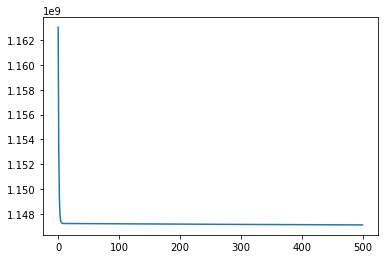

In [104]:
## Grafica de error

plt.plot(range(epoch),errorArray)

<b>7.10. Crear una funcion que nos permita visualizar con matplotlib como evoluciona el modelo entrenado en el tiempo : Crear una funcion que tome como parametro la estructura de datos conteniendo el historial de modelos ,y un valor ?n? que indica cada cuantas iteraciones graficar el modelo resultante, por ejemplo para n=3 la
funcion debe graficar la recta correspondiente al modelo junto a los datos cada 3 iteraciones, si se ejecutaron 15 iteraciones , para n = 3 se grafica el modelo de las iteraciones 3,6,9,12,15 junto con los datos de entrenamiento.

In [105]:
grafEpoch

array([1.14721172e+09, 1.14719832e+09, 1.14718553e+09, 1.14717331e+09,
       1.14716165e+09, 1.14715052e+09, 1.14713990e+09, 1.14712975e+09,
       1.14712007e+09, 1.14711082e+09])

In [106]:
x = np.array([49,98,147,196,245,294,343,392,441,490])

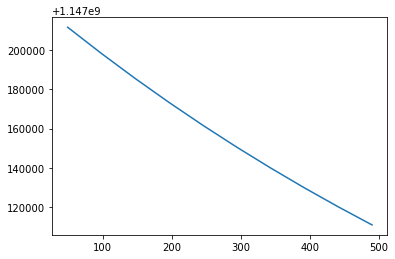

In [107]:
plt.plot(x,grafEpoch)

<b>7.11 Utilizar las funciones del punto anterior para entrenar modelos de regresion lineal y = β0+β1 ∗x , para cada una de las variables x elegidas, basandose en las funciones
para graficar las curvas de aprendizaje y comparacion del modelo vs los datos elegir el numero de ?epochs? o iteraciones a entrenar el modelo(y experimentar con el α)

Respuesta: Según los resultados y las curvas de aprendizaje generadas en los incisos anteriores, con base en los datos de entrenamiento para la variable OverallQual, se llevo acabo el siguiente proceso para determinar el valor óptimo de Alfa y Epoch.

En primer lugar, se inició con un valor de alfa de 0.20, sin embargo los resultados obtenidos mostraban una variabilidad considerable, y por tanto se utilizó un segundo valor de alfa siendo este 0.10 el cual mostró mejoras con respecto al 0.20; continuando en esta línea se determinó que el valor 0.01, muestra los datos de B0 Y B1 más estables y un error decreciente.

Por otra parte, el primer valor utilizado para el epoch fue de 50, sin embargo se determinó que al considerar una mayor cantidad de iteraciones, se obtiene un modelo más entrenado. Ademas, a partir de un valor de epoch mayor a 1000 la variación entre los datos es poco significativa para el modelo, por lo que se decidió  establecer un epoch de 500.

Se concluyó que entre más grande es el valor de alfa, la convergencia de los datos en el modelo será más dificil de alcanzar, y que al colocar un valor de alfa = 0.01 es necesario un epoch más grande para que el modelo se entrene correctamente.

<b>7.12 Para cada una de las variables x seleccionadas, usar scikit-learn para entrenar un modelo de regresion lineal: https://scikit-learn.org/stable/modules/generated/
sklearn.linear_model.LinearRegression.html

In [108]:
datasetTraining = pd.DataFrame(Data_training,columns = ['SalePrice', 'OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
datasetTraining

SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
1      181500.0          6.0    1262.0           6.0     1976.0         80.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
...         ...          ...       ...           ...        ...          ...
1163   108959.0          4.0    1258.0           6.0     1969.0         60.0
1164   194000.0          5.0    1432.0           5.0     1978.0          NaN
1165   233170.0          7.0    1502.0           7.0     2009.0         79.0
1166   245350.0          8.0    1694.0           7.0     2008.0         64.0
1167   173000.0          6.0     959.0           7.0     2000.0         58.0

[1168 rows x 6 columns]

In [109]:
datasetTest = pd.DataFrame(Data_test,columns = ['SalePrice', 'OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
datasetTest

SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0     235000.0          6.0    1236.0           7.0     1935.0        120.0
1     625000.0         10.0    1831.0          10.0     1995.0        118.0
2     171000.0          6.0    1118.0           6.0     1977.0         76.0
3     163000.0          6.0    1261.0           6.0     1958.0         76.0
4     171900.0          7.0     625.0           5.0     2006.0         35.0
..         ...          ...       ...           ...        ...          ...
287   175000.0          6.0     953.0           7.0     1999.0         62.0
288   210000.0          6.0    2073.0           7.0     1978.0         85.0
289   266500.0          7.0    1188.0           9.0     1941.0         66.0
290   142125.0          5.0    1078.0           5.0     1950.0         68.0
291   147500.0          5.0    1256.0           6.0     1965.0         75.0

[292 rows x 6 columns]

In [110]:
X1 = datasetTraining['OverallQual'].values.reshape(-1,1)
Y = datasetTraining['SalePrice'].values.reshape(-1,1)
X2 = datasetTraining['1stFlrSF'].values.reshape(-1,1)

<b> OverallQual - modelo de scikit-learn

In [111]:
from sklearn.linear_model import LinearRegression

lm_1 = LinearRegression()
lm_1.fit(X1,Y)

LinearRegression()

In [112]:
lm_1.coef_

array([[45411.99877916]])

In [113]:
lm_1.intercept_

array([-96469.57131874])

<b> prediccion estimada  del modelo 1

In [114]:
PrediccionY1 = lm_1.predict(X1)
PrediccionY1

array([[221414.42013537],
       [176002.42135622],
       [221414.42013537],
       ...,
       [221414.42013537],
       [266826.41891453],
       [176002.42135622]])

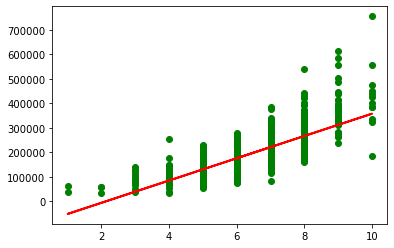

In [115]:
plt.scatter(OverallQual_2, SalePrice_1, c='g')
plt.plot(X1,PrediccionY1,color="red",linewidth=2)
plt.show()

In [116]:
lm_1.score(X1,Y)

0.6304202002336672

In [117]:
#RMSE
from sklearn import metrics
import math

X1Test = datasetTest['OverallQual'].values.reshape(-1,1)
YTest = datasetTest['SalePrice'].values.reshape(-1,1)

PredicTest1 = lm_1.predict(X1Test)
rmse = math.sqrt(metrics.mean_squared_error(YTest, PredicTest1))
rmse

51285.30597499287

In [118]:
#Guardar primer error de Sklearn


ErrorSklearn = np.array([])
ErrorSklearn = np.append(ErrorSklearn,rmse)
ErrorSklearn

array([51285.30597499])

<b> 1stFlrSF - modelo de scikit-learn

In [119]:
from sklearn.linear_model import LinearRegression

lm_2 = LinearRegression()
lm_2.fit(X2,Y)

LinearRegression()

In [120]:
lm_2.coef_

array([[129.95124229]])

In [121]:
lm_2.intercept_

array([30324.58517496])

<b> prediccion estimada del modelo 2

In [122]:
PrediccionY2 = lm_2.predict(X2)
PrediccionY2

array([[141562.84857277],
       [194323.05294136],
       [149879.72807915],
       ...,
       [225511.35109027],
       [250461.98960941],
       [154947.82652835]])

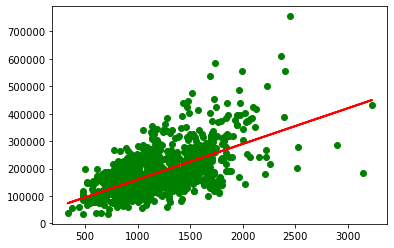

In [123]:
plt.scatter(FirstFlrSF_3, SalePrice_1, c='g')
plt.plot(X2,PrediccionY2,color="red",linewidth=2)
plt.show()

In [124]:
lm_2.score(X2,Y)

0.37981176187078936

In [125]:
#RMSE
from sklearn import metrics
import math

X2Test = datasetTest['OverallQual'].values.reshape(-1,1)

PredicTest2 = lm_2.predict(X2Test)
rmse2 = math.sqrt(metrics.mean_squared_error(YTest, PredicTest2))
rmse2

171819.55786205744

In [126]:
#Guardar segundo error de Sklearn

ErrorSklearn = np.append(ErrorSklearn,rmse2)
ErrorSklearn

array([ 51285.30597499, 171819.55786206])

<b> OverallQual - modelo manualmente

<b> prediccion estimada del modelo 1 manual

In [127]:
SalePriceTest = Data_test[:,0]
SalePriceTest = np.reshape(SalePriceTest,(-1,1))
SalePriceTest

array([[235000.],
       [625000.],
       [171000.],
       [163000.],
       [171900.],
       [200500.],
       [239000.],
       [285000.],
       [119500.],
       [115000.],
       [154900.],
       [ 93000.],
       [250000.],
       [392500.],
       [745000.],
       [120000.],
       [186700.],
       [104900.],
       [ 95000.],
       [262000.],
       [195000.],
       [189000.],
       [168000.],
       [174000.],
       [125000.],
       [165000.],
       [158000.],
       [176000.],
       [219210.],
       [144000.],
       [178000.],
       [148000.],
       [116050.],
       [197900.],
       [117000.],
       [213000.],
       [153500.],
       [271900.],
       [107000.],
       [200000.],
       [140000.],
       [290000.],
       [189000.],
       [164000.],
       [113000.],
       [145000.],
       [134500.],
       [125000.],
       [112000.],
       [229456.],
       [ 80500.],
       [ 91500.],
       [115000.],
       [134000.],
       [143000.],
       [13

In [128]:
OverallQualTest = Data_test[:,1]
OverallQualTest = np.reshape(OverallQualTest,(-1,1))
OverallQualTest


array([[ 6.],
       [10.],
       [ 6.],
       [ 6.],
       [ 7.],
       [ 5.],
       [ 6.],
       [ 8.],
       [ 5.],
       [ 6.],
       [ 5.],
       [ 5.],
       [ 7.],
       [ 8.],
       [10.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 3.],
       [ 8.],
       [ 7.],
       [ 7.],
       [ 4.],
       [ 8.],
       [ 5.],
       [ 6.],
       [ 6.],
       [ 6.],
       [ 7.],
       [ 7.],
       [ 7.],
       [ 4.],
       [ 4.],
       [ 7.],
       [ 5.],
       [ 7.],
       [ 5.],
       [ 7.],
       [ 4.],
       [ 6.],
       [ 5.],
       [ 8.],
       [ 6.],
       [ 8.],
       [ 4.],
       [ 4.],
       [ 5.],
       [ 5.],
       [ 6.],
       [ 8.],
       [ 4.],
       [ 6.],
       [ 5.],
       [ 5.],
       [ 6.],
       [ 5.],
       [ 7.],
       [ 6.],
       [ 6.],
       [ 5.],
       [ 9.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 4.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 7.],
       [ 7.],
       [ 6.],
      

In [129]:
PredTest1 = np.empty_like(OverallQualTest)
ErrorTest1 = np.empty_like(OverallQualTest)
ErrorCuadradoTest1 = np.empty_like(OverallQualTest)


for i in range(len(OverallQualTest)):
    PredTest1[i] = -93648.83469326 + (44971.55128958*OverallQualTest[i])
    ErrorTest1[i] = (SalePriceTest[i]-PredTest1[i])
    ErrorCuadradoTest1[i] = np.power((SalePriceTest[i]-PredTest1[i]),2)


In [130]:
suma= sum(ErrorCuadradoTest1)
n = len(OverallQualTest)
resultadoTest = np.sqrt(suma/n)
resultadoTest

array([51285.81333569])

In [131]:
#Guardar primer error de modelo manual

ErrorManual = np.array([])
ErrorManual = np.append(ErrorManual,resultadoTest)
ErrorManual

array([51285.81333569])

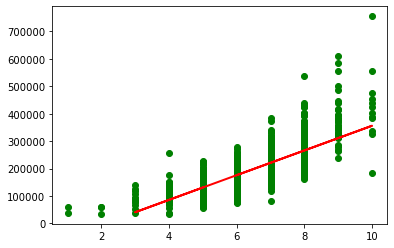

In [132]:
plt.scatter(OverallQual_2, SalePrice_1, c='g')
plt.plot(OverallQualTest,PredTest1,color="red",linewidth=2)
plt.show()

<b> 1stFlrSF - modelo entrenado manualmente


<b> Codigo de FirstFlrSF

In [133]:
def error_final(Error1Alcuadrado2):
    suma= sum(Error1Alcuadrado2)
    n = len(Error1Alcuadrado2)
    resultado = suma/(2*n)
    return resultado

def gradianteB12(GradienteB12, tempB1):
    Sum_GradB1 = sum(GradienteB12)
    n = len(GradienteB12)
    Average_GradB1 = Sum_GradB1/n
    PB1 = tempB1 - (Alpha*Average_GradB1)
    return PB1

def gradianteB02(GradienteB02, tempB0):
    Sum_GradB0 = sum(GradienteB02)
    n = len(GradienteB02)
    Average_GradB0 = Sum_GradB0/n
    PB0 = tempB0 - (Alpha*Average_GradB0)
    return PB0


B0 = np.array([27324.58517])
B1 = np.array([124.951])
#Learning Rate
Alpha = 0.0000001
epoch = 500

errorArray2 = np.array([])
grafEpoch = np.array([])

B0_parametro = 0
B1_parametro = 0
tempB1 = 0
tempB0 = 0
Prediccion12 = np.empty_like(SalePrice1)
Error12 = np.empty_like(SalePrice1)
Error1Alcuadrado2 = np.empty_like(SalePrice1)
GradienteB12 = np.empty_like(FirstFlrSF3)
GradienteB02 = np.empty_like(FirstFlrSF3)
diccionarioError2 = {}
DiccionarioB1B02 = {}

lista=[]
listaB1=[]
listaB0=[]

starter = 0
rango = 10
starter2 = 0
rango2 = 49
ErrorFinal2 = 0
ParametroFinalPB1 = 0
ParametroFinalPB0 = 0

for j in range(epoch):
    starter = 0
    rango = 10
    
    print('Epoch ' + str(j))
    if B0_parametro == 0:
        B0_parametro = B0
        B1_parametro = B1

    else:
        B0_parametro = ParametroFinalPB0
        B1_parametro = ParametroFinalPB1
        ErrorFinal2 = 0

    
    for i in range(len(FirstFlrSF3)):
        Prediccion12[i] = B0_parametro + (B1_parametro*FirstFlrSF3[i])
        Error12[i] = (SalePrice1[i]-Prediccion12[i])
        Error1Alcuadrado2[i] = np.power((SalePrice1[i]-Prediccion12[i]),2)
        GradienteB12[i] = (Prediccion12[i]-SalePrice1[i])*(FirstFlrSF3[i])
        GradienteB02[i] = (Prediccion12[i]-SalePrice1[i])
        if starter == rango:
            print('Iteracion ' + str(i) + ', El error es: ' +str((Error12[i])))
            rango = rango + 10
        starter = starter + 1
    ErrorFinal2 = error_final(Error1Alcuadrado2)
  
    if starter2 == rango2:
        grafEpoch = np.append(grafEpoch,ErrorFinal2)
        rango2 = rango2 + 49
    starter2 = starter2 + 1    
  
    errorArray2 = np.append(errorArray2,ErrorFinal2)
    
    tempB1 = B1_parametro
    tempB0 = B0_parametro

    
    ParametroFinalPB1 = gradianteB12(GradienteB12,tempB1)

    ParametroFinalPB0 = gradianteB02(GradienteB02,tempB0)

    diccionarioError2[j] = ErrorFinal2

    Resultado = str(ParametroFinalPB1)+str(',')+str(ParametroFinalPB0)
    lista.append((ParametroFinalPB1,ParametroFinalPB0))
    listaB1.append(ParametroFinalPB1)
    listaB0.append(ParametroFinalPB0)
    DiccionarioB1B02[j] = lista
    lista = []
    listaB1 = []
    listaB0 = []
    

    print('____________________________________________________________________________')
    print(' ')

Epoch 0
Iteracion 10, El error es: [-27773.62517]
Iteracion 20, El error es: [153282.15683]
Iteracion 30, El error es: [-68417.78417]
Iteracion 40, El error es: [-32759.70917]
Iteracion 50, El error es: [50464.32083]
Iteracion 60, El error es: [-14017.84317]
Iteracion 70, El error es: [-61090.65817]
Iteracion 80, El error es: [18483.33283]
Iteracion 90, El error es: [-47373.62517]
Iteracion 100, El error es: [-23495.69517]
Iteracion 110, El error es: [-42365.00117]
Iteracion 120, El error es: [29223.82683]
Iteracion 130, El error es: [46734.99883]
Iteracion 140, El error es: [-20282.24917]
Iteracion 150, El error es: [-26402.10417]
Iteracion 160, El error es: [-18764.21717]
Iteracion 170, El error es: [-5532.73917]
Iteracion 180, El error es: [53588.09583]
Iteracion 190, El error es: [94126.31583]
Iteracion 200, El error es: [-27394.65617]
Iteracion 210, El error es: [-37282.24917]
Iteracion 220, El error es: [-9601.18317]
Iteracion 230, El error es: [-28516.07917]
Iteracion 240, El er

Iteracion 110, El error es: [-44809.50655154]
Iteracion 120, El error es: [27237.6659017]
Iteracion 130, El error es: [44290.49344846]
Iteracion 140, El error es: [-22019.13504477]
Iteracion 150, El error es: [-28350.06972719]
Iteracion 160, El error es: [-21240.88707458]
Iteracion 170, El error es: [-7249.52221788]
Iteracion 180, El error es: [52042.18681075]
Iteracion 190, El error es: [91012.38631279]
Iteracion 200, El error es: [-29648.18469602]
Iteracion 210, El error es: [-39019.13504477]
Iteracion 220, El error es: [-12612.58827004]
Iteracion 230, El error es: [-30916.35833237]
Iteracion 240, El error es: [36354.04450707]
Iteracion 250, El error es: [-116636.02199362]
Iteracion 260, El error es: [-26785.07947803]
Iteracion 270, El error es: [99652.80865391]
Iteracion 280, El error es: [51995.90603873]
Iteracion 290, El error es: [68914.18917694]
Iteracion 300, El error es: [-39944.86047431]
Iteracion 310, El error es: [49783.3991644]
Iteracion 320, El error es: [156743.7711197]


Iteracion 860, El error es: [46117.68624914]
Iteracion 870, El error es: [-32032.81915275]
Iteracion 880, El error es: [-9571.76033217]
Iteracion 890, El error es: [9727.61422394]
Iteracion 900, El error es: [-26933.82995653]
Iteracion 910, El error es: [-14188.0058306]
Iteracion 920, El error es: [54101.69345166]
Iteracion 930, El error es: [-13605.64749269]
Iteracion 940, El error es: [-97176.06886518]
Iteracion 950, El error es: [-8700.3281559]
Iteracion 960, El error es: [-20433.82995653]
Iteracion 970, El error es: [15695.62862898]
Iteracion 980, El error es: [23453.46235827]
Iteracion 990, El error es: [140931.58480111]
Iteracion 1000, El error es: [-65920.3041475]
Iteracion 1010, El error es: [15695.62862898]
Iteracion 1020, El error es: [4062.75227224]
Iteracion 1030, El error es: [11568.69705292]
Iteracion 1040, El error es: [-102657.29635731]
Iteracion 1050, El error es: [-17169.69670991]
Iteracion 1060, El error es: [15246.31409387]
Iteracion 1070, El error es: [-26206.27293

Iteracion 690, El error es: [4288.11370388]
Iteracion 700, El error es: [52985.39256851]
Iteracion 710, El error es: [-69361.5461542]
Iteracion 720, El error es: [22967.07095701]
Iteracion 730, El error es: [720.37228375]
Iteracion 740, El error es: [5607.67010181]
Iteracion 750, El error es: [-32988.19681757]
Iteracion 760, El error es: [-11275.79757571]
Iteracion 770, El error es: [-3101.83084586]
Iteracion 780, El error es: [-12954.64056064]
Iteracion 790, El error es: [-14823.23942344]
Iteracion 800, El error es: [93214.82725788]
Iteracion 810, El error es: [-15178.33003919]
Iteracion 820, El error es: [52737.83645259]
Iteracion 830, El error es: [-40884.86980205]
Iteracion 840, El error es: [8189.9029929]
Iteracion 850, El error es: [-5211.88629612]
Iteracion 860, El error es: [44982.46858554]
Iteracion 870, El error es: [-33145.63122493]
Iteracion 880, El error es: [-10928.54439986]
Iteracion 890, El error es: [8891.13777933]
Iteracion 900, El error es: [-28001.83084586]
Iteracio

Iteracion 380, El error es: [-33600.68882446]
Iteracion 390, El error es: [-33157.27120965]
Iteracion 400, El error es: [50865.84325119]
Iteracion 410, El error es: [-133075.37195838]
Iteracion 420, El error es: [4391.5142292]
Iteracion 430, El error es: [-4665.6770576]
Iteracion 440, El error es: [215658.65520647]
Iteracion 450, El error es: [-22932.25879437]
Iteracion 460, El error es: [128034.66528745]
Iteracion 470, El error es: [-10432.48551144]
Iteracion 480, El error es: [58362.75556615]
Iteracion 490, El error es: [7657.79151516]
Iteracion 500, El error es: [-1616.53750684]
Iteracion 510, El error es: [-39476.56168898]
Iteracion 520, El error es: [-11224.30962263]
Iteracion 530, El error es: [-48341.77663919]
Iteracion 540, El error es: [48921.54035658]
Iteracion 550, El error es: [-26186.3343235]
Iteracion 560, El error es: [-86643.62493252]
Iteracion 570, El error es: [-109189.5990645]
Iteracion 580, El error es: [-31049.87803634]
Iteracion 590, El error es: [58553.38670466]


____________________________________________________________________________
 
Epoch 9
Iteracion 10, El error es: [-33602.47964484]
Iteracion 20, El error es: [146791.95208589]
Iteracion 30, El error es: [-72055.21529498]
Iteracion 40, El error es: [-40180.28802172]
Iteracion 50, El error es: [46014.21352668]
Iteracion 60, El error es: [-20508.04791411]
Iteracion 70, El error es: [-73549.8293274]
Iteracion 80, El error es: [11858.61616672]
Iteracion 90, El error es: [-53202.47964484]
Iteracion 100, El error es: [-32519.2077252]
Iteracion 110, El error es: [-49180.27638544]
Iteracion 120, El error es: [23686.4148467]
Iteracion 130, El error es: [39919.72361456]
Iteracion 140, El error es: [-25124.68290424]
Iteracion 150, El error es: [-31833.02755062]
Iteracion 160, El error es: [-25669.16699822]
Iteracion 170, El error es: [-10319.12627125]
Iteracion 180, El error es: [49278.10510916]
Iteracion 190, El error es: [85444.68773604]
Iteracion 200, El error es: [-33677.48837205]
Iteracion 2

Iteracion 900, El error es: [-29562.40695394]
Iteracion 910, El error es: [-17573.2936401]
Iteracion 920, El error es: [51234.15514517]
Iteracion 930, El error es: [-18096.89725833]
Iteracion 940, El error es: [-102469.98354082]
Iteracion 950, El error es: [-11347.28679247]
Iteracion 960, El error es: [-23062.40695394]
Iteracion 970, El error es: [13489.82933226]
Iteracion 980, El error es: [20392.9168406]
Iteracion 990, El error es: [136621.08782055]
Iteracion 1000, El error es: [-68812.3513062]
Iteracion 1010, El error es: [13489.82933226]
Iteracion 1020, El error es: [594.74708652]
Iteracion 1030, El error es: [8664.39546811]
Iteracion 1040, El error es: [-108180.98152244]
Iteracion 1050, El error es: [-21158.51500517]
Iteracion 1060, El error es: [11147.20596365]
Iteracion 1070, El error es: [-29416.93517406]
Iteracion 1080, El error es: [-46887.72952262]
Iteracion 1090, El error es: [-70470.42872269]
Iteracion 1100, El error es: [-24620.81825683]
Iteracion 1110, El error es: [5955

Iteracion 610, El error es: [91994.58031268]
Iteracion 620, El error es: [-73698.7343811]
Iteracion 630, El error es: [-46223.2510378]
Iteracion 640, El error es: [47483.33720343]
Iteracion 650, El error es: [70762.50872816]
Iteracion 660, El error es: [20722.08503862]
Iteracion 670, El error es: [49334.99494666]
Iteracion 680, El error es: [-5440.71874885]
Iteracion 690, El error es: [2400.78680338]
Iteracion 700, El error es: [48979.27632703]
Iteracion 710, El error es: [-70984.02438707]
Iteracion 720, El error es: [19090.04062075]
Iteracion 730, El error es: [-2876.23005149]
Iteracion 740, El error es: [3898.39272576]
Iteracion 750, El error es: [-34750.88905095]
Iteracion 760, El error es: [-13198.7343811]
Iteracion 770, El error es: [-5011.41393692]
Iteracion 780, El error es: [-15743.34317868]
Iteracion 790, El error es: [-17371.57518347]
Iteracion 800, El error es: [91843.84397829]
Iteracion 810, El error es: [-18091.66732435]
Iteracion 820, El error es: [50961.79050487]
Iteraci

Iteracion 350, El error es: [44933.7928953]
Iteracion 360, El error es: [8733.20161234]
Iteracion 370, El error es: [19741.06288987]
Iteracion 380, El error es: [-35259.57434769]
Iteracion 390, El error es: [-34711.0617389]
Iteracion 400, El error es: [48783.34405998]
Iteracion 410, El error es: [-135138.46899686]
Iteracion 420, El error es: [2218.47165857]
Iteracion 430, El error es: [-5446.61516968]
Iteracion 440, El error es: [211774.98950326]
Iteracion 450, El error es: [-24246.75610659]
Iteracion 460, El error es: [126689.44790007]
Iteracion 470, El error es: [-12860.98975971]
Iteracion 480, El error es: [55371.58888864]
Iteracion 490, El error es: [6661.81287696]
Iteracion 500, El error es: [-2703.05952446]
Iteracion 510, El error es: [-41680.32433477]
Iteracion 520, El error es: [-12346.40225358]
Iteracion 530, El error es: [-50781.59880989]
Iteracion 540, El error es: [45949.7758318]
Iteracion 550, El error es: [-27914.74422734]
Iteracion 560, El error es: [-88894.27611408]
Ite

Iteracion 210, El error es: [-43139.53027656]
Iteracion 220, El error es: [-19756.51123057]
Iteracion 230, El error es: [-36610.51405389]
Iteracion 240, El error es: [28885.83150622]
Iteracion 250, El error es: [-122864.3024874]
Iteracion 260, El error es: [-33375.80178157]
Iteracion 270, El error es: [94430.78107931]
Iteracion 280, El error es: [46392.36076966]
Iteracion 290, El error es: [63768.46514124]
Iteracion 300, El error es: [-46316.21010352]
Iteracion 310, El error es: [46459.42211984]
Iteracion 320, El error es: [150787.32198323]
Iteracion 330, El error es: [-135954.46962083]
Iteracion 340, El error es: [44767.26697412]
Iteracion 350, El error es: [44532.56458341]
Iteracion 360, El error es: [8537.41753764]
Iteracion 370, El error es: [19536.47712895]
Iteracion 380, El error es: [-35479.83140361]
Iteracion 390, El error es: [-34917.36490202]
Iteracion 400, El error es: [48506.84208227]
Iteracion 410, El error es: [-135412.39487128]
Iteracion 420, El error es: [1929.94786551]

Iteracion 110, El error es: [-50798.22133468]
Iteracion 120, El error es: [22371.83433223]
Iteracion 130, El error es: [38301.77866532]
Iteracion 140, El error es: [-26274.27574366]
Iteracion 150, El error es: [-33122.32769552]
Iteracion 160, El error es: [-27308.40067973]
Iteracion 170, El error es: [-11455.413653]
Iteracion 180, El error es: [48254.91411756]
Iteracion 190, El error es: [83383.67104654]
Iteracion 200, El error es: [-35169.03147347]
Iteracion 210, El error es: [-43274.27574366]
Iteracion 220, El error es: [-19990.13229113]
Iteracion 230, El error es: [-36796.72473524]
Iteracion 240, El error es: [28641.60549243]
Iteracion 250, El error es: [-123067.98015057]
Iteracion 260, El error es: [-33591.33203954]
Iteracion 270, El error es: [94260.00996223]
Iteracion 280, El error es: [46209.113237]
Iteracion 290, El error es: [63600.18930728]
Iteracion 300, El error es: [-46524.56642253]
Iteracion 310, El error es: [46350.72117027]
Iteracion 320, El error es: [150592.53376616]


Iteracion 1130, El error es: [-67550.70315961]
Iteracion 1140, El error es: [-13938.49073374]
Iteracion 1150, El error es: [-26299.54326428]
Iteracion 1160, El error es: [5860.40449314]
____________________________________________________________________________
 
Epoch 20
Iteracion 10, El error es: [-35104.07735888]
Iteracion 20, El error es: [145119.98094874]
Iteracion 30, El error es: [-72992.27056465]
Iteracion 40, El error es: [-42091.93702528]
Iteracion 50, El error es: [44867.80108455]
Iteracion 60, El error es: [-22180.01905126]
Iteracion 70, El error es: [-76759.49280025]
Iteracion 80, El error es: [10151.99280792]
Iteracion 90, El error es: [-54704.07735888]
Iteracion 100, El error es: [-34843.79570341]
Iteracion 110, El error es: [-50935.99039158]
Iteracion 120, El error es: [22259.89694623]
Iteracion 130, El error es: [38164.00960842]
Iteracion 140, El error es: [-26372.16432618]
Iteracion 150, El error es: [-33232.11244228]
Iteracion 160, El error es: [-27447.98248546]
Ite

____________________________________________________________________________
 
Epoch 22
Iteracion 10, El error es: [-35189.67649768]
Iteracion 20, El error es: [145024.66961372]
Iteracion 30, El error es: [-73045.68776509]
Iteracion 40, El error es: [-42200.91128043]
Iteracion 50, El error es: [44802.44940569]
Iteracion 60, El error es: [-22275.33038628]
Iteracion 70, El error es: [-76942.4608216]
Iteracion 80, El error es: [10054.70611095]
Iteracion 90, El error es: [-54789.67649768]
Iteracion 100, El error es: [-34976.30968841]
Iteracion 110, El error es: [-51036.07551797]
Iteracion 120, El error es: [22178.57775832]
Iteracion 130, El error es: [38063.92448203]
Iteracion 140, El error es: [-26443.27747738]
Iteracion 150, El error es: [-33311.86780199]
Iteracion 160, El error es: [-27549.38451982]
Iteracion 170, El error es: [-11622.45935123]
Iteracion 180, El error es: [48104.49472107]
Iteracion 190, El error es: [83080.68088113]
Iteracion 200, El error es: [-35388.30331952]
Iteracio

Iteracion 920, El error es: [50016.61782408]
Iteracion 930, El error es: [-20003.85129408]
Iteracion 940, El error es: [-104717.74357514]
Iteracion 950, El error es: [-12471.16750326]
Iteracion 960, El error es: [-24178.48294721]
Iteracion 970, El error es: [12553.26184205]
Iteracion 980, El error es: [19093.42998551]
Iteracion 990, El error es: [134790.88017379]
Iteracion 1000, El error es: [-70040.29491732]
Iteracion 1010, El error es: [12553.26184205]
Iteracion 1020, El error es: [-877.74434037]
Iteracion 1030, El error es: [7431.24871197]
Iteracion 1040, El error es: [-110526.30052582]
Iteracion 1050, El error es: [-22852.14009526]
Iteracion 1060, El error es: [9406.75256842]
Iteracion 1070, El error es: [-30780.16055561]
Iteracion 1080, El error es: [-48524.12001752]
Iteracion 1090, El error es: [-71823.2478142]
Iteracion 1100, El error es: [-25190.56402338]
Iteracion 1110, El error es: [58551.21493023]
Iteracion 1120, El error es: [-42624.05321928]
Iteracion 1130, El error es: [-

Iteracion 920, El error es: [49968.91558052]
Iteracion 930, El error es: [-20078.56436871]
Iteracion 940, El error es: [-104805.8091738]
Iteracion 950, El error es: [-12515.2003509]
Iteracion 960, El error es: [-24222.21001186]
Iteracion 970, El error es: [12516.56778625]
Iteracion 980, El error es: [19042.51702052]
Iteracion 990, El error es: [134719.17396526]
Iteracion 1000, El error es: [-70088.40487154]
Iteracion 1010, El error es: [12516.56778625]
Iteracion 1020, El error es: [-935.43549504]
Iteracion 1030, El error es: [7382.93490243]
Iteracion 1040, El error es: [-110618.1884119]
Iteracion 1050, El error es: [-22918.4951014]
Iteracion 1060, El error es: [9338.56286431]
Iteracion 1070, El error es: [-30833.57074837]
Iteracion 1080, El error es: [-48588.23261505]
Iteracion 1090, El error es: [-71876.25029631]
Iteracion 1100, El error es: [-25212.8862785]
Iteracion 1110, El error es: [58511.81979132]
Iteracion 1120, El error es: [-42675.62871408]
Iteracion 1130, El error es: [-6783

Iteracion 1030, El error es: [7347.83635157]
Iteracion 1040, El error es: [-110684.94222404]
Iteracion 1050, El error es: [-22966.70004114]
Iteracion 1060, El error es: [9289.02507147]
Iteracion 1070, El error es: [-30872.37166897]
Iteracion 1080, El error es: [-48634.8085121]
Iteracion 1090, El error es: [-71914.75502732]
Iteracion 1100, El error es: [-25229.10274368]
Iteracion 1110, El error es: [58483.20038751]
Iteracion 1120, El error es: [-42713.09678157]
Iteracion 1130, El error es: [-67888.95412648]
Iteracion 1140, El error es: [-14180.97196925]
Iteracion 1150, El error es: [-26536.93036514]
Iteracion 1160, El error es: [5642.62981067]
____________________________________________________________________________
 
Epoch 28
Iteracion 10, El error es: [-35329.856284]
Iteracion 20, El error es: [144868.58484446]
Iteracion 30, El error es: [-73133.16544694]
Iteracion 40, El error es: [-42379.37085619]
Iteracion 50, El error es: [44695.42746515]
Iteracion 60, El error es: [-22431.4151

Iteracion 860, El error es: [42032.58145856]
Iteracion 870, El error es: [-36037.29695888]
Iteracion 880, El error es: [-14454.17641347]
Iteracion 890, El error es: [6717.53589275]
Iteracion 900, El error es: [-30777.05379375]
Iteracion 910, El error es: [-19137.61106561]
Iteracion 920, El error es: [49909.08601514]
Iteracion 930, El error es: [-20172.27169371]
Iteracion 940, El error es: [-104916.26361771]
Iteracion 950, El error es: [-12570.4276546]
Iteracion 960, El error es: [-24277.05379375]
Iteracion 970, El error es: [12470.54500591]
Iteracion 980, El error es: [18978.66047616]
Iteracion 990, El error es: [134629.23793803]
Iteracion 1000, El error es: [-70148.74579934]
Iteracion 1010, El error es: [12470.54500591]
Iteracion 1020, El error es: [-1007.79343946]
Iteracion 1030, El error es: [7322.33829343]
Iteracion 1040, El error es: [-110733.43687839]
Iteracion 1050, El error es: [-23001.71949701]
Iteracion 1060, El error es: [9253.03733786]
Iteracion 1070, El error es: [-30900.5

Iteracion 630, El error es: [-47343.22610169]
Iteracion 640, El error es: [45922.16037115]
Iteracion 650, El error es: [69917.12777185]
Iteracion 660, El error es: [19547.60253015]
Iteracion 670, El error es: [48576.0031478]
Iteracion 680, El error es: [-6389.97238256]
Iteracion 690, El error es: [1528.66634597]
Iteracion 700, El error es: [47128.0787519]
Iteracion 710, El error es: [-71733.76020478]
Iteracion 720, El error es: [17298.49270196]
Iteracion 730, El error es: [-4538.19423412]
Iteracion 740, El error es: [3108.54765639]
Iteracion 750, El error es: [-35565.41673674]
Iteracion 760, El error es: [-14087.30991612]
Iteracion 770, El error es: [-5893.81881784]
Iteracion 780, El error es: [-17031.98278807]
Iteracion 790, El error es: [-18549.14301899]
Iteracion 800, El error es: [91210.3221462]
Iteracion 810, El error es: [-19437.89970536]
Iteracion 820, El error es: [50141.09216498]
Iteracion 830, El error es: [-45414.52656493]
Iteracion 840, El error es: [5554.10996842]
Iteracio

Iteracion 350, El error es: [43537.40077518]
Iteracion 360, El error es: [8051.81547585]
Iteracion 370, El error es: [19029.04431312]
Iteracion 380, El error es: [-36026.13361075]
Iteracion 390, El error es: [-35429.05737716]
Iteracion 400, El error es: [47821.03603233]
Iteracion 410, El error es: [-136091.81143224]
Iteracion 420, El error es: [1214.32420031]
Iteracion 430, El error es: [-5807.48138247]
Iteracion 440, El error es: [209980.37565976]
Iteracion 450, El error es: [-24854.17610684]
Iteracion 460, El error es: [126067.83237872]
Iteracion 470, El error es: [-13983.18418287]
Iteracion 480, El error es: [53989.39228961]
Iteracion 490, El error es: [6201.57801649]
Iteracion 500, El error es: [-3205.13381552]
Iteracion 510, El error es: [-42698.66731412]
Iteracion 520, El error es: [-12864.91346381]
Iteracion 530, El error es: [-51909.02316187]
Iteracion 540, El error es: [44576.54482505]
Iteracion 550, El error es: [-28713.43019605]
Iteracion 560, El error es: [-89934.28594141]


Iteracion 1100, El error es: [-25258.09780878]
Iteracion 1110, El error es: [58432.028923]
Iteracion 1120, El error es: [-42780.08961761]
Iteracion 1130, El error es: [-67976.86559598]
Iteracion 1140, El error es: [-14243.99291285]
Iteracion 1150, El error es: [-26598.6273446]
Iteracion 1160, El error es: [5586.03009317]
____________________________________________________________________________
 
Epoch 35
Iteracion 10, El error es: [-35388.53628511]
Iteracion 20, El error es: [144803.24694769]
Iteracion 30, El error es: [-73169.7841158]
Iteracion 40, El error es: [-42454.07494517]
Iteracion 50, El error es: [44650.62748382]
Iteracion 60, El error es: [-22496.75305231]
Iteracion 70, El error es: [-77367.52302754]
Iteracion 80, El error es: [9828.69438486]
Iteracion 90, El error es: [-54988.53628511]
Iteracion 100, El error es: [-35284.15965213]
Iteracion 110, El error es: [-51268.58841247]
Iteracion 120, El error es: [21989.66093434]
Iteracion 130, El error es: [37831.41158753]
Iterac

Iteracion 760, El error es: [-14111.97850419]
Iteracion 770, El error es: [-5918.31609741]
Iteracion 780, El error es: [-17067.75787718]
Iteracion 790, El error es: [-18581.83455512]
Iteracion 800, El error es: [91192.73430944]
Iteracion 810, El error es: [-19475.27367381]
Iteracion 820, El error es: [50118.30797041]
Iteracion 830, El error es: [-45454.27030095]
Iteracion 840, El error es: [5530.98315684]
Iteracion 850, El error es: [-7995.54541944]
Iteracion 860, El error es: [41988.72224156]
Iteracion 870, El error es: [-36080.2905381]
Iteracion 880, El error es: [-14506.59582629]
Iteracion 890, El error es: [6685.21851281]
Iteracion 900, El error es: [-30818.31609741]
Iteracion 910, El error es: [-19190.75184324]
Iteracion 920, El error es: [49864.07261443]
Iteracion 930, El error es: [-20242.77331792]
Iteracion 940, El error es: [-104999.36508071]
Iteracion 950, El error es: [-12611.97850419]
Iteracion 960, El error es: [-24318.31609741]
Iteracion 970, El error es: [12435.91925856]

Iteracion 500, El error es: [-3219.07241295]
Iteracion 510, El error es: [-42726.93844372]
Iteracion 520, El error es: [-12879.3083792]
Iteracion 530, El error es: [-51940.32258336]
Iteracion 540, El error es: [44538.42137594]
Iteracion 550, El error es: [-28735.60325841]
Iteracion 560, El error es: [-89963.15858105]
Iteracion 570, El error es: [-113310.39879283]
Iteracion 580, El error es: [-34457.64634246]
Iteracion 590, El error es: [56717.14919195]
Iteracion 600, El error es: [107719.51472471]
Iteracion 610, El error es: [90425.03136601]
Iteracion 620, El error es: [-74617.49539111]
Iteracion 630, El error es: [-47381.27231864]
Iteracion 640, El error es: [45869.12633954]
Iteracion 650, El error es: [69888.40963536]
Iteracion 660, El error es: [19507.70467176]
Iteracion 670, El error es: [48550.21968831]
Iteracion 680, El error es: [-6422.21911877]
Iteracion 690, El error es: [1499.03985707]
Iteracion 700, El error es: [47065.19259037]
Iteracion 710, El error es: [-71759.22923459]


Iteracion 150, El error es: [-33511.75287562]
Iteracion 160, El error es: [-27803.52098419]
Iteracion 170, El error es: [-11798.62233385]
Iteracion 180, El error es: [47945.8654579]
Iteracion 190, El error es: [82761.15395719]
Iteracion 200, El error es: [-35619.54280909]
Iteracion 210, El error es: [-43621.50325052]
Iteracion 220, El error es: [-20592.15336776]
Iteracion 230, El error es: [-37276.57350082]
Iteracion 240, El error es: [28012.25639884]
Iteracion 250, El error es: [-123592.83976759]
Iteracion 260, El error es: [-34146.73473433]
Iteracion 270, El error es: [93819.94757427]
Iteracion 280, El error es: [45736.90024086]
Iteracion 290, El error es: [63166.55704095]
Iteracion 300, El error es: [-47061.48251762]
Iteracion 310, El error es: [46070.60805796]
Iteracion 320, El error es: [150090.58145746]
Iteracion 330, El error es: [-136918.4144513]
Iteracion 340, El error es: [44213.33292436]
Iteracion 350, El error es: [43489.96462357]
Iteracion 360, El error es: [8028.66834943]

____________________________________________________________________________
 
Epoch 42
Iteracion 10, El error es: [-35407.71207055]
Iteracion 20, El error es: [144781.89547229]
Iteracion 30, El error es: [-73181.7506235]
Iteracion 40, El error es: [-42478.48713694]
Iteracion 50, El error es: [44635.9874588]
Iteracion 60, El error es: [-22518.10452771]
Iteracion 70, El error es: [-77408.51102669]
Iteracion 80, El error es: [9806.90039626]
Iteracion 90, El error es: [-55007.71207055]
Iteracion 100, El error es: [-35313.84512634]
Iteracion 110, El error es: [-51291.00929479]
Iteracion 120, El error es: [21971.44392753]
Iteracion 130, El error es: [37808.99070521]
Iteracion 140, El error es: [-26624.4148463]
Iteracion 150, El error es: [-33515.01830395]
Iteracion 160, El error es: [-27807.67267881]
Iteracion 170, El error es: [-11801.50023129]
Iteracion 180, El error es: [47943.27399633]
Iteracion 190, El error es: [82755.93402525]
Iteracion 200, El error es: [-35623.32045216]
Iteracion 2

Iteracion 1020, El error es: [-1080.0226294]
Iteracion 1030, El error es: [7261.84946453]
Iteracion 1040, El error es: [-110848.48010237]
Iteracion 1050, El error es: [-23084.79575966]
Iteracion 1060, El error es: [9167.66404805]
Iteracion 1070, El error es: [-30967.42884739]
Iteracion 1080, El error es: [-48748.91330242]
Iteracion 1090, El error es: [-72009.08658244]
Iteracion 1100, El error es: [-25268.83114469]
Iteracion 1110, El error es: [58413.08651038]
Iteracion 1120, El error es: [-42804.8886551]
Iteracion 1130, El error es: [-68009.40812076]
Iteracion 1140, El error es: [-14267.32166795]
Iteracion 1150, El error es: [-26621.46600557]
Iteracion 1160, El error es: [5565.07829461]
____________________________________________________________________________
 
Epoch 44
Iteracion 10, El error es: [-35410.25812404]
Iteracion 20, El error es: [144779.0605463]
Iteracion 30, El error es: [-73183.33948085]
Iteracion 40, El error es: [-42481.72844288]
Iteracion 50, El error es: [44634.043

Iteracion 840, El error es: [5516.56335965]
Iteracion 850, El error es: [-8010.64168832]
Iteracion 860, El error es: [41972.48665195]
Iteracion 870, El error es: [-36096.20569375]
Iteracion 880, El error es: [-14526.00015169]
Iteracion 890, El error es: [6673.25537595]
Iteracion 900, El error es: [-30833.59038515]
Iteracion 910, El error es: [-19210.42319694]
Iteracion 920, El error es: [49847.40977955]
Iteracion 930, El error es: [-20268.87115262]
Iteracion 940, El error es: [-105030.12700966]
Iteracion 950, El error es: [-12627.35960325]
Iteracion 960, El error es: [-24333.59038515]
Iteracion 970, El error es: [12423.10163115]
Iteracion 980, El error es: [18912.8329895]
Iteracion 990, El error es: [134536.52615869]
Iteracion 1000, El error es: [-70210.94917792]
Iteracion 1010, El error es: [12423.10163115]
Iteracion 1020, El error es: [-1082.38467839]
Iteracion 1030, El error es: [7259.87134335]
Iteracion 1040, El error es: [-110852.24223591]
Iteracion 1050, El error es: [-23087.5125

Iteracion 770, El error es: [-5934.89101208]
Iteracion 780, El error es: [-17091.96328381]
Iteracion 790, El error es: [-18603.95365002]
Iteracion 800, El error es: [91180.83427845]
Iteracion 810, El error es: [-19500.5608717]
Iteracion 820, El error es: [50102.8921178]
Iteracion 830, El error es: [-45481.16086804]
Iteracion 840, El error es: [5515.33549183]
Iteracion 850, El error es: [-8011.9271571]
Iteracion 860, El error es: [41971.10417103]
Iteracion 870, El error es: [-36097.56089001]
Iteracion 880, El error es: [-14527.65244763]
Iteracion 890, El error es: [6672.23669056]
Iteracion 900, El error es: [-30834.89101208]
Iteracion 910, El error es: [-19212.0982301]
Iteracion 920, El error es: [49845.99091907]
Iteracion 930, El error es: [-20271.09339489]
Iteracion 940, El error es: [-105032.74639538]
Iteracion 950, El error es: [-12628.66932507]
Iteracion 960, El error es: [-24334.89101208]
Iteracion 970, El error es: [12422.01018665]
Iteracion 980, El error es: [18911.3186327]
Iter

Iteracion 300, El error es: [-47074.03451713]
Iteracion 310, El error es: [46064.05947154]
Iteracion 320, El error es: [150078.84682405]
Iteracion 330, El error es: [-136934.64929579]
Iteracion 340, El error es: [44204.00341419]
Iteracion 350, El error es: [43472.4050823]
Iteracion 360, El error es: [8020.09983529]
Iteracion 370, El error es: [18995.9028814]
Iteracion 380, El error es: [-36061.81364626]
Iteracion 390, El error es: [-35462.47701204]
Iteracion 400, El error es: [47776.24484352]
Iteracion 410, El error es: [-136136.18531632]
Iteracion 420, El error es: [1167.58558942]
Iteracion 430, El error es: [-5824.27837889]
Iteracion 440, El error es: [209896.84468173]
Iteracion 450, El error es: [-24882.44898337]
Iteracion 460, El error es: [126038.89876971]
Iteracion 470, El error es: [-14035.41730605]
Iteracion 480, El error es: [53925.05732922]
Iteracion 490, El error es: [6180.15589264]
Iteracion 500, El error es: [-3228.50336145]
Iteracion 510, El error es: [-42746.0666575]
Ite

Iteracion 970, El error es: [12420.90630259]
Iteracion 980, El error es: [18909.78702699]
Iteracion 990, El error es: [134532.23625838]
Iteracion 1000, El error es: [-70213.82745273]
Iteracion 1010, El error es: [12420.90630259]
Iteracion 1020, El error es: [-1085.83614023]
Iteracion 1030, El error es: [7256.98087307]
Iteracion 1040, El error es: [-110857.73948763]
Iteracion 1050, El error es: [-23091.48229382]
Iteracion 1060, El error es: [9160.79263836]
Iteracion 1070, El error es: [-30972.81098198]
Iteracion 1080, El error es: [-48755.3738776]
Iteracion 1090, El error es: [-72014.42763358]
Iteracion 1100, El error es: [-25271.08066616]
Iteracion 1110, El error es: [58409.11661941]
Iteracion 1120, El error es: [-42810.08591417]
Iteracion 1130, El error es: [-68016.22817613]
Iteracion 1140, El error es: [-14272.21080113]
Iteracion 1150, El error es: [-26626.25243012]
Iteracion 1160, El error es: [5560.68729827]
__________________________________________________________________________

Iteracion 770, El error es: [-5936.79152354]
Iteracion 780, El error es: [-17094.73867328]
Iteracion 790, El error es: [-18606.48983234]
Iteracion 800, El error es: [91179.4697682]
Iteracion 810, El error es: [-19503.4602945]
Iteracion 820, El error es: [50101.12449921]
Iteracion 830, El error es: [-45484.24412597]
Iteracion 840, El error es: [5513.54129466]
Iteracion 850, El error es: [-8013.80551975]
Iteracion 860, El error es: [41969.08405599]
Iteracion 870, El error es: [-36099.54113719]
Iteracion 880, El error es: [-14530.06681149]
Iteracion 890, El error es: [6670.74814697]
Iteracion 900, El error es: [-30836.79152354]
Iteracion 910, El error es: [-19214.54581717]
Iteracion 920, El error es: [49843.91764689]
Iteracion 930, El error es: [-20274.34055402]
Iteracion 940, El error es: [-105036.57385334]
Iteracion 950, El error es: [-12630.58312581]
Iteracion 960, El error es: [-24336.79152354]
Iteracion 970, El error es: [12420.41532878]
Iteracion 980, El error es: [18909.10582301]
I

Iteracion 560, El error es: [-89984.933663]
Iteracion 570, El error es: [-113337.42981656]
Iteracion 580, El error es: [-34480.00020372]
Iteracion 590, El error es: [56705.10385937]
Iteracion 600, El error es: [107702.96429917]
Iteracion 610, El error es: [90401.94229861]
Iteracion 620, El error es: [-74631.01113597]
Iteracion 630, El error es: [-47398.30766738]
Iteracion 640, El error es: [45845.38027942]
Iteracion 650, El error es: [69875.55088322]
Iteracion 660, El error es: [19489.84026078]
Iteracion 670, El error es: [48538.67492161]
Iteracion 680, El error es: [-6436.65778199]
Iteracion 690, El error es: [1485.77439515]
Iteracion 700, El error es: [47037.0352934]
Iteracion 710, El error es: [-71770.63321713]
Iteracion 720, El error es: [17210.38284371]
Iteracion 730, El error es: [-4619.9310987]
Iteracion 740, El error es: [3069.70205076]
Iteracion 750, El error es: [-35605.47624592]
Iteracion 760, El error es: [-14131.01113597]
Iteracion 770, El error es: [-5937.2165618]
Iteraci

Iteracion 300, El error es: [-47076.6650809]
Iteracion 310, El error es: [46062.68699341]
Iteracion 320, El error es: [150076.38754894]
Iteracion 330, El error es: [-136938.05164292]
Iteracion 340, El error es: [44202.04816087]
Iteracion 350, El error es: [43468.72512942]
Iteracion 360, El error es: [8018.30405761]
Iteracion 370, El error es: [18994.02638148]
Iteracion 380, El error es: [-36063.83387114]
Iteracion 390, El error es: [-35464.36926264]
Iteracion 400, El error es: [47773.70878384]
Iteracion 410, El error es: [-136138.69774998]
Iteracion 420, El error es: [1164.93927498]
Iteracion 430, El error es: [-5825.22952631]
Iteracion 440, El error es: [209892.11533974]
Iteracion 450, El error es: [-24884.04984637]
Iteracion 460, El error es: [126037.26049884]
Iteracion 470, El error es: [-14038.37469645]
Iteracion 480, El error es: [53921.41478421]
Iteracion 490, El error es: [6178.94289015]
Iteracion 500, El error es: [-3229.82661871]
Iteracion 510, El error es: [-42748.75037981]
I

Iteracion 370, El error es: [18993.77722317]
Iteracion 380, El error es: [-36064.10211067]
Iteracion 390, El error es: [-35464.62051205]
Iteracion 400, El error es: [47773.37206103]
Iteracion 410, El error es: [-136139.03133615]
Iteracion 420, El error es: [1164.58791452]
Iteracion 430, El error es: [-5825.35583294]
Iteracion 440, El error es: [209891.48743231]
Iteracion 450, El error es: [-24884.26241056]
Iteracion 460, El error es: [126037.0429683]
Iteracion 470, El error es: [-14038.76735598]
Iteracion 480, El error es: [53920.93116216]
Iteracion 490, El error es: [6178.78181911]
Iteracion 500, El error es: [-3230.0023274]
Iteracion 510, El error es: [-42749.10670661]
Iteracion 520, El error es: [-12890.59609924]
Iteracion 530, El error es: [-51964.86537429]
Iteracion 540, El error es: [44508.52776498]
Iteracion 550, El error es: [-28752.98993745]
Iteracion 560, El error es: [-89985.79849677]
Iteracion 570, El error es: [-113338.50337581]
Iteracion 580, El error es: [-34480.88802214

Iteracion 150, El error es: [-33523.20229535]
Iteracion 160, El error es: [-27818.07777831]
Iteracion 170, El error es: [-11808.71301572]
Iteracion 180, El error es: [47936.77906052]
Iteracion 190, El error es: [82742.85177265]
Iteracion 200, El error es: [-35632.7881258]
Iteracion 210, El error es: [-43631.71208352]
Iteracion 220, El error es: [-20609.85298161]
Iteracion 230, El error es: [-37290.68132069]
Iteracion 240, El error es: [27993.7533574]
Iteracion 250, El error es: [-123608.27087998]
Iteracion 260, El error es: [-34163.06379521]
Iteracion 270, El error es: [93807.00945046]
Iteracion 280, El error es: [45723.01690811]
Iteracion 290, El error es: [63153.80795893]
Iteracion 300, El error es: [-47077.26808336]
Iteracion 310, El error es: [46062.37234863]
Iteracion 320, El error es: [150075.82380644]
Iteracion 330, El error es: [-136938.83154085]
Iteracion 340, El error es: [44201.59994195]
Iteracion 350, El error es: [43467.88160326]
Iteracion 360, El error es: [8017.89239108]

Iteracion 30, El error es: [-73187.32169816]
Iteracion 40, El error es: [-42489.85187571]
Iteracion 50, El error es: [44629.17181926]
Iteracion 60, El error es: [-22528.04445427]
Iteracion 70, El error es: [-77427.59206773]
Iteracion 80, El error es: [9796.75447276]
Iteracion 90, El error es: [-55016.63917878]
Iteracion 100, El error es: [-35327.66466204]
Iteracion 110, El error es: [-51301.4470473]
Iteracion 120, El error es: [21962.96314601]
Iteracion 130, El error es: [37798.5529527]
Iteracion 140, El error es: [-26631.83131027]
Iteracion 150, El error es: [-33523.33600455]
Iteracion 160, El error es: [-27818.24776262]
Iteracion 170, El error es: [-11808.83086319]
Iteracion 180, El error es: [47936.67293694]
Iteracion 190, El error es: [82742.63806511]
Iteracion 200, El error es: [-35632.94280009]
Iteracion 210, El error es: [-43631.83131027]
Iteracion 220, El error es: [-20610.05965481]
Iteracion 230, El error es: [-37290.84606373]
Iteracion 240, El error es: [27993.53730508]
Itera

Iteracion 160, El error es: [-27818.37125172]
Iteracion 170, El error es: [-11808.91648102]
Iteracion 180, El error es: [47936.59583515]
Iteracion 190, El error es: [82742.48281624]
Iteracion 200, El error es: [-35633.05516826]
Iteracion 210, El error es: [-43631.91792998]
Iteracion 220, El error es: [-20610.20979406]
Iteracion 230, El error es: [-37290.96574567]
Iteracion 240, El error es: [27993.38035301]
Iteracion 250, El error es: [-123608.58197402]
Iteracion 260, El error es: [-34163.39298612]
Iteracion 270, El error es: [93806.74859904]
Iteracion 280, El error es: [45722.73700736]
Iteracion 290, El error es: [63153.55091738]
Iteracion 300, El error es: [-47077.5863209]
Iteracion 310, El error es: [46062.20626766]
Iteracion 320, El error es: [150075.52628505]
Iteracion 330, El error es: [-136939.24312015]
Iteracion 340, El error es: [44201.36337844]
Iteracion 350, El error es: [43467.43644951]
Iteracion 360, El error es: [8017.67511501]
Iteracion 370, El error es: [18993.36917428]

Iteracion 50, El error es: [44629.03437511]
Iteracion 60, El error es: [-22528.244856]
Iteracion 70, El error es: [-77427.9766723]
Iteracion 80, El error es: [9796.54991997]
Iteracion 90, El error es: [-55016.81917119]
Iteracion 100, El error es: [-35327.94324188]
Iteracion 110, El error es: [-51301.65748074]
Iteracion 120, El error es: [21962.79214754]
Iteracion 130, El error es: [37798.34251926]
Iteracion 140, El error es: [-26631.98086164]
Iteracion 150, El error es: [-33523.50371677]
Iteracion 160, El error es: [-27818.46096342]
Iteracion 170, El error es: [-11808.97868496]
Iteracion 180, El error es: [47936.53981681]
Iteracion 190, El error es: [82742.37003586]
Iteracion 200, El error es: [-35633.13680229]
Iteracion 210, El error es: [-43631.98086164]
Iteracion 220, El error es: [-20610.31886308]
Iteracion 230, El error es: [-37291.05269204]
Iteracion 240, El error es: [27993.2663355]
Iteracion 250, El error es: [-123608.67707085]
Iteracion 260, El error es: [-34163.4936136]
Itera

Iteracion 250, El error es: [-123608.74615551]
Iteracion 260, El error es: [-34163.56671521]
Iteracion 270, El error es: [93806.6109247]
Iteracion 280, El error es: [45722.58928292]
Iteracion 290, El error es: [63153.41525306]
Iteracion 300, El error es: [-47077.75427118]
Iteracion 310, El error es: [46062.11859259]
Iteracion 320, El error es: [150075.36926426]
Iteracion 330, El error es: [-136939.46031594]
Iteracion 340, El error es: [44201.23851798]
Iteracion 350, El error es: [43467.20154042]
Iteracion 360, El error es: [8017.56043029]
Iteracion 370, El error es: [18993.24933887]
Iteracion 380, El error es: [-36064.67040926]
Iteracion 390, El error es: [-35465.1528253]
Iteracion 400, El error es: [47772.65871389]
Iteracion 410, El error es: [-136139.73803984]
Iteracion 420, El error es: [1163.84356464]
Iteracion 430, El error es: [-5825.62351563]
Iteracion 440, El error es: [209890.15735201]
Iteracion 450, El error es: [-24884.712788]
Iteracion 460, El error es: [126036.58207208]
It

Iteracion 20, El error es: [144771.64937518]
Iteracion 30, El error es: [-73187.49339097]
Iteracion 40, El error es: [-42490.20190345]
Iteracion 50, El error es: [44628.96181746]
Iteracion 60, El error es: [-22528.35062482]
Iteracion 70, El error es: [-77428.17961117]
Iteracion 80, El error es: [9796.4419614]
Iteracion 90, El error es: [-55016.91417375]
Iteracion 100, El error es: [-35328.09025095]
Iteracion 110, El error es: [-51301.76854145]
Iteracion 120, El error es: [21962.70188943]
Iteracion 130, El error es: [37798.23145855]
Iteracion 140, El error es: [-26632.05980606]
Iteracion 150, El error es: [-33523.59224133]
Iteracion 160, El error es: [-27818.57348397]
Iteracion 170, El error es: [-11809.05671698]
Iteracion 180, El error es: [47936.46954014]
Iteracion 190, El error es: [82742.2285924]
Iteracion 200, El error es: [-35633.23919525]
Iteracion 210, El error es: [-43632.05980606]
Iteracion 220, El error es: [-20610.45565333]
Iteracion 230, El error es: [-37291.16174549]
Itera

Iteracion 980, El error es: [18907.3834286]
Iteracion 990, El error es: [134528.85125419]
Iteracion 1000, El error es: [-70216.09875377]
Iteracion 1010, El error es: [12419.17381258]
Iteracion 1020, El error es: [-1088.55965766]
Iteracion 1030, El error es: [7254.6999504]
Iteracion 1040, El error es: [-110862.07703274]
Iteracion 1050, El error es: [-23094.61473034]
Iteracion 1060, El error es: [9157.57360722]
Iteracion 1070, El error es: [-30975.33244528]
Iteracion 1080, El error es: [-48758.40047623]
Iteracion 1090, El error es: [-72016.92985363]
Iteracion 1100, El error es: [-25272.13483158]
Iteracion 1110, El error es: [58407.25664286]
Iteracion 1120, El error es: [-42812.52078284]
Iteracion 1130, El error es: [-68019.42315321]
Iteracion 1140, El error es: [-14274.50134542]
Iteracion 1150, El error es: [-26628.49486628]
Iteracion 1160, El error es: [5558.6300784]
____________________________________________________________________________
 
Epoch 72
Iteracion 10, El error es: [-3541

Iteracion 920, El error es: [49842.28155033]
Iteracion 930, El error es: [-20276.90273478]
Iteracion 940, El error es: [-105039.59383422]
Iteracion 950, El error es: [-12632.09341471]
Iteracion 960, El error es: [-24338.29132846]
Iteracion 970, El error es: [12419.15665521]
Iteracion 980, El error es: [18907.35964474]
Iteracion 990, El error es: [134528.81777998]
Iteracion 1000, El error es: [-70216.12123133]
Iteracion 1010, El error es: [12419.15665521]
Iteracion 1020, El error es: [-1088.58660039]
Iteracion 1030, El error es: [7254.67737784]
Iteracion 1040, El error es: [-110862.1199123]
Iteracion 1050, El error es: [-23094.64571071]
Iteracion 1060, El error es: [9157.54177181]
Iteracion 1070, El error es: [-30975.35739294]
Iteracion 1080, El error es: [-48758.43041157]
Iteracion 1090, El error es: [-72016.95461127]
Iteracion 1100, El error es: [-25272.1452912]
Iteracion 1110, El error es: [58407.2382267]
Iteracion 1120, El error es: [-42812.54487546]
Iteracion 1130, El error es: [-6

Iteracion 540, El error es: [44507.33617012]
Iteracion 550, El error es: [-28753.68318339]
Iteracion 560, El error es: [-89986.70106222]
Iteracion 570, El error es: [-113339.62368539]
Iteracion 580, El error es: [-34481.81456537]
Iteracion 590, El error es: [56704.12593663]
Iteracion 600, El error es: [107701.62083105]
Iteracion 610, El error es: [90400.06828199]
Iteracion 620, El error es: [-74632.10836866]
Iteracion 630, El error es: [-47399.69048239]
Iteracion 640, El error es: [45843.45295409]
Iteracion 650, El error es: [69874.50695924]
Iteracion 660, El error es: [19488.39017526]
Iteracion 670, El error es: [48537.73761503]
Iteracion 680, El error es: [-6437.82990071]
Iteracion 690, El error es: [1484.69747054]
Iteracion 700, El error es: [47034.75003821]
Iteracion 710, El error es: [-71771.55910042]
Iteracion 720, El error es: [17208.17120531]
Iteracion 730, El error es: [-4621.982811]
Iteracion 740, El error es: [3068.72666653]
Iteracion 750, El error es: [-35606.48209227]
Iter

Iteracion 380, El error es: [-36064.7803864]
Iteracion 390, El error es: [-35465.25585126]
Iteracion 400, El error es: [47772.52071812]
Iteracion 410, El error es: [-136139.87475232]
Iteracion 420, El error es: [1163.69958015]
Iteracion 430, El error es: [-5825.67542362]
Iteracion 440, El error es: [209889.90022357]
Iteracion 450, El error es: [-24884.79998663]
Iteracion 460, El error es: [126036.49284156]
Iteracion 470, El error es: [-14039.76005911]
Iteracion 480, El error es: [53919.70858353]
Iteracion 490, El error es: [6178.37437371]
Iteracion 500, El error es: [-3230.44676425]
Iteracion 510, El error es: [-42750.00759166]
Iteracion 520, El error es: [-12891.05506846]
Iteracion 530, El error es: [-51965.86270136]
Iteracion 540, El error es: [44507.31311309]
Iteracion 550, El error es: [-28753.69661734]
Iteracion 560, El error es: [-89986.71853811]
Iteracion 570, El error es: [-113339.6453659]
Iteracion 580, El error es: [-34481.83250426]
Iteracion 590, El error es: [56704.1162443]

Iteracion 280, El error es: [45722.45264728]
Iteracion 290, El error es: [63153.28975535]
Iteracion 300, El error es: [-47077.90958605]
Iteracion 310, El error es: [46062.03741455]
Iteracion 320, El error es: [150075.22404314]
Iteracion 330, El error es: [-136939.66111067]
Iteracion 340, El error es: [44201.122998]
Iteracion 350, El error es: [43466.98438685]
Iteracion 360, El error es: [8017.45430793]
Iteracion 370, El error es: [18993.1384597]
Iteracion 380, El error es: [-36064.7897579]
Iteracion 390, El error es: [-35465.26463264]
Iteracion 400, El error es: [47772.50896799]
Iteracion 410, El error es: [-136139.8863935]
Iteracion 420, El error es: [1163.68732161]
Iteracion 430, El error es: [-5825.67986537]
Iteracion 440, El error es: [209889.87835974]
Iteracion 450, El error es: [-24884.80742437]
Iteracion 460, El error es: [126036.48523133]
Iteracion 470, El error es: [-14039.77375209]
Iteracion 480, El error es: [53919.69173115]
Iteracion 490, El error es: [6178.36872449]
Iterac

Iteracion 210, El error es: [-43632.13288271]
Iteracion 220, El error es: [-20610.58212439]
Iteracion 230, El error es: [-37291.26261418]
Iteracion 240, El error es: [27992.99114306]
Iteracion 250, El error es: [-123608.90664426]
Iteracion 260, El error es: [-34163.73652181]
Iteracion 270, El error es: [93806.47630526]
Iteracion 280, El error es: [45722.4448552]
Iteracion 290, El error es: [63153.28259527]
Iteracion 300, El error es: [-47077.91843803]
Iteracion 310, El error es: [46062.03276928]
Iteracion 320, El error es: [150075.2157639]
Iteracion 330, El error es: [-136939.6725433]
Iteracion 340, El error es: [44201.11640408]
Iteracion 350, El error es: [43466.97202597]
Iteracion 360, El error es: [8017.44824726]
Iteracion 370, El error es: [18993.13212911]
Iteracion 380, El error es: [-36064.79656907]
Iteracion 390, El error es: [-35465.2710159]
Iteracion 400, El error es: [47772.500432]
Iteracion 410, El error es: [-136139.89485049]
Iteracion 420, El error es: [1163.67841696]
Iter

Iteracion 1150, El error es: [-26628.56204549]
Iteracion 1160, El error es: [5558.56842362]
____________________________________________________________________________
 
Epoch 83
Iteracion 10, El error es: [-35417.00709077]
Iteracion 20, El error es: [144771.54595749]
Iteracion 30, El error es: [-73187.5515134]
Iteracion 40, El error es: [-42490.32009327]
Iteracion 50, El error es: [44628.89079167]
Iteracion 60, El error es: [-22528.45404251]
Iteracion 70, El error es: [-77428.37780186]
Iteracion 80, El error es: [9796.33640798]
Iteracion 90, El error es: [-55017.00709077]
Iteracion 100, El error es: [-35328.23389155]
Iteracion 110, El error es: [-51301.87712049]
Iteracion 120, El error es: [21962.61359982]
Iteracion 130, El error es: [37798.12287951]
Iteracion 140, El error es: [-26632.13706106]
Iteracion 150, El error es: [-33523.67884015]
Iteracion 160, El error es: [-27818.68348682]
Iteracion 170, El error es: [-11809.1330821]
Iteracion 180, El error es: [47936.40073907]
Iteracion

Iteracion 960, El error es: [-24338.33630318]
Iteracion 970, El error es: [12419.118864]
Iteracion 980, El error es: [18907.30733034]
Iteracion 990, El error es: [134528.74422735]
Iteracion 1000, El error es: [-70216.17068273]
Iteracion 1010, El error es: [12419.118864]
Iteracion 1020, El error es: [-1088.64583803]
Iteracion 1030, El error es: [7254.62771822]
Iteracion 1040, El error es: [-110862.21407849]
Iteracion 1050, El error es: [-23094.71379761]
Iteracion 1060, El error es: [9157.47181095]
Iteracion 1070, El error es: [-30975.41225801]
Iteracion 1080, El error es: [-48758.49620807]
Iteracion 1090, El error es: [-72017.00905991]
Iteracion 1100, El error es: [-25272.16840305]
Iteracion 1110, El error es: [58407.19767661]
Iteracion 1120, El error es: [-42812.59786657]
Iteracion 1130, El error es: [-68019.52419143]
Iteracion 1140, El error es: [-14274.57388083]
Iteracion 1150, El error es: [-26628.56588559]
Iteracion 1160, El error es: [5558.5648961]
________________________________

Iteracion 910, El error es: [-19216.53834644]
Iteracion 920, El error es: [49842.22970971]
Iteracion 930, El error es: [-20276.98372083]
Iteracion 940, El error es: [-105039.689228]
Iteracion 950, El error es: [-12632.14129595]
Iteracion 960, El error es: [-24338.33887976]
Iteracion 970, El error es: [12419.11669272]
Iteracion 980, El error es: [18907.30433966]
Iteracion 990, El error es: [134528.74003842]
Iteracion 1000, El error es: [-70216.17351188]
Iteracion 1010, El error es: [12419.11669272]
Iteracion 1020, El error es: [-1088.64921932]
Iteracion 1030, El error es: [7254.62487732]
Iteracion 1040, El error es: [-110862.21943043]
Iteracion 1050, El error es: [-23094.71767817]
Iteracion 1060, El error es: [9157.46782466]
Iteracion 1070, El error es: [-30975.41539259]
Iteracion 1080, El error es: [-48758.49995941]
Iteracion 1090, El error es: [-72017.012171]
Iteracion 1100, El error es: [-25272.16974613]
Iteracion 1110, El error es: [58407.19534967]
Iteracion 1120, El error es: [-428

Iteracion 750, El error es: [-35606.5140385]
Iteracion 760, El error es: [-14132.14318558]
Iteracion 770, El error es: [-5938.34075666]
Iteracion 780, El error es: [-17097.00066077]
Iteracion 790, El error es: [-18608.55694015]
Iteracion 800, El error es: [91178.35720991]
Iteracion 810, El error es: [-19505.82333072]
Iteracion 820, El error es: [50099.68353258]
Iteracion 830, El error es: [-45486.75693083]
Iteracion 840, El error es: [5512.07867473]
Iteracion 850, El error es: [-8015.33670845]
Iteracion 860, El error es: [41967.43738303]
Iteracion 870, El error es: [-36101.1553302]
Iteracion 880, El error es: [-14532.03467502]
Iteracion 890, El error es: [6669.53453996]
Iteracion 900, El error es: [-30838.34075666]
Iteracion 910, El error es: [-19216.54074733]
Iteracion 920, El error es: [49842.22766734]
Iteracion 930, El error es: [-20276.98688755]
Iteracion 940, El error es: [-105039.69295053]
Iteracion 950, El error es: [-12632.14318558]
Iteracion 960, El error es: [-24338.34075666]

Iteracion 540, El error es: [44507.25965219]
Iteracion 550, El error es: [-28753.72786501]
Iteracion 560, El error es: [-89986.75911591]
Iteracion 570, El error es: [-113339.69564936]
Iteracion 580, El error es: [-34481.87415084]
Iteracion 590, El error es: [56704.0936335]
Iteracion 600, El error es: [107701.57660483]
Iteracion 610, El error es: [90400.00675073]
Iteracion 620, El error es: [-74632.14456335]
Iteracion 630, El error es: [-47399.735992]
Iteracion 640, El error es: [45843.38968405]
Iteracion 650, El error es: [69874.47250333]
Iteracion 660, El error es: [19488.34247147]
Iteracion 670, El error es: [48537.70663669]
Iteracion 680, El error es: [-6437.86853798]
Iteracion 690, El error es: [1484.66193824]
Iteracion 700, El error es: [47034.67509348]
Iteracion 710, El error es: [-71771.58970617]
Iteracion 720, El error es: [17208.09866175]
Iteracion 730, El error es: [-4622.05013821]
Iteracion 740, El error es: [3068.6944462]
Iteracion 750, El error es: [-35606.51530619]
Iterac

Iteracion 330, El error es: [-136939.6976045]
Iteracion 340, El error es: [44201.1018699]
Iteracion 350, El error es: [43466.94494531]
Iteracion 360, El error es: [8017.4348732]
Iteracion 370, El error es: [18993.11816783]
Iteracion 380, El error es: [-36064.81157589]
Iteracion 390, El error es: [-35465.28509176]
Iteracion 400, El error es: [47772.48167269]
Iteracion 410, El error es: [-136139.91343793]
Iteracion 420, El error es: [1163.6588556]
Iteracion 430, El error es: [-5825.69033153]
Iteracion 440, El error es: [209889.82777544]
Iteracion 450, El error es: [-24884.82478943]
Iteracion 460, El error es: [126036.46746906]
Iteracion 470, El error es: [-14039.80552121]
Iteracion 480, El error es: [53919.65268683]
Iteracion 490, El error es: [6178.35547786]
Iteracion 500, El error es: [-3230.46733924]
Iteracion 510, El error es: [-42750.04888592]
Iteracion 520, El error es: [-12891.0763031]
Iteracion 530, El error es: [-51965.90837335]
Iteracion 540, El error es: [44507.2575762]
Iterac

____________________________________________________________________________
 
Epoch 94
Iteracion 10, El error es: [-35417.01815429]
Iteracion 20, El error es: [144771.53367408]
Iteracion 30, El error es: [-73187.55853474]
Iteracion 40, El error es: [-42490.33409278]
Iteracion 50, El error es: [44628.88227131]
Iteracion 60, El error es: [-22528.46632592]
Iteracion 70, El error es: [-77428.40109527]
Iteracion 80, El error es: [9796.32387646]
Iteracion 90, El error es: [-55017.01815429]
Iteracion 100, El error es: [-35328.25084774]
Iteracion 110, El error es: [-51301.8900035]
Iteracion 120, El error es: [21962.60307389]
Iteracion 130, El error es: [37798.1099965]
Iteracion 140, El error es: [-26632.14630508]
Iteracion 150, El error es: [-33523.68916967]
Iteracion 160, El error es: [-27818.69653524]
Iteracion 170, El error es: [-11809.14222274]
Iteracion 180, El error es: [47936.39247716]
Iteracion 190, El error es: [82742.07405454]
Iteracion 200, El error es: [-35633.35122125]
Iteracion 

Iteracion 850, El error es: [-8015.34005903]
Iteracion 860, El error es: [41967.43379456]
Iteracion 870, El error es: [-36101.15885176]
Iteracion 880, El error es: [-14532.03892513]
Iteracion 890, El error es: [6669.53184359]
Iteracion 900, El error es: [-30838.34414441]
Iteracion 910, El error es: [-19216.54505319]
Iteracion 920, El error es: [49842.22398966]
Iteracion 930, El error es: [-20276.99253527]
Iteracion 940, El error es: [-105039.69957212]
Iteracion 950, El error es: [-12632.14659563]
Iteracion 960, El error es: [-24338.34414441]
Iteracion 970, El error es: [12419.11223378]
Iteracion 980, El error es: [18907.29825179]
Iteracion 990, El error es: [134528.73156845]
Iteracion 1000, El error es: [-70216.17927864]
Iteracion 1010, El error es: [12419.11223378]
Iteracion 1020, El error es: [-1088.65608371]
Iteracion 1030, El error es: [7254.61908721]
Iteracion 1040, El error es: [-110862.23021243]
Iteracion 1050, El error es: [-23094.7255351]
Iteracion 1060, El error es: [9157.459

Iteracion 550, El error es: [-28753.73090473]
Iteracion 560, El error es: [-89986.7630141]
Iteracion 570, El error es: [-113339.70044057]
Iteracion 580, El error es: [-34481.87814737]
Iteracion 590, El error es: [56704.09138847]
Iteracion 600, El error es: [107701.57359435]
Iteracion 610, El error es: [90400.00262928]
Iteracion 620, El error es: [-74632.14705822]
Iteracion 630, El error es: [-47399.73908487]
Iteracion 640, El error es: [45843.38545097]
Iteracion 650, El error es: [69874.47012009]
Iteracion 660, El error es: [19488.33923774]
Iteracion 670, El error es: [48537.70447671]
Iteracion 680, El error es: [-6437.87118965]
Iteracion 690, El error es: [1484.6594859]
Iteracion 700, El error es: [47034.6701109]
Iteracion 710, El error es: [-71771.59184223]
Iteracion 720, El error es: [17208.09383333]
Iteracion 730, El error es: [-4622.05463175]
Iteracion 740, El error es: [3068.69220649]
Iteracion 750, El error es: [-35606.51760969]
Iteracion 760, El error es: [-14132.14705822]
Iter

Iteracion 350, El error es: [43466.94121756]
Iteracion 360, El error es: [8017.43295256]
Iteracion 370, El error es: [18993.11616976]
Iteracion 380, El error es: [-36064.8137118]
Iteracion 390, El error es: [-35465.28710493]
Iteracion 400, El error es: [47772.47904205]
Iteracion 410, El error es: [-136139.91604592]
Iteracion 420, El error es: [1163.6561192]
Iteracion 430, El error es: [-5825.6914421]
Iteracion 440, El error es: [209889.82304123]
Iteracion 450, El error es: [-24884.82652313]
Iteracion 460, El error es: [126036.46569947]
Iteracion 470, El error es: [-14039.80855596]
Iteracion 480, El error es: [53919.64899495]
Iteracion 490, El error es: [6178.35411615]
Iteracion 500, El error es: [-3230.46880669]
Iteracion 510, El error es: [-42750.05165819]
Iteracion 520, El error es: [-12891.07781209]
Iteracion 530, El error es: [-51965.91142131]
Iteracion 540, El error es: [44507.25390699]
Iteracion 550, El error es: [-28753.73131327]
Iteracion 560, El error es: [-89986.76352895]
Ite

Iteracion 70, El error es: [-77428.40424876]
Iteracion 80, El error es: [9796.32210675]
Iteracion 90, El error es: [-55017.01973525]
Iteracion 100, El error es: [-35328.25318639]
Iteracion 110, El error es: [-51301.89181841]
Iteracion 120, El error es: [21962.60156205]
Iteracion 130, El error es: [37798.10818159]
Iteracion 140, El error es: [-26632.14765209]
Iteracion 150, El error es: [-33523.69065625]
Iteracion 160, El error es: [-27818.69837142]
Iteracion 170, El error es: [-11809.14355646]
Iteracion 180, El error es: [47936.39125643]
Iteracion 190, El error es: [82742.07179698]
Iteracion 200, El error es: [-35633.35290989]
Iteracion 210, El error es: [-43632.14765209]
Iteracion 220, El error es: [-20610.60731529]
Iteracion 230, El error es: [-37291.28280801]
Iteracion 240, El error es: [27992.9648344]
Iteracion 250, El error es: [-123608.92867912]
Iteracion 260, El error es: [-34163.75980593]
Iteracion 270, El error es: [93806.45773876]
Iteracion 280, El error es: [45722.42497369]


Iteracion 790, El error es: [-18608.5628642]
Iteracion 800, El error es: [91178.3538394]
Iteracion 810, El error es: [-19505.83004641]
Iteracion 820, El error es: [50099.67928353]
Iteracion 830, El error es: [-45486.76404716]
Iteracion 840, El error es: [5512.07436776]
Iteracion 850, El error es: [-8015.34119885]
Iteracion 860, El error es: [41967.4325837]
Iteracion 870, El error es: [-36101.16004264]
Iteracion 880, El error es: [-14532.04033358]
Iteracion 890, El error es: [6669.53089913]
Iteracion 900, El error es: [-30838.34529533]
Iteracion 910, El error es: [-19216.54647829]
Iteracion 920, El error es: [49842.22275216]
Iteracion 930, El error es: [-20276.99436108]
Iteracion 940, El error es: [-105039.70168876]
Iteracion 950, El error es: [-12632.14775321]
Iteracion 960, El error es: [-24338.34529533]
Iteracion 970, El error es: [12419.11123604]
Iteracion 980, El error es: [18907.29694436]
Iteracion 990, El error es: [134528.72980813]
Iteracion 1000, El error es: [-70216.18052502]


Iteracion 780, El error es: [-17097.00731774]
Iteracion 790, El error es: [-18608.56306245]
Iteracion 800, El error es: [91178.35370654]
Iteracion 810, El error es: [-19505.83026493]
Iteracion 820, El error es: [50099.67912817]
Iteracion 830, El error es: [-45486.76427594]
Iteracion 840, El error es: [5512.07421092]
Iteracion 850, El error es: [-8015.34136039]
Iteracion 860, El error es: [41967.43241425]
Iteracion 870, El error es: [-36101.16020987]
Iteracion 880, El error es: [-14532.04052503]
Iteracion 890, El error es: [6669.53075935]
Iteracion 900, El error es: [-30838.3454581]
Iteracion 910, El error es: [-19216.5466716]
Iteracion 920, El error es: [49842.22257974]
Iteracion 930, El error es: [-20276.99459901]
Iteracion 940, El error es: [-105039.70195907]
Iteracion 950, El error es: [-12632.14791673]
Iteracion 960, El error es: [-24338.3454581]
Iteracion 970, El error es: [12419.11109033]
Iteracion 980, El error es: [18907.29676415]
Iteracion 990, El error es: [134528.72957749]
I

Iteracion 780, El error es: [-17097.00747175]
Iteracion 790, El error es: [-18608.56320807]
Iteracion 800, El error es: [91178.35360198]
Iteracion 810, El error es: [-19505.83042329]
Iteracion 820, El error es: [50099.67900949]
Iteracion 830, El error es: [-45486.76444075]
Iteracion 840, El error es: [5512.0740913]
Iteracion 850, El error es: [-8015.34148296]
Iteracion 860, El error es: [41967.43228672]
Iteracion 870, El error es: [-36101.160336]
Iteracion 880, El error es: [-14532.04066638]
Iteracion 890, El error es: [6669.53065045]
Iteracion 900, El error es: [-30838.34558144]
Iteracion 910, El error es: [-19216.54681412]
Iteracion 920, El error es: [49842.22245034]
Iteracion 930, El error es: [-20276.99476956]
Iteracion 940, El error es: [-105039.70214997]
Iteracion 950, El error es: [-12632.14804054]
Iteracion 960, El error es: [-24338.34558144]
Iteracion 970, El error es: [12419.1109777]
Iteracion 980, El error es: [18907.29662986]
Iteracion 990, El error es: [134528.72941152]
It

Iteracion 780, El error es: [-17097.00758393]
Iteracion 790, El error es: [-18608.56331547]
Iteracion 800, El error es: [91178.353518]
Iteracion 810, El error es: [-19505.83053795]
Iteracion 820, El error es: [50099.67891745]
Iteracion 830, El error es: [-45486.76455908]
Iteracion 840, El error es: [5512.07399873]
Iteracion 850, El error es: [-8015.34157721]
Iteracion 860, El error es: [41967.43218963]
Iteracion 870, El error es: [-36101.16043229]
Iteracion 880, El error es: [-14532.04077135]
Iteracion 890, El error es: [6669.53056399]
Iteracion 900, El error es: [-30838.34567614]
Iteracion 910, El error es: [-19216.54691975]
Iteracion 920, El error es: [49842.2223522]
Iteracion 930, El error es: [-20276.99489117]
Iteracion 940, El error es: [-105039.70228317]
Iteracion 950, El error es: [-12632.1481355]
Iteracion 960, El error es: [-24338.34567614]
Iteracion 970, El error es: [12419.11088911]
Iteracion 980, El error es: [18907.29652893]
Iteracion 990, El error es: [134528.72929253]
It

Iteracion 670, El error es: [48537.70343955]
Iteracion 680, El error es: [-6437.87239438]
Iteracion 690, El error es: [1484.65834911]
Iteracion 700, El error es: [47034.66811179]
Iteracion 710, El error es: [-71771.59287123]
Iteracion 720, El error es: [17208.09188675]
Iteracion 730, El error es: [-4622.05646419]
Iteracion 740, El error es: [3068.69114216]
Iteracion 750, El error es: [-35606.51869576]
Iteracion 760, El error es: [-14132.1482095]
Iteracion 770, El error es: [-5938.34575002]
Iteracion 780, El error es: [-17097.00766572]
Iteracion 790, El error es: [-18608.5633951]
Iteracion 800, El error es: [91178.35344896]
Iteracion 810, El error es: [-19505.83062085]
Iteracion 820, El error es: [50099.67884477]
Iteracion 830, El error es: [-45486.76464364]
Iteracion 840, El error es: [5512.07392581]
Iteracion 850, El error es: [-8015.34165089]
Iteracion 860, El error es: [41967.43211467]
Iteracion 870, El error es: [-36101.1605069]
Iteracion 880, El error es: [-14532.04084987]
Iteraci

Iteracion 990, El error es: [134528.72914758]
Iteracion 1000, El error es: [-70216.18106152]
Iteracion 1010, El error es: [12419.11075956]
Iteracion 1020, El error es: [-1088.65812565]
Iteracion 1030, El error es: [7254.61729881]
Iteracion 1040, El error es: [-110862.23317897]
Iteracion 1050, El error es: [-23094.72781129]
Iteracion 1060, El error es: [9157.45743175]
Iteracion 1070, El error es: [-30975.42369274]
Iteracion 1080, El error es: [-48758.509775]
Iteracion 1090, El error es: [-72017.02041342]
Iteracion 1100, El error es: [-25272.17364426]
Iteracion 1110, El error es: [58407.18903403]
Iteracion 1120, El error es: [-42812.60893578]
Iteracion 1130, El error es: [-68019.53846909]
Iteracion 1140, El error es: [-14274.58434085]
Iteracion 1150, El error es: [-26628.57614254]
Iteracion 1160, El error es: [5558.55542096]
____________________________________________________________________________
 
Epoch 113
Iteracion 10, El error es: [-35417.02043777]
Iteracion 20, El error es: [144

Iteracion 310, El error es: [46062.02011598]
Iteracion 320, El error es: [150075.19385325]
Iteracion 330, El error es: [-136939.70248705]
Iteracion 340, El error es: [44201.09878669]
Iteracion 350, El error es: [43466.93971758]
Iteracion 360, El error es: [8017.43198829]
Iteracion 370, El error es: [18993.11518254]
Iteracion 380, El error es: [-36064.81473989]
Iteracion 390, El error es: [-35465.28809663]
Iteracion 400, El error es: [47772.4778673]
Iteracion 410, El error es: [-136139.91721395]
Iteracion 420, El error es: [1163.65491311]
Iteracion 430, El error es: [-5825.69216622]
Iteracion 440, El error es: [209889.82124288]
Iteracion 450, El error es: [-24884.82743199]
Iteracion 460, El error es: [126036.46477999]
Iteracion 470, El error es: [-14039.8098505]
Iteracion 480, El error es: [53919.64750561]
Iteracion 490, El error es: [6178.35331757]
Iteracion 500, El error es: [-3230.46963662]
Iteracion 510, El error es: [-42750.05287492]
Iteracion 520, El error es: [-12891.07865433]
It

Iteracion 1050, El error es: [-23094.72788549]
Iteracion 1060, El error es: [9157.45735863]
Iteracion 1070, El error es: [-30975.4237746]
Iteracion 1080, El error es: [-48758.50985053]
Iteracion 1090, El error es: [-72017.02049552]
Iteracion 1100, El error es: [-25272.1737445]
Iteracion 1110, El error es: [58407.18894389]
Iteracion 1120, El error es: [-42812.60901873]
Iteracion 1130, El error es: [-68019.53854251]
Iteracion 1140, El error es: [-14274.5844256]
Iteracion 1150, El error es: [-26628.57622789]
Iteracion 1160, El error es: [5558.55533328]
____________________________________________________________________________
 
Epoch 117
Iteracion 10, El error es: [-35417.02051086]
Iteracion 20, El error es: [144771.53112414]
Iteracion 30, El error es: [-73187.56025056]
Iteracion 40, El error es: [-42490.33691475]
Iteracion 50, El error es: [44628.88031787]
Iteracion 60, El error es: [-22528.46887586]
Iteracion 70, El error es: [-77428.40539048]
Iteracion 80, El error es: [9796.3212872]

Iteracion 900, El error es: [-30838.34593038]
Iteracion 910, El error es: [-19216.54716554]
Iteracion 920, El error es: [49842.22210062]
Iteracion 930, El error es: [-20276.99512461]
Iteracion 940, El error es: [-105039.70250765]
Iteracion 950, El error es: [-12632.14838953]
Iteracion 960, El error es: [-24338.34593038]
Iteracion 970, El error es: [12419.11063015]
Iteracion 980, El error es: [18907.29627951]
Iteracion 990, El error es: [134528.72905707]
Iteracion 1000, El error es: [-70216.18117825]
Iteracion 1010, El error es: [12419.11063015]
Iteracion 1020, El error es: [-1088.65823173]
Iteracion 1030, El error es: [7254.61718232]
Iteracion 1040, El error es: [-110862.23324707]
Iteracion 1050, El error es: [-23094.72790775]
Iteracion 1060, El error es: [9157.45733733]
Iteracion 1070, El error es: [-30975.42380358]
Iteracion 1080, El error es: [-48758.50987395]
Iteracion 1090, El error es: [-72017.02052471]
Iteracion 1100, El error es: [-25272.17378963]
Iteracion 1110, El error es: [

Iteracion 960, El error es: [-24338.34596018]
Iteracion 970, El error es: [12419.11059603]
Iteracion 980, El error es: [18907.29625414]
Iteracion 990, El error es: [134528.7290445]
Iteracion 1000, El error es: [-70216.18120534]
Iteracion 1010, El error es: [12419.11059603]
Iteracion 1020, El error es: [-1088.65825293]
Iteracion 1030, El error es: [7254.61715534]
Iteracion 1040, El error es: [-110862.23324721]
Iteracion 1050, El error es: [-23094.72792361]
Iteracion 1060, El error es: [9157.4573226]
Iteracion 1070, El error es: [-30975.42382741]
Iteracion 1080, El error es: [-48758.5098912]
Iteracion 1090, El error es: [-72017.02054879]
Iteracion 1100, El error es: [-25272.1738326]
Iteracion 1110, El error es: [58407.18887517]
Iteracion 1120, El error es: [-42812.60907362]
Iteracion 1130, El error es: [-68019.53857913]
Iteracion 1140, El error es: [-14274.58448397]
Iteracion 1150, El error es: [-26628.57628741]
Iteracion 1160, El error es: [5558.55526931]
_______________________________

Iteracion 780, El error es: [-17097.00785499]
Iteracion 790, El error es: [-18608.56359739]
Iteracion 800, El error es: [91178.3531829]
Iteracion 810, El error es: [-19505.83080338]
Iteracion 820, El error es: [50099.67860064]
Iteracion 830, El error es: [-45486.76481616]
Iteracion 840, El error es: [5512.07368313]
Iteracion 850, El error es: [-8015.34188899]
Iteracion 860, El error es: [41967.43188429]
Iteracion 870, El error es: [-36101.16073945]
Iteracion 880, El error es: [-14532.0410588]
Iteracion 890, El error es: [6669.53023451]
Iteracion 900, El error es: [-30838.34598691]
Iteracion 910, El error es: [-19216.54720569]
Iteracion 920, El error es: [49842.22204926]
Iteracion 930, El error es: [-20276.99514082]
Iteracion 940, El error es: [-105039.70250648]
Iteracion 950, El error es: [-12632.14844567]
Iteracion 960, El error es: [-24338.34598691]
Iteracion 970, El error es: [12419.11056447]
Iteracion 980, El error es: [18907.29623233]
Iteracion 990, El error es: [134528.72903695]


Iteracion 840, El error es: [5512.07365682]
Iteracion 850, El error es: [-8015.34191387]
Iteracion 860, El error es: [41967.4318618]
Iteracion 870, El error es: [-36101.16076261]
Iteracion 880, El error es: [-14532.0410746]
Iteracion 890, El error es: [6669.53020302]
Iteracion 900, El error es: [-30838.34601143]
Iteracion 910, El error es: [-19216.54722093]
Iteracion 920, El error es: [49842.22202768]
Iteracion 930, El error es: [-20276.99514251]
Iteracion 940, El error es: [-105039.70249834]
Iteracion 950, El error es: [-12632.14846996]
Iteracion 960, El error es: [-24338.34601143]
Iteracion 970, El error es: [12419.11053477]
Iteracion 980, El error es: [18907.29621311]
Iteracion 990, El error es: [134528.72903304]
Iteracion 1000, El error es: [-70216.18125036]
Iteracion 1010, El error es: [12419.11053477]
Iteracion 1020, El error es: [-1088.65828432]
Iteracion 1030, El error es: [7254.61711062]
Iteracion 1040, El error es: [-110862.23322997]
Iteracion 1050, El error es: [-23094.72794

Iteracion 840, El error es: [5512.07363203]
Iteracion 850, El error es: [-8015.34193717]
Iteracion 860, El error es: [41967.43184103]
Iteracion 870, El error es: [-36101.16078409]
Iteracion 880, El error es: [-14532.04108836]
Iteracion 890, El error es: [6669.53017279]
Iteracion 900, El error es: [-30838.34603432]
Iteracion 910, El error es: [-19216.54723409]
Iteracion 920, El error es: [49842.22200785]
Iteracion 930, El error es: [-20276.99514145]
Iteracion 940, El error es: [-105039.70248695]
Iteracion 950, El error es: [-12632.14849262]
Iteracion 960, El error es: [-24338.34603432]
Iteracion 970, El error es: [12419.11050644]
Iteracion 980, El error es: [18907.29619577]
Iteracion 990, El error es: [134528.72903178]
Iteracion 1000, El error es: [-70216.18126987]
Iteracion 1010, El error es: [12419.11050644]
Iteracion 1020, El error es: [-1088.65829642]
Iteracion 1030, El error es: [7254.61709127]
Iteracion 1040, El error es: [-110862.23321562]
Iteracion 1050, El error es: [-23094.727

Iteracion 890, El error es: [6669.53014348]
Iteracion 900, El error es: [-30838.34605605]
Iteracion 910, El error es: [-19216.54724575]
Iteracion 920, El error es: [49842.22198931]
Iteracion 930, El error es: [-20276.99513838]
Iteracion 940, El error es: [-105039.70247319]
Iteracion 950, El error es: [-12632.1485141]
Iteracion 960, El error es: [-24338.34605605]
Iteracion 970, El error es: [12419.11047908]
Iteracion 980, El error es: [18907.29617979]
Iteracion 990, El error es: [134528.72903244]
Iteracion 1000, El error es: [-70216.18128809]
Iteracion 1010, El error es: [12419.11047908]
Iteracion 1020, El error es: [-1088.65830697]
Iteracion 1030, El error es: [7254.61707321]
Iteracion 1040, El error es: [-110862.23319881]
Iteracion 1050, El error es: [-23094.7279517]
Iteracion 1060, El error es: [9157.45730001]
Iteracion 1070, El error es: [-30975.42389428]
Iteracion 1080, El error es: [-48758.509926]
Iteracion 1090, El error es: [-72017.02061688]
Iteracion 1100, El error es: [-25272.

Iteracion 340, El error es: [44201.09862261]
Iteracion 350, El error es: [43466.93978401]
Iteracion 360, El error es: [8017.43180289]
Iteracion 370, El error es: [18993.11500793]
Iteracion 380, El error es: [-36064.81489529]
Iteracion 390, El error es: [-35465.28826913]
Iteracion 400, El error es: [47772.47778084]
Iteracion 410, El error es: [-136139.91730356]
Iteracion 420, El error es: [1163.65484139]
Iteracion 430, El error es: [-5825.69246451]
Iteracion 440, El error es: [209889.82144957]
Iteracion 450, El error es: [-24884.82764344]
Iteracion 460, El error es: [126036.46457353]
Iteracion 470, El error es: [-14039.80988064]
Iteracion 480, El error es: [53919.64756704]
Iteracion 490, El error es: [6178.35305428]
Iteracion 500, El error es: [-3230.46988517]
Iteracion 510, El error es: [-42750.05294164]
Iteracion 520, El error es: [-12891.0788971]
Iteracion 530, El error es: [-51965.91274807]
Iteracion 540, El error es: [44507.25248264]
Iteracion 550, El error es: [-28753.73250951]
It

Iteracion 50, El error es: [44628.88011662]
Iteracion 60, El error es: [-22528.46897436]
Iteracion 70, El error es: [-77428.40518835]
Iteracion 80, El error es: [9796.32119546]
Iteracion 90, El error es: [-55017.02064267]
Iteracion 100, El error es: [-35328.25410931]
Iteracion 110, El error es: [-51301.89273062]
Iteracion 120, El error es: [21962.60065604]
Iteracion 130, El error es: [37798.10726938]
Iteracion 140, El error es: [-26632.14855472]
Iteracion 150, El error es: [-33523.69156174]
Iteracion 160, El error es: [-27818.69928407]
Iteracion 170, El error es: [-11809.14445882]
Iteracion 180, El error es: [47936.39035638]
Iteracion 190, El error es: [82742.07087571]
Iteracion 200, El error es: [-35633.35381951]
Iteracion 210, El error es: [-43632.14855472]
Iteracion 220, El error es: [-20610.60823517]
Iteracion 230, El error es: [-37291.28371962]
Iteracion 240, El error es: [27992.96391267]
Iteracion 250, El error es: [-123608.92959377]
Iteracion 260, El error es: [-34163.76072266]


Iteracion 1130, El error es: [-68019.53860463]
Iteracion 1140, El error es: [-14274.58460663]
Iteracion 1150, El error es: [-26628.57641525]
Iteracion 1160, El error es: [5558.55512158]
____________________________________________________________________________
 
Epoch 134
Iteracion 10, El error es: [-35417.02065465]
Iteracion 20, El error es: [144771.53101874]
Iteracion 30, El error es: [-73187.56052154]
Iteracion 40, El error es: [-42490.33696616]
Iteracion 50, El error es: [44628.88009406]
Iteracion 60, El error es: [-22528.46898126]
Iteracion 70, El error es: [-77428.40514943]
Iteracion 80, El error es: [9796.3211896]
Iteracion 90, El error es: [-55017.02065465]
Iteracion 100, El error es: [-35328.25409677]
Iteracion 110, El error es: [-51301.89273502]
Iteracion 120, El error es: [21962.60064183]
Iteracion 130, El error es: [37798.10726498]
Iteracion 140, El error es: [-26632.14857427]
Iteracion 150, El error es: [-33523.69157677]
Iteracion 160, El error es: [-27818.69928778]
Iter

Iteracion 950, El error es: [-12632.14858392]
Iteracion 960, El error es: [-24338.34612676]
Iteracion 970, El error es: [12419.11038782]
Iteracion 980, El error es: [18907.29613008]
Iteracion 990, El error es: [134528.72904351]
Iteracion 1000, El error es: [-70216.18134599]
Iteracion 1010, El error es: [12419.11038782]
Iteracion 1020, El error es: [-1088.65833686]
Iteracion 1030, El error es: [7254.61701591]
Iteracion 1040, El error es: [-110862.23312875]
Iteracion 1050, El error es: [-23094.72795627]
Iteracion 1060, El error es: [9157.4573008]
Iteracion 1070, El error es: [-30975.42393669]
Iteracion 1080, El error es: [-48758.50993713]
Iteracion 1090, El error es: [-72017.02066048]
Iteracion 1100, El error es: [-25272.17412588]
Iteracion 1110, El error es: [58407.18868294]
Iteracion 1120, El error es: [-42812.60919375]
Iteracion 1130, El error es: [-68019.53860394]
Iteracion 1140, El error es: [-14274.5846222]
Iteracion 1150, El error es: [-26628.57643168]
Iteracion 1160, El error es:

Iteracion 500, El error es: [-3230.46998239]
Iteracion 510, El error es: [-42750.05293471]
Iteracion 520, El error es: [-12891.078991]
Iteracion 530, El error es: [-51965.91271913]
Iteracion 540, El error es: [44507.25256117]
Iteracion 550, El error es: [-28753.73254689]
Iteracion 560, El error es: [-89986.7648097]
Iteracion 570, El error es: [-113339.70239577]
Iteracion 580, El error es: [-34481.87996054]
Iteracion 590, El error es: [56704.08988834]
Iteracion 600, El error es: [107701.57195741]
Iteracion 610, El error es: [90400.00079379]
Iteracion 620, El error es: [-74632.14860301]
Iteracion 630, El error es: [-47399.74073654]
Iteracion 640, El error es: [45843.38359553]
Iteracion 650, El error es: [69874.46859525]
Iteracion 660, El error es: [19488.3375609]
Iteracion 670, El error es: [48537.70299177]
Iteracion 680, El error es: [-6437.87276247]
Iteracion 690, El error es: [1484.65794871]
Iteracion 700, El error es: [47034.6681215]
Iteracion 710, El error es: [-71771.59332289]
Iter

Iteracion 10, El error es: [-35417.02068308]
Iteracion 20, El error es: [144771.53100317]
Iteracion 30, El error es: [-73187.5605926]
Iteracion 40, El error es: [-42490.33696364]
Iteracion 50, El error es: [44628.88003881]
Iteracion 60, El error es: [-22528.46899683]
Iteracion 70, El error es: [-77428.40504892]
Iteracion 80, El error es: [9796.32117664]
Iteracion 90, El error es: [-55017.02068308]
Iteracion 100, El error es: [-35328.25406307]
Iteracion 110, El error es: [-51301.89274427]
Iteracion 120, El error es: [21962.60060772]
Iteracion 130, El error es: [37798.10725573]
Iteracion 140, El error es: [-26632.14862189]
Iteracion 150, El error es: [-33523.69161294]
Iteracion 160, El error es: [-27818.69929529]
Iteracion 170, El error es: [-11809.14452751]
Iteracion 180, El error es: [47936.39027477]
Iteracion 190, El error es: [82742.07091268]
Iteracion 200, El error es: [-35633.35384761]
Iteracion 210, El error es: [-43632.14862189]
Iteracion 220, El error es: [-20610.60820595]
Itera

Iteracion 980, El error es: [18907.29609748]
Iteracion 990, El error es: [134528.7290555]
Iteracion 1000, El error es: [-70216.18138461]
Iteracion 1010, El error es: [12419.11032472]
Iteracion 1020, El error es: [-1088.65835493]
Iteracion 1030, El error es: [7254.61697773]
Iteracion 1040, El error es: [-110862.23307348]
Iteracion 1050, El error es: [-23094.72795575]
Iteracion 1060, El error es: [9157.45730525]
Iteracion 1070, El error es: [-30975.42396393]
Iteracion 1080, El error es: [-48758.50994142]
Iteracion 1090, El error es: [-72017.0206886]
Iteracion 1100, El error es: [-25272.1742198]
Iteracion 1110, El error es: [58407.18862564]
Iteracion 1120, El error es: [-42812.60922494]
Iteracion 1130, El error es: [-68019.53860059]
Iteracion 1140, El error es: [-14274.58465994]
Iteracion 1150, El error es: [-26628.57647161]
Iteracion 1160, El error es: [5558.55505347]
____________________________________________________________________________
 
Epoch 141
Iteracion 10, El error es: [-354

Iteracion 460, El error es: [126036.46444997]
Iteracion 470, El error es: [-14039.80982967]
Iteracion 480, El error es: [53919.64770867]
Iteracion 490, El error es: [6178.35287445]
Iteracion 500, El error es: [-3230.47005042]
Iteracion 510, El error es: [-42750.05292688]
Iteracion 520, El error es: [-12891.07905662]
Iteracion 530, El error es: [-51965.91269528]
Iteracion 540, El error es: [44507.25262114]
Iteracion 550, El error es: [-28753.73257134]
Iteracion 560, El error es: [-89986.76479868]
Iteracion 570, El error es: [-113339.70234787]
Iteracion 580, El error es: [-34481.87994547]
Iteracion 590, El error es: [56704.08983107]
Iteracion 600, El error es: [107701.57193176]
Iteracion 610, El error es: [90400.00081402]
Iteracion 620, El error es: [-74632.14864996]
Iteracion 630, El error es: [-47399.74075879]
Iteracion 640, El error es: [45843.38362037]
Iteracion 650, El error es: [69874.46854369]
Iteracion 660, El error es: [19488.33754446]
Iteracion 670, El error es: [48537.70293099

____________________________________________________________________________
 
Epoch 144
Iteracion 10, El error es: [-35417.02071035]
Iteracion 20, El error es: [144771.53098889]
Iteracion 30, El error es: [-73187.56066293]
Iteracion 40, El error es: [-42490.33695964]
Iteracion 50, El error es: [44628.87998445]
Iteracion 60, El error es: [-22528.46901111]
Iteracion 70, El error es: [-77428.40494592]
Iteracion 80, El error es: [9796.32116501]
Iteracion 90, El error es: [-55017.02071035]
Iteracion 100, El error es: [-35328.25402757]
Iteracion 110, El error es: [-51301.89275216]
Iteracion 120, El error es: [21962.60057473]
Iteracion 130, El error es: [37798.10724784]
Iteracion 140, El error es: [-26632.14866854]
Iteracion 150, El error es: [-33523.69164803]
Iteracion 160, El error es: [-27818.69930142]
Iteracion 170, El error es: [-11809.14457526]
Iteracion 180, El error es: [47936.39021766]
Iteracion 190, El error es: [82742.07094146]
Iteracion 200, El error es: [-35633.35386596]
Iteraci

Iteracion 810, El error es: [-19505.83081914]
Iteracion 820, El error es: [50099.67833641]
Iteracion 830, El error es: [-45486.76479157]
Iteracion 840, El error es: [5512.07342473]
Iteracion 850, El error es: [-8015.34212891]
Iteracion 860, El error es: [41967.43167548]
Iteracion 870, El error es: [-36101.160957]
Iteracion 880, El error es: [-14532.04118105]
Iteracion 890, El error es: [6669.52990901]
Iteracion 900, El error es: [-30838.34622197]
Iteracion 910, El error es: [-19216.54732065]
Iteracion 920, El error es: [49842.22185213]
Iteracion 930, El error es: [-20276.99508024]
Iteracion 940, El error es: [-105039.70231851]
Iteracion 950, El error es: [-12632.14867781]
Iteracion 960, El error es: [-24338.34622197]
Iteracion 970, El error es: [12419.1102623]
Iteracion 980, El error es: [18907.29606583]
Iteracion 990, El error es: [134528.72906883]
Iteracion 1000, El error es: [-70216.18142232]
Iteracion 1010, El error es: [12419.1102623]
Iteracion 1020, El error es: [-1088.65837192]


Iteracion 780, El error es: [-17097.00789927]
Iteracion 790, El error es: [-18608.56369896]
Iteracion 800, El error es: [91178.3528007]
Iteracion 810, El error es: [-19505.83081795]
Iteracion 820, El error es: [50099.67831499]
Iteracion 830, El error es: [-45486.76478671]
Iteracion 840, El error es: [5512.07340385]
Iteracion 850, El error es: [-8015.34214811]
Iteracion 860, El error es: [41967.43165911]
Iteracion 870, El error es: [-36101.16097417]
Iteracion 880, El error es: [-14532.04118955]
Iteracion 890, El error es: [6669.52988202]
Iteracion 900, El error es: [-30838.34624074]
Iteracion 910, El error es: [-19216.54732848]
Iteracion 920, El error es: [49842.22183682]
Iteracion 930, El error es: [-20276.99507211]
Iteracion 940, El error es: [-105039.70229878]
Iteracion 950, El error es: [-12632.14869631]
Iteracion 960, El error es: [-24338.34624074]
Iteracion 970, El error es: [12419.11023744]
Iteracion 980, El error es: [18907.29605331]
Iteracion 990, El error es: [134528.72907436]

Iteracion 240, El error es: [27992.96401432]
Iteracion 250, El error es: [-123608.92958905]
Iteracion 260, El error es: [-34163.7606896]
Iteracion 270, El error es: [93806.45675592]
Iteracion 280, El error es: [45722.42401849]
Iteracion 290, El error es: [63153.2633034]
Iteracion 300, El error es: [-47077.94186558]
Iteracion 310, El error es: [46062.01962462]
Iteracion 320, El error es: [150075.19373637]
Iteracion 330, El error es: [-136939.70227897]
Iteracion 340, El error es: [44201.09849614]
Iteracion 350, El error es: [43466.94002131]
Iteracion 360, El error es: [8017.43164278]
Iteracion 370, El error es: [18993.11486485]
Iteracion 380, El error es: [-36064.81500805]
Iteracion 390, El error es: [-35465.28840889]
Iteracion 400, El error es: [47772.47777688]
Iteracion 410, El error es: [-136139.91731251]
Iteracion 420, El error es: [1163.65486068]
Iteracion 430, El error es: [-5825.69280277]
Iteracion 440, El error es: [209889.82190821]
Iteracion 450, El error es: [-24884.82784465]
I

Iteracion 260, El error es: [-34163.76068507]
Iteracion 270, El error es: [93806.45674773]
Iteracion 280, El error es: [45722.42401385]
Iteracion 290, El error es: [63153.26329451]
Iteracion 300, El error es: [-47077.94186309]
Iteracion 310, El error es: [46062.01959879]
Iteracion 320, El error es: [150075.19373501]
Iteracion 330, El error es: [-136939.7022591]
Iteracion 340, El error es: [44201.09848343]
Iteracion 350, El error es: [43466.94004743]
Iteracion 360, El error es: [8017.43162648]
Iteracion 370, El error es: [18993.11485037]
Iteracion 380, El error es: [-36064.8150193]
Iteracion 390, El error es: [-35465.28842302]
Iteracion 400, El error es: [47772.47777724]
Iteracion 410, El error es: [-136139.91731267]
Iteracion 420, El error es: [1163.65486353]
Iteracion 430, El error es: [-5825.69283808]
Iteracion 440, El error es: [209889.82195795]
Iteracion 450, El error es: [-24884.82786534]
Iteracion 460, El error es: [126036.46436037]
Iteracion 470, El error es: [-14039.80978589]
I

Iteracion 1110, El error es: [58407.18849038]
Iteracion 1120, El error es: [-42812.60929679]
Iteracion 1130, El error es: [-68019.53858861]
Iteracion 1140, El error es: [-14274.58474771]
Iteracion 1150, El error es: [-26628.57656468]
Iteracion 1160, El error es: [5558.55493997]
____________________________________________________________________________
 
Epoch 153
Iteracion 10, El error es: [-35417.02075832]
Iteracion 20, El error es: [144771.53096444]
Iteracion 30, El error es: [-73187.56078882]
Iteracion 40, El error es: [-42490.33695101]
Iteracion 50, El error es: [44628.87988745]
Iteracion 60, El error es: [-22528.46903556]
Iteracion 70, El error es: [-77428.40475813]
Iteracion 80, El error es: [9796.32114534]
Iteracion 90, El error es: [-55017.02075832]
Iteracion 100, El error es: [-35328.25396195]
Iteracion 110, El error es: [-51301.89276506]
Iteracion 120, El error es: [21962.60051639]
Iteracion 130, El error es: [37798.10723494]
Iteracion 140, El error es: [-26632.14875159]
It

Iteracion 640, El error es: [45843.38368325]
Iteracion 650, El error es: [69874.46842171]
Iteracion 660, El error es: [19488.33750747]
Iteracion 670, El error es: [48537.7027867]
Iteracion 680, El error es: [-6437.8728981]
Iteracion 690, El error es: [1484.65778493]
Iteracion 700, El error es: [47034.66831508]
Iteracion 710, El error es: [-71771.59353134]
Iteracion 720, El error es: [17208.09204328]
Iteracion 730, El error es: [-4622.05640924]
Iteracion 740, El error es: [3068.69051349]
Iteracion 750, El error es: [-35606.51930508]
Iteracion 760, El error es: [-14132.14876079]
Iteracion 770, El error es: [-5938.34630614]
Iteracion 780, El error es: [-17097.0079034]
Iteracion 790, El error es: [-18608.56371985]
Iteracion 800, El error es: [91178.35269775]
Iteracion 810, El error es: [-19505.83081339]
Iteracion 820, El error es: [50099.67824028]
Iteracion 830, El error es: [-45486.76476927]
Iteracion 840, El error es: [5512.07333099]
Iteracion 850, El error es: [-8015.34221507]
Iteracion

Iteracion 310, El error es: [46062.01953429]
Iteracion 320, El error es: [150075.19373173]
Iteracion 330, El error es: [-136939.70220926]
Iteracion 340, El error es: [44201.09845176]
Iteracion 350, El error es: [43466.94011291]
Iteracion 360, El error es: [8017.43158583]
Iteracion 370, El error es: [18993.11481426]
Iteracion 380, El error es: [-36064.81504731]
Iteracion 390, El error es: [-35465.28845824]
Iteracion 400, El error es: [47772.47777829]
Iteracion 410, El error es: [-136139.91731296]
Iteracion 420, El error es: [1163.65487078]
Iteracion 430, El error es: [-5825.69292631]
Iteracion 440, El error es: [209889.82208254]
Iteracion 450, El error es: [-24884.82791697]
Iteracion 460, El error es: [126036.46431084]
Iteracion 470, El error es: [-14039.80976111]
Iteracion 480, El error es: [53919.6478851]
Iteracion 490, El error es: [6178.35266836]
Iteracion 500, El error es: [-3230.47023914]
Iteracion 510, El error es: [-42750.05290141]
Iteracion 520, El error es: [-12891.07923852]
I

Iteracion 310, El error es: [46062.01950851]
Iteracion 320, El error es: [150075.19373045]
Iteracion 330, El error es: [-136939.70218929]
Iteracion 340, El error es: [44201.09843911]
Iteracion 350, El error es: [43466.94013914]
Iteracion 360, El error es: [8017.43156959]
Iteracion 370, El error es: [18993.11479984]
Iteracion 380, El error es: [-36064.81505849]
Iteracion 390, El error es: [-35465.2884723]
Iteracion 400, El error es: [47772.47777873]
Iteracion 410, El error es: [-136139.91731305]
Iteracion 420, El error es: [1163.65487371]
Iteracion 430, El error es: [-5825.69296159]
Iteracion 440, El error es: [209889.82213243]
Iteracion 450, El error es: [-24884.82793761]
Iteracion 460, El error es: [126036.46429105]
Iteracion 470, El error es: [-14039.80975117]
Iteracion 480, El error es: [53919.64791049]
Iteracion 490, El error es: [6178.35263898]
Iteracion 500, El error es: [-3230.47026604]
Iteracion 510, El error es: [-42750.05289763]
Iteracion 520, El error es: [-12891.07926444]
I

Iteracion 130, El error es: [37798.10722531]
Iteracion 140, El error es: [-26632.1488159]
Iteracion 150, El error es: [-33523.69175815]
Iteracion 160, El error es: [-27818.69931827]
Iteracion 170, El error es: [-11809.14472616]
Iteracion 180, El error es: [47936.39003661]
Iteracion 190, El error es: [82742.07103702]
Iteracion 200, El error es: [-35633.35392218]
Iteracion 210, El error es: [-43632.1488159]
Iteracion 220, El error es: [-20610.60810531]
Iteracion 230, El error es: [-37291.28377727]
Iteracion 240, El error es: [27992.96408447]
Iteracion 250, El error es: [-123608.92958234]
Iteracion 260, El error es: [-34163.76066435]
Iteracion 270, El error es: [93806.45671114]
Iteracion 280, El error es: [45722.42399324]
Iteracion 290, El error es: [63153.26325472]
Iteracion 300, El error es: [-47077.94185155]
Iteracion 310, El error es: [46062.01948273]
Iteracion 320, El error es: [150075.19372917]
Iteracion 330, El error es: [-136939.7021693]
Iteracion 340, El error es: [44201.09842647

Iteracion 940, El error es: [-105039.7021593]
Iteracion 950, El error es: [-12632.14882508]
Iteracion 960, El error es: [-24338.34637137]
Iteracion 970, El error es: [12419.11006396]
Iteracion 980, El error es: [18907.29596645]
Iteracion 990, El error es: [134528.72911418]
Iteracion 1000, El error es: [-70216.18154121]
Iteracion 1010, El error es: [12419.11006396]
Iteracion 1020, El error es: [-1088.65842412]
Iteracion 1030, El error es: [7254.61682298]
Iteracion 1040, El error es: [-110862.23283067]
Iteracion 1050, El error es: [-23094.7279459]
Iteracion 1060, El error es: [9157.45733184]
Iteracion 1070, El error es: [-30975.42407218]
Iteracion 1080, El error es: [-48758.50995203]
Iteracion 1090, El error es: [-72017.02080057]
Iteracion 1100, El error es: [-25272.17461168]
Iteracion 1110, El error es: [58407.18838952]
Iteracion 1120, El error es: [-42812.60934992]
Iteracion 1130, El error es: [-68019.53857864]
Iteracion 1140, El error es: [-14274.58481282]
Iteracion 1150, El error es:

Iteracion 910, El error es: [-19216.54739008]
Iteracion 920, El error es: [49842.22171524]
Iteracion 930, El error es: [-20276.99500559]
Iteracion 940, El error es: [-105039.70213929]
Iteracion 950, El error es: [-12632.14884344]
Iteracion 960, El error es: [-24338.34638999]
Iteracion 970, El error es: [12419.11003921]
Iteracion 980, El error es: [18907.29595409]
Iteracion 990, El error es: [134528.72911993]
Iteracion 1000, El error es: [-70216.18155602]
Iteracion 1010, El error es: [12419.11003921]
Iteracion 1020, El error es: [-1088.65843058]
Iteracion 1030, El error es: [7254.61680836]
Iteracion 1040, El error es: [-110862.23280733]
Iteracion 1050, El error es: [-23094.72794481]
Iteracion 1060, El error es: [9157.45733453]
Iteracion 1070, El error es: [-30975.42408237]
Iteracion 1080, El error es: [-48758.50995289]
Iteracion 1090, El error es: [-72017.02081111]
Iteracion 1100, El error es: [-25272.17464895]
Iteracion 1110, El error es: [58407.18836712]
Iteracion 1120, El error es: [

Iteracion 950, El error es: [-12632.14886179]
Iteracion 960, El error es: [-24338.34640861]
Iteracion 970, El error es: [12419.11001446]
Iteracion 980, El error es: [18907.29594173]
Iteracion 990, El error es: [134528.72912569]
Iteracion 1000, El error es: [-70216.18157082]
Iteracion 1010, El error es: [12419.11001446]
Iteracion 1020, El error es: [-1088.65843703]
Iteracion 1030, El error es: [7254.61679373]
Iteracion 1040, El error es: [-110862.23278399]
Iteracion 1050, El error es: [-23094.72794371]
Iteracion 1060, El error es: [9157.45733723]
Iteracion 1070, El error es: [-30975.42409255]
Iteracion 1080, El error es: [-48758.50995375]
Iteracion 1090, El error es: [-72017.02082165]
Iteracion 1100, El error es: [-25272.17468622]
Iteracion 1110, El error es: [58407.18834473]
Iteracion 1120, El error es: [-42812.60937349]
Iteracion 1130, El error es: [-68019.53857415]
Iteracion 1140, El error es: [-14274.58484172]
Iteracion 1150, El error es: [-26628.57666446]
Iteracion 1160, El error e

Iteracion 1050, El error es: [-23094.72794261]
Iteracion 1060, El error es: [9157.45733992]
Iteracion 1070, El error es: [-30975.42410273]
Iteracion 1080, El error es: [-48758.5099546]
Iteracion 1090, El error es: [-72017.02083218]
Iteracion 1100, El error es: [-25272.17472349]
Iteracion 1110, El error es: [58407.18832234]
Iteracion 1120, El error es: [-42812.60938527]
Iteracion 1130, El error es: [-68019.53857189]
Iteracion 1140, El error es: [-14274.58485616]
Iteracion 1150, El error es: [-26628.57667979]
Iteracion 1160, El error es: [5558.55479922]
____________________________________________________________________________
 
Epoch 168
Iteracion 10, El error es: [-35417.02083745]
Iteracion 20, El error es: [144771.53092459]
Iteracion 30, El error es: [-73187.56099813]
Iteracion 40, El error es: [-42490.33693558]
Iteracion 50, El error es: [44628.87972642]
Iteracion 60, El error es: [-22528.46907541]
Iteracion 70, El error es: [-77428.40444338]
Iteracion 80, El error es: [9796.321113

Iteracion 430, El error es: [-5825.69317322]
Iteracion 440, El error es: [209889.82243205]
Iteracion 450, El error es: [-24884.82806132]
Iteracion 460, El error es: [126036.46417239]
Iteracion 470, El error es: [-14039.80969132]
Iteracion 480, El error es: [53919.64806305]
Iteracion 490, El error es: [6178.35246278]
Iteracion 500, El error es: [-3230.47042732]
Iteracion 510, El error es: [-42750.05287482]
Iteracion 520, El error es: [-12891.07941986]
Iteracion 530, El error es: [-51965.91255258]
Iteracion 540, El error es: [44507.25296807]
Iteracion 550, El error es: [-28753.73270179]
Iteracion 560, El error es: [-89986.76472862]
Iteracion 570, El error es: [-113339.70206923]
Iteracion 580, El error es: [-34481.87985244]
Iteracion 590, El error es: [56704.08951501]
Iteracion 600, El error es: [107701.57179448]
Iteracion 610, El error es: [90400.00093623]
Iteracion 620, El error es: [-74632.14890767]
Iteracion 630, El error es: [-47399.74087682]
Iteracion 640, El error es: [45843.383768

Iteracion 910, El error es: [-19216.5474245]
Iteracion 920, El error es: [49842.22164705]
Iteracion 930, El error es: [-20276.99496787]
Iteracion 940, El error es: [-105039.70204921]
Iteracion 950, El error es: [-12632.14892601]
Iteracion 960, El error es: [-24338.34647377]
Iteracion 970, El error es: [12419.10992785]
Iteracion 980, El error es: [18907.29589849]
Iteracion 990, El error es: [134528.72914587]
Iteracion 1000, El error es: [-70216.1816226]
Iteracion 1010, El error es: [12419.10992785]
Iteracion 1020, El error es: [-1088.6584596]
Iteracion 1030, El error es: [7254.61674257]
Iteracion 1040, El error es: [-110862.23270226]
Iteracion 1050, El error es: [-23094.72793985]
Iteracion 1060, El error es: [9157.45734668]
Iteracion 1070, El error es: [-30975.42412817]
Iteracion 1080, El error es: [-48758.50995673]
Iteracion 1090, El error es: [-72017.02085852]
Iteracion 1100, El error es: [-25272.17481666]
Iteracion 1110, El error es: [58407.18826636]
Iteracion 1120, El error es: [-42

Iteracion 620, El error es: [-74632.14895353]
Iteracion 630, El error es: [-47399.74089771]
Iteracion 640, El error es: [45843.38379539]
Iteracion 650, El error es: [69874.46820938]
Iteracion 660, El error es: [19488.33744433]
Iteracion 670, El error es: [48537.70253521]
Iteracion 680, El error es: [-6437.87306334]
Iteracion 690, El error es: [1484.65758472]
Iteracion 700, El error es: [47034.66855869]
Iteracion 710, El error es: [-71771.59378703]
Iteracion 720, El error es: [17208.09225986]
Iteracion 730, El error es: [-4622.0562514]
Iteracion 740, El error es: [3068.69027598]
Iteracion 750, El error es: [-35606.5195314]
Iteracion 760, El error es: [-14132.14895353]
Iteracion 770, El error es: [-5938.34650169]
Iteracion 780, El error es: [-17097.0079148]
Iteracion 790, El error es: [-18608.56378159]
Iteracion 800, El error es: [91178.35238938]
Iteracion 810, El error es: [-19505.83079868]
Iteracion 820, El error es: [50099.67801676]
Iteracion 830, El error es: [-45486.76471587]
Iterac

Iteracion 320, El error es: [150075.19371789]
Iteracion 330, El error es: [-136939.70198913]
Iteracion 340, El error es: [44201.09831288]
Iteracion 350, El error es: [43466.94040191]
Iteracion 360, El error es: [8017.43140739]
Iteracion 370, El error es: [18993.11465585]
Iteracion 380, El error es: [-36064.81517007]
Iteracion 390, El error es: [-35465.28861275]
Iteracion 400, El error es: [47772.4777835]
Iteracion 410, El error es: [-136139.91731361]
Iteracion 420, El error es: [1163.65490335]
Iteracion 430, El error es: [-5825.69331429]
Iteracion 440, El error es: [209889.82263188]
Iteracion 450, El error es: [-24884.82814377]
Iteracion 460, El error es: [126036.46409332]
Iteracion 470, El error es: [-14039.80965137]
Iteracion 480, El error es: [53919.64816482]
Iteracion 490, El error es: [6178.35234534]
Iteracion 500, El error es: [-3230.47053481]
Iteracion 510, El error es: [-42750.05285956]
Iteracion 520, El error es: [-12891.07952344]
Iteracion 530, El error es: [-51965.91251139]


Iteracion 50, El error es: [44628.87958696]
Iteracion 60, El error es: [-22528.46910979]
Iteracion 70, El error es: [-77428.40417033]
Iteracion 80, El error es: [9796.32108603]
Iteracion 90, El error es: [-55017.0209059]
Iteracion 100, El error es: [-35328.2537552]
Iteracion 110, El error es: [-51301.89280323]
Iteracion 120, El error es: [21962.60033649]
Iteracion 130, El error es: [37798.10719677]
Iteracion 140, El error es: [-26632.14900857]
Iteracion 150, El error es: [-33523.69190186]
Iteracion 160, El error es: [-27818.69933935]
Iteracion 170, El error es: [-11809.14492349]
Iteracion 180, El error es: [47936.38979965]
Iteracion 190, El error es: [82742.07116376]
Iteracion 200, El error es: [-35633.35399501]
Iteracion 210, El error es: [-43632.14900857]
Iteracion 220, El error es: [-20610.60800235]
Iteracion 230, El error es: [-37291.28381606]
Iteracion 240, El error es: [27992.96421913]
Iteracion 250, El error es: [-123608.92956891]
Iteracion 260, El error es: [-34163.76061548]
It

Iteracion 30, El error es: [-73187.56122129]
Iteracion 40, El error es: [-42490.33691891]
Iteracion 50, El error es: [44628.87955478]
Iteracion 60, El error es: [-22528.46911772]
Iteracion 70, El error es: [-77428.40410731]
Iteracion 80, El error es: [9796.3210797]
Iteracion 90, El error es: [-55017.02092169]
Iteracion 100, El error es: [-35328.25373302]
Iteracion 110, El error es: [-51301.89280729]
Iteracion 120, El error es: [21962.60031724]
Iteracion 130, El error es: [37798.10719271]
Iteracion 140, El error es: [-26632.14903609]
Iteracion 150, El error es: [-33523.69192239]
Iteracion 160, El error es: [-27818.69934235]
Iteracion 170, El error es: [-11809.14495168]
Iteracion 180, El error es: [47936.3897658]
Iteracion 190, El error es: [82742.07118188]
Iteracion 200, El error es: [-35633.35400541]
Iteracion 210, El error es: [-43632.14903609]
Iteracion 220, El error es: [-20610.60798764]
Iteracion 230, El error es: [-37291.28382159]
Iteracion 240, El error es: [27992.96423838]
Itera

Iteracion 870, El error es: [-36101.16130633]
Iteracion 880, El error es: [-14532.04135205]
Iteracion 890, El error es: [6669.5293577]
Iteracion 900, El error es: [-30838.34660405]
Iteracion 910, El error es: [-19216.54747799]
Iteracion 920, El error es: [49842.22154102]
Iteracion 930, El error es: [-20276.99490913]
Iteracion 940, El error es: [-105039.70190902]
Iteracion 950, El error es: [-12632.14905443]
Iteracion 960, El error es: [-24338.34660405]
Iteracion 970, El error es: [12419.10975466]
Iteracion 980, El error es: [18907.29581204]
Iteracion 990, El error es: [134528.72918626]
Iteracion 1000, El error es: [-70216.18172615]
Iteracion 1010, El error es: [12419.10975466]
Iteracion 1020, El error es: [-1088.6585047]
Iteracion 1030, El error es: [7254.61664026]
Iteracion 1040, El error es: [-110862.23253876]
Iteracion 1050, El error es: [-23094.72793211]
Iteracion 1060, El error es: [9157.45736562]
Iteracion 1070, El error es: [-30975.42419939]
Iteracion 1080, El error es: [-48758.

Iteracion 640, El error es: [45843.3838703]
Iteracion 650, El error es: [69874.4680679]
Iteracion 660, El error es: [19488.33740234]
Iteracion 670, El error es: [48537.70236762]
Iteracion 680, El error es: [-6437.87317341]
Iteracion 690, El error es: [1484.65745133]
Iteracion 700, El error es: [47034.66872127]
Iteracion 710, El error es: [-71771.59395742]
Iteracion 720, El error es: [17208.0924044]
Iteracion 730, El error es: [-4622.05614603]
Iteracion 740, El error es: [3068.69011772]
Iteracion 750, El error es: [-35606.5196822]
Iteracion 760, El error es: [-14132.14908195]
Iteracion 770, El error es: [-5938.34663197]
Iteracion 780, El error es: [-17097.00792228]
Iteracion 790, El error es: [-18608.56382265]
Iteracion 800, El error es: [91178.35218386]
Iteracion 810, El error es: [-19505.83078875]
Iteracion 820, El error es: [50099.67786782]
Iteracion 830, El error es: [-45486.76468013]
Iteracion 840, El error es: [5512.07296786]
Iteracion 850, El error es: [-8015.34254867]
Iteracion 

Iteracion 300, El error es: [-47077.94180973]
Iteracion 310, El error es: [46062.0190705]
Iteracion 320, El error es: [150075.19370917]
Iteracion 330, El error es: [-136939.70184894]
Iteracion 340, El error es: [44201.09822457]
Iteracion 350, El error es: [43466.94058594]
Iteracion 360, El error es: [8017.43129389]
Iteracion 370, El error es: [18993.1145551]
Iteracion 380, El error es: [-36064.81524812]
Iteracion 390, El error es: [-35465.28871101]
Iteracion 400, El error es: [47772.4777869]
Iteracion 410, El error es: [-136139.91731394]
Iteracion 420, El error es: [1163.65492416]
Iteracion 430, El error es: [-5825.69356116]
Iteracion 440, El error es: [209889.82298162]
Iteracion 450, El error es: [-24884.82828804]
Iteracion 460, El error es: [126036.46395496]
Iteracion 470, El error es: [-14039.80958144]
Iteracion 480, El error es: [53919.64834295]
Iteracion 490, El error es: [6178.35213982]
Iteracion 500, El error es: [-3230.47072292]
Iteracion 510, El error es: [-42750.05283284]
Ite

Iteracion 840, El error es: [5512.072916]
Iteracion 850, El error es: [-8015.34259631]
Iteracion 860, El error es: [41967.43127768]
Iteracion 870, El error es: [-36101.16137438]
Iteracion 880, El error es: [-14532.04138528]
Iteracion 890, El error es: [6669.52925021]
Iteracion 900, El error es: [-30838.3466785]
Iteracion 910, El error es: [-19216.54750856]
Iteracion 920, El error es: [49842.22148043]
Iteracion 930, El error es: [-20276.99487557]
Iteracion 940, El error es: [-105039.70182891]
Iteracion 950, El error es: [-12632.14912781]
Iteracion 960, El error es: [-24338.3466785]
Iteracion 970, El error es: [12419.1096557]
Iteracion 980, El error es: [18907.29576264]
Iteracion 990, El error es: [134528.72920935]
Iteracion 1000, El error es: [-70216.18178532]
Iteracion 1010, El error es: [12419.1096557]
Iteracion 1020, El error es: [-1088.65853047]
Iteracion 1030, El error es: [7254.6165818]
Iteracion 1040, El error es: [-110862.23244532]
Iteracion 1050, El error es: [-23094.72792767]


Iteracion 140, El error es: [-26632.14915533]
Iteracion 150, El error es: [-33523.69201132]
Iteracion 160, El error es: [-27818.69935535]
Iteracion 170, El error es: [-11809.14507381]
Iteracion 180, El error es: [47936.38961913]
Iteracion 190, El error es: [82742.07126039]
Iteracion 200, El error es: [-35633.35405046]
Iteracion 210, El error es: [-43632.14915533]
Iteracion 220, El error es: [-20610.60792385]
Iteracion 230, El error es: [-37291.28384557]
Iteracion 240, El error es: [27992.9643218]
Iteracion 250, El error es: [-123608.92955862]
Iteracion 260, El error es: [-34163.76057819]
Iteracion 270, El error es: [93806.4565615]
Iteracion 280, El error es: [45722.42390932]
Iteracion 290, El error es: [63153.26309194]
Iteracion 300, El error es: [-47077.94180319]
Iteracion 310, El error es: [46062.01900609]
Iteracion 320, El error es: [150075.19370606]
Iteracion 330, El error es: [-136939.70179886]
Iteracion 340, El error es: [44201.09819303]
Iteracion 350, El error es: [43466.9406516

Iteracion 360, El error es: [8017.43123715]
Iteracion 370, El error es: [18993.11450473]
Iteracion 380, El error es: [-36064.81528714]
Iteracion 390, El error es: [-35465.28876014]
Iteracion 400, El error es: [47772.47778861]
Iteracion 410, El error es: [-136139.9173141]
Iteracion 420, El error es: [1163.65493457]
Iteracion 430, El error es: [-5825.6936846]
Iteracion 440, El error es: [209889.82315649]
Iteracion 450, El error es: [-24884.82836018]
Iteracion 460, El error es: [126036.46388577]
Iteracion 470, El error es: [-14039.80954647]
Iteracion 480, El error es: [53919.64843201]
Iteracion 490, El error es: [6178.35203706]
Iteracion 500, El error es: [-3230.47081697]
Iteracion 510, El error es: [-42750.05281948]
Iteracion 520, El error es: [-12891.07979535]
Iteracion 530, El error es: [-51965.91240322]
Iteracion 540, El error es: [44507.2533293]
Iteracion 550, El error es: [-28753.73283578]
Iteracion 560, El error es: [-89986.76465461]
Iteracion 570, El error es: [-113339.70177884]
I

Iteracion 630, El error es: [-47399.74100629]
Iteracion 640, El error es: [45843.38393451]
Iteracion 650, El error es: [69874.46794664]
Iteracion 660, El error es: [19488.33736635]
Iteracion 670, El error es: [48537.70222397]
Iteracion 680, El error es: [-6437.87326776]
Iteracion 690, El error es: [1484.65733699]
Iteracion 700, El error es: [47034.66886063]
Iteracion 710, El error es: [-71771.59410346]
Iteracion 720, El error es: [17208.09252831]
Iteracion 730, El error es: [-4622.0560557]
Iteracion 740, El error es: [3068.68998207]
Iteracion 750, El error es: [-35606.51981146]
Iteracion 760, El error es: [-14132.14919202]
Iteracion 770, El error es: [-5938.34674364]
Iteracion 780, El error es: [-17097.00792869]
Iteracion 790, El error es: [-18608.56385784]
Iteracion 800, El error es: [91178.3520077]
Iteracion 810, El error es: [-19505.83078024]
Iteracion 820, El error es: [50099.67774016]
Iteracion 830, El error es: [-45486.7646495]
Iteracion 840, El error es: [5512.0728434]
Iteracion

Iteracion 1130, El error es: [-68019.53853118]
Iteracion 1140, El error es: [-14274.58511604]
Iteracion 1150, El error es: [-26628.57695566]
Iteracion 1160, El error es: [5558.5544618]
____________________________________________________________________________
 
Epoch 204
Iteracion 10, El error es: [-35417.02102697]
Iteracion 20, El error es: [144771.53082941]
Iteracion 30, El error es: [-73187.56150023]
Iteracion 40, El error es: [-42490.33689806]
Iteracion 50, El error es: [44628.87934024]
Iteracion 60, El error es: [-22528.46917059]
Iteracion 70, El error es: [-77428.40368717]
Iteracion 80, El error es: [9796.32103748]
Iteracion 90, El error es: [-55017.02102697]
Iteracion 100, El error es: [-35328.25358514]
Iteracion 110, El error es: [-51301.89283441]
Iteracion 120, El error es: [21962.60018886]
Iteracion 130, El error es: [37798.10716559]
Iteracion 140, El error es: [-26632.14921954]
Iteracion 150, El error es: [-33523.6920592]
Iteracion 160, El error es: [-27818.69936236]
Itera

Iteracion 290, El error es: [63153.26305236]
Iteracion 300, El error es: [-47077.9417914]
Iteracion 310, El error es: [46062.01889016]
Iteracion 320, El error es: [150075.19370045]
Iteracion 330, El error es: [-136939.70170873]
Iteracion 340, El error es: [44201.09813626]
Iteracion 350, El error es: [43466.94076998]
Iteracion 360, El error es: [8017.4311804]
Iteracion 370, El error es: [18993.11445436]
Iteracion 380, El error es: [-36064.81532617]
Iteracion 390, El error es: [-35465.28880926]
Iteracion 400, El error es: [47772.47779031]
Iteracion 410, El error es: [-136139.91731426]
Iteracion 420, El error es: [1163.65494498]
Iteracion 430, El error es: [-5825.69380803]
Iteracion 440, El error es: [209889.82333136]
Iteracion 450, El error es: [-24884.82843231]
Iteracion 460, El error es: [126036.46381659]
Iteracion 470, El error es: [-14039.8095115]
Iteracion 480, El error es: [53919.64852108]
Iteracion 490, El error es: [6178.35193431]
Iteracion 500, El error es: [-3230.47091103]
Iter

Iteracion 660, El error es: [19488.33734536]
Iteracion 670, El error es: [48537.70214017]
Iteracion 680, El error es: [-6437.8733228]
Iteracion 690, El error es: [1484.6572703]
Iteracion 700, El error es: [47034.66894192]
Iteracion 710, El error es: [-71771.59418865]
Iteracion 720, El error es: [17208.09260058]
Iteracion 730, El error es: [-4622.05600301]
Iteracion 740, El error es: [3068.68990294]
Iteracion 750, El error es: [-35606.51988686]
Iteracion 760, El error es: [-14132.14925623]
Iteracion 770, El error es: [-5938.34680878]
Iteracion 780, El error es: [-17097.00793243]
Iteracion 790, El error es: [-18608.56387837]
Iteracion 800, El error es: [91178.35190495]
Iteracion 810, El error es: [-19505.83077527]
Iteracion 820, El error es: [50099.6776657]
Iteracion 830, El error es: [-45486.76463163]
Iteracion 840, El error es: [5512.0727708]
Iteracion 850, El error es: [-8015.3427297]
Iteracion 860, El error es: [41967.43116419]
Iteracion 870, El error es: [-36101.16149347]
Iteracion 

Iteracion 1030, El error es: [7254.61646489]
Iteracion 1040, El error es: [-110862.23225844]
Iteracion 1050, El error es: [-23094.72791881]
Iteracion 1060, El error es: [9157.45739811]
Iteracion 1070, El error es: [-30975.42432147]
Iteracion 1080, El error es: [-48758.50997281]
Iteracion 1090, El error es: [-72017.02105856]
Iteracion 1100, El error es: [-25272.1755247]
Iteracion 1110, El error es: [58407.18784101]
Iteracion 1120, El error es: [-42812.60963838]
Iteracion 1130, El error es: [-68019.53852326]
Iteracion 1140, El error es: [-14274.58516657]
Iteracion 1150, El error es: [-26628.57700929]
Iteracion 1160, El error es: [5558.5543962]
____________________________________________________________________________
 
Epoch 211
Iteracion 10, El error es: [-35417.02106382]
Iteracion 20, El error es: [144771.5308109]
Iteracion 30, El error es: [-73187.56159786]
Iteracion 40, El error es: [-42490.33689076]
Iteracion 50, El error es: [44628.87926515]
Iteracion 60, El error es: [-22528.469

Iteracion 220, El error es: [-20610.60784534]
Iteracion 230, El error es: [-37291.28387508]
Iteracion 240, El error es: [27992.96442447]
Iteracion 250, El error es: [-123608.92954833]
Iteracion 260, El error es: [-34163.7605409]
Iteracion 270, El error es: [93806.45649682]
Iteracion 280, El error es: [45722.42387307]
Iteracion 290, El error es: [63153.26302157]
Iteracion 300, El error es: [-47077.94178224]
Iteracion 310, El error es: [46062.0188]
Iteracion 320, El error es: [150075.19369609]
Iteracion 330, El error es: [-136939.70163863]
Iteracion 340, El error es: [44201.09809211]
Iteracion 350, El error es: [43466.940862]
Iteracion 360, El error es: [8017.43112366]
Iteracion 370, El error es: [18993.11440398]
Iteracion 380, El error es: [-36064.81536519]
Iteracion 390, El error es: [-35465.28885839]
Iteracion 400, El error es: [47772.47779201]
Iteracion 410, El error es: [-136139.91731442]
Iteracion 420, El error es: [1163.65495538]
Iteracion 430, El error es: [-5825.69393146]
Iterac

Iteracion 250, El error es: [-123608.92954705]
Iteracion 260, El error es: [-34163.76053624]
Iteracion 270, El error es: [93806.45648873]
Iteracion 280, El error es: [45722.42386853]
Iteracion 290, El error es: [63153.26301277]
Iteracion 300, El error es: [-47077.94177962]
Iteracion 310, El error es: [46062.01877423]
Iteracion 320, El error es: [150075.19369485]
Iteracion 330, El error es: [-136939.70161861]
Iteracion 340, El error es: [44201.09807949]
Iteracion 350, El error es: [43466.94088829]
Iteracion 360, El error es: [8017.43110744]
Iteracion 370, El error es: [18993.11438959]
Iteracion 380, El error es: [-36064.81537634]
Iteracion 390, El error es: [-35465.28887243]
Iteracion 400, El error es: [47772.4777925]
Iteracion 410, El error es: [-136139.91731447]
Iteracion 420, El error es: [1163.65495836]
Iteracion 430, El error es: [-5825.69396673]
Iteracion 440, El error es: [209889.8235562]
Iteracion 450, El error es: [-24884.82852506]
Iteracion 460, El error es: [126036.46372764]


Iteracion 430, El error es: [-5825.694002]
Iteracion 440, El error es: [209889.82360617]
Iteracion 450, El error es: [-24884.82854567]
Iteracion 460, El error es: [126036.46370788]
Iteracion 470, El error es: [-14039.80945655]
Iteracion 480, El error es: [53919.64866104]
Iteracion 490, El error es: [6178.35177283]
Iteracion 500, El error es: [-3230.47105883]
Iteracion 510, El error es: [-42750.05278512]
Iteracion 520, El error es: [-12891.0800284]
Iteracion 530, El error es: [-51965.9123105]
Iteracion 540, El error es: [44507.25355353]
Iteracion 550, El error es: [-28753.73291894]
Iteracion 560, El error es: [-89986.76460866]
Iteracion 570, El error es: [-113339.70159858]
Iteracion 580, El error es: [-34481.87969386]
Iteracion 590, El error es: [56704.08898578]
Iteracion 600, El error es: [107701.57156585]
Iteracion 610, El error es: [90400.00114386]
Iteracion 620, El error es: [-74632.14933878]
Iteracion 630, El error es: [-47399.7410731]
Iteracion 640, El error es: [45843.38402012]
I

Iteracion 900, El error es: [-30838.34691114]
Iteracion 910, El error es: [-19216.54760407]
Iteracion 920, El error es: [49842.22129109]
Iteracion 930, El error es: [-20276.99477066]
Iteracion 940, El error es: [-105039.70157855]
Iteracion 950, El error es: [-12632.14935713]
Iteracion 960, El error es: [-24338.34691114]
Iteracion 970, El error es: [12419.10934645]
Iteracion 980, El error es: [18907.29560828]
Iteracion 990, El error es: [134528.72928149]
Iteracion 1000, El error es: [-70216.18197022]
Iteracion 1010, El error es: [12419.10934645]
Iteracion 1020, El error es: [-1088.65861099]
Iteracion 1030, El error es: [7254.61639913]
Iteracion 1040, El error es: [-110862.23215332]
Iteracion 1050, El error es: [-23094.72791382]
Iteracion 1060, El error es: [9157.45741029]
Iteracion 1070, El error es: [-30975.42436724]
Iteracion 1080, El error es: [-48758.50997662]
Iteracion 1090, El error es: [-72017.02110593]
Iteracion 1100, El error es: [-25272.1756924]
Iteracion 1110, El error es: [5

Iteracion 1140, El error es: [-14274.58524597]
Iteracion 1150, El error es: [-26628.57709358]
Iteracion 1160, El error es: [5558.5542931]
____________________________________________________________________________
 
Epoch 222
Iteracion 10, El error es: [-35417.02112173]
Iteracion 20, El error es: [144771.53078182]
Iteracion 30, El error es: [-73187.56175127]
Iteracion 40, El error es: [-42490.33687929]
Iteracion 50, El error es: [44628.87914715]
Iteracion 60, El error es: [-22528.46921818]
Iteracion 70, El error es: [-77428.40330905]
Iteracion 80, El error es: [9796.32099949]
Iteracion 90, El error es: [-55017.02112173]
Iteracion 100, El error es: [-35328.25345205]
Iteracion 110, El error es: [-51301.89285881]
Iteracion 120, El error es: [21962.60007332]
Iteracion 130, El error es: [37798.10714119]
Iteracion 140, El error es: [-26632.14938464]
Iteracion 150, El error es: [-33523.69218233]
Iteracion 160, El error es: [-27818.69938036]
Iteracion 170, El error es: [-11809.14530867]
Itera

Iteracion 70, El error es: [-77428.40326704]
Iteracion 80, El error es: [9796.32099527]
Iteracion 90, El error es: [-55017.02113225]
Iteracion 100, El error es: [-35328.25343726]
Iteracion 110, El error es: [-51301.89286152]
Iteracion 120, El error es: [21962.60006048]
Iteracion 130, El error es: [37798.10713848]
Iteracion 140, El error es: [-26632.14940299]
Iteracion 150, El error es: [-33523.69219602]
Iteracion 160, El error es: [-27818.69938236]
Iteracion 170, El error es: [-11809.14532746]
Iteracion 180, El error es: [47936.38931451]
Iteracion 190, El error es: [82742.07142345]
Iteracion 200, El error es: [-35633.35414402]
Iteracion 210, El error es: [-43632.14940299]
Iteracion 220, El error es: [-20610.60779137]
Iteracion 230, El error es: [-37291.28389536]
Iteracion 240, El error es: [27992.96449505]
Iteracion 250, El error es: [-123608.92954126]
Iteracion 260, El error es: [-34163.76051526]
Iteracion 270, El error es: [93806.45645235]
Iteracion 280, El error es: [45722.42384814]

Iteracion 340, El error es: [44201.09801011]
Iteracion 350, El error es: [43466.94103289]
Iteracion 360, El error es: [8017.43101827]
Iteracion 370, El error es: [18993.11431043]
Iteracion 380, El error es: [-36064.81543767]
Iteracion 390, El error es: [-35465.28894963]
Iteracion 400, El error es: [47772.47779518]
Iteracion 410, El error es: [-136139.91731473]
Iteracion 420, El error es: [1163.65497471]
Iteracion 430, El error es: [-5825.69416069]
Iteracion 440, El error es: [209889.823831]
Iteracion 450, El error es: [-24884.82863841]
Iteracion 460, El error es: [126036.46361893]
Iteracion 470, El error es: [-14039.80941159]
Iteracion 480, El error es: [53919.64877555]
Iteracion 490, El error es: [6178.35164071]
Iteracion 500, El error es: [-3230.47117975]
Iteracion 510, El error es: [-42750.05276794]
Iteracion 520, El error es: [-12891.08014493]
Iteracion 530, El error es: [-51965.91226414]
Iteracion 540, El error es: [44507.25366565]
Iteracion 550, El error es: [-28753.73296052]
Ite

Iteracion 770, El error es: [-5938.34699489]
Iteracion 780, El error es: [-17097.0079431]
Iteracion 790, El error es: [-18608.56393701]
Iteracion 800, El error es: [91178.35161135]
Iteracion 810, El error es: [-19505.83076108]
Iteracion 820, El error es: [50099.67745293]
Iteracion 830, El error es: [-45486.76458058]
Iteracion 840, El error es: [5512.07256337]
Iteracion 850, El error es: [-8015.34292026]
Iteracion 860, El error es: [41967.43100206]
Iteracion 870, El error es: [-36101.16166359]
Iteracion 880, El error es: [-14532.0415265]
Iteracion 890, El error es: [6669.52879338]
Iteracion 900, El error es: [-30838.34699489]
Iteracion 910, El error es: [-19216.54763846]
Iteracion 920, El error es: [49842.22122293]
Iteracion 930, El error es: [-20276.9947329]
Iteracion 940, El error es: [-105039.70148842]
Iteracion 950, El error es: [-12632.14943968]
Iteracion 960, El error es: [-24338.34699489]
Iteracion 970, El error es: [12419.10923511]
Iteracion 980, El error es: [18907.29555271]
It

Iteracion 1090, El error es: [-72017.02116384]
Iteracion 1100, El error es: [-25272.17589735]
Iteracion 1110, El error es: [58407.18761714]
Iteracion 1120, El error es: [-42812.60975609]
Iteracion 1130, El error es: [-68019.53850063]
Iteracion 1140, El error es: [-14274.58531093]
Iteracion 1150, El error es: [-26628.57716254]
Iteracion 1160, El error es: [5558.55420875]
____________________________________________________________________________
 
Epoch 231
Iteracion 10, El error es: [-35417.0211691]
Iteracion 20, El error es: [144771.53075803]
Iteracion 30, El error es: [-73187.5618768]
Iteracion 40, El error es: [-42490.33686991]
Iteracion 50, El error es: [44628.87905061]
Iteracion 60, El error es: [-22528.46924197]
Iteracion 70, El error es: [-77428.40311999]
Iteracion 80, El error es: [9796.3209805]
Iteracion 90, El error es: [-55017.0211691]
Iteracion 100, El error es: [-35328.25338551]
Iteracion 110, El error es: [-51301.89287101]
Iteracion 120, El error es: [21962.60001555]
Ite

Iteracion 110, El error es: [-51301.89287372]
Iteracion 120, El error es: [21962.60000271]
Iteracion 130, El error es: [37798.10712628]
Iteracion 140, El error es: [-26632.14948554]
Iteracion 150, El error es: [-33523.69225758]
Iteracion 160, El error es: [-27818.69939137]
Iteracion 170, El error es: [-11809.14541201]
Iteracion 180, El error es: [47936.38921297]
Iteracion 190, El error es: [82742.0714778]
Iteracion 200, El error es: [-35633.35417521]
Iteracion 210, El error es: [-43632.14948554]
Iteracion 220, El error es: [-20610.60774721]
Iteracion 230, El error es: [-37291.28391196]
Iteracion 240, El error es: [27992.9645528]
Iteracion 250, El error es: [-123608.92953547]
Iteracion 260, El error es: [-34163.76049428]
Iteracion 270, El error es: [93806.45641597]
Iteracion 280, El error es: [45722.42382774]
Iteracion 290, El error es: [63153.26293361]
Iteracion 300, El error es: [-47077.94175606]
Iteracion 310, El error es: [46062.01854238]
Iteracion 320, El error es: [150075.19368364

Iteracion 540, El error es: [44507.25377776]
Iteracion 550, El error es: [-28753.7330021]
Iteracion 560, El error es: [-89986.76456271]
Iteracion 570, El error es: [-113339.70141832]
Iteracion 580, El error es: [-34481.87963312]
Iteracion 590, El error es: [56704.0887831]
Iteracion 600, El error es: [107701.57147829]
Iteracion 610, El error es: [90400.00122339]
Iteracion 620, El error es: [-74632.14950388]
Iteracion 630, El error es: [-47399.74114827]
Iteracion 640, El error es: [45843.38411644]
Iteracion 650, El error es: [69874.46760307]
Iteracion 660, El error es: [19488.33726439]
Iteracion 670, El error es: [48537.70181697]
Iteracion 680, El error es: [-6437.87353508]
Iteracion 690, El error es: [1484.65701305]
Iteracion 700, El error es: [47034.66925548]
Iteracion 710, El error es: [-71771.59451725]
Iteracion 720, El error es: [17208.09287936]
Iteracion 730, El error es: [-4622.05579978]
Iteracion 740, El error es: [3068.68959772]
Iteracion 750, El error es: [-35606.52017768]
Iter

Iteracion 1130, El error es: [-68019.53849271]
Iteracion 1140, El error es: [-14274.58536146]
Iteracion 1150, El error es: [-26628.57721618]
Iteracion 1160, El error es: [5558.55414315]
____________________________________________________________________________
 
Epoch 238
Iteracion 10, El error es: [-35417.02120595]
Iteracion 20, El error es: [144771.53073952]
Iteracion 30, El error es: [-73187.56197443]
Iteracion 40, El error es: [-42490.33686261]
Iteracion 50, El error es: [44628.87897552]
Iteracion 60, El error es: [-22528.46926048]
Iteracion 70, El error es: [-77428.40297294]
Iteracion 80, El error es: [9796.32096572]
Iteracion 90, El error es: [-55017.02120595]
Iteracion 100, El error es: [-35328.25333375]
Iteracion 110, El error es: [-51301.8928805]
Iteracion 120, El error es: [21962.59997062]
Iteracion 130, El error es: [37798.1071195]
Iteracion 140, El error es: [-26632.1495314]
Iteracion 150, El error es: [-33523.69229179]
Iteracion 160, El error es: [-27818.69939637]
Iterac

Iteracion 780, El error es: [-17097.00794951]
Iteracion 790, El error es: [-18608.5639722]
Iteracion 800, El error es: [91178.35143519]
Iteracion 810, El error es: [-19505.83075256]
Iteracion 820, El error es: [50099.67732528]
Iteracion 830, El error es: [-45486.76454994]
Iteracion 840, El error es: [5512.07243891]
Iteracion 850, El error es: [-8015.34303459]
Iteracion 860, El error es: [41967.43090478]
Iteracion 870, El error es: [-36101.16176567]
Iteracion 880, El error es: [-14532.04157635]
Iteracion 890, El error es: [6669.52863214]
Iteracion 900, El error es: [-30838.34710656]
Iteracion 910, El error es: [-19216.54768431]
Iteracion 920, El error es: [49842.22113204]
Iteracion 930, El error es: [-20276.99468254]
Iteracion 940, El error es: [-105039.70136825]
Iteracion 950, El error es: [-12632.14954975]
Iteracion 960, El error es: [-24338.34710656]
Iteracion 970, El error es: [12419.10908667]
Iteracion 980, El error es: [18907.29547861]
Iteracion 990, El error es: [134528.7293421]


Iteracion 150, El error es: [-33523.69232599]
Iteracion 160, El error es: [-27818.69940137]
Iteracion 170, El error es: [-11809.14550596]
Iteracion 180, El error es: [47936.38910015]
Iteracion 190, El error es: [82742.07153819]
Iteracion 200, El error es: [-35633.35420986]
Iteracion 210, El error es: [-43632.14957726]
Iteracion 220, El error es: [-20610.60769814]
Iteracion 230, El error es: [-37291.2839304]
Iteracion 240, El error es: [27992.96461697]
Iteracion 250, El error es: [-123608.92952904]
Iteracion 260, El error es: [-34163.76047098]
Iteracion 270, El error es: [93806.45637554]
Iteracion 280, El error es: [45722.42380508]
Iteracion 290, El error es: [63153.26288963]
Iteracion 300, El error es: [-47077.94174296]
Iteracion 310, El error es: [46062.01841357]
Iteracion 320, El error es: [150075.19367741]
Iteracion 330, El error es: [-136939.7013382]
Iteracion 340, El error es: [44201.09790287]
Iteracion 350, El error es: [43466.94125636]
Iteracion 360, El error es: [8017.43088046]

Iteracion 1010, El error es: [12419.10902482]
Iteracion 1020, El error es: [-1088.65869474]
Iteracion 1030, El error es: [7254.61620914]
Iteracion 1040, El error es: [-110862.23184965]
Iteracion 1050, El error es: [-23094.72789941]
Iteracion 1060, El error es: [9157.45744548]
Iteracion 1070, El error es: [-30975.42449949]
Iteracion 1080, El error es: [-48758.50998761]
Iteracion 1090, El error es: [-72017.0212428]
Iteracion 1100, El error es: [-25272.17617684]
Iteracion 1110, El error es: [58407.18744924]
Iteracion 1120, El error es: [-42812.60984438]
Iteracion 1130, El error es: [-68019.53848365]
Iteracion 1140, El error es: [-14274.5854192]
Iteracion 1150, El error es: [-26628.57727748]
Iteracion 1160, El error es: [5558.55406817]
____________________________________________________________________________
 
Epoch 246
Iteracion 10, El error es: [-35417.02124806]
Iteracion 20, El error es: [144771.53071837]
Iteracion 30, El error es: [-73187.562086]
Iteracion 40, El error es: [-42490.3

Iteracion 490, El error es: [6178.35131775]
Iteracion 500, El error es: [-3230.47147535]
Iteracion 510, El error es: [-42750.05272595]
Iteracion 520, El error es: [-12891.08042978]
Iteracion 530, El error es: [-51965.91215082]
Iteracion 540, El error es: [44507.2539397]
Iteracion 550, El error es: [-28753.73306216]
Iteracion 560, El error es: [-89986.76452952]
Iteracion 570, El error es: [-113339.70128813]
Iteracion 580, El error es: [-34481.87958925]
Iteracion 590, El error es: [56704.08863672]
Iteracion 600, El error es: [107701.57141506]
Iteracion 610, El error es: [90400.00128083]
Iteracion 620, El error es: [-74632.14962313]
Iteracion 630, El error es: [-47399.74120256]
Iteracion 640, El error es: [45843.384186]
Iteracion 650, El error es: [69874.4674717]
Iteracion 660, El error es: [19488.3372254]
Iteracion 670, El error es: [48537.70166135]
Iteracion 680, El error es: [-6437.87363729]
Iteracion 690, El error es: [1484.65688919]
Iteracion 700, El error es: [47034.66940645]
Iterac

Iteracion 970, El error es: [12419.10896297]
Iteracion 980, El error es: [18907.29541687]
Iteracion 990, El error es: [134528.72937096]
Iteracion 1000, El error es: [-70216.18219949]
Iteracion 1010, El error es: [12419.10896297]
Iteracion 1020, El error es: [-1088.65871084]
Iteracion 1030, El error es: [7254.61617261]
Iteracion 1040, El error es: [-110862.23179125]
Iteracion 1050, El error es: [-23094.72789664]
Iteracion 1060, El error es: [9157.45745225]
Iteracion 1070, El error es: [-30975.42452492]
Iteracion 1080, El error es: [-48758.50998973]
Iteracion 1090, El error es: [-72017.02126912]
Iteracion 1100, El error es: [-25272.17627001]
Iteracion 1110, El error es: [58407.18739328]
Iteracion 1120, El error es: [-42812.60987381]
Iteracion 1130, El error es: [-68019.538478]
Iteracion 1140, El error es: [-14274.5854553]
Iteracion 1150, El error es: [-26628.57731579]
Iteracion 1160, El error es: [5558.55402131]
____________________________________________________________________________

Iteracion 720, El error es: [17208.09306522]
Iteracion 730, El error es: [-4622.05566429]
Iteracion 740, El error es: [3068.68939424]
Iteracion 750, El error es: [-35606.52037157]
Iteracion 760, El error es: [-14132.14966899]
Iteracion 770, El error es: [-5938.34722754]
Iteracion 780, El error es: [-17097.00795645]
Iteracion 790, El error es: [-18608.56401032]
Iteracion 800, El error es: [91178.35124436]
Iteracion 810, El error es: [-19505.83074334]
Iteracion 820, El error es: [50099.67718698]
Iteracion 830, El error es: [-45486.76451675]
Iteracion 840, El error es: [5512.07230408]
Iteracion 850, El error es: [-8015.34315845]
Iteracion 860, El error es: [41967.4307994]
Iteracion 870, El error es: [-36101.16187625]
Iteracion 880, El error es: [-14532.04163034]
Iteracion 890, El error es: [6669.52845747]
Iteracion 900, El error es: [-30838.34722754]
Iteracion 910, El error es: [-19216.54773397]
Iteracion 920, El error es: [49842.22103359]
Iteracion 930, El error es: [-20276.99462799]
Ite

Iteracion 150, El error es: [-33523.69241492]
Iteracion 160, El error es: [-27818.69941437]
Iteracion 170, El error es: [-11809.14562809]
Iteracion 180, El error es: [47936.38895349]
Iteracion 190, El error es: [82742.07161671]
Iteracion 200, El error es: [-35633.35425491]
Iteracion 210, El error es: [-43632.14969651]
Iteracion 220, El error es: [-20610.60763435]
Iteracion 230, El error es: [-37291.28395438]
Iteracion 240, El error es: [27992.96470039]
Iteracion 250, El error es: [-123608.92952068]
Iteracion 260, El error es: [-34163.76044068]
Iteracion 270, El error es: [93806.45632299]
Iteracion 280, El error es: [45722.42377562]
Iteracion 290, El error es: [63153.26283246]
Iteracion 300, El error es: [-47077.94172594]
Iteracion 310, El error es: [46062.01824611]
Iteracion 320, El error es: [150075.19366931]
Iteracion 330, El error es: [-136939.70120802]
Iteracion 340, El error es: [44201.09782087]
Iteracion 350, El error es: [43466.94142726]
Iteracion 360, El error es: [8017.4307750

Iteracion 540, El error es: [44507.25406427]
Iteracion 550, El error es: [-28753.73310836]
Iteracion 560, El error es: [-89986.76450399]
Iteracion 570, El error es: [-113339.70118799]
Iteracion 580, El error es: [-34481.8795555]
Iteracion 590, El error es: [56704.08852412]
Iteracion 600, El error es: [107701.57136641]
Iteracion 610, El error es: [90400.00132501]
Iteracion 620, El error es: [-74632.14971485]
Iteracion 630, El error es: [-47399.74124431]
Iteracion 640, El error es: [45843.38423951]
Iteracion 650, El error es: [69874.46737065]
Iteracion 660, El error es: [19488.33719541]
Iteracion 670, El error es: [48537.70154165]
Iteracion 680, El error es: [-6437.87371591]
Iteracion 690, El error es: [1484.65679391]
Iteracion 700, El error es: [47034.66952258]
Iteracion 710, El error es: [-71771.59479717]
Iteracion 720, El error es: [17208.09311684]
Iteracion 730, El error es: [-4622.05562666]
Iteracion 740, El error es: [3068.68933772]
Iteracion 750, El error es: [-35606.52042542]
Ite

Iteracion 520, El error es: [-12891.0805981]
Iteracion 530, El error es: [-51965.91208386]
Iteracion 540, El error es: [44507.25410165]
Iteracion 550, El error es: [-28753.73312222]
Iteracion 560, El error es: [-89986.76449633]
Iteracion 570, El error es: [-113339.70115795]
Iteracion 580, El error es: [-34481.87954538]
Iteracion 590, El error es: [56704.08849034]
Iteracion 600, El error es: [107701.57135182]
Iteracion 610, El error es: [90400.00133826]
Iteracion 620, El error es: [-74632.14974237]
Iteracion 630, El error es: [-47399.74125684]
Iteracion 640, El error es: [45843.38425556]
Iteracion 650, El error es: [69874.46734033]
Iteracion 660, El error es: [19488.33718642]
Iteracion 670, El error es: [48537.70150574]
Iteracion 680, El error es: [-6437.8737395]
Iteracion 690, El error es: [1484.65676533]
Iteracion 700, El error es: [47034.66955742]
Iteracion 710, El error es: [-71771.59483368]
Iteracion 720, El error es: [17208.09314782]
Iteracion 730, El error es: [-4622.05560407]
It

Iteracion 1060, El error es: [9157.45746985]
Iteracion 1070, El error es: [-30975.42459104]
Iteracion 1080, El error es: [-48758.50999523]
Iteracion 1090, El error es: [-72017.02133755]
Iteracion 1100, El error es: [-25272.17651223]
Iteracion 1110, El error es: [58407.18724777]
Iteracion 1120, El error es: [-42812.60995033]
Iteracion 1130, El error es: [-68019.53846329]
Iteracion 1140, El error es: [-14274.58554913]
Iteracion 1150, El error es: [-26628.5774154]
Iteracion 1160, El error es: [5558.55389947]
____________________________________________________________________________
 
Epoch 264
Iteracion 10, El error es: [-35417.02134282]
Iteracion 20, El error es: [144771.53067079]
Iteracion 30, El error es: [-73187.56233705]
Iteracion 40, El error es: [-42490.3368355]
Iteracion 50, El error es: [44628.87869662]
Iteracion 60, El error es: [-22528.46932921]
Iteracion 70, El error es: [-77428.40242677]
Iteracion 80, El error es: [9796.32091084]
Iteracion 90, El error es: [-55017.02134282]

Iteracion 60, El error es: [-22528.4693345]
Iteracion 70, El error es: [-77428.40238475]
Iteracion 80, El error es: [9796.32090662]
Iteracion 90, El error es: [-55017.02135334]
Iteracion 100, El error es: [-35328.25312672]
Iteracion 110, El error es: [-51301.89291846]
Iteracion 120, El error es: [21962.59979089]
Iteracion 130, El error es: [37798.10708154]
Iteracion 140, El error es: [-26632.14978823]
Iteracion 150, El error es: [-33523.69248333]
Iteracion 160, El error es: [-27818.69942438]
Iteracion 170, El error es: [-11809.14572203]
Iteracion 180, El error es: [47936.38884067]
Iteracion 190, El error es: [82742.0716771]
Iteracion 200, El error es: [-35633.35428956]
Iteracion 210, El error es: [-43632.14978823]
Iteracion 220, El error es: [-20610.60758528]
Iteracion 230, El error es: [-37291.28397282]
Iteracion 240, El error es: [27992.96476456]
Iteracion 250, El error es: [-123608.92951425]
Iteracion 260, El error es: [-34163.76041737]
Iteracion 270, El error es: [93806.45628256]
I

Iteracion 640, El error es: [45843.38429302]
Iteracion 650, El error es: [69874.4672696]
Iteracion 660, El error es: [19488.33716542]
Iteracion 670, El error es: [48537.70142194]
Iteracion 680, El error es: [-6437.87379453]
Iteracion 690, El error es: [1484.65669863]
Iteracion 700, El error es: [47034.66963872]
Iteracion 710, El error es: [-71771.59491888]
Iteracion 720, El error es: [17208.0932201]
Iteracion 730, El error es: [-4622.05555138]
Iteracion 740, El error es: [3068.68922468]
Iteracion 750, El error es: [-35606.52053314]
Iteracion 760, El error es: [-14132.14980658]
Iteracion 770, El error es: [-5938.34736712]
Iteracion 780, El error es: [-17097.00796446]
Iteracion 790, El error es: [-18608.5640543]
Iteracion 800, El error es: [91178.35102416]
Iteracion 810, El error es: [-19505.83073269]
Iteracion 820, El error es: [50099.67702741]
Iteracion 830, El error es: [-45486.76447846]
Iteracion 840, El error es: [5512.0721485]
Iteracion 850, El error es: [-8015.34330137]
Iteracion 

Iteracion 700, El error es: [47034.66966194]
Iteracion 710, El error es: [-71771.59494322]
Iteracion 720, El error es: [17208.09324075]
Iteracion 730, El error es: [-4622.05553633]
Iteracion 740, El error es: [3068.68920207]
Iteracion 750, El error es: [-35606.52055468]
Iteracion 760, El error es: [-14132.14982492]
Iteracion 770, El error es: [-5938.34738573]
Iteracion 780, El error es: [-17097.00796553]
Iteracion 790, El error es: [-18608.56406017]
Iteracion 800, El error es: [91178.3509948]
Iteracion 810, El error es: [-19505.83073127]
Iteracion 820, El error es: [50099.67700613]
Iteracion 830, El error es: [-45486.76447336]
Iteracion 840, El error es: [5512.07212776]
Iteracion 850, El error es: [-8015.34332042]
Iteracion 860, El error es: [41967.43066159]
Iteracion 870, El error es: [-36101.16202085]
Iteracion 880, El error es: [-14532.04170096]
Iteracion 890, El error es: [6669.52822906]
Iteracion 900, El error es: [-30838.34738573]
Iteracion 910, El error es: [-19216.54779892]
Ite

Iteracion 1110, El error es: [58407.18714703]
Iteracion 1120, El error es: [-42812.6100033]
Iteracion 1130, El error es: [-68019.5384531]
Iteracion 1140, El error es: [-14274.5856141]
Iteracion 1150, El error es: [-26628.57748436]
Iteracion 1160, El error es: [5558.55381512]
____________________________________________________________________________
 
Epoch 273
Iteracion 10, El error es: [-35417.02139019]
Iteracion 20, El error es: [144771.530647]
Iteracion 30, El error es: [-73187.56246257]
Iteracion 40, El error es: [-42490.33682611]
Iteracion 50, El error es: [44628.87860008]
Iteracion 60, El error es: [-22528.469353]
Iteracion 70, El error es: [-77428.40223771]
Iteracion 80, El error es: [9796.32089185]
Iteracion 90, El error es: [-55017.02139019]
Iteracion 100, El error es: [-35328.25307496]
Iteracion 110, El error es: [-51301.89292794]
Iteracion 120, El error es: [21962.59974596]
Iteracion 130, El error es: [37798.10707206]
Iteracion 140, El error es: [-26632.14985244]
Iteracion

Iteracion 410, El error es: [-136139.91731586]
Iteracion 420, El error es: [1163.65504757]
Iteracion 430, El error es: [-5825.69502473]
Iteracion 440, El error es: [209889.82505511]
Iteracion 450, El error es: [-24884.82914336]
Iteracion 460, El error es: [126036.46313466]
Iteracion 470, El error es: [-14039.8091668]
Iteracion 480, El error es: [53919.649399]
Iteracion 490, El error es: [6178.3509214]
Iteracion 500, El error es: [-3230.47183812]
Iteracion 510, El error es: [-42750.05267441]
Iteracion 520, El error es: [-12891.08077937]
Iteracion 530, El error es: [-51965.91201174]
Iteracion 540, El error es: [44507.25427604]
Iteracion 550, El error es: [-28753.7331869]
Iteracion 560, El error es: [-89986.76446059]
Iteracion 570, El error es: [-113339.70101774]
Iteracion 580, El error es: [-34481.87949814]
Iteracion 590, El error es: [56704.08833271]
Iteracion 600, El error es: [107701.57128372]
Iteracion 610, El error es: [90400.00140012]
Iteracion 620, El error es: [-74632.14987078]
I

Iteracion 720, El error es: [17208.09331302]
Iteracion 730, El error es: [-4622.05548364]
Iteracion 740, El error es: [3068.68912294]
Iteracion 750, El error es: [-35606.52063008]
Iteracion 760, El error es: [-14132.14988913]
Iteracion 770, El error es: [-5938.34745087]
Iteracion 780, El error es: [-17097.00796927]
Iteracion 790, El error es: [-18608.56408069]
Iteracion 800, El error es: [91178.35089204]
Iteracion 810, El error es: [-19505.83072631]
Iteracion 820, El error es: [50099.67693167]
Iteracion 830, El error es: [-45486.76445549]
Iteracion 840, El error es: [5512.07205516]
Iteracion 850, El error es: [-8015.34338712]
Iteracion 860, El error es: [41967.43060484]
Iteracion 870, El error es: [-36101.1620804]
Iteracion 880, El error es: [-14532.04173003]
Iteracion 890, El error es: [6669.528135]
Iteracion 900, El error es: [-30838.34745087]
Iteracion 910, El error es: [-19216.54782567]
Iteracion 920, El error es: [49842.22085182]
Iteracion 930, El error es: [-20276.99452729]
Itera

Iteracion 710, El error es: [-71771.59505275]
Iteracion 720, El error es: [17208.09333367]
Iteracion 730, El error es: [-4622.05546859]
Iteracion 740, El error es: [3068.68910033]
Iteracion 750, El error es: [-35606.52065162]
Iteracion 760, El error es: [-14132.14990747]
Iteracion 770, El error es: [-5938.34746948]
Iteracion 780, El error es: [-17097.00797034]
Iteracion 790, El error es: [-18608.56408656]
Iteracion 800, El error es: [91178.35086268]
Iteracion 810, El error es: [-19505.83072489]
Iteracion 820, El error es: [50099.67691039]
Iteracion 830, El error es: [-45486.76445038]
Iteracion 840, El error es: [5512.07203442]
Iteracion 850, El error es: [-8015.34340617]
Iteracion 860, El error es: [41967.43058863]
Iteracion 870, El error es: [-36101.16209741]
Iteracion 880, El error es: [-14532.04173834]
Iteracion 890, El error es: [6669.52810813]
Iteracion 900, El error es: [-30838.34746948]
Iteracion 910, El error es: [-19216.54783331]
Iteracion 920, El error es: [49842.22083668]
It

Iteracion 210, El error es: [-43632.14993499]
Iteracion 220, El error es: [-20610.60750678]
Iteracion 230, El error es: [-37291.28400232]
Iteracion 240, El error es: [27992.96486723]
Iteracion 250, El error es: [-123608.92950396]
Iteracion 260, El error es: [-34163.76038008]
Iteracion 270, El error es: [93806.45621788]
Iteracion 280, El error es: [45722.42371671]
Iteracion 290, El error es: [63153.26271811]
Iteracion 300, El error es: [-47077.9416919]
Iteracion 310, El error es: [46062.01791121]
Iteracion 320, El error es: [150075.19365312]
Iteracion 330, El error es: [-136939.70094764]
Iteracion 340, El error es: [44201.09765687]
Iteracion 350, El error es: [43466.94176904]
Iteracion 360, El error es: [8017.43056431]
Iteracion 370, El error es: [18993.11390746]
Iteracion 380, El error es: [-36064.81574986]
Iteracion 390, El error es: [-35465.28934266]
Iteracion 400, El error es: [47772.4778088]
Iteracion 410, El error es: [-136139.91731602]
Iteracion 420, El error es: [1163.65505798]


Iteracion 380, El error es: [-36064.81576101]
Iteracion 390, El error es: [-35465.2893567]
Iteracion 400, El error es: [47772.47780929]
Iteracion 410, El error es: [-136139.91731607]
Iteracion 420, El error es: [1163.65506095]
Iteracion 430, El error es: [-5825.69518343]
Iteracion 440, El error es: [209889.82527995]
Iteracion 450, El error es: [-24884.8292361]
Iteracion 460, El error es: [126036.46304571]
Iteracion 470, El error es: [-14039.80912184]
Iteracion 480, El error es: [53919.64951352]
Iteracion 490, El error es: [6178.35078928]
Iteracion 500, El error es: [-3230.47195905]
Iteracion 510, El error es: [-42750.05265723]
Iteracion 520, El error es: [-12891.0808959]
Iteracion 530, El error es: [-51965.91196538]
Iteracion 540, El error es: [44507.25438816]
Iteracion 550, El error es: [-28753.73322848]
Iteracion 560, El error es: [-89986.76443762]
Iteracion 570, El error es: [-113339.70092762]
Iteracion 580, El error es: [-34481.87946777]
Iteracion 590, El error es: [56704.08823137]

Iteracion 830, El error es: [-45486.76443251]
Iteracion 840, El error es: [5512.07196181]
Iteracion 850, El error es: [-8015.34347287]
Iteracion 860, El error es: [41967.43053188]
Iteracion 870, El error es: [-36101.16215695]
Iteracion 880, El error es: [-14532.04176741]
Iteracion 890, El error es: [6669.52801408]
Iteracion 900, El error es: [-30838.34753462]
Iteracion 910, El error es: [-19216.54786005]
Iteracion 920, El error es: [49842.22078366]
Iteracion 930, El error es: [-20276.99448952]
Iteracion 940, El error es: [-105039.70090759]
Iteracion 950, El error es: [-12632.14997168]
Iteracion 960, El error es: [-24338.34753462]
Iteracion 970, El error es: [12419.10851764]
Iteracion 980, El error es: [18907.29519458]
Iteracion 990, El error es: [134528.72947485]
Iteracion 1000, El error es: [-70216.18246575]
Iteracion 1010, El error es: [12419.10851764]
Iteracion 1020, El error es: [-1088.6588268]
Iteracion 1030, El error es: [7254.61590955]
Iteracion 1040, El error es: [-110862.23137

Iteracion 370, El error es: [18993.11385708]
Iteracion 380, El error es: [-36064.81578889]
Iteracion 390, El error es: [-35465.28939179]
Iteracion 400, El error es: [47772.4778105]
Iteracion 410, El error es: [-136139.91731619]
Iteracion 420, El error es: [1163.65506839]
Iteracion 430, El error es: [-5825.69527159]
Iteracion 440, El error es: [209889.82540486]
Iteracion 450, El error es: [-24884.82928763]
Iteracion 460, El error es: [126036.4629963]
Iteracion 470, El error es: [-14039.80909687]
Iteracion 480, El error es: [53919.64957713]
Iteracion 490, El error es: [6178.35071588]
Iteracion 500, El error es: [-3230.47202623]
Iteracion 510, El error es: [-42750.05264769]
Iteracion 520, El error es: [-12891.08096063]
Iteracion 530, El error es: [-51965.91193963]
Iteracion 540, El error es: [44507.25445044]
Iteracion 550, El error es: [-28753.73325158]
Iteracion 560, El error es: [-89986.76442485]
Iteracion 570, El error es: [-113339.70087754]
Iteracion 580, El error es: [-34481.87945089

Iteracion 620, El error es: [-74632.15001754]
Iteracion 630, El error es: [-47399.74138212]
Iteracion 640, El error es: [45843.38441609]
Iteracion 650, El error es: [69874.46703718]
Iteracion 660, El error es: [19488.33709645]
Iteracion 670, El error es: [48537.70114662]
Iteracion 680, El error es: [-6437.87397536]
Iteracion 690, El error es: [1484.65647949]
Iteracion 700, El error es: [47034.66990582]
Iteracion 710, El error es: [-71771.5951988]
Iteracion 720, El error es: [17208.09345758]
Iteracion 730, El error es: [-4622.05537826]
Iteracion 740, El error es: [3068.68896468]
Iteracion 750, El error es: [-35606.52078088]
Iteracion 760, El error es: [-14132.15001754]
Iteracion 770, El error es: [-5938.34758115]
Iteracion 780, El error es: [-17097.00797674]
Iteracion 790, El error es: [-18608.56412175]
Iteracion 800, El error es: [91178.35068652]
Iteracion 810, El error es: [-19505.83071637]
Iteracion 820, El error es: [50099.67678273]
Iteracion 830, El error es: [-45486.76441975]
Iter

Iteracion 1070, El error es: [-30975.42474363]
Iteracion 1080, El error es: [-48758.51000791]
Iteracion 1090, El error es: [-72017.02149547]
Iteracion 1100, El error es: [-25272.17707121]
Iteracion 1110, El error es: [58407.18691197]
Iteracion 1120, El error es: [-42812.6101269]
Iteracion 1130, El error es: [-68019.53842934]
Iteracion 1140, El error es: [-14274.58576568]
Iteracion 1150, El error es: [-26628.57764527]
Iteracion 1160, El error es: [5558.5536183]
____________________________________________________________________________
 
Epoch 294
Iteracion 10, El error es: [-35417.02150074]
Iteracion 20, El error es: [144771.53059148]
Iteracion 30, El error es: [-73187.56275545]
Iteracion 40, El error es: [-42490.33680421]
Iteracion 50, El error es: [44628.87837481]
Iteracion 60, El error es: [-22528.46940852]
Iteracion 70, El error es: [-77428.40179656]
Iteracion 80, El error es: [9796.32084752]
Iteracion 90, El error es: [-55017.02150074]
Iteracion 100, El error es: [-35328.25291969

Iteracion 130, El error es: [37798.10704088]
Iteracion 140, El error es: [-26632.1500634]
Iteracion 150, El error es: [-33523.69268855]
Iteracion 160, El error es: [-27818.69945438]
Iteracion 170, El error es: [-11809.14600387]
Iteracion 180, El error es: [47936.3885022]
Iteracion 190, El error es: [82742.07185828]
Iteracion 200, El error es: [-35633.35439352]
Iteracion 210, El error es: [-43632.1500634]
Iteracion 220, El error es: [-20610.60743808]
Iteracion 230, El error es: [-37291.28402814]
Iteracion 240, El error es: [27992.96495706]
Iteracion 250, El error es: [-123608.92949496]
Iteracion 260, El error es: [-34163.76034745]
Iteracion 270, El error es: [93806.45616128]
Iteracion 280, El error es: [45722.42368498]
Iteracion 290, El error es: [63153.26265654]
Iteracion 300, El error es: [-47077.94167357]
Iteracion 310, El error es: [46062.01773087]
Iteracion 320, El error es: [150075.1936444]
Iteracion 330, El error es: [-136939.70080744]
Iteracion 340, El error es: [44201.09756856]

Iteracion 510, El error es: [-42750.05263051]
Iteracion 520, El error es: [-12891.08107716]
Iteracion 530, El error es: [-51965.91189327]
Iteracion 540, El error es: [44507.25456256]
Iteracion 550, El error es: [-28753.73329316]
Iteracion 560, El error es: [-89986.76440188]
Iteracion 570, El error es: [-113339.70078741]
Iteracion 580, El error es: [-34481.87942052]
Iteracion 590, El error es: [56704.08807373]
Iteracion 600, El error es: [107701.57117184]
Iteracion 610, El error es: [90400.00150174]
Iteracion 620, El error es: [-74632.15008175]
Iteracion 630, El error es: [-47399.74141135]
Iteracion 640, El error es: [45843.38445355]
Iteracion 650, El error es: [69874.46696644]
Iteracion 660, El error es: [19488.33707546]
Iteracion 670, El error es: [48537.70106283]
Iteracion 680, El error es: [-6437.8740304]
Iteracion 690, El error es: [1484.6564128]
Iteracion 700, El error es: [47034.66998711]
Iteracion 710, El error es: [-71771.59528399]
Iteracion 720, El error es: [17208.09352985]
I

Iteracion 800, El error es: [91178.35055441]
Iteracion 810, El error es: [-19505.83070998]
Iteracion 820, El error es: [50099.67668699]
Iteracion 830, El error es: [-45486.76439677]
Iteracion 840, El error es: [5512.07181661]
Iteracion 850, El error es: [-8015.34360626]
Iteracion 860, El error es: [41967.43041839]
Iteracion 870, El error es: [-36101.16227604]
Iteracion 880, El error es: [-14532.04182557]
Iteracion 890, El error es: [6669.52782597]
Iteracion 900, El error es: [-30838.3476649]
Iteracion 910, El error es: [-19216.54791354]
Iteracion 920, El error es: [49842.22067763]
Iteracion 930, El error es: [-20276.99443078]
Iteracion 940, El error es: [-105039.70076739]
Iteracion 950, El error es: [-12632.15010009]
Iteracion 960, El error es: [-24338.3476649]
Iteracion 970, El error es: [12419.10834445]
Iteracion 980, El error es: [18907.29510814]
Iteracion 990, El error es: [134528.72951525]
Iteracion 1000, El error es: [-70216.18256929]
Iteracion 1010, El error es: [12419.10834445]

Iteracion 1010, El error es: [12419.10831971]
Iteracion 1020, El error es: [-1088.65887833]
Iteracion 1030, El error es: [7254.61579264]
Iteracion 1040, El error es: [-110862.2311839]
Iteracion 1050, El error es: [-23094.72786782]
Iteracion 1060, El error es: [9157.45752264]
Iteracion 1070, El error es: [-30975.42478941]
Iteracion 1080, El error es: [-48758.51001172]
Iteracion 1090, El error es: [-72017.02154285]
Iteracion 1100, El error es: [-25272.1772389]
Iteracion 1110, El error es: [58407.18681123]
Iteracion 1120, El error es: [-42812.61017987]
Iteracion 1130, El error es: [-68019.53841915]
Iteracion 1140, El error es: [-14274.58583064]
Iteracion 1150, El error es: [-26628.57771423]
Iteracion 1160, El error es: [5558.55353395]
____________________________________________________________________________
 
Epoch 303
Iteracion 10, El error es: [-35417.02154811]
Iteracion 20, El error es: [144771.53056769]
Iteracion 30, El error es: [-73187.56288098]
Iteracion 40, El error es: [-42490

Iteracion 510, El error es: [-42750.05261715]
Iteracion 520, El error es: [-12891.0811678]
Iteracion 530, El error es: [-51965.91185721]
Iteracion 540, El error es: [44507.25464976]
Iteracion 550, El error es: [-28753.7333255]
Iteracion 560, El error es: [-89986.76438401]
Iteracion 570, El error es: [-113339.70071731]
Iteracion 580, El error es: [-34481.8793969]
Iteracion 590, El error es: [56704.08799491]
Iteracion 600, El error es: [107701.57113779]
Iteracion 610, El error es: [90400.00153267]
Iteracion 620, El error es: [-74632.15014596]
Iteracion 630, El error es: [-47399.74144058]
Iteracion 640, El error es: [45843.384491]
Iteracion 650, El error es: [69874.46689571]
Iteracion 660, El error es: [19488.33705446]
Iteracion 670, El error es: [48537.70097903]
Iteracion 680, El error es: [-6437.87408544]
Iteracion 690, El error es: [1484.65634611]
Iteracion 700, El error es: [47034.67006841]
Iteracion 710, El error es: [-71771.59536918]
Iteracion 720, El error es: [17208.09360213]
Iter

Iteracion 1100, El error es: [-25272.17733207]
Iteracion 1110, El error es: [58407.18675526]
Iteracion 1120, El error es: [-42812.6102093]
Iteracion 1130, El error es: [-68019.5384135]
Iteracion 1140, El error es: [-14274.58586673]
Iteracion 1150, El error es: [-26628.57775255]
Iteracion 1160, El error es: [5558.55348708]
____________________________________________________________________________
 
Epoch 308
Iteracion 10, El error es: [-35417.02157443]
Iteracion 20, El error es: [144771.53055447]
Iteracion 30, El error es: [-73187.56295071]
Iteracion 40, El error es: [-42490.33678962]
Iteracion 50, El error es: [44628.87822464]
Iteracion 60, El error es: [-22528.46944553]
Iteracion 70, El error es: [-77428.40150247]
Iteracion 80, El error es: [9796.32081798]
Iteracion 90, El error es: [-55017.02157443]
Iteracion 100, El error es: [-35328.25281617]
Iteracion 110, El error es: [-51301.89297539]
Iteracion 120, El error es: [21962.59952131]
Iteracion 130, El error es: [37798.10702461]
Ite

Iteracion 520, El error es: [-12891.08123253]
Iteracion 530, El error es: [-51965.91183146]
Iteracion 540, El error es: [44507.25471204]
Iteracion 550, El error es: [-28753.7333486]
Iteracion 560, El error es: [-89986.76437124]
Iteracion 570, El error es: [-113339.70066724]
Iteracion 580, El error es: [-34481.87938003]
Iteracion 590, El error es: [56704.08793861]
Iteracion 600, El error es: [107701.57111347]
Iteracion 610, El error es: [90400.00155476]
Iteracion 620, El error es: [-74632.15019182]
Iteracion 630, El error es: [-47399.74146146]
Iteracion 640, El error es: [45843.38451776]
Iteracion 650, El error es: [69874.46684518]
Iteracion 660, El error es: [19488.33703947]
Iteracion 670, El error es: [48537.70091918]
Iteracion 680, El error es: [-6437.87412475]
Iteracion 690, El error es: [1484.65629847]
Iteracion 700, El error es: [47034.67012647]
Iteracion 710, El error es: [-71771.59543003]
Iteracion 720, El error es: [17208.09365376]
Iteracion 730, El error es: [-4622.05523524]
I

Iteracion 260, El error es: [-34163.76030782]
Iteracion 270, El error es: [93806.45609255]
Iteracion 280, El error es: [45722.42364646]
Iteracion 290, El error es: [63153.26258177]
Iteracion 300, El error es: [-47077.94165132]
Iteracion 310, El error es: [46062.01751189]
Iteracion 320, El error es: [150075.19363382]
Iteracion 330, El error es: [-136939.7006372]
Iteracion 340, El error es: [44201.09746133]
Iteracion 350, El error es: [43466.94217655]
Iteracion 360, El error es: [8017.43031301]
Iteracion 370, El error es: [18993.11368438]
Iteracion 380, El error es: [-36064.81592269]
Iteracion 390, El error es: [-35465.28956023]
Iteracion 400, El error es: [47772.47781634]
Iteracion 410, El error es: [-136139.91731674]
Iteracion 420, El error es: [1163.65510407]
Iteracion 430, El error es: [-5825.69569479]
Iteracion 440, El error es: [209889.82600442]
Iteracion 450, El error es: [-24884.82953495]
Iteracion 460, El error es: [126036.4627591]
Iteracion 470, El error es: [-14039.80897697]
I

Iteracion 420, El error es: [1163.65510705]
Iteracion 430, El error es: [-5825.69573006]
Iteracion 440, El error es: [209889.82605438]
Iteracion 450, El error es: [-24884.82955556]
Iteracion 460, El error es: [126036.46273934]
Iteracion 470, El error es: [-14039.80896698]
Iteracion 480, El error es: [53919.64990795]
Iteracion 490, El error es: [6178.35033421]
Iteracion 500, El error es: [-3230.47237557]
Iteracion 510, El error es: [-42750.05259806]
Iteracion 520, El error es: [-12891.08129727]
Iteracion 530, El error es: [-51965.9118057]
Iteracion 540, El error es: [44507.25477433]
Iteracion 550, El error es: [-28753.7333717]
Iteracion 560, El error es: [-89986.76435848]
Iteracion 570, El error es: [-113339.70061717]
Iteracion 580, El error es: [-34481.87936316]
Iteracion 590, El error es: [56704.08788231]
Iteracion 600, El error es: [107701.57108915]
Iteracion 610, El error es: [90400.00157685]
Iteracion 620, El error es: [-74632.15023768]
Iteracion 630, El error es: [-47399.74148234]

Iteracion 840, El error es: [5512.07164029]
Iteracion 850, El error es: [-8015.34376823]
Iteracion 860, El error es: [41967.43028058]
Iteracion 870, El error es: [-36101.16242065]
Iteracion 880, El error es: [-14532.04189618]
Iteracion 890, El error es: [6669.52759756]
Iteracion 900, El error es: [-30838.3478231]
Iteracion 910, El error es: [-19216.54797849]
Iteracion 920, El error es: [49842.22054888]
Iteracion 930, El error es: [-20276.99435944]
Iteracion 940, El error es: [-105039.70059714]
Iteracion 950, El error es: [-12632.15025603]
Iteracion 960, El error es: [-24338.3478231]
Iteracion 970, El error es: [12419.10813416]
Iteracion 980, El error es: [18907.29500317]
Iteracion 990, El error es: [134528.72956431]
Iteracion 1000, El error es: [-70216.18269502]
Iteracion 1010, El error es: [12419.10813416]
Iteracion 1020, El error es: [-1088.65892665]
Iteracion 1030, El error es: [7254.61568303]
Iteracion 1040, El error es: [-110862.2310087]
Iteracion 1050, El error es: [-23094.727859

____________________________________________________________________________
 
Epoch 320
Iteracion 10, El error es: [-35417.0216376]
Iteracion 20, El error es: [144771.53052275]
Iteracion 30, El error es: [-73187.56311807]
Iteracion 40, El error es: [-42490.3367771]
Iteracion 50, El error es: [44628.87809591]
Iteracion 60, El error es: [-22528.46947725]
Iteracion 70, El error es: [-77428.40125039]
Iteracion 80, El error es: [9796.32079265]
Iteracion 90, El error es: [-55017.0216376]
Iteracion 100, El error es: [-35328.25272745]
Iteracion 110, El error es: [-51301.89299166]
Iteracion 120, El error es: [21962.59944428]
Iteracion 130, El error es: [37798.10700834]
Iteracion 140, El error es: [-26632.15028354]
Iteracion 150, El error es: [-33523.69285273]
Iteracion 160, El error es: [-27818.69947839]
Iteracion 170, El error es: [-11809.14622934]
Iteracion 180, El error es: [47936.38823143]
Iteracion 190, El error es: [82742.07200322]
Iteracion 200, El error es: [-35633.35447668]
Iteracion 

Iteracion 20, El error es: [144771.53051746]
Iteracion 30, El error es: [-73187.56314597]
Iteracion 40, El error es: [-42490.33677502]
Iteracion 50, El error es: [44628.87807446]
Iteracion 60, El error es: [-22528.46948254]
Iteracion 70, El error es: [-77428.40120837]
Iteracion 80, El error es: [9796.32078843]
Iteracion 90, El error es: [-55017.02164813]
Iteracion 100, El error es: [-35328.25271266]
Iteracion 110, El error es: [-51301.89299437]
Iteracion 120, El error es: [21962.59943144]
Iteracion 130, El error es: [37798.10700563]
Iteracion 140, El error es: [-26632.15030189]
Iteracion 150, El error es: [-33523.69286641]
Iteracion 160, El error es: [-27818.69948039]
Iteracion 170, El error es: [-11809.14624812]
Iteracion 180, El error es: [47936.38820887]
Iteracion 190, El error es: [82742.0720153]
Iteracion 200, El error es: [-35633.35448361]
Iteracion 210, El error es: [-43632.15030189]
Iteracion 220, El error es: [-20610.60731051]
Iteracion 230, El error es: [-37291.28407609]
Iter

Iteracion 70, El error es: [-77428.40116636]
Iteracion 80, El error es: [9796.32078421]
Iteracion 90, El error es: [-55017.02165866]
Iteracion 100, El error es: [-35328.25269787]
Iteracion 110, El error es: [-51301.89299708]
Iteracion 120, El error es: [21962.5994186]
Iteracion 130, El error es: [37798.10700292]
Iteracion 140, El error es: [-26632.15032023]
Iteracion 150, El error es: [-33523.69288009]
Iteracion 160, El error es: [-27818.69948239]
Iteracion 170, El error es: [-11809.14626691]
Iteracion 180, El error es: [47936.3881863]
Iteracion 190, El error es: [82742.07202738]
Iteracion 200, El error es: [-35633.35449055]
Iteracion 210, El error es: [-43632.15032023]
Iteracion 220, El error es: [-20610.60730069]
Iteracion 230, El error es: [-37291.28407978]
Iteracion 240, El error es: [27992.96513673]
Iteracion 250, El error es: [-123608.92947696]
Iteracion 260, El error es: [-34163.76028219]
Iteracion 270, El error es: [93806.45604809]
Iteracion 280, El error es: [45722.42362153]
I

Iteracion 170, El error es: [-11809.1462857]
Iteracion 180, El error es: [47936.38816374]
Iteracion 190, El error es: [82742.07203946]
Iteracion 200, El error es: [-35633.35449748]
Iteracion 210, El error es: [-43632.15033858]
Iteracion 220, El error es: [-20610.60729088]
Iteracion 230, El error es: [-37291.28408347]
Iteracion 240, El error es: [27992.96514957]
Iteracion 250, El error es: [-123608.92947567]
Iteracion 260, El error es: [-34163.76027752]
Iteracion 270, El error es: [93806.45604]
Iteracion 280, El error es: [45722.423617]
Iteracion 290, El error es: [63153.2625246]
Iteracion 300, El error es: [-47077.9416343]
Iteracion 310, El error es: [46062.01734444]
Iteracion 320, El error es: [150075.19362572]
Iteracion 330, El error es: [-136939.70050701]
Iteracion 340, El error es: [44201.09737933]
Iteracion 350, El error es: [43466.94234744]
Iteracion 360, El error es: [8017.43020762]
Iteracion 370, El error es: [18993.11359083]
Iteracion 380, El error es: [-36064.81599516]
Iterac

Iteracion 530, El error es: [-51965.91173874]
Iteracion 540, El error es: [44507.25493627]
Iteracion 550, El error es: [-28753.73343176]
Iteracion 560, El error es: [-89986.76432529]
Iteracion 570, El error es: [-113339.70048698]
Iteracion 580, El error es: [-34481.87931929]
Iteracion 590, El error es: [56704.08773593]
Iteracion 600, El error es: [107701.57102591]
Iteracion 610, El error es: [90400.00163428]
Iteracion 620, El error es: [-74632.15035692]
Iteracion 630, El error es: [-47399.74153663]
Iteracion 640, El error es: [45843.38461407]
Iteracion 650, El error es: [69874.46666329]
Iteracion 660, El error es: [19488.33698549]
Iteracion 670, El error es: [48537.70070371]
Iteracion 680, El error es: [-6437.87426627]
Iteracion 690, El error es: [1484.65612697]
Iteracion 700, El error es: [47034.67033551]
Iteracion 710, El error es: [-71771.5956491]
Iteracion 720, El error es: [17208.09383961]
Iteracion 730, El error es: [-4622.05509975]
Iteracion 740, El error es: [3068.68854642]
Ite

Iteracion 200, El error es: [-35633.3545148]
Iteracion 210, El error es: [-43632.15038444]
Iteracion 220, El error es: [-20610.60726634]
Iteracion 230, El error es: [-37291.28409269]
Iteracion 240, El error es: [27992.96518165]
Iteracion 250, El error es: [-123608.92947246]
Iteracion 260, El error es: [-34163.76026587]
Iteracion 270, El error es: [93806.45601979]
Iteracion 280, El error es: [45722.42360567]
Iteracion 290, El error es: [63153.26250261]
Iteracion 300, El error es: [-47077.94162775]
Iteracion 310, El error es: [46062.01728004]
Iteracion 320, El error es: [150075.19362261]
Iteracion 330, El error es: [-136939.70045694]
Iteracion 340, El error es: [44201.09734779]
Iteracion 350, El error es: [43466.94241317]
Iteracion 360, El error es: [8017.43016709]
Iteracion 370, El error es: [18993.11355485]
Iteracion 380, El error es: [-36064.81602303]
Iteracion 390, El error es: [-35465.28968656]
Iteracion 400, El error es: [47772.47782072]
Iteracion 410, El error es: [-136139.9173171

Iteracion 330, El error es: [-136939.70043691]
Iteracion 340, El error es: [44201.09733518]
Iteracion 350, El error es: [43466.94243946]
Iteracion 360, El error es: [8017.43015087]
Iteracion 370, El error es: [18993.11354046]
Iteracion 380, El error es: [-36064.81603418]
Iteracion 390, El error es: [-35465.2897006]
Iteracion 400, El error es: [47772.47782121]
Iteracion 410, El error es: [-136139.91731721]
Iteracion 420, El error es: [1163.65513381]
Iteracion 430, El error es: [-5825.69604746]
Iteracion 440, El error es: [209889.82650406]
Iteracion 450, El error es: [-24884.82974105]
Iteracion 460, El error es: [126036.46256144]
Iteracion 470, El error es: [-14039.80887706]
Iteracion 480, El error es: [53919.65013697]
Iteracion 490, El error es: [6178.35006997]
Iteracion 500, El error es: [-3230.47261742]
Iteracion 510, El error es: [-42750.0525637]
Iteracion 520, El error es: [-12891.08153033]
Iteracion 530, El error es: [-51965.91171298]
Iteracion 540, El error es: [44507.25499856]
It

Iteracion 460, El error es: [126036.46254168]
Iteracion 470, El error es: [-14039.80886707]
Iteracion 480, El error es: [53919.65016242]
Iteracion 490, El error es: [6178.35004061]
Iteracion 500, El error es: [-3230.4726443]
Iteracion 510, El error es: [-42750.05255988]
Iteracion 520, El error es: [-12891.08155622]
Iteracion 530, El error es: [-51965.91170268]
Iteracion 540, El error es: [44507.25502347]
Iteracion 550, El error es: [-28753.7334641]
Iteracion 560, El error es: [-89986.76430742]
Iteracion 570, El error es: [-113339.70041688]
Iteracion 580, El error es: [-34481.87929567]
Iteracion 590, El error es: [56704.08765711]
Iteracion 600, El error es: [107701.57099186]
Iteracion 610, El error es: [90400.00166521]
Iteracion 620, El error es: [-74632.15042113]
Iteracion 630, El error es: [-47399.74156586]
Iteracion 640, El error es: [45843.38465153]
Iteracion 650, El error es: [69874.46659255]
Iteracion 660, El error es: [19488.3369645]
Iteracion 670, El error es: [48537.70061992]
I

Iteracion 430, El error es: [-5825.69611799]
Iteracion 440, El error es: [209889.82660398]
Iteracion 450, El error es: [-24884.82978227]
Iteracion 460, El error es: [126036.46252191]
Iteracion 470, El error es: [-14039.80885708]
Iteracion 480, El error es: [53919.65018787]
Iteracion 490, El error es: [6178.35001126]
Iteracion 500, El error es: [-3230.47267117]
Iteracion 510, El error es: [-42750.05255606]
Iteracion 520, El error es: [-12891.08158212]
Iteracion 530, El error es: [-51965.91169238]
Iteracion 540, El error es: [44507.25504839]
Iteracion 550, El error es: [-28753.73347334]
Iteracion 560, El error es: [-89986.76430232]
Iteracion 570, El error es: [-113339.70039686]
Iteracion 580, El error es: [-34481.87928892]
Iteracion 590, El error es: [56704.08763459]
Iteracion 600, El error es: [107701.57098213]
Iteracion 610, El error es: [90400.00167405]
Iteracion 620, El error es: [-74632.15043947]
Iteracion 630, El error es: [-47399.74157421]
Iteracion 640, El error es: [45843.384662

Iteracion 400, El error es: [47772.47782267]
Iteracion 410, El error es: [-136139.91731735]
Iteracion 420, El error es: [1163.65514273]
Iteracion 430, El error es: [-5825.69615326]
Iteracion 440, El error es: [209889.82665395]
Iteracion 450, El error es: [-24884.82980288]
Iteracion 460, El error es: [126036.46250214]
Iteracion 470, El error es: [-14039.80884709]
Iteracion 480, El error es: [53919.65021331]
Iteracion 490, El error es: [6178.3499819]
Iteracion 500, El error es: [-3230.47269804]
Iteracion 510, El error es: [-42750.05255225]
Iteracion 520, El error es: [-12891.08160801]
Iteracion 530, El error es: [-51965.91168208]
Iteracion 540, El error es: [44507.2550733]
Iteracion 550, El error es: [-28753.73348258]
Iteracion 560, El error es: [-89986.76429721]
Iteracion 570, El error es: [-113339.70037683]
Iteracion 580, El error es: [-34481.87928217]
Iteracion 590, El error es: [56704.08761207]
Iteracion 600, El error es: [107701.5709724]
Iteracion 610, El error es: [90400.00168288]


Iteracion 660, El error es: [19488.3369465]
Iteracion 670, El error es: [48537.70054809]
Iteracion 680, El error es: [-6437.87436848]
Iteracion 690, El error es: [1484.65600311]
Iteracion 700, El error es: [47034.67048648]
Iteracion 710, El error es: [-71771.59580732]
Iteracion 720, El error es: [17208.09397384]
Iteracion 730, El error es: [-4622.0550019]
Iteracion 740, El error es: [3068.68839946]
Iteracion 750, El error es: [-35606.52131944]
Iteracion 760, El error es: [-14132.15047616]
Iteracion 770, El error es: [-5938.34804644]
Iteracion 780, El error es: [-17097.00800344]
Iteracion 790, El error es: [-18608.56426836]
Iteracion 800, El error es: [91178.34995254]
Iteracion 810, El error es: [-19505.83068089]
Iteracion 820, El error es: [50099.67625083]
Iteracion 830, El error es: [-45486.76429211]
Iteracion 840, El error es: [5512.07139138]
Iteracion 850, El error es: [-8015.34399689]
Iteracion 860, El error es: [41967.43008602]
Iteracion 870, El error es: [-36101.1626248]
Iteracio

Iteracion 820, El error es: [50099.67622955]
Iteracion 830, El error es: [-45486.764287]
Iteracion 840, El error es: [5512.07137063]
Iteracion 850, El error es: [-8015.34401595]
Iteracion 860, El error es: [41967.43006981]
Iteracion 870, El error es: [-36101.16264181]
Iteracion 880, El error es: [-14532.04200417]
Iteracion 890, El error es: [6669.52724822]
Iteracion 900, El error es: [-30838.34806505]
Iteracion 910, El error es: [-19216.54807782]
Iteracion 920, El error es: [49842.22035197]
Iteracion 930, El error es: [-20276.99425034]
Iteracion 940, El error es: [-105039.70033677]
Iteracion 950, El error es: [-12632.15049451]
Iteracion 960, El error es: [-24338.34806505]
Iteracion 970, El error es: [12419.10781253]
Iteracion 980, El error es: [18907.29484264]
Iteracion 990, El error es: [134528.72963935]
Iteracion 1000, El error es: [-70216.18288731]
Iteracion 1010, El error es: [12419.10781253]
Iteracion 1020, El error es: [-1088.6590104]
Iteracion 1030, El error es: [7254.61549305]


Iteracion 860, El error es: [41967.4300536]
Iteracion 870, El error es: [-36101.16265882]
Iteracion 880, El error es: [-14532.04201248]
Iteracion 890, El error es: [6669.52722134]
Iteracion 900, El error es: [-30838.34808366]
Iteracion 910, El error es: [-19216.54808547]
Iteracion 920, El error es: [49842.22033682]
Iteracion 930, El error es: [-20276.99424195]
Iteracion 940, El error es: [-105039.70031674]
Iteracion 950, El error es: [-12632.15051285]
Iteracion 960, El error es: [-24338.34808366]
Iteracion 970, El error es: [12419.10778779]
Iteracion 980, El error es: [18907.29483029]
Iteracion 990, El error es: [134528.72964512]
Iteracion 1000, El error es: [-70216.1829021]
Iteracion 1010, El error es: [12419.10778779]
Iteracion 1020, El error es: [-1088.65901684]
Iteracion 1030, El error es: [7254.61547843]
Iteracion 1040, El error es: [-110862.23068166]
Iteracion 1050, El error es: [-23094.72784399]
Iteracion 1060, El error es: [9157.45758085]
Iteracion 1070, El error es: [-30975.42

____________________________________________________________________________
 
Epoch 348
Iteracion 10, El error es: [-35417.02178499]
Iteracion 20, El error es: [144771.53044873]
Iteracion 30, El error es: [-73187.56350859]
Iteracion 40, El error es: [-42490.33674791]
Iteracion 50, El error es: [44628.87779556]
Iteracion 60, El error es: [-22528.46955127]
Iteracion 70, El error es: [-77428.4006622]
Iteracion 80, El error es: [9796.32073355]
Iteracion 90, El error es: [-55017.02178499]
Iteracion 100, El error es: [-35328.25252042]
Iteracion 110, El error es: [-51301.89302962]
Iteracion 120, El error es: [21962.59926455]
Iteracion 130, El error es: [37798.10697038]
Iteracion 140, El error es: [-26632.15054037]
Iteracion 150, El error es: [-33523.69304427]
Iteracion 160, El error es: [-27818.6995064]
Iteracion 170, El error es: [-11809.14649238]
Iteracion 180, El error es: [47936.38791553]
Iteracion 190, El error es: [82742.07217232]
Iteracion 200, El error es: [-35633.35457371]
Iteracion

Iteracion 1050, El error es: [-23094.72784177]
Iteracion 1060, El error es: [9157.45758626]
Iteracion 1070, El error es: [-30975.42502847]
Iteracion 1080, El error es: [-48758.5100316]
Iteracion 1090, El error es: [-72017.02179026]
Iteracion 1100, El error es: [-25272.17811463]
Iteracion 1110, El error es: [58407.18628514]
Iteracion 1120, El error es: [-42812.61045651]
Iteracion 1130, El error es: [-68019.53836597]
Iteracion 1140, El error es: [-14274.5861699]
Iteracion 1150, El error es: [-26628.57807436]
Iteracion 1160, El error es: [5558.55309345]
____________________________________________________________________________
 
Epoch 350
Iteracion 10, El error es: [-35417.02179552]
Iteracion 20, El error es: [144771.53044344]
Iteracion 30, El error es: [-73187.56353648]
Iteracion 40, El error es: [-42490.33674582]
Iteracion 50, El error es: [44628.8777741]
Iteracion 60, El error es: [-22528.46955656]
Iteracion 70, El error es: [-77428.40062018]
Iteracion 80, El error es: [9796.32072933

____________________________________________________________________________
 
Epoch 352
Iteracion 10, El error es: [-35417.02180605]
Iteracion 20, El error es: [144771.53043815]
Iteracion 30, El error es: [-73187.56356438]
Iteracion 40, El error es: [-42490.33674374]
Iteracion 50, El error es: [44628.87775265]
Iteracion 60, El error es: [-22528.46956185]
Iteracion 70, El error es: [-77428.40057817]
Iteracion 80, El error es: [9796.32072511]
Iteracion 90, El error es: [-55017.02180605]
Iteracion 100, El error es: [-35328.25249084]
Iteracion 110, El error es: [-51301.89303504]
Iteracion 120, El error es: [21962.59923888]
Iteracion 130, El error es: [37798.10696496]
Iteracion 140, El error es: [-26632.15057706]
Iteracion 150, El error es: [-33523.69307163]
Iteracion 160, El error es: [-27818.6995104]
Iteracion 170, El error es: [-11809.14652996]
Iteracion 180, El error es: [47936.3878704]
Iteracion 190, El error es: [82742.07219648]
Iteracion 200, El error es: [-35633.35458757]
Iteracion

Iteracion 260, El error es: [-34163.76021226]
Iteracion 270, El error es: [93806.45592681]
Iteracion 280, El error es: [45722.42355355]
Iteracion 290, El error es: [63153.26240146]
Iteracion 300, El error es: [-47077.94159764]
Iteracion 310, El error es: [46062.01698377]
Iteracion 320, El error es: [150075.19360828]
Iteracion 330, El error es: [-136939.70022661]
Iteracion 340, El error es: [44201.09720271]
Iteracion 350, El error es: [43466.94271552]
Iteracion 360, El error es: [8017.42998064]
Iteracion 370, El error es: [18993.11338934]
Iteracion 380, El error es: [-36064.81615126]
Iteracion 390, El error es: [-35465.28984798]
Iteracion 400, El error es: [47772.47782632]
Iteracion 410, El error es: [-136139.91731769]
Iteracion 420, El error es: [1163.65516504]
Iteracion 430, El error es: [-5825.69641776]
Iteracion 440, El error es: [209889.82702868]
Iteracion 450, El error es: [-24884.82995745]
Iteracion 460, El error es: [126036.4623539]
Iteracion 470, El error es: [-14039.80877215]


Iteracion 310, El error es: [46062.01695801]
Iteracion 320, El error es: [150075.19360704]
Iteracion 330, El error es: [-136939.70020658]
Iteracion 340, El error es: [44201.0971901]
Iteracion 350, El error es: [43466.94274181]
Iteracion 360, El error es: [8017.42996443]
Iteracion 370, El error es: [18993.11337495]
Iteracion 380, El error es: [-36064.81616241]
Iteracion 390, El error es: [-35465.28986202]
Iteracion 400, El error es: [47772.4778268]
Iteracion 410, El error es: [-136139.91731774]
Iteracion 420, El error es: [1163.65516801]
Iteracion 430, El error es: [-5825.69645302]
Iteracion 440, El error es: [209889.82707864]
Iteracion 450, El error es: [-24884.82997806]
Iteracion 460, El error es: [126036.46233413]
Iteracion 470, El error es: [-14039.80876216]
Iteracion 480, El error es: [53919.65042961]
Iteracion 490, El error es: [6178.34973234]
Iteracion 500, El error es: [-3230.47292645]
Iteracion 510, El error es: [-42750.0525198]
Iteracion 520, El error es: [-12891.08182812]
Ite

Iteracion 360, El error es: [8017.42994821]
Iteracion 370, El error es: [18993.11336056]
Iteracion 380, El error es: [-36064.81617356]
Iteracion 390, El error es: [-35465.28987606]
Iteracion 400, El error es: [47772.47782729]
Iteracion 410, El error es: [-136139.91731779]
Iteracion 420, El error es: [1163.65517098]
Iteracion 430, El error es: [-5825.69648829]
Iteracion 440, El error es: [209889.8271286]
Iteracion 450, El error es: [-24884.82999867]
Iteracion 460, El error es: [126036.46231437]
Iteracion 470, El error es: [-14039.80875217]
Iteracion 480, El error es: [53919.65045506]
Iteracion 490, El error es: [6178.34970298]
Iteracion 500, El error es: [-3230.47295333]
Iteracion 510, El error es: [-42750.05251598]
Iteracion 520, El error es: [-12891.08185402]
Iteracion 530, El error es: [-51965.91158421]
Iteracion 540, El error es: [44507.25530998]
Iteracion 550, El error es: [-28753.73357036]
Iteracion 560, El error es: [-89986.76424871]
Iteracion 570, El error es: [-113339.70018655]

Iteracion 820, El error es: [50099.6760487]
Iteracion 830, El error es: [-45486.7642436]
Iteracion 840, El error es: [5512.07119431]
Iteracion 850, El error es: [-8015.34417792]
Iteracion 860, El error es: [41967.429932]
Iteracion 870, El error es: [-36101.16278642]
Iteracion 880, El error es: [-14532.04207479]
Iteracion 890, El error es: [6669.5270198]
Iteracion 900, El error es: [-30838.34822325]
Iteracion 910, El error es: [-19216.54814277]
Iteracion 920, El error es: [49842.22022322]
Iteracion 930, El error es: [-20276.99417901]
Iteracion 940, El error es: [-105039.70016653]
Iteracion 950, El error es: [-12632.15065044]
Iteracion 960, El error es: [-24338.34822325]
Iteracion 970, El error es: [12419.10760224]
Iteracion 980, El error es: [18907.29473767]
Iteracion 990, El error es: [134528.72968841]
Iteracion 1000, El error es: [-70216.18301304]
Iteracion 1010, El error es: [12419.10760224]
Iteracion 1020, El error es: [-1088.65906515]
Iteracion 1030, El error es: [7254.61536883]
It

Iteracion 640, El error es: [45843.38480135]
Iteracion 650, El error es: [69874.46630961]
Iteracion 660, El error es: [19488.33688053]
Iteracion 670, El error es: [48537.70028474]
Iteracion 680, El error es: [-6437.87454145]
Iteracion 690, El error es: [1484.6557935]
Iteracion 700, El error es: [47034.67074197]
Iteracion 710, El error es: [-71771.59607506]
Iteracion 720, El error es: [17208.094201]
Iteracion 730, El error es: [-4622.0548363]
Iteracion 740, El error es: [3068.68815077]
Iteracion 750, El error es: [-35606.52155641]
Iteracion 760, El error es: [-14132.15067796]
Iteracion 770, El error es: [-5938.34825116]
Iteracion 780, El error es: [-17097.00801519]
Iteracion 790, El error es: [-18608.56433287]
Iteracion 800, El error es: [91178.34962958]
Iteracion 810, El error es: [-19505.83066528]
Iteracion 820, El error es: [50099.67601679]
Iteracion 830, El error es: [-45486.76423595]
Iteracion 840, El error es: [5512.0711632]
Iteracion 850, El error es: [-8015.3442065]
Iteracion 86

Iteracion 760, El error es: [-14132.15070548]
Iteracion 770, El error es: [-5938.34827908]
Iteracion 780, El error es: [-17097.00801679]
Iteracion 790, El error es: [-18608.56434167]
Iteracion 800, El error es: [91178.34958554]
Iteracion 810, El error es: [-19505.83066315]
Iteracion 820, El error es: [50099.67598488]
Iteracion 830, El error es: [-45486.76422829]
Iteracion 840, El error es: [5512.07113209]
Iteracion 850, El error es: [-8015.34423509]
Iteracion 860, El error es: [41967.42988336]
Iteracion 870, El error es: [-36101.16283745]
Iteracion 880, El error es: [-14532.04209971]
Iteracion 890, El error es: [6669.52693918]
Iteracion 900, El error es: [-30838.34827908]
Iteracion 910, El error es: [-19216.5481657]
Iteracion 920, El error es: [49842.22017778]
Iteracion 930, El error es: [-20276.99415383]
Iteracion 940, El error es: [-105039.70010644]
Iteracion 950, El error es: [-12632.15070548]
Iteracion 960, El error es: [-24338.34827908]
Iteracion 970, El error es: [12419.10752802]

Iteracion 320, El error es: [150075.19359894]
Iteracion 330, El error es: [-136939.7000764]
Iteracion 340, El error es: [44201.0971081]
Iteracion 350, El error es: [43466.9429127]
Iteracion 360, El error es: [8017.42985904]
Iteracion 370, El error es: [18993.1132814]
Iteracion 380, El error es: [-36064.81623488]
Iteracion 390, El error es: [-35465.28995326]
Iteracion 400, El error es: [47772.47782997]
Iteracion 410, El error es: [-136139.91731804]
Iteracion 420, El error es: [1163.65518734]
Iteracion 430, El error es: [-5825.69668226]
Iteracion 440, El error es: [209889.8274034]
Iteracion 450, El error es: [-24884.83011203]
Iteracion 460, El error es: [126036.46220565]
Iteracion 470, El error es: [-14039.80869722]
Iteracion 480, El error es: [53919.65059502]
Iteracion 490, El error es: [6178.3495415]
Iteracion 500, El error es: [-3230.47310112]
Iteracion 510, El error es: [-42750.05249498]
Iteracion 520, El error es: [-12891.08199644]
Iteracion 530, El error es: [-51965.91152755]
Itera

Iteracion 660, El error es: [19488.33685653]
Iteracion 670, El error es: [48537.70018898]
Iteracion 680, El error es: [-6437.87460434]
Iteracion 690, El error es: [1484.65571727]
Iteracion 700, El error es: [47034.67083488]
Iteracion 710, El error es: [-71771.59617243]
Iteracion 720, El error es: [17208.0942836]
Iteracion 730, El error es: [-4622.05477609]
Iteracion 740, El error es: [3068.68806033]
Iteracion 750, El error es: [-35606.52164258]
Iteracion 760, El error es: [-14132.15075134]
Iteracion 770, El error es: [-5938.34832561]
Iteracion 780, El error es: [-17097.00801946]
Iteracion 790, El error es: [-18608.56435633]
Iteracion 800, El error es: [91178.34951214]
Iteracion 810, El error es: [-19505.8306596]
Iteracion 820, El error es: [50099.67593169]
Iteracion 830, El error es: [-45486.76421552]
Iteracion 840, El error es: [5512.07108023]
Iteracion 850, El error es: [-8015.34428273]
Iteracion 860, El error es: [41967.42984283]
Iteracion 870, El error es: [-36101.16287998]
Iteraci

____________________________________________________________________________
 
Epoch 374
Iteracion 10, El error es: [-35417.02192186]
Iteracion 20, El error es: [144771.53037999]
Iteracion 30, El error es: [-73187.56387121]
Iteracion 40, El error es: [-42490.33672079]
Iteracion 50, El error es: [44628.87751666]
Iteracion 60, El error es: [-22528.46962001]
Iteracion 70, El error es: [-77428.40011602]
Iteracion 80, El error es: [9796.32067867]
Iteracion 90, El error es: [-55017.02192186]
Iteracion 100, El error es: [-35328.25232817]
Iteracion 110, El error es: [-51301.89306486]
Iteracion 120, El error es: [21962.59909767]
Iteracion 130, El error es: [37798.10693514]
Iteracion 140, El error es: [-26632.15077885]
Iteracion 150, El error es: [-33523.69322212]
Iteracion 160, El error es: [-27818.69953241]
Iteracion 170, El error es: [-11809.14673664]
Iteracion 180, El error es: [47936.3876222]
Iteracion 190, El error es: [82742.07232934]
Iteracion 200, El error es: [-35633.35466381]
Iteracio

Iteracion 510, El error es: [-42750.05248162]
Iteracion 520, El error es: [-12891.08208708]
Iteracion 530, El error es: [-51965.91149149]
Iteracion 540, El error es: [44507.25553421]
Iteracion 550, El error es: [-28753.73365352]
Iteracion 560, El error es: [-89986.76420276]
Iteracion 570, El error es: [-113339.7000063]
Iteracion 580, El error es: [-34481.87915731]
Iteracion 590, El error es: [56704.08719546]
Iteracion 600, El error es: [107701.57079242]
Iteracion 610, El error es: [90400.00184636]
Iteracion 620, El error es: [-74632.1507972]
Iteracion 630, El error es: [-47399.74173707]
Iteracion 640, El error es: [45843.38487091]
Iteracion 650, El error es: [69874.46617824]
Iteracion 660, El error es: [19488.33684154]
Iteracion 670, El error es: [48537.70012913]
Iteracion 680, El error es: [-6437.87464365]
Iteracion 690, El error es: [1484.65566964]
Iteracion 700, El error es: [47034.67089295]
Iteracion 710, El error es: [-71771.59623328]
Iteracion 720, El error es: [17208.09433522]
I

____________________________________________________________________________
 
Epoch 379
Iteracion 10, El error es: [-35417.02194818]
Iteracion 20, El error es: [144771.53036677]
Iteracion 30, El error es: [-73187.56394094]
Iteracion 40, El error es: [-42490.33671558]
Iteracion 50, El error es: [44628.87746302]
Iteracion 60, El error es: [-22528.46963323]
Iteracion 70, El error es: [-77428.40001099]
Iteracion 80, El error es: [9796.32066812]
Iteracion 90, El error es: [-55017.02194818]
Iteracion 100, El error es: [-35328.25229121]
Iteracion 110, El error es: [-51301.89307164]
Iteracion 120, El error es: [21962.59906557]
Iteracion 130, El error es: [37798.10692836]
Iteracion 140, El error es: [-26632.15082472]
Iteracion 150, El error es: [-33523.69325633]
Iteracion 160, El error es: [-27818.69953741]
Iteracion 170, El error es: [-11809.14678361]
Iteracion 180, El error es: [47936.38756579]
Iteracion 190, El error es: [82742.07235954]
Iteracion 200, El error es: [-35633.35468113]
Iteraci

Iteracion 530, El error es: [-51965.91146574]
Iteracion 540, El error es: [44507.2555965]
Iteracion 550, El error es: [-28753.73367662]
Iteracion 560, El error es: [-89986.76418999]
Iteracion 570, El error es: [-113339.69995622]
Iteracion 580, El error es: [-34481.87914044]
Iteracion 590, El error es: [56704.08713916]
Iteracion 600, El error es: [107701.5707681]
Iteracion 610, El error es: [90400.00186845]
Iteracion 620, El error es: [-74632.15084306]
Iteracion 630, El error es: [-47399.74175795]
Iteracion 640, El error es: [45843.38489767]
Iteracion 650, El error es: [69874.46612772]
Iteracion 660, El error es: [19488.33682655]
Iteracion 670, El error es: [48537.70006927]
Iteracion 680, El error es: [-6437.87468297]
Iteracion 690, El error es: [1484.655622]
Iteracion 700, El error es: [47034.67095101]
Iteracion 710, El error es: [-71771.59629413]
Iteracion 720, El error es: [17208.09438685]
Iteracion 730, El error es: [-4622.05470081]
Iteracion 740, El error es: [3068.68794729]
Iterac

Iteracion 780, El error es: [-17097.00802587]
Iteracion 790, El error es: [-18608.56439152]
Iteracion 800, El error es: [91178.34933599]
Iteracion 810, El error es: [-19505.83065108]
Iteracion 820, El error es: [50099.67580403]
Iteracion 830, El error es: [-45486.76418489]
Iteracion 840, El error es: [5512.07095577]
Iteracion 850, El error es: [-8015.34439706]
Iteracion 860, El error es: [41967.42974555]
Iteracion 870, El error es: [-36101.16298206]
Iteracion 880, El error es: [-14532.04217032]
Iteracion 890, El error es: [6669.52671077]
Iteracion 900, El error es: [-30838.34843728]
Iteracion 910, El error es: [-19216.54823065]
Iteracion 920, El error es: [49842.22004903]
Iteracion 930, El error es: [-20276.9940825]
Iteracion 940, El error es: [-105039.6999362]
Iteracion 950, El error es: [-12632.15086141]
Iteracion 960, El error es: [-24338.34843728]
Iteracion 970, El error es: [12419.10731772]
Iteracion 980, El error es: [18907.29459566]
Iteracion 990, El error es: [134528.72975479]


____________________________________________________________________________
 
Epoch 386
Iteracion 10, El error es: [-35417.02198503]
Iteracion 20, El error es: [144771.53034827]
Iteracion 30, El error es: [-73187.56403857]
Iteracion 40, El error es: [-42490.33670828]
Iteracion 50, El error es: [44628.87738793]
Iteracion 60, El error es: [-22528.46965173]
Iteracion 70, El error es: [-77428.39986394]
Iteracion 80, El error es: [9796.32065335]
Iteracion 90, El error es: [-55017.02198503]
Iteracion 100, El error es: [-35328.25223945]
Iteracion 110, El error es: [-51301.89308113]
Iteracion 120, El error es: [21962.59902064]
Iteracion 130, El error es: [37798.10691887]
Iteracion 140, El error es: [-26632.15088892]
Iteracion 150, El error es: [-33523.69330421]
Iteracion 160, El error es: [-27818.69954441]
Iteracion 170, El error es: [-11809.14684937]
Iteracion 180, El error es: [47936.38748681]
Iteracion 190, El error es: [82742.07240181]
Iteracion 200, El error es: [-35633.35470539]
Iteraci

Iteracion 590, El error es: [56704.08706034]
Iteracion 600, El error es: [107701.57073405]
Iteracion 610, El error es: [90400.00189938]
Iteracion 620, El error es: [-74632.15090727]
Iteracion 630, El error es: [-47399.74178718]
Iteracion 640, El error es: [45843.38493513]
Iteracion 650, El error es: [69874.46605698]
Iteracion 660, El error es: [19488.33680555]
Iteracion 670, El error es: [48537.69998548]
Iteracion 680, El error es: [-6437.874738]
Iteracion 690, El error es: [1484.6555553]
Iteracion 700, El error es: [47034.6710323]
Iteracion 710, El error es: [-71771.59637932]
Iteracion 720, El error es: [17208.09445913]
Iteracion 730, El error es: [-4622.05464812]
Iteracion 740, El error es: [3068.68786816]
Iteracion 750, El error es: [-35606.5218257]
Iteracion 760, El error es: [-14132.15090727]
Iteracion 770, El error es: [-5938.3484838]
Iteracion 780, El error es: [-17097.00802854]
Iteracion 790, El error es: [-18608.56440618]
Iteracion 800, El error es: [91178.34926259]
Iteracion 

Iteracion 80, El error es: [9796.32064279]
Iteracion 90, El error es: [-55017.02201135]
Iteracion 100, El error es: [-35328.25220248]
Iteracion 110, El error es: [-51301.89308791]
Iteracion 120, El error es: [21962.59898855]
Iteracion 130, El error es: [37798.10691209]
Iteracion 140, El error es: [-26632.15093479]
Iteracion 150, El error es: [-33523.69333842]
Iteracion 160, El error es: [-27818.69954941]
Iteracion 170, El error es: [-11809.14689635]
Iteracion 180, El error es: [47936.3874304]
Iteracion 190, El error es: [82742.07243201]
Iteracion 200, El error es: [-35633.35472272]
Iteracion 210, El error es: [-43632.15093479]
Iteracion 220, El error es: [-20610.60697194]
Iteracion 230, El error es: [-37291.28420334]
Iteracion 240, El error es: [27992.96556666]
Iteracion 250, El error es: [-123608.92943387]
Iteracion 260, El error es: [-34163.76012603]
Iteracion 270, El error es: [93806.45577723]
Iteracion 280, El error es: [45722.4234697]
Iteracion 290, El error es: [63153.26223873]
I

Iteracion 1100, El error es: [-25272.17893447]
Iteracion 1110, El error es: [58407.18579264]
Iteracion 1120, El error es: [-42812.61071548]
Iteracion 1130, El error es: [-68019.53831618]
Iteracion 1140, El error es: [-14274.5864875]
Iteracion 1150, El error es: [-26628.57841151]
Iteracion 1160, El error es: [5558.55268107]
____________________________________________________________________________
 
Epoch 394
Iteracion 10, El error es: [-35417.02202714]
Iteracion 20, El error es: [144771.53032712]
Iteracion 30, El error es: [-73187.56415015]
Iteracion 40, El error es: [-42490.33669994]
Iteracion 50, El error es: [44628.87730212]
Iteracion 60, El error es: [-22528.46967288]
Iteracion 70, El error es: [-77428.39969589]
Iteracion 80, El error es: [9796.32063646]
Iteracion 90, El error es: [-55017.02202714]
Iteracion 100, El error es: [-35328.2521803]
Iteracion 110, El error es: [-51301.89309197]
Iteracion 120, El error es: [21962.59896929]
Iteracion 130, El error es: [37798.10690803]
Ite

Iteracion 300, El error es: [-47077.94154265]
Iteracion 310, El error es: [46062.01644277]
Iteracion 320, El error es: [150075.19358212]
Iteracion 330, El error es: [-136939.69980601]
Iteracion 340, El error es: [44201.09693779]
Iteracion 350, El error es: [43466.94326763]
Iteracion 360, El error es: [8017.42964016]
Iteracion 370, El error es: [18993.11308711]
Iteracion 380, El error es: [-36064.8163854]
Iteracion 390, El error es: [-35465.29014275]
Iteracion 400, El error es: [47772.47783654]
Iteracion 410, El error es: [-136139.91731867]
Iteracion 420, El error es: [1163.65522748]
Iteracion 430, El error es: [-5825.69715835]
Iteracion 440, El error es: [209889.82807791]
Iteracion 450, El error es: [-24884.83039026]
Iteracion 460, El error es: [126036.46193881]
Iteracion 470, El error es: [-14039.80856234]
Iteracion 480, El error es: [53919.65093856]
Iteracion 490, El error es: [6178.34914515]
Iteracion 500, El error es: [-3230.4734639]
Iteracion 510, El error es: [-42750.05244344]
It

Iteracion 430, El error es: [-5825.69719362]
Iteracion 440, El error es: [209889.82812787]
Iteracion 450, El error es: [-24884.83041087]
Iteracion 460, El error es: [126036.46191904]
Iteracion 470, El error es: [-14039.80855235]
Iteracion 480, El error es: [53919.65096401]
Iteracion 490, El error es: [6178.34911579]
Iteracion 500, El error es: [-3230.47349077]
Iteracion 510, El error es: [-42750.05243963]
Iteracion 520, El error es: [-12891.08237192]
Iteracion 530, El error es: [-51965.91137817]
Iteracion 540, El error es: [44507.25580827]
Iteracion 550, El error es: [-28753.73375517]
Iteracion 560, El error es: [-89986.7641466]
Iteracion 570, El error es: [-113339.69978598]
Iteracion 580, El error es: [-34481.87908308]
Iteracion 590, El error es: [56704.08694774]
Iteracion 600, El error es: [107701.57068541]
Iteracion 610, El error es: [90400.00194356]
Iteracion 620, El error es: [-74632.15099899]
Iteracion 630, El error es: [-47399.74182894]
Iteracion 640, El error es: [45843.3849886

Iteracion 640, El error es: [45843.38499934]
Iteracion 650, El error es: [69874.46593572]
Iteracion 660, El error es: [19488.33676957]
Iteracion 670, El error es: [48537.69984183]
Iteracion 680, El error es: [-6437.87483235]
Iteracion 690, El error es: [1484.65544097]
Iteracion 700, El error es: [47034.67117166]
Iteracion 710, El error es: [-71771.59652537]
Iteracion 720, El error es: [17208.09458303]
Iteracion 730, El error es: [-4622.0545578]
Iteracion 740, El error es: [3068.68773251]
Iteracion 750, El error es: [-35606.52195495]
Iteracion 760, El error es: [-14132.15101734]
Iteracion 770, El error es: [-5938.34859547]
Iteracion 780, El error es: [-17097.00803494]
Iteracion 790, El error es: [-18608.56444137]
Iteracion 800, El error es: [91178.34908643]
Iteracion 810, El error es: [-19505.83063902]
Iteracion 820, El error es: [50099.67562318]
Iteracion 830, El error es: [-45486.76414149]
Iteracion 840, El error es: [5512.07077945]
Iteracion 850, El error es: [-8015.34455903]
Iteraci

Iteracion 140, El error es: [-26632.15104486]
Iteracion 150, El error es: [-33523.6934205]
Iteracion 160, El error es: [-27818.69956142]
Iteracion 170, El error es: [-11809.14700908]
Iteracion 180, El error es: [47936.38729502]
Iteracion 190, El error es: [82742.07250448]
Iteracion 200, El error es: [-35633.3547643]
Iteracion 210, El error es: [-43632.15104486]
Iteracion 220, El error es: [-20610.60691306]
Iteracion 230, El error es: [-37291.28422547]
Iteracion 240, El error es: [27992.96564366]
Iteracion 250, El error es: [-123608.92942616]
Iteracion 260, El error es: [-34163.76009806]
Iteracion 270, El error es: [93806.45572872]
Iteracion 280, El error es: [45722.42344251]
Iteracion 290, El error es: [63153.26218596]
Iteracion 300, El error es: [-47077.94153349]
Iteracion 310, El error es: [46062.01635261]
Iteracion 320, El error es: [150075.19357777]
Iteracion 330, El error es: [-136939.69973591]
Iteracion 340, El error es: [44201.09689363]
Iteracion 350, El error es: [43466.9433596

Iteracion 970, El error es: [12419.10704558]
Iteracion 980, El error es: [18907.29445982]
Iteracion 990, El error es: [134528.72981828]
Iteracion 1000, El error es: [-70216.18334586]
Iteracion 1010, El error es: [12419.10704558]
Iteracion 1020, El error es: [-1088.6592101]
Iteracion 1030, El error es: [7254.61504001]
Iteracion 1040, El error es: [-110862.22998087]
Iteracion 1050, El error es: [-23094.72781074]
Iteracion 1060, El error es: [9157.45766207]
Iteracion 1070, El error es: [-30975.42531331]
Iteracion 1080, El error es: [-48758.51005528]
Iteracion 1090, El error es: [-72017.02208504]
Iteracion 1100, El error es: [-25272.17915806]
Iteracion 1110, El error es: [58407.18565832]
Iteracion 1120, El error es: [-42812.61078611]
Iteracion 1130, El error es: [-68019.5383026]
Iteracion 1140, El error es: [-14274.58657412]
Iteracion 1150, El error es: [-26628.57850346]
Iteracion 1160, El error es: [5558.5525686]
____________________________________________________________________________

Iteracion 320, El error es: [150075.19357465]
Iteracion 330, El error es: [-136939.69968584]
Iteracion 340, El error es: [44201.09686209]
Iteracion 350, El error es: [43466.94342538]
Iteracion 360, El error es: [8017.42954289]
Iteracion 370, El error es: [18993.11300076]
Iteracion 380, El error es: [-36064.8164523]
Iteracion 390, El error es: [-35465.29022698]
Iteracion 400, El error es: [47772.47783946]
Iteracion 410, El error es: [-136139.91731895]
Iteracion 420, El error es: [1163.65524533]
Iteracion 430, El error es: [-5825.69736995]
Iteracion 440, El error es: [209889.82837769]
Iteracion 450, El error es: [-24884.83051392]
Iteracion 460, El error es: [126036.46182021]
Iteracion 470, El error es: [-14039.80850239]
Iteracion 480, El error es: [53919.65109124]
Iteracion 490, El error es: [6178.34896899]
Iteracion 500, El error es: [-3230.47362514]
Iteracion 510, El error es: [-42750.05242054]
Iteracion 520, El error es: [-12891.0825014]
Iteracion 530, El error es: [-51965.91132666]
I

Iteracion 700, El error es: [47034.6712878]
Iteracion 710, El error es: [-71771.59664707]
Iteracion 720, El error es: [17208.09468628]
Iteracion 730, El error es: [-4622.05448253]
Iteracion 740, El error es: [3068.68761946]
Iteracion 750, El error es: [-35606.52206267]
Iteracion 760, El error es: [-14132.15110906]
Iteracion 770, El error es: [-5938.34868853]
Iteracion 780, El error es: [-17097.00804028]
Iteracion 790, El error es: [-18608.56447069]
Iteracion 800, El error es: [91178.34893963]
Iteracion 810, El error es: [-19505.83063192]
Iteracion 820, El error es: [50099.6755168]
Iteracion 830, El error es: [-45486.76411596]
Iteracion 840, El error es: [5512.07067573]
Iteracion 850, El error es: [-8015.34465431]
Iteracion 860, El error es: [41967.42952667]
Iteracion 870, El error es: [-36101.16321173]
Iteracion 880, El error es: [-14532.04228247]
Iteracion 890, El error es: [6669.52634799]
Iteracion 900, El error es: [-30838.34868853]
Iteracion 910, El error es: [-19216.5483338]
Itera

____________________________________________________________________________
 
Epoch 413
Iteracion 10, El error es: [-35417.02212715]
Iteracion 20, El error es: [144771.53027689]
Iteracion 30, El error es: [-73187.56441514]
Iteracion 40, El error es: [-42490.33668013]
Iteracion 50, El error es: [44628.87709831]
Iteracion 60, El error es: [-22528.46972311]
Iteracion 70, El error es: [-77428.39929676]
Iteracion 80, El error es: [9796.32059636]
Iteracion 90, El error es: [-55017.02212715]
Iteracion 100, El error es: [-35328.25203981]
Iteracion 110, El error es: [-51301.89311773]
Iteracion 120, El error es: [21962.59884733]
Iteracion 130, El error es: [37798.10688227]
Iteracion 140, El error es: [-26632.15113658]
Iteracion 150, El error es: [-33523.69348891]
Iteracion 160, El error es: [-27818.69957142]
Iteracion 170, El error es: [-11809.14710302]
Iteracion 180, El error es: [47936.3871822]
Iteracion 190, El error es: [82742.07256488]
Iteracion 200, El error es: [-35633.35479895]
Iteracio

Iteracion 770, El error es: [-5938.34873506]
Iteracion 780, El error es: [-17097.00804295]
Iteracion 790, El error es: [-18608.56448535]
Iteracion 800, El error es: [91178.34886623]
Iteracion 810, El error es: [-19505.83062838]
Iteracion 820, El error es: [50099.67546361]
Iteracion 830, El error es: [-45486.7641032]
Iteracion 840, El error es: [5512.07062388]
Iteracion 850, El error es: [-8015.34470195]
Iteracion 860, El error es: [41967.42948614]
Iteracion 870, El error es: [-36101.16325426]
Iteracion 880, El error es: [-14532.04230324]
Iteracion 890, El error es: [6669.52628081]
Iteracion 900, El error es: [-30838.34873506]
Iteracion 910, El error es: [-19216.54835291]
Iteracion 920, El error es: [49842.21980667]
Iteracion 930, El error es: [-20276.99394822]
Iteracion 940, El error es: [-105039.69961574]
Iteracion 950, El error es: [-12632.15115492]
Iteracion 960, El error es: [-24338.34873506]
Iteracion 970, El error es: [12419.10692188]
Iteracion 980, El error es: [18907.29439807]


Iteracion 40, El error es: [-42490.33667491]
Iteracion 50, El error es: [44628.87704467]
Iteracion 60, El error es: [-22528.46973633]
Iteracion 70, El error es: [-77428.39919172]
Iteracion 80, El error es: [9796.32058581]
Iteracion 90, El error es: [-55017.02215347]
Iteracion 100, El error es: [-35328.25200284]
Iteracion 110, El error es: [-51301.89312451]
Iteracion 120, El error es: [21962.59881524]
Iteracion 130, El error es: [37798.10687549]
Iteracion 140, El error es: [-26632.15118244]
Iteracion 150, El error es: [-33523.69352311]
Iteracion 160, El error es: [-27818.69957642]
Iteracion 170, El error es: [-11809.14715]
Iteracion 180, El error es: [47936.38712579]
Iteracion 190, El error es: [82742.07259507]
Iteracion 200, El error es: [-35633.35481628]
Iteracion 210, El error es: [-43632.15118244]
Iteracion 220, El error es: [-20610.60683946]
Iteracion 230, El error es: [-37291.28425313]
Iteracion 240, El error es: [27992.96573992]
Iteracion 250, El error es: [-123608.92941651]
Iter

Iteracion 640, El error es: [45843.38510635]
Iteracion 650, El error es: [69874.46573362]
Iteracion 660, El error es: [19488.33670959]
Iteracion 670, El error es: [48537.69960242]
Iteracion 680, El error es: [-6437.87498959]
Iteracion 690, El error es: [1484.65525041]
Iteracion 700, El error es: [47034.67140393]
Iteracion 710, El error es: [-71771.59676877]
Iteracion 720, El error es: [17208.09478953]
Iteracion 730, El error es: [-4622.05440726]
Iteracion 740, El error es: [3068.68750642]
Iteracion 750, El error es: [-35606.52217038]
Iteracion 760, El error es: [-14132.15120079]
Iteracion 770, El error es: [-5938.34878159]
Iteracion 780, El error es: [-17097.00804562]
Iteracion 790, El error es: [-18608.56450001]
Iteracion 800, El error es: [91178.34879284]
Iteracion 810, El error es: [-19505.83062483]
Iteracion 820, El error es: [50099.67541042]
Iteracion 830, El error es: [-45486.76409043]
Iteracion 840, El error es: [5512.07057202]
Iteracion 850, El error es: [-8015.34474959]
Iterac

Iteracion 690, El error es: [1484.65523136]
Iteracion 700, El error es: [47034.67142715]
Iteracion 710, El error es: [-71771.59679312]
Iteracion 720, El error es: [17208.09481018]
Iteracion 730, El error es: [-4622.0543922]
Iteracion 740, El error es: [3068.68748381]
Iteracion 750, El error es: [-35606.52219192]
Iteracion 760, El error es: [-14132.15121913]
Iteracion 770, El error es: [-5938.3488002]
Iteracion 780, El error es: [-17097.00804669]
Iteracion 790, El error es: [-18608.56450588]
Iteracion 800, El error es: [91178.34876348]
Iteracion 810, El error es: [-19505.83062341]
Iteracion 820, El error es: [50099.67538914]
Iteracion 830, El error es: [-45486.76408533]
Iteracion 840, El error es: [5512.07055127]
Iteracion 850, El error es: [-8015.34476864]
Iteracion 860, El error es: [41967.4294294]
Iteracion 870, El error es: [-36101.1633138]
Iteracion 880, El error es: [-14532.04233231]
Iteracion 890, El error es: [6669.52618676]
Iteracion 900, El error es: [-30838.3488002]
Iteracion

Iteracion 780, El error es: [-17097.00804776]
Iteracion 790, El error es: [-18608.56451174]
Iteracion 800, El error es: [91178.34873412]
Iteracion 810, El error es: [-19505.83062199]
Iteracion 820, El error es: [50099.67536787]
Iteracion 830, El error es: [-45486.76408022]
Iteracion 840, El error es: [5512.07053053]
Iteracion 850, El error es: [-8015.3447877]
Iteracion 860, El error es: [41967.42941318]
Iteracion 870, El error es: [-36101.16333081]
Iteracion 880, El error es: [-14532.04234062]
Iteracion 890, El error es: [6669.52615989]
Iteracion 900, El error es: [-30838.34881881]
Iteracion 910, El error es: [-19216.54838729]
Iteracion 920, El error es: [49842.21973851]
Iteracion 930, El error es: [-20276.99391046]
Iteracion 940, El error es: [-105039.69952561]
Iteracion 950, El error es: [-12632.15123748]
Iteracion 960, El error es: [-24338.34881881]
Iteracion 970, El error es: [12419.10681055]
Iteracion 980, El error es: [18907.2943425]
Iteracion 990, El error es: [134528.72987311]


Iteracion 1000, El error es: [-70216.18350117]
Iteracion 1010, El error es: [12419.1067858]
Iteracion 1020, El error es: [-1088.65927774]
Iteracion 1030, El error es: [7254.61488656]
Iteracion 1040, El error es: [-110862.22973559]
Iteracion 1050, El error es: [-23094.7277991]
Iteracion 1060, El error es: [9157.45769049]
Iteracion 1070, El error es: [-30975.42542012]
Iteracion 1080, El error es: [-48758.51006416]
Iteracion 1090, El error es: [-72017.02219559]
Iteracion 1100, El error es: [-25272.17954934]
Iteracion 1110, El error es: [58407.18542326]
Iteracion 1120, El error es: [-42812.61090972]
Iteracion 1130, El error es: [-68019.53827884]
Iteracion 1140, El error es: [-14274.5867257]
Iteracion 1150, El error es: [-26628.57866437]
Iteracion 1160, El error es: [5558.55237178]
____________________________________________________________________________
 
Epoch 427
Iteracion 10, El error es: [-35417.02220085]
Iteracion 20, El error es: [144771.53023988]
Iteracion 30, El error es: [-7318

Iteracion 200, El error es: [-35633.3548544]
Iteracion 210, El error es: [-43632.15128334]
Iteracion 220, El error es: [-20610.60678548]
Iteracion 230, El error es: [-37291.28427341]
Iteracion 240, El error es: [27992.9658105]
Iteracion 250, El error es: [-123608.92940944]
Iteracion 260, El error es: [-34163.76003746]
Iteracion 270, El error es: [93806.45562361]
Iteracion 280, El error es: [45722.42338359]
Iteracion 290, El error es: [63153.26207161]
Iteracion 300, El error es: [-47077.94149945]
Iteracion 310, El error es: [46062.0160177]
Iteracion 320, El error es: [150075.19356157]
Iteracion 330, El error es: [-136939.69947554]
Iteracion 340, El error es: [44201.09672963]
Iteracion 350, El error es: [43466.94370143]
Iteracion 360, El error es: [8017.42937265]
Iteracion 370, El error es: [18993.11284964]
Iteracion 380, El error es: [-36064.81656938]
Iteracion 390, El error es: [-35465.29037436]
Iteracion 400, El error es: [47772.47784456]
Iteracion 410, El error es: [-136139.91731943]

Iteracion 800, El error es: [91178.34863136]
Iteracion 810, El error es: [-19505.83061702]
Iteracion 820, El error es: [50099.6752934]
Iteracion 830, El error es: [-45486.76406235]
Iteracion 840, El error es: [5512.07045793]
Iteracion 850, El error es: [-8015.34485439]
Iteracion 860, El error es: [41967.42935644]
Iteracion 870, El error es: [-36101.16339036]
Iteracion 880, El error es: [-14532.0423697]
Iteracion 890, El error es: [6669.52606583]
Iteracion 900, El error es: [-30838.34888395]
Iteracion 910, El error es: [-19216.54841404]
Iteracion 920, El error es: [49842.2196855]
Iteracion 930, El error es: [-20276.99388108]
Iteracion 940, El error es: [-105039.69945551]
Iteracion 950, El error es: [-12632.15130168]
Iteracion 960, El error es: [-24338.34888395]
Iteracion 970, El error es: [12419.10672395]
Iteracion 980, El error es: [18907.29429928]
Iteracion 990, El error es: [134528.72989331]
Iteracion 1000, El error es: [-70216.18353815]
Iteracion 1010, El error es: [12419.10672395]


Iteracion 30, El error es: [-73187.56470802]
Iteracion 40, El error es: [-42490.33665823]
Iteracion 50, El error es: [44628.87687304]
Iteracion 60, El error es: [-22528.46977862]
Iteracion 70, El error es: [-77428.39885562]
Iteracion 80, El error es: [9796.32055204]
Iteracion 90, El error es: [-55017.0222377]
Iteracion 100, El error es: [-35328.25188454]
Iteracion 110, El error es: [-51301.8931462]
Iteracion 120, El error es: [21962.59871254]
Iteracion 130, El error es: [37798.1068538]
Iteracion 140, El error es: [-26632.1513292]
Iteracion 150, El error es: [-33523.69363257]
Iteracion 160, El error es: [-27818.69959242]
Iteracion 170, El error es: [-11809.14730031]
Iteracion 180, El error es: [47936.38694527]
Iteracion 190, El error es: [82742.0726917]
Iteracion 200, El error es: [-35633.35487172]
Iteracion 210, El error es: [-43632.1513292]
Iteracion 220, El error es: [-20610.60676095]
Iteracion 230, El error es: [-37291.28428263]
Iteracion 240, El error es: [27992.96584258]
Iteracion

Iteracion 440, El error es: [209889.82907718]
Iteracion 450, El error es: [-24884.83080246]
Iteracion 460, El error es: [126036.46154349]
Iteracion 470, El error es: [-14039.80836252]
Iteracion 480, El error es: [53919.6514475]
Iteracion 490, El error es: [6178.34855796]
Iteracion 500, El error es: [-3230.47400135]
Iteracion 510, El error es: [-42750.05236709]
Iteracion 520, El error es: [-12891.08286393]
Iteracion 530, El error es: [-51965.91118243]
Iteracion 540, El error es: [44507.25628164]
Iteracion 550, El error es: [-28753.73393073]
Iteracion 560, El error es: [-89986.76404959]
Iteracion 570, El error es: [-113339.69940544]
Iteracion 580, El error es: [-34481.87895485]
Iteracion 590, El error es: [56704.08651986]
Iteracion 600, El error es: [107701.57050057]
Iteracion 610, El error es: [90400.00211145]
Iteracion 620, El error es: [-74632.15134755]
Iteracion 630, El error es: [-47399.74198762]
Iteracion 640, El error es: [45843.38519197]
Iteracion 650, El error es: [69874.4655719

Iteracion 820, El error es: [50099.67521893]
Iteracion 830, El error es: [-45486.76404448]
Iteracion 840, El error es: [5512.07038533]
Iteracion 850, El error es: [-8015.34492108]
Iteracion 860, El error es: [41967.42929969]
Iteracion 870, El error es: [-36101.1634499]
Iteracion 880, El error es: [-14532.04239877]
Iteracion 890, El error es: [6669.52597178]
Iteracion 900, El error es: [-30838.34894909]
Iteracion 910, El error es: [-19216.54844078]
Iteracion 920, El error es: [49842.21963248]
Iteracion 930, El error es: [-20276.99385171]
Iteracion 940, El error es: [-105039.69938541]
Iteracion 950, El error es: [-12632.15136589]
Iteracion 960, El error es: [-24338.34894909]
Iteracion 970, El error es: [12419.10663736]
Iteracion 980, El error es: [18907.29425606]
Iteracion 990, El error es: [134528.72991351]
Iteracion 1000, El error es: [-70216.18358992]
Iteracion 1010, El error es: [12419.10663736]
Iteracion 1020, El error es: [-1088.65931639]
Iteracion 1030, El error es: [7254.61479888

Iteracion 640, El error es: [45843.38521872]
Iteracion 650, El error es: [69874.46552141]
Iteracion 660, El error es: [19488.33664661]
Iteracion 670, El error es: [48537.69935104]
Iteracion 680, El error es: [-6437.8751547]
Iteracion 690, El error es: [1484.65505033]
Iteracion 700, El error es: [47034.67164781]
Iteracion 710, El error es: [-71771.59702435]
Iteracion 720, El error es: [17208.09500636]
Iteracion 730, El error es: [-4622.05424918]
Iteracion 740, El error es: [3068.68726903]
Iteracion 750, El error es: [-35606.52239658]
Iteracion 760, El error es: [-14132.15139341]
Iteracion 770, El error es: [-5938.34897701]
Iteracion 780, El error es: [-17097.00805684]
Iteracion 790, El error es: [-18608.56456159]
Iteracion 800, El error es: [91178.34848456]
Iteracion 810, El error es: [-19505.83060992]
Iteracion 820, El error es: [50099.67518702]
Iteracion 830, El error es: [-45486.76403683]
Iteracion 840, El error es: [5512.07035421]
Iteracion 850, El error es: [-8015.34494967]
Iteraci

Iteracion 300, El error es: [-47077.94147981]
Iteracion 310, El error es: [46062.01582448]
Iteracion 320, El error es: [150075.19355223]
Iteracion 330, El error es: [-136939.69932532]
Iteracion 340, El error es: [44201.09663502]
Iteracion 350, El error es: [43466.94389861]
Iteracion 360, El error es: [8017.42925105]
Iteracion 370, El error es: [18993.1127417]
Iteracion 380, El error es: [-36064.816653]
Iteracion 390, El error es: [-35465.29047964]
Iteracion 400, El error es: [47772.47784821]
Iteracion 410, El error es: [-136139.91731978]
Iteracion 420, El error es: [1163.65529885]
Iteracion 430, El error es: [-5825.69800475]
Iteracion 440, El error es: [209889.82927704]
Iteracion 450, El error es: [-24884.8308849]
Iteracion 460, El error es: [126036.46146442]
Iteracion 470, El error es: [-14039.80832255]
Iteracion 480, El error es: [53919.65154929]
Iteracion 490, El error es: [6178.34844052]
Iteracion 500, El error es: [-3230.47410884]
Iteracion 510, El error es: [-42750.05235182]
Iter

Iteracion 900, El error es: [-30838.34902353]
Iteracion 910, El error es: [-19216.54847134]
Iteracion 920, El error es: [49842.21957189]
Iteracion 930, El error es: [-20276.99381814]
Iteracion 940, El error es: [-105039.69930529]
Iteracion 950, El error es: [-12632.15143927]
Iteracion 960, El error es: [-24338.34902353]
Iteracion 970, El error es: [12419.1065384]
Iteracion 980, El error es: [18907.29420666]
Iteracion 990, El error es: [134528.7299366]
Iteracion 1000, El error es: [-70216.18364909]
Iteracion 1010, El error es: [12419.1065384]
Iteracion 1020, El error es: [-1088.65934216]
Iteracion 1030, El error es: [7254.61474042]
Iteracion 1040, El error es: [-110862.229502]
Iteracion 1050, El error es: [-23094.72778802]
Iteracion 1060, El error es: [9157.45771756]
Iteracion 1070, El error es: [-30975.42552185]
Iteracion 1080, El error es: [-48758.51007262]
Iteracion 1090, El error es: [-72017.02230087]
Iteracion 1100, El error es: [-25272.179922]
Iteracion 1110, El error es: [58407.1

Iteracion 890, El error es: [6669.52583742]
Iteracion 900, El error es: [-30838.34904215]
Iteracion 910, El error es: [-19216.54847898]
Iteracion 920, El error es: [49842.21955675]
Iteracion 930, El error es: [-20276.99380975]
Iteracion 940, El error es: [-105039.69928526]
Iteracion 950, El error es: [-12632.15145762]
Iteracion 960, El error es: [-24338.34904215]
Iteracion 970, El error es: [12419.10651366]
Iteracion 980, El error es: [18907.29419431]
Iteracion 990, El error es: [134528.72994237]
Iteracion 1000, El error es: [-70216.18366388]
Iteracion 1010, El error es: [12419.10651366]
Iteracion 1020, El error es: [-1088.6593486]
Iteracion 1030, El error es: [7254.61472581]
Iteracion 1040, El error es: [-110862.22947864]
Iteracion 1050, El error es: [-23094.72778691]
Iteracion 1060, El error es: [9157.45772027]
Iteracion 1070, El error es: [-30975.42553202]
Iteracion 1080, El error es: [-48758.51007346]
Iteracion 1090, El error es: [-72017.0223114]
Iteracion 1100, El error es: [-2527

Iteracion 670, El error es: [48537.69923134]
Iteracion 680, El error es: [-6437.87523332]
Iteracion 690, El error es: [1484.65495505]
Iteracion 700, El error es: [47034.67176394]
Iteracion 710, El error es: [-71771.59714606]
Iteracion 720, El error es: [17208.09510962]
Iteracion 730, El error es: [-4622.05417391]
Iteracion 740, El error es: [3068.68715599]
Iteracion 750, El error es: [-35606.52250429]
Iteracion 760, El error es: [-14132.15148513]
Iteracion 770, El error es: [-5938.34907006]
Iteracion 780, El error es: [-17097.00806217]
Iteracion 790, El error es: [-18608.56459091]
Iteracion 800, El error es: [91178.34833776]
Iteracion 810, El error es: [-19505.83060283]
Iteracion 820, El error es: [50099.67508064]
Iteracion 830, El error es: [-45486.7640113]
Iteracion 840, El error es: [5512.0702505]
Iteracion 850, El error es: [-8015.34504495]
Iteracion 860, El error es: [41967.42919431]
Iteracion 870, El error es: [-36101.16356048]
Iteracion 880, El error es: [-14532.04245277]
Iterac

Iteracion 190, El error es: [82742.07281249]
Iteracion 200, El error es: [-35633.35494103]
Iteracion 210, El error es: [-43632.15151265]
Iteracion 220, El error es: [-20610.60666282]
Iteracion 230, El error es: [-37291.28431952]
Iteracion 240, El error es: [27992.96597092]
Iteracion 250, El error es: [-123608.92939336]
Iteracion 260, El error es: [-34163.75997919]
Iteracion 270, El error es: [93806.45552254]
Iteracion 280, El error es: [45722.42332694]
Iteracion 290, El error es: [63153.26196166]
Iteracion 300, El error es: [-47077.94146672]
Iteracion 310, El error es: [46062.01569567]
Iteracion 320, El error es: [150075.193546]
Iteracion 330, El error es: [-136939.69922518]
Iteracion 340, El error es: [44201.09657194]
Iteracion 350, El error es: [43466.94403007]
Iteracion 360, El error es: [8017.42916999]
Iteracion 370, El error es: [18993.11266974]
Iteracion 380, El error es: [-36064.81670875]
Iteracion 390, El error es: [-35465.29054982]
Iteracion 400, El error es: [47772.47785065]


Iteracion 1000, El error es: [-70216.18372305]
Iteracion 1010, El error es: [12419.1064147]
Iteracion 1020, El error es: [-1088.65937437]
Iteracion 1030, El error es: [7254.61466735]
Iteracion 1040, El error es: [-110862.2293852]
Iteracion 1050, El error es: [-23094.72778248]
Iteracion 1060, El error es: [9157.4577311]
Iteracion 1070, El error es: [-30975.42557271]
Iteracion 1080, El error es: [-48758.51007685]
Iteracion 1090, El error es: [-72017.02235351]
Iteracion 1100, El error es: [-25272.18010832]
Iteracion 1110, El error es: [58407.18508746]
Iteracion 1120, El error es: [-42812.61108629]
Iteracion 1130, El error es: [-68019.53824489]
Iteracion 1140, El error es: [-14274.58694225]
Iteracion 1150, El error es: [-26628.57889424]
Iteracion 1160, El error es: [5558.55209061]
____________________________________________________________________________
 
Epoch 457
Iteracion 10, El error es: [-35417.02235877]
Iteracion 20, El error es: [144771.53016057]
Iteracion 30, El error es: [-7318

Iteracion 230, El error es: [-37291.28432874]
Iteracion 240, El error es: [27992.96600301]
Iteracion 250, El error es: [-123608.92939015]
Iteracion 260, El error es: [-34163.75996753]
Iteracion 270, El error es: [93806.45550233]
Iteracion 280, El error es: [45722.42331561]
Iteracion 290, El error es: [63153.26193967]
Iteracion 300, El error es: [-47077.94146017]
Iteracion 310, El error es: [46062.01563127]
Iteracion 320, El error es: [150075.19354289]
Iteracion 330, El error es: [-136939.69917511]
Iteracion 340, El error es: [44201.0965404]
Iteracion 350, El error es: [43466.9440958]
Iteracion 360, El error es: [8017.42912946]
Iteracion 370, El error es: [18993.11263376]
Iteracion 380, El error es: [-36064.81673662]
Iteracion 390, El error es: [-35465.29058491]
Iteracion 400, El error es: [47772.47785186]
Iteracion 410, El error es: [-136139.91732013]
Iteracion 420, El error es: [1163.65532116]
Iteracion 430, El error es: [-5825.69826925]
Iteracion 440, El error es: [209889.82965176]
I

Iteracion 750, El error es: [-35606.522612]
Iteracion 760, El error es: [-14132.15157686]
Iteracion 770, El error es: [-5938.34916312]
Iteracion 780, El error es: [-17097.00806751]
Iteracion 790, El error es: [-18608.56462024]
Iteracion 800, El error es: [91178.34819097]
Iteracion 810, El error es: [-19505.83059573]
Iteracion 820, El error es: [50099.67497426]
Iteracion 830, El error es: [-45486.76398577]
Iteracion 840, El error es: [5512.07014678]
Iteracion 850, El error es: [-8015.34514022]
Iteracion 860, El error es: [41967.42911324]
Iteracion 870, El error es: [-36101.16364554]
Iteracion 880, El error es: [-14532.04249431]
Iteracion 890, El error es: [6669.52566275]
Iteracion 900, El error es: [-30838.34916312]
Iteracion 910, El error es: [-19216.54852865]
Iteracion 920, El error es: [49842.21945829]
Iteracion 930, El error es: [-20276.9937552]
Iteracion 940, El error es: [-105039.69915508]
Iteracion 950, El error es: [-12632.15157686]
Iteracion 960, El error es: [-24338.34916312]


Iteracion 1000, El error es: [-70216.18377482]
Iteracion 1010, El error es: [12419.10632811]
Iteracion 1020, El error es: [-1088.65939691]
Iteracion 1030, El error es: [7254.6146162]
Iteracion 1040, El error es: [-110862.22930344]
Iteracion 1050, El error es: [-23094.7277786]
Iteracion 1060, El error es: [9157.45774058]
Iteracion 1070, El error es: [-30975.42560832]
Iteracion 1080, El error es: [-48758.51007981]
Iteracion 1090, El error es: [-72017.02239036]
Iteracion 1100, El error es: [-25272.18023875]
Iteracion 1110, El error es: [58407.18500911]
Iteracion 1120, El error es: [-42812.61112749]
Iteracion 1130, El error es: [-68019.53823697]
Iteracion 1140, El error es: [-14274.58699278]
Iteracion 1150, El error es: [-26628.57894787]
Iteracion 1160, El error es: [5558.55202501]
____________________________________________________________________________
 
Epoch 464
Iteracion 10, El error es: [-35417.02239562]
Iteracion 20, El error es: [144771.53014207]
Iteracion 30, El error es: [-731

____________________________________________________________________________
 
Epoch 466
Iteracion 10, El error es: [-35417.02240615]
Iteracion 20, El error es: [144771.53013678]
Iteracion 30, El error es: [-73187.56515433]
Iteracion 40, El error es: [-42490.33662486]
Iteracion 50, El error es: [44628.87652978]
Iteracion 60, El error es: [-22528.46986322]
Iteracion 70, El error es: [-77428.3981834]
Iteracion 80, El error es: [9796.32048449]
Iteracion 90, El error es: [-55017.02240615]
Iteracion 100, El error es: [-35328.25164793]
Iteracion 110, El error es: [-51301.89318958]
Iteracion 120, El error es: [21962.59850714]
Iteracion 130, El error es: [37798.10681042]
Iteracion 140, El error es: [-26632.15162272]
Iteracion 150, El error es: [-33523.69385147]
Iteracion 160, El error es: [-27818.69962443]
Iteracion 170, El error es: [-11809.14760093]
Iteracion 180, El error es: [47936.38658425]
Iteracion 190, El error es: [82742.07288496]
Iteracion 200, El error es: [-35633.35498261]
Iteracio

Iteracion 40, El error es: [-42490.33662278]
Iteracion 50, El error es: [44628.87650833]
Iteracion 60, El error es: [-22528.46986851]
Iteracion 70, El error es: [-77428.39814139]
Iteracion 80, El error es: [9796.32048027]
Iteracion 90, El error es: [-55017.02241668]
Iteracion 100, El error es: [-35328.25163315]
Iteracion 110, El error es: [-51301.89319229]
Iteracion 120, El error es: [21962.5984943]
Iteracion 130, El error es: [37798.10680771]
Iteracion 140, El error es: [-26632.15164106]
Iteracion 150, El error es: [-33523.69386515]
Iteracion 160, El error es: [-27818.69962643]
Iteracion 170, El error es: [-11809.14761972]
Iteracion 180, El error es: [47936.38656168]
Iteracion 190, El error es: [82742.07289704]
Iteracion 200, El error es: [-35633.35498954]
Iteracion 210, El error es: [-43632.15164106]
Iteracion 220, El error es: [-20610.60659412]
Iteracion 230, El error es: [-37291.28434534]
Iteracion 240, El error es: [27992.96606076]
Iteracion 250, El error es: [-123608.92938436]
It

Iteracion 430, El error es: [-5825.69846322]
Iteracion 440, El error es: [209889.82992656]
Iteracion 450, El error es: [-24884.83115283]
Iteracion 460, El error es: [126036.46120746]
Iteracion 470, El error es: [-14039.80819267]
Iteracion 480, El error es: [53919.6518801]
Iteracion 490, El error es: [6178.34805885]
Iteracion 500, El error es: [-3230.47445818]
Iteracion 510, El error es: [-42750.05230219]
Iteracion 520, El error es: [-12891.08330415]
Iteracion 530, El error es: [-51965.91100729]
Iteracion 540, El error es: [44507.25670518]
Iteracion 550, El error es: [-28753.73408781]
Iteracion 560, El error es: [-89986.76396279]
Iteracion 570, El error es: [-113339.69906495]
Iteracion 580, El error es: [-34481.87884011]
Iteracion 590, El error es: [56704.08613703]
Iteracion 600, El error es: [107701.57033518]
Iteracion 610, El error es: [90400.00226167]
Iteracion 620, El error es: [-74632.15165941]
Iteracion 630, El error es: [-47399.7421296]
Iteracion 640, El error es: [45843.3853739]

Iteracion 420, El error es: [1163.65534049]
Iteracion 430, El error es: [-5825.69849848]
Iteracion 440, El error es: [209889.82997653]
Iteracion 450, El error es: [-24884.83117344]
Iteracion 460, El error es: [126036.4611877]
Iteracion 470, El error es: [-14039.80818267]
Iteracion 480, El error es: [53919.65190555]
Iteracion 490, El error es: [6178.34802949]
Iteracion 500, El error es: [-3230.47448505]
Iteracion 510, El error es: [-42750.05229837]
Iteracion 520, El error es: [-12891.08333005]
Iteracion 530, El error es: [-51965.91099699]
Iteracion 540, El error es: [44507.25673009]
Iteracion 550, El error es: [-28753.73409705]
Iteracion 560, El error es: [-89986.76395769]
Iteracion 570, El error es: [-113339.69904492]
Iteracion 580, El error es: [-34481.87883337]
Iteracion 590, El error es: [56704.08611451]
Iteracion 600, El error es: [107701.57032545]
Iteracion 610, El error es: [90400.0022705]
Iteracion 620, El error es: [-74632.15167775]
Iteracion 630, El error es: [-47399.74213795]

Iteracion 270, El error es: [93806.45544169]
Iteracion 280, El error es: [45722.42328162]
Iteracion 290, El error es: [63153.2618737]
Iteracion 300, El error es: [-47077.94144053]
Iteracion 310, El error es: [46062.01543806]
Iteracion 320, El error es: [150075.19353355]
Iteracion 330, El error es: [-136939.69902489]
Iteracion 340, El error es: [44201.09644578]
Iteracion 350, El error es: [43466.94429298]
Iteracion 360, El error es: [8017.42900786]
Iteracion 370, El error es: [18993.11252582]
Iteracion 380, El error es: [-36064.81682025]
Iteracion 390, El error es: [-35465.29069019]
Iteracion 400, El error es: [47772.47785551]
Iteracion 410, El error es: [-136139.91732048]
Iteracion 420, El error es: [1163.65534346]
Iteracion 430, El error es: [-5825.69853375]
Iteracion 440, El error es: [209889.83002649]
Iteracion 450, El error es: [-24884.83119405]
Iteracion 460, El error es: [126036.46116793]
Iteracion 470, El error es: [-14039.80817268]
Iteracion 480, El error es: [53919.651931]
Ite

Iteracion 540, El error es: [44507.25677992]
Iteracion 550, El error es: [-28753.73411553]
Iteracion 560, El error es: [-89986.76394748]
Iteracion 570, El error es: [-113339.69900486]
Iteracion 580, El error es: [-34481.87881987]
Iteracion 590, El error es: [56704.08606947]
Iteracion 600, El error es: [107701.570306]
Iteracion 610, El error es: [90400.00228818]
Iteracion 620, El error es: [-74632.15171444]
Iteracion 630, El error es: [-47399.74215466]
Iteracion 640, El error es: [45843.385406]
Iteracion 650, El error es: [69874.46516773]
Iteracion 660, El error es: [19488.33654165]
Iteracion 670, El error es: [48537.69893208]
Iteracion 680, El error es: [-6437.87542988]
Iteracion 690, El error es: [1484.65471686]
Iteracion 700, El error es: [47034.67205427]
Iteracion 710, El error es: [-71771.59745032]
Iteracion 720, El error es: [17208.09536775]
Iteracion 730, El error es: [-4622.05398573]
Iteracion 740, El error es: [3068.68687338]
Iteracion 750, El error es: [-35606.52277357]
Iterac

Iteracion 1110, El error es: [58407.18484121]
Iteracion 1120, El error es: [-42812.61121578]
Iteracion 1130, El error es: [-68019.53822]
Iteracion 1140, El error es: [-14274.58710105]
Iteracion 1150, El error es: [-26628.57906281]
Iteracion 1160, El error es: [5558.55188442]
____________________________________________________________________________
 
Epoch 479
Iteracion 10, El error es: [-35417.02247458]
Iteracion 20, El error es: [144771.53010241]
Iteracion 30, El error es: [-73187.56533564]
Iteracion 40, El error es: [-42490.33661131]
Iteracion 50, El error es: [44628.87639033]
Iteracion 60, El error es: [-22528.46989759]
Iteracion 70, El error es: [-77428.39791031]
Iteracion 80, El error es: [9796.32045706]
Iteracion 90, El error es: [-55017.02247458]
Iteracion 100, El error es: [-35328.25155181]
Iteracion 110, El error es: [-51301.8932072]
Iteracion 120, El error es: [21962.59842369]
Iteracion 130, El error es: [37798.1067928]
Iteracion 140, El error es: [-26632.15174196]
Iteraci

Iteracion 140, El error es: [-26632.15176031]
Iteracion 150, El error es: [-33523.69395408]
Iteracion 160, El error es: [-27818.69963944]
Iteracion 170, El error es: [-11809.14774185]
Iteracion 180, El error es: [47936.38641501]
Iteracion 190, El error es: [82742.07297555]
Iteracion 200, El error es: [-35633.35503459]
Iteracion 210, El error es: [-43632.15176031]
Iteracion 220, El error es: [-20610.60653033]
Iteracion 230, El error es: [-37291.28436931]
Iteracion 240, El error es: [27992.96614418]
Iteracion 250, El error es: [-123608.929376]
Iteracion 260, El error es: [-34163.75991626]
Iteracion 270, El error es: [93806.45541339]
Iteracion 280, El error es: [45722.42326575]
Iteracion 290, El error es: [63153.26184292]
Iteracion 300, El error es: [-47077.94143137]
Iteracion 310, El error es: [46062.01534789]
Iteracion 320, El error es: [150075.19352919]
Iteracion 330, El error es: [-136939.69895479]
Iteracion 340, El error es: [44201.09640163]
Iteracion 350, El error es: [43466.944385]

Iteracion 350, El error es: [43466.94441129]
Iteracion 360, El error es: [8017.4289349]
Iteracion 370, El error es: [18993.11246106]
Iteracion 380, El error es: [-36064.81687042]
Iteracion 390, El error es: [-35465.29075335]
Iteracion 400, El error es: [47772.4778577]
Iteracion 410, El error es: [-136139.91732069]
Iteracion 420, El error es: [1163.65535684]
Iteracion 430, El error es: [-5825.69869245]
Iteracion 440, El error es: [209889.83025133]
Iteracion 450, El error es: [-24884.8312868]
Iteracion 460, El error es: [126036.46107898]
Iteracion 470, El error es: [-14039.80812772]
Iteracion 480, El error es: [53919.65204551]
Iteracion 490, El error es: [6178.34786801]
Iteracion 500, El error es: [-3230.47463285]
Iteracion 510, El error es: [-42750.05227738]
Iteracion 520, El error es: [-12891.08347247]
Iteracion 530, El error es: [-51965.91094033]
Iteracion 540, El error es: [44507.25686712]
Iteracion 550, El error es: [-28753.73414787]
Iteracion 560, El error es: [-89986.76392961]
Ite

Iteracion 210, El error es: [-43632.15179699]
Iteracion 220, El error es: [-20610.60651071]
Iteracion 230, El error es: [-37291.28437669]
Iteracion 240, El error es: [27992.96616984]
Iteracion 250, El error es: [-123608.92937343]
Iteracion 260, El error es: [-34163.75990694]
Iteracion 270, El error es: [93806.45539722]
Iteracion 280, El error es: [45722.42325669]
Iteracion 290, El error es: [63153.26182533]
Iteracion 300, El error es: [-47077.94142613]
Iteracion 310, El error es: [46062.01529636]
Iteracion 320, El error es: [150075.1935267]
Iteracion 330, El error es: [-136939.69891473]
Iteracion 340, El error es: [44201.0963764]
Iteracion 350, El error es: [43466.94443758]
Iteracion 360, El error es: [8017.42891869]
Iteracion 370, El error es: [18993.11244666]
Iteracion 380, El error es: [-36064.81688157]
Iteracion 390, El error es: [-35465.29076739]
Iteracion 400, El error es: [47772.47785819]
Iteracion 410, El error es: [-136139.91732073]
Iteracion 420, El error es: [1163.65535982]


Iteracion 270, El error es: [93806.45538914]
Iteracion 280, El error es: [45722.42325216]
Iteracion 290, El error es: [63153.26181653]
Iteracion 300, El error es: [-47077.94142351]
Iteracion 310, El error es: [46062.0152706]
Iteracion 320, El error es: [150075.19352545]
Iteracion 330, El error es: [-136939.6988947]
Iteracion 340, El error es: [44201.09636378]
Iteracion 350, El error es: [43466.94446387]
Iteracion 360, El error es: [8017.42890247]
Iteracion 370, El error es: [18993.11243227]
Iteracion 380, El error es: [-36064.81689272]
Iteracion 390, El error es: [-35465.29078143]
Iteracion 400, El error es: [47772.47785868]
Iteracion 410, El error es: [-136139.91732078]
Iteracion 420, El error es: [1163.65536279]
Iteracion 430, El error es: [-5825.69876298]
Iteracion 440, El error es: [209889.83035125]
Iteracion 450, El error es: [-24884.83132802]
Iteracion 460, El error es: [126036.46103945]
Iteracion 470, El error es: [-14039.80810774]
Iteracion 480, El error es: [53919.6520964]
Ite

Iteracion 350, El error es: [43466.94449016]
Iteracion 360, El error es: [8017.42888626]
Iteracion 370, El error es: [18993.11241788]
Iteracion 380, El error es: [-36064.81690387]
Iteracion 390, El error es: [-35465.29079546]
Iteracion 400, El error es: [47772.47785916]
Iteracion 410, El error es: [-136139.91732082]
Iteracion 420, El error es: [1163.65536576]
Iteracion 430, El error es: [-5825.69879825]
Iteracion 440, El error es: [209889.83040122]
Iteracion 450, El error es: [-24884.83134863]
Iteracion 460, El error es: [126036.46101969]
Iteracion 470, El error es: [-14039.80809775]
Iteracion 480, El error es: [53919.65212185]
Iteracion 490, El error es: [6178.34777993]
Iteracion 500, El error es: [-3230.47471346]
Iteracion 510, El error es: [-42750.05226592]
Iteracion 520, El error es: [-12891.08355016]
Iteracion 530, El error es: [-51965.91090942]
Iteracion 540, El error es: [44507.25694186]
Iteracion 550, El error es: [-28753.73417559]
Iteracion 560, El error es: [-89986.76391429]


Iteracion 480, El error es: [53919.6521473]
Iteracion 490, El error es: [6178.34775057]
Iteracion 500, El error es: [-3230.47474034]
Iteracion 510, El error es: [-42750.05226211]
Iteracion 520, El error es: [-12891.08357605]
Iteracion 530, El error es: [-51965.91089912]
Iteracion 540, El error es: [44507.25696678]
Iteracion 550, El error es: [-28753.73418483]
Iteracion 560, El error es: [-89986.76390918]
Iteracion 570, El error es: [-113339.69885465]
Iteracion 580, El error es: [-34481.87876925]
Iteracion 590, El error es: [56704.08590057]
Iteracion 600, El error es: [107701.57023303]
Iteracion 610, El error es: [90400.00235445]
Iteracion 620, El error es: [-74632.15185203]
Iteracion 630, El error es: [-47399.74221729]
Iteracion 640, El error es: [45843.38548627]
Iteracion 650, El error es: [69874.46501615]
Iteracion 660, El error es: [19488.33649667]
Iteracion 670, El error es: [48537.69875252]
Iteracion 680, El error es: [-6437.87554781]
Iteracion 690, El error es: [1484.65457394]
It

Iteracion 550, El error es: [-28753.73419407]
Iteracion 560, El error es: [-89986.76390408]
Iteracion 570, El error es: [-113339.69883462]
Iteracion 580, El error es: [-34481.8787625]
Iteracion 590, El error es: [56704.08587805]
Iteracion 600, El error es: [107701.5702233]
Iteracion 610, El error es: [90400.00236329]
Iteracion 620, El error es: [-74632.15187037]
Iteracion 630, El error es: [-47399.74222565]
Iteracion 640, El error es: [45843.38549697]
Iteracion 650, El error es: [69874.46499594]
Iteracion 660, El error es: [19488.33649067]
Iteracion 670, El error es: [48537.69872858]
Iteracion 680, El error es: [-6437.87556353]
Iteracion 690, El error es: [1484.65455489]
Iteracion 700, El error es: [47034.67225169]
Iteracion 710, El error es: [-71771.59765721]
Iteracion 720, El error es: [17208.09554328]
Iteracion 730, El error es: [-4622.05385777]
Iteracion 740, El error es: [3068.68668121]
Iteracion 750, El error es: [-35606.52295669]
Iteracion 760, El error es: [-14132.15187037]
Ite

Iteracion 690, El error es: [1484.65453583]
Iteracion 700, El error es: [47034.67227492]
Iteracion 710, El error es: [-71771.59768155]
Iteracion 720, El error es: [17208.09556393]
Iteracion 730, El error es: [-4622.05384272]
Iteracion 740, El error es: [3068.6866586]
Iteracion 750, El error es: [-35606.52297823]
Iteracion 760, El error es: [-14132.15188872]
Iteracion 770, El error es: [-5938.34947951]
Iteracion 780, El error es: [-17097.00808567]
Iteracion 790, El error es: [-18608.56471993]
Iteracion 800, El error es: [91178.34769185]
Iteracion 810, El error es: [-19505.8305716]
Iteracion 820, El error es: [50099.67461256]
Iteracion 830, El error es: [-45486.76389897]
Iteracion 840, El error es: [5512.06979415]
Iteracion 850, El error es: [-8015.34546417]
Iteracion 860, El error es: [41967.42883762]
Iteracion 870, El error es: [-36101.16393476]
Iteracion 880, El error es: [-14532.04263553]
Iteracion 890, El error es: [6669.52520592]
Iteracion 900, El error es: [-30838.34947951]
Iterac

Iteracion 660, El error es: [19488.33647867]
Iteracion 670, El error es: [48537.6986807]
Iteracion 680, El error es: [-6437.87559498]
Iteracion 690, El error es: [1484.65451678]
Iteracion 700, El error es: [47034.67229815]
Iteracion 710, El error es: [-71771.59770589]
Iteracion 720, El error es: [17208.09558458]
Iteracion 730, El error es: [-4622.05382766]
Iteracion 740, El error es: [3068.68663599]
Iteracion 750, El error es: [-35606.52299977]
Iteracion 760, El error es: [-14132.15190706]
Iteracion 770, El error es: [-5938.34949812]
Iteracion 780, El error es: [-17097.00808674]
Iteracion 790, El error es: [-18608.5647258]
Iteracion 800, El error es: [91178.3476625]
Iteracion 810, El error es: [-19505.83057018]
Iteracion 820, El error es: [50099.67459129]
Iteracion 830, El error es: [-45486.76389387]
Iteracion 840, El error es: [5512.0697734]
Iteracion 850, El error es: [-8015.34548322]
Iteracion 860, El error es: [41967.42882141]
Iteracion 870, El error es: [-36101.16395177]
Iteracion

Iteracion 610, El error es: [90400.00238979]
Iteracion 620, El error es: [-74632.15192541]
Iteracion 630, El error es: [-47399.7422507]
Iteracion 640, El error es: [45843.38552907]
Iteracion 650, El error es: [69874.46493531]
Iteracion 660, El error es: [19488.33647267]
Iteracion 670, El error es: [48537.69865675]
Iteracion 680, El error es: [-6437.87561071]
Iteracion 690, El error es: [1484.65449772]
Iteracion 700, El error es: [47034.67232137]
Iteracion 710, El error es: [-71771.59773023]
Iteracion 720, El error es: [17208.09560523]
Iteracion 730, El error es: [-4622.05381261]
Iteracion 740, El error es: [3068.68661338]
Iteracion 750, El error es: [-35606.52302132]
Iteracion 760, El error es: [-14132.15192541]
Iteracion 770, El error es: [-5938.34951673]
Iteracion 780, El error es: [-17097.0080878]
Iteracion 790, El error es: [-18608.56473166]
Iteracion 800, El error es: [91178.34763314]
Iteracion 810, El error es: [-19505.83056877]
Iteracion 820, El error es: [50099.67457001]
Iterac

In [134]:
diccionarioError2

{0: array([1.9649348e+09]),
 1: array([1.95402629e+09]),
 2: array([1.94610157e+09]),
 3: array([1.94034451e+09]),
 4: array([1.93616217e+09]),
 5: array([1.93312382e+09]),
 6: array([1.93091655e+09]),
 7: array([1.92931304e+09]),
 8: array([1.92814813e+09]),
 9: array([1.92730187e+09]),
 10: array([1.92668708e+09]),
 11: array([1.92624045e+09]),
 12: array([1.92591599e+09]),
 13: array([1.92568028e+09]),
 14: array([1.92550904e+09]),
 15: array([1.92538464e+09]),
 16: array([1.92529427e+09]),
 17: array([1.92522862e+09]),
 18: array([1.92518092e+09]),
 19: array([1.92514627e+09]),
 20: array([1.9251211e+09]),
 21: array([1.92510282e+09]),
 22: array([1.92508953e+09]),
 23: array([1.92507988e+09]),
 24: array([1.92507287e+09]),
 25: array([1.92506778e+09]),
 26: array([1.92506408e+09]),
 27: array([1.92506139e+09]),
 28: array([1.92505944e+09]),
 29: array([1.92505802e+09]),
 30: array([1.92505699e+09]),
 31: array([1.92505624e+09]),
 32: array([1.9250557e+09]),
 33: array([1.9250553e+

In [135]:
DiccionarioB1B02

{0: [(array([126.03627111]), array([27324.58604819]))],
 1: [(array([126.96128269]), array([27324.58680089]))],
 2: [(array([127.74969989]), array([27324.58744662]))],
 3: [(array([128.42169331]), array([27324.58800119]))],
 4: [(array([128.99445497]), array([27324.58847806]))],
 5: [(array([129.48263821]), array([27324.58888869]))],
 6: [(array([129.89873254]), array([27324.58924288]))],
 7: [(array([130.25338315]), array([27324.58954895]))],
 8: [(array([130.5556633]), array([27324.58981401]))],
 9: [(array([130.81330642]), array([27324.59004412]))],
 10: [(array([131.03290396]), array([27324.59024444]))],
 11: [(array([131.22007403]), array([27324.59041936]))],
 12: [(array([131.37960511]), array([27324.59057264]))],
 13: [(array([131.5155786]), array([27324.59070748]))],
 14: [(array([131.63147318]), array([27324.59082659]))],
 15: [(array([131.73025387]), array([27324.5909323]))],
 16: [(array([131.81444784]), array([27324.59102659]))],
 17: [(array([131.88620907]), array([27324.5

In [136]:
DiccionarioB1B02[499]

[(array([132.30040142]), array([27324.60510464]))]

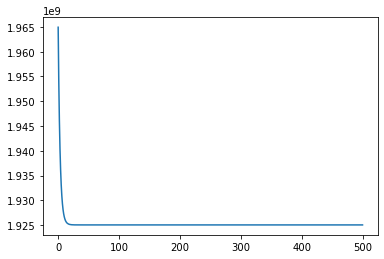

In [137]:
plt.plot(range(epoch),errorArray2)

In [138]:
grafEpoch

array([1.92505426e+09, 1.92505425e+09, 1.92505425e+09, 1.92505425e+09,
       1.92505425e+09, 1.92505425e+09, 1.92505425e+09, 1.92505425e+09,
       1.92505425e+09, 1.92505425e+09])

In [139]:
x = np.array([49,98,147,196,245,294,343,392,441,490])

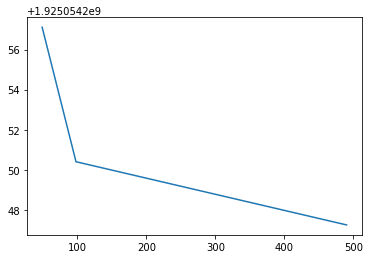

In [140]:
plt.plot(x,grafEpoch)

In [141]:
FirstFlTest = Data_test[:,2]
FirstFlTest = np.reshape(FirstFlTest,(-1,1))
FirstFlTest

array([[1236.],
       [1831.],
       [1118.],
       [1261.],
       [ 625.],
       [1636.],
       [1170.],
       [2129.],
       [ 923.],
       [ 818.],
       [ 820.],
       [1124.],
       [1298.],
       [1652.],
       [2411.],
       [1130.],
       [1572.],
       [ 949.],
       [1014.],
       [1624.],
       [ 831.],
       [1028.],
       [1622.],
       [ 764.],
       [ 842.],
       [1224.],
       [ 663.],
       [ 728.],
       [ 879.],
       [ 815.],
       [1212.],
       [1382.],
       [ 864.],
       [ 866.],
       [ 884.],
       [1630.],
       [1074.],
       [2196.],
       [1056.],
       [1700.],
       [1283.],
       [1660.],
       [1055.],
       [1080.],
       [ 672.],
       [ 960.],
       [ 999.],
       [ 894.],
       [1318.],
       [1314.],
       [ 672.],
       [ 672.],
       [ 912.],
       [1211.],
       [1168.],
       [2136.],
       [ 788.],
       [1138.],
       [ 894.],
       [ 912.],
       [1702.],
       [1507.],
       [

In [142]:
PredTest2 = np.empty_like(FirstFlTest)
ErrorTest2 = np.empty_like(FirstFlTest)
ErrorCuadradoTest2 = np.empty_like(FirstFlTest)


for i in range(len(FirstFlTest)):
    PredTest2[i] = 27324.60510464 + (132.30040142*FirstFlTest[i])
    ErrorTest2[i] = (SalePriceTest[i]-PredTest2[i])
    ErrorCuadradoTest2[i] = np.power((SalePriceTest[i]-PredTest2[i]),2)



In [143]:
suma2= sum(ErrorCuadradoTest2)
n = len(FirstFlTest)
resultadoTest2 = np.sqrt(suma2/n)
resultadoTest2

array([67855.93734112])

In [144]:
#Guardar segundo error de modelo manual

ErrorManual = np.append(ErrorManual,resultadoTest2)
ErrorManual

array([51285.81333569, 67855.93734112])

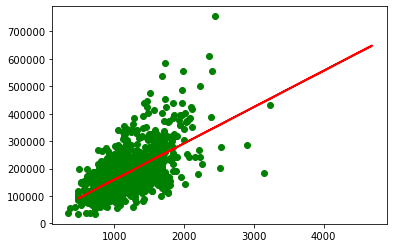

In [145]:
plt.scatter(FirstFlrSF_3, SalePrice_1, c='g')
plt.plot(FirstFlTest,PredTest2,color="red",linewidth=2)
plt.show()

<b> La combinacion(promedio) de las 2 anteriores rmse de ambos modelos (Sklearn,Manual)

<b> Promedio de modelo Sklearn

In [146]:
PromedioSklearn = np.mean(ErrorSklearn)
PromedioSklearn

111552.43191852515

In [147]:
ErrorSklearn

array([ 51285.30597499, 171819.55786206])

<b> Promedio de modelo Manual

In [148]:
PromedioManual = np.mean(ErrorManual)
PromedioManual

59570.875338403304

In [149]:
ErrorManual

array([51285.81333569, 67855.93734112])

<b> Resumen de los errores según modelo (Sklearn / Manual) y variables eligidas (OverallQual / FirstFloor)

In [150]:
#ErroresComparacion = np.append(ErrorManual,PromedioSklearn)
ErroresComparacion = pd.DataFrame({'Sklearn': ErrorSklearn, 'Manual': ErrorManual}, index=['OverallQual', 'FirstFloor'])
ErroresComparacion


Sklearn        Manual
OverallQual   51285.305975  51285.813336
FirstFloor   171819.557862  67855.937341

<b> Concluir cual modelo para la variable x es el mejor a ser usado (error mas bajo)

#### El mejor modelo a utilizar es el modelo de Sklearn con la variable OverallQual, ya que en comparación con los 4 modelos realizados, el error es más bajo siendo de 51,285.305975 y tomando en cuenta el análisis previo es la variable que tiene más correlación con la variable independiente.
#### Los resultados del modelo son: 
#### B1 = 45411.99877916
#### B0 = -96469.57131874